# **Introduction**

The purpose of this project is to determine which data analysis skills are associated with higher salaries. We will use data scraped from [Glassdoor](https://www.glassdoor.com/member/home/index.htm). 

**Job Titles:**
*   [Data Analyst](https://colab.research.google.com/drive/1AW0rNTs84Cq7GrJiDq86WWCisB4q6ZwO?usp=sharing)
*   [Business Analyst](https://colab.research.google.com/drive/1I1lolzuZgoUZGBwAEP9hZNf7my8XItbz?usp=sharing)
*   [Data Engineer](https://colab.research.google.com/drive/18HMhZXcv4xwxDUXGDauYEGdnDJLjNYxf?usp=sharing)
*   [Data Scientist](https://colab.research.google.com/drive/1i8UQMiObiOKAyzlrAsFCBPitqIh90Y5O?usp=sharing)

**Locations**
*   Austin, TX
*   Boston, MA
*   Chicago, IL
*   Colorado
*   Los Angeles, CA
*   New York City, NY
*   San Francisco, CA
*   Seattle, WA

This file contains original exploration of scraping desired info and combination of data after being scraped for analysis. To view the scraping files of each role, please select the respective link in the Job Titles list.

## **Set Environment & Initial Request**

In [ ]:
#set environment
import collections
import matplotlib.pyplot as plt
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import requests
import scipy.stats as stats
import seaborn as sns
import spacy
import statsmodels.api as sm
import string
import textwrap

from bs4 import BeautifulSoup as soup
from collections import Counter
from IPython.core.display import clear_output
from nltk.corpus import stopwords
from random import randint
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_extraction import text
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import  classification_report, mean_absolute_error, precision_score, recall_score, f1_score, accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsRegressor, LocalOutlierFactor
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from xgboost.sklearn import XGBRegressor
from statsmodels.tools.eval_measures import mse, rmse
from time import time, sleep
from wordcloud import WordCloud

nltk.download('stopwords')

#ignore warnings
import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# #set url & headers for data analyst roles
# da_url = 'https://www.glassdoor.com/Job/chicago-data-analyst-jobs-SRCH_IL.0,7_IC1128808_KO8,20_IP2.htm?radius=100&minSalary=26000&includeNoSalaryJobs=false&maxSalary=112000&fromAge=7'
# headers = {'user-agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/88.0.4324.150 Safari/537.36 RuxitSynthetic/1.0 v8980925411 t38550 ath9b965f92 altpub cvcv=2'}

# #get info from url
# da_response = requests.get(da_url, headers=headers)
# da_response.status_code

In [ ]:
# #create a BeautifulSoup object from fetched data
# da_soup = soup(da_response.text, 'html.parser')

# **Extracting One Piece of Information at a Time**

## **Companies**

In [ ]:
# #Extract Company Names
# da_companies= da_soup.select('.css-l2wjgv.e1n63ojh0.jobLink')
# #extract just the Company Names text
# da_co_names = [da_co_name.get_text().strip() for da_co_name in da_companies]
# da_co_names

In [ ]:
# len(da_co_names) #check length matches other queries

## **Company Ratings**

In [ ]:
# #Extract the Ratings
# da_rankings= da_soup.select('.css-19pjha7.e1cjmv6j1')
# #extract just the Job Titles text
# da_co_rank = [da_co_rank.get_text().strip() for da_co_rank in da_rankings]
# da_co_rank

In [ ]:
# len(da_co_rank) #check length matches other queries

## **Job Titles**

In [ ]:
# #Extract the Job Titles
# da_job_titles= da_soup.select('.jobLink.css-1rd3saf.eigr9kq2')
# #extract just the Job Titles text
# da_positions = [da_position.get_text().strip() for da_position in da_job_titles]
# da_positions

In [ ]:
# len(da_positions) #check length matches other queries

## **Locations**

In [ ]:
# #Extract Job Locations
# da_job_locations= da_soup.select('.pr-xxsm.css-1ndif2q.e1rrn5ka0')
# #extract just the Job Locations text
# da_locations = [da_location.get_text() for da_location in da_job_locations]
# da_locations

In [ ]:
# len(da_locations) #check length matches other queries

## **Salary Ranges**

In [ ]:
# #Extract Job Salary Ranges
# da_salary_ranges= da_soup.select('.css-1imh2hq.e1wijj242')
# #extract just the Salary Ranges text
# da_sal_ranges = [da_sal_range.get_text() for da_sal_range in da_salary_ranges]
# da_sal_ranges

In [ ]:
# len(da_sal_ranges) #check length matches other queries

## **Links**

In [ ]:
# #Extract Job Links
# da_job_links= da_soup.select('.css-l2wjgv.e1n63ojh0.jobLink')
# da_job_links

In [ ]:
# #extract just the Links text
# da_links = [da_link.get_text() for da_link in da_job_links]
# da_links

In [ ]:
# #get_text() for job links didn't extract anticipated info
# #let's investigate first element of da_job_links list
# da_job_links[0]

In [ ]:
# #see if we can access the link by adding ['href'] to previous call
# da_job_links[0]['href']

In [ ]:
# #Extract Job Links using list theory
# da_job_links= da_soup.select('.css-l2wjgv.e1n63ojh0.jobLink') #find link class
# da_links = [] #initizlize list to store links
# for i in range(len(da_job_links)): #iterate over items in da_job links
#   #set link to have prefix of 'https://www.glassdoor.com' with whatever was in href section
#   link = 'https://www.glassdoor.com' + da_job_links[i]['href']
#   da_links.append(link) # add link to da_links list
# da_links #view links

In [ ]:
# len(da_links)

## **Job Descriptions from Links**

In [ ]:
# #investigate how to extrapolate the description from one job
# link_url = requests.get(da_links[0],headers=headers) #set link as first line from da_links
# link_soup = soup(link_url.content, 'html.parser') #turn contents in link to a bs object
# link_desc = link_soup.select('.desc.css-58vpdc.ecgq1xb4') #find the description
# link_desc[0].get_text() #get the text from the description

In [ ]:
# #initialize list for descriptions
# da_descriptions = []

# #iterate over da_links list
# for i in range(len(da_links)):
#   #repeat process from last cell for all links in da_links
#   link_url = requests.get(da_links[i],headers=headers)
#   link_soup = soup(link_url.content, 'html.parser')
#   link_desc = link_soup.select('.desc.css-58vpdc.ecgq1xb4')
#   for i in range(len(link_desc)):
#     desc = link_desc[0].get_text()
#     da_descriptions.append(desc)
# #view descriptions
# da_descriptions

In [ ]:
# len(da_descriptions) #check length matches other queries 

## **Industry from Links**

In [ ]:
# #investigate how to extrapolate the industry from one job
# link_url = requests.get(da_links[0],headers=headers) #set link as first line from da_links
# link_soup = soup(link_url.content, 'html.parser') #turn contents in link to a bs object
# link_industry = link_soup.select('.css-sr4ps0.e18tf5om4') #find the industry
# link_industry[1].get_text()

In [ ]:
# #initialize list for industries
# da_industries = []

# #iterate over da_links list
# for i in range(len(da_links)):
#   #repeat process from descriptions
#   link_url = requests.get(da_links[i],headers=headers)
#   link_soup = soup(link_url.content, 'html.parser')
#   link_industry = link_soup.select('.css-sr4ps0.e18tf5om4')
#   for i in range(len(link_industry)):
#     industry = link_industry[1].get_text()
#   da_industries.append(industry)
# #view descriptions
# da_industries

In [ ]:
# len(da_industries) #check length matches other queries 

# **Scrape Multiple Pages**

### **Function to Process One Page**

In [ ]:
# def process_jobs(soup_obj, jobs):

#   #Create a soup object where are listings appear
#   all_jobs = soup_obj.select('.react-job-listing')

#   #Extract info for each job
#   for job in all_jobs:
#     company = job.select_one('.css-l2wjgv.e1n63ojh0.jobLink').get_text().strip()
#     rank = job.select_one('.css-19pjha7.e1cjmv6j1').get_text().strip()
#     job_title = job.select_one('.jobLink.css-1rd3saf.eigr9kq2').get_text().strip()
#     location = job.select_one('.pr-xxsm.css-1ndif2q.e1rrn5ka0').get_text().strip()
#     try:
#       salary_range = job.select_one('.css-1imh2hq.e1wijj242').get_text().strip()
#     except:
#       pass

#     #Extract Job Links
#     job_links= job.select_one('.css-l2wjgv.e1n63ojh0.jobLink') #find link class
#     links = [] #initizlize list to store links
#     for i in range(len(job_links)): #iterate over items in job_links
#       #set link to have prefix of 'https://www.glassdoor.com' with whatever was in href section
#       job_link = 'https://www.glassdoor.com' + job_links['href']
#       links.append(job_link) # add link to links list
#     link = links[i]

#     #initialize list for descriptions & industries
#     job_descriptions = []
#     job_industries = []

#     #iterate over links list to get descriptions & industries
#     for i in range(len(links)):
#       link_url = requests.get(links[i],headers=headers)
#       link_soup = soup(link_url.content, 'html.parser')
      
#       #descriptions
#       link_desc = link_soup.select('.desc.css-58vpdc.ecgq1xb4')
#       #get description from each link
#       for i in range(len(link_desc)):
#         desc = link_desc[0].get_text()
#         job_descriptions.append(desc)

#       #industries
#       link_industry = link_soup.select('.css-sr4ps0.e18tf5om4')
#       #get industry from each link
#       for i in range(len(link_industry)):
#         ind = link_industry[1].get_text()
#         job_industries.append(ind)
    
#     #assign one description & one industry to one job
#     for i in range(len(job_descriptions)):
#       description = job_descriptions[i]
    
#     for i in range(len(job_industries)):
#       industry = job_industries[i]

    
#     #construct a dictionary of job info
#     new_job = {'company':company, 'industry':industry, 'rank':rank, 
#               'job_title':job_title, 'location':location, 
#               'salary_range': salary_range, 'link': link,
#                'description':description}
    
#     jobs.append(new_job)

### **Process Sample Data Analyst Roles**

In [ ]:
# #scraping data analyst roles
# start_time = time() #note time of scraping start
# request_count = 1 #track number of requests made

# #create a variable to store fetched data
# sample_da_jobs = []

# #variables to handle request loop
# max_requests = 3
# page_num = 1
# headers = {'user-agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/88.0.4324.150 Safari/537.36 RuxitSynthetic/1.0 v8980925411 t38550 ath9b965f92 altpub cvcv=2'}

# #set url, the url can be finicky, try the commented out one if the first doesn't work
# #also try running a glassdoor search of your own and see if the min & max salary values change
# da_url = 'https://www.glassdoor.com/Job/chicago-data-analyst-jobs-SRCH_IL.0,7_IC1128808_KO8,20_IP'+str(page_num)+'.htm?radius=100&minSalary=26000&includeNoSalaryJobs=false&maxSalary=112000&fromAge=7'
# #da_url = 'https://www.glassdoor.com/Job/chicago-data-analyst-jobs-SRCH_IL.0,7_IC1128808_KO8,20_IP'+str(page_num)+'.htm?radius=100&minSalary=26000&includeNoSalaryJobs=false&maxSalary=112000&fromAge=7'

# while request_count <= max_requests:
#   print('Scraping started')
#   #keep output clear
#   clear_output(wait=True)

#   #make request
#   da_response = requests.get(da_url, headers = headers)

#   if da_response.status_code == 200:
#     da_soup = soup(da_response.text, 'html.parser')
#     process_jobs(da_soup, sample_da_jobs)

#     #increment request count
#     request_count+=1

#     #go to sleep for a bit in between request
#     sleep(randint(1,5))

#     #output monitoring info
#     elapsed_time = time() - start_time
#     print('Requests: {}, Frequency: {} requests/s, {} jobs processed.'.format(request_count, request_count/elapsed_time, len(sample_da_jobs)))

#     #increment page_num
#     page_num+=1

#   else:
#     print('Error')

# print('******Scraping Complete******')
# print('Total Requests: {}, Frequency: {} requests/s, {} total jobs processed.'.format(request_count, request_count/elapsed_time, len(sample_da_jobs)))
# sample_da_jobs[:10]

### **Convert Sample Data Analyst Roles to a Dataframe**

In [ ]:
# #convert da_jobs list to a df
# sample_da_jobs_df = pd.DataFrame(data = sample_da_jobs, columns = ['company', 'industry', 
#               'rank', 'job_title', 'location', 'salary_range', 'link','description'])

# sample_da_jobs_df

# **Combine Scraped Data from Each Role**

### **Import Each Role's Scraped Data**

In [ ]:
da_321_jobs = pd.read_csv('https://raw.githubusercontent.com/ferrazzijk/Glassdoor-Scraping/main/ScrapedDataCSVs/da_jobs_321_df.csv?dl=0')
ba_321_jobs = pd.read_csv('https://raw.githubusercontent.com/ferrazzijk/Glassdoor-Scraping/main/ScrapedDataCSVs/ba_jobs_321_df.csv?dl=0')
de_321_jobs = pd.read_csv('https://raw.githubusercontent.com/ferrazzijk/Glassdoor-Scraping/main/ScrapedDataCSVs/de_jobs_321_df.csv?dl=0')
ds_321_jobs = pd.read_csv('https://raw.githubusercontent.com/ferrazzijk/Glassdoor-Scraping/main/ScrapedDataCSVs/ds_jobs_321_df.csv?dl=0')

da_328_jobs = pd.read_csv('https://raw.githubusercontent.com/ferrazzijk/Glassdoor-Scraping/main/ScrapedDataCSVs/da_jobs_328_df.csv?dl=0')
ba_328_jobs = pd.read_csv('https://raw.githubusercontent.com/ferrazzijk/Glassdoor-Scraping/main/ScrapedDataCSVs/ba_jobs_328_df.csv?dl=0')
de_328_jobs = pd.read_csv('https://raw.githubusercontent.com/ferrazzijk/Glassdoor-Scraping/main/ScrapedDataCSVs/de_jobs_328_df.csv?dl=0')
ds_328_jobs = pd.read_csv('https://raw.githubusercontent.com/ferrazzijk/Glassdoor-Scraping/main/ScrapedDataCSVs/ds_jobs_328_df.csv?dl=0')

da_404_jobs = pd.read_csv('https://raw.githubusercontent.com/ferrazzijk/Glassdoor-Scraping/main/ScrapedDataCSVs/da_jobs_404_df.csv?dl=0')
ba_404_jobs = pd.read_csv('https://raw.githubusercontent.com/ferrazzijk/Glassdoor-Scraping/main/ScrapedDataCSVs/ba_jobs_404_df.csv?dl=0')
de_404_jobs = pd.read_csv('https://raw.githubusercontent.com/ferrazzijk/Glassdoor-Scraping/main/ScrapedDataCSVs/de_jobs_404_df.csv?dl=0')
ds_404_jobs = pd.read_csv('https://raw.githubusercontent.com/ferrazzijk/Glassdoor-Scraping/main/ScrapedDataCSVs/ds_jobs_404_df.csv?dl=0')

da_411_jobs = pd.read_csv('https://raw.githubusercontent.com/ferrazzijk/Glassdoor-Scraping/main/ScrapedDataCSVs/da_jobs_411_df.csv?dl=0')
ba_411_jobs = pd.read_csv('https://raw.githubusercontent.com/ferrazzijk/Glassdoor-Scraping/main/ScrapedDataCSVs/ba_jobs_411_df.csv?dl=0')
de_411_jobs = pd.read_csv('https://raw.githubusercontent.com/ferrazzijk/Glassdoor-Scraping/main/ScrapedDataCSVs/de_jobs_411_df.csv?dl=0')
ds_411_jobs = pd.read_csv('https://raw.githubusercontent.com/ferrazzijk/Glassdoor-Scraping/main/ScrapedDataCSVs/ds_jobs_411_df.csv?dl=0')

### **Combine Scraped Data**

In [ ]:
#combine df's
search_list = [da_321_jobs, ba_321_jobs, de_321_jobs, ds_321_jobs, da_328_jobs, 
               ba_328_jobs, de_328_jobs, ds_328_jobs, da_404_jobs, 
               ba_404_jobs, de_404_jobs, ds_404_jobs, da_411_jobs, 
               ba_411_jobs, de_411_jobs, ds_411_jobs]
scraped_data = pd.concat(search_list, ignore_index=True)
scraped_data

,Unnamed: 0,company,industry,rank,job_title,location,salary_range,link,description,search_city,search_job,Unnamed: 0.1
0,0,Aston Carter,Business Services,3.5,Data Analyst Sr.,"Austin, TX",$52K - $91K (Glassdoor est.),https://www.glassdoor.com/partner/jobListing.h...,Equivalent ExperienceDescription:Day to Day Re...,aus,da,NaN
1,1,CSS Corp,Information Technology,3.4,Data Analyst (GIS),"Austin, TX",$35K - $64K (Glassdoor est.),https://www.glassdoor.com/partner/jobListing.h...,Summary/Objective:Execute transactions/tickets...,aus,da,NaN
2,2,CACI,Aerospace & Defense,3.8,ELINT Data Analyst,"Austin, TX",$44K - $81K (Glassdoor est.),https://www.glassdoor.com/partner/jobListing.h...,Job DescriptionCACI delivers industry leading ...,aus,da,NaN
3,3,SamCart,Business Services,4.5,Data Analyst,"Austin, TX",$32K - $63K (Glassdoor est.),https://www.glassdoor.com/partner/jobListing.h...,Online shopping has changed. Today’s eCommerce...,aus,da,NaN
4,4,Publicis Sapient,Business Services,3.7,Data Analyst,"Austin, TX",$44K - $80K (Glassdoor est.),https://www.glassdoor.com/partner/jobListing.h...,Company DescriptionPublicis Sapient is a digit...,aus,da,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
4689,26,Microsoft,Information Technology,4.4,Data Scientist and Business Analyst,"Bellevue, WA",$95K - $148K (Glassdoor est.),https://www.glassdoor.com/partner/jobListing.h...,The digital shift is changing industries and r...,sea,ds,NaN
4690,27,Microsoft,Information Technology,4.4,Applied Machine Learning Scientist,"Bellevue, WA",$137K - $237K (Glassdoor est.),https://www.glassdoor.com/partner/jobListing.h...,Microsoft's mission is to empower every person...,sea,ds,NaN
4691,28,Microsoft,Information Technology,4.4,Data Scientist II,"Redmond, WA",$128K - $144K (Glassdoor est.),https://www.glassdoor.com/partner/jobListing.h...,Microsoft Research is looking for a talented D...,sea,ds,NaN
4692,29,IBM,Information Technology,3.9,Senior Data Scientist,"Seattle, WA",$151K - $161K (Glassdoor est.),https://www.glassdoor.com/partner/jobListing.h...,IntroductionThe IBM Garage was founded in 2014...,sea,ds,NaN


### **Format Scraped Data**

#### **Drop Unnamed Column**

In [ ]:
#drop Unnamed column
scraped_data.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'], inplace=True)

scraped_data

,company,industry,rank,job_title,location,salary_range,link,description,search_city,search_job
0,Aston Carter,Business Services,3.5,Data Analyst Sr.,"Austin, TX",$52K - $91K (Glassdoor est.),https://www.glassdoor.com/partner/jobListing.h...,Equivalent ExperienceDescription:Day to Day Re...,aus,da
1,CSS Corp,Information Technology,3.4,Data Analyst (GIS),"Austin, TX",$35K - $64K (Glassdoor est.),https://www.glassdoor.com/partner/jobListing.h...,Summary/Objective:Execute transactions/tickets...,aus,da
2,CACI,Aerospace & Defense,3.8,ELINT Data Analyst,"Austin, TX",$44K - $81K (Glassdoor est.),https://www.glassdoor.com/partner/jobListing.h...,Job DescriptionCACI delivers industry leading ...,aus,da
3,SamCart,Business Services,4.5,Data Analyst,"Austin, TX",$32K - $63K (Glassdoor est.),https://www.glassdoor.com/partner/jobListing.h...,Online shopping has changed. Today’s eCommerce...,aus,da
4,Publicis Sapient,Business Services,3.7,Data Analyst,"Austin, TX",$44K - $80K (Glassdoor est.),https://www.glassdoor.com/partner/jobListing.h...,Company DescriptionPublicis Sapient is a digit...,aus,da
...,...,...,...,...,...,...,...,...,...,...
4689,Microsoft,Information Technology,4.4,Data Scientist and Business Analyst,"Bellevue, WA",$95K - $148K (Glassdoor est.),https://www.glassdoor.com/partner/jobListing.h...,The digital shift is changing industries and r...,sea,ds
4690,Microsoft,Information Technology,4.4,Applied Machine Learning Scientist,"Bellevue, WA",$137K - $237K (Glassdoor est.),https://www.glassdoor.com/partner/jobListing.h...,Microsoft's mission is to empower every person...,sea,ds
4691,Microsoft,Information Technology,4.4,Data Scientist II,"Redmond, WA",$128K - $144K (Glassdoor est.),https://www.glassdoor.com/partner/jobListing.h...,Microsoft Research is looking for a talented D...,sea,ds
4692,IBM,Information Technology,3.9,Senior Data Scientist,"Seattle, WA",$151K - $161K (Glassdoor est.),https://www.glassdoor.com/partner/jobListing.h...,IntroductionThe IBM Garage was founded in 2014...,sea,ds


#### **Check for Duplicate Rows**

In [ ]:
#Checking for duplicate rows based on specific columns
duplicate = scraped_data[scraped_data.duplicated(['company', 'industry', 'rank', 'job_title', 'location', 'salary_range',
       'description','search_city'])] 
print('Duplicate Rows:')
duplicate

Duplicate Rows:


,company,industry,rank,job_title,location,salary_range,link,description,search_city,search_job
281,CACI,Aerospace & Defense,3.8,ELINT Data Analyst,"Austin, TX",$44K - $81K (Glassdoor est.),https://www.glassdoor.com/partner/jobListing.h...,Job DescriptionCACI delivers industry leading ...,aus,ba
283,CSS Corp,Information Technology,3.4,Data Analyst (GIS),"Austin, TX",$35K - $64K (Glassdoor est.),https://www.glassdoor.com/partner/jobListing.h...,Summary/Objective:Execute transactions/tickets...,aus,ba
318,Cogo Labs,Information Technology,3.4,Quantitative Data Analyst,"Cambridge, MA",$60K - $63K (Glassdoor est.),https://www.glassdoor.com/partner/jobListing.h...,"At Cogo Labs, we build startup companies from ...",bos,ba
331,Service Credit Union,Finance,3.7,"Marketing Data Analyst, Portsmouth","Portsmouth, NH",$36K - $65K (Glassdoor est.),https://www.glassdoor.com/partner/jobListing.h...,Are you interested in applying your research a...,bos,ba
389,Uline,NaN,3.7,Supply Chain Data Analyst,"Pleasant Prairie, WI",$65K - $79K (Employer est.),https://www.glassdoor.com/partner/jobListing.h...,Supply Chain Data AnalystCorporate Headquarter...,chi,ba
...,...,...,...,...,...,...,...,...,...,...
4632,Plum Lending,Finance,4.1,Senior Machine Learning Engineer (US Remote),"San Francisco, CA",$162K - $191K (Glassdoor est.),https://www.glassdoor.com/partner/jobListing.h...,Senior Machine Learning EngineerJOB SUMMARYWe ...,sf,ds
4636,CircleCI,Information Technology,3.4,Senior Data Scientist,"San Francisco, CA",$140K - $225K (Glassdoor est.),https://www.glassdoor.com/partner/jobListing.h...,As a Senior Data Scientist for Product at Circ...,sf,ds
4663,Salesforce,Information Technology,4.5,Technical Lead or Principal Analyst / Data Sci...,"Seattle, WA",$135K - $212K (Glassdoor est.),https://www.glassdoor.com/partner/jobListing.h...,"To get the best candidate experience, please c...",sea,ds
4672,Sage Bionetworks,Biotech & Pharmaceuticals,4.9,"Associate Data Scientist, Digital Health","Seattle, WA",$68K - $111K (Glassdoor est.),https://www.glassdoor.com/partner/jobListing.h...,"At Sage Bionetworks, we believe that we can le...",sea,ds


In [ ]:
#investigate one company for duplicates
duplicate_lib_mutual = scraped_data['company']=='Liberty Mutual Insurance'
scraped_data.iloc[duplicate_lib_mutual.values]

,company,industry,rank,job_title,location,salary_range,link,description,search_city,search_job
313,Liberty Mutual Insurance,Insurance,3.8,"Account Analyst, Construction","Boston, MA",$34K - $56K (Glassdoor est.),https://www.glassdoor.com/partner/jobListing.h...,"At Liberty Mutual, our purpose is to help peop...",bos,ba
320,Liberty Mutual Insurance,Insurance,3.8,Account Analyst,"Boston, MA",$34K - $56K (Glassdoor est.),https://www.glassdoor.com/partner/jobListing.h...,"At Liberty Mutual, our purpose is to help peop...",bos,ba
335,Liberty Mutual Insurance,Insurance,3.8,"Principal Business Analyst ll, Turner Construc...","East Boston, MA",$106K (Employer est.),https://www.glassdoor.com/partner/jobListing.h...,"A little about us\nAt Liberty Mutual, our purp...",bos,ba
342,Liberty Mutual Insurance,Insurance,3.8,"Senior Business Analyst, Liberty Specialty Mar...","East Boston, MA",$78K (Employer est.),https://www.glassdoor.com/partner/jobListing.h...,"At Liberty Mutual, our purpose is to help peop...",bos,ba
344,Liberty Mutual Insurance,Insurance,3.8,Global Reinsurance Operations Manager,"East Boston, MA",$97K (Employer est.),https://www.glassdoor.com/partner/jobListing.h...,"At Liberty Mutual, our purpose is to help peop...",bos,ba
...,...,...,...,...,...,...,...,...,...,...
4210,Liberty Mutual Insurance,Insurance,3.8,Senior Software Engineer,"Boston, MA",$67K - $135K (Glassdoor est.),https://www.glassdoor.com/partner/jobListing.h...,"At Liberty Mutual, our purpose is to help peop...",bos,de
4211,Liberty Mutual Insurance,Insurance,3.8,Senior to Principal Software Engineer,"Boston, MA",$141K - $151K (Glassdoor est.),https://www.glassdoor.com/partner/jobListing.h...,"At Liberty Mutual, our purpose is to help peop...",bos,de
4442,Liberty Mutual Insurance,Insurance,3.8,Experienced Data Engineer,"Boston, MA",$64K - $110K (Glassdoor est.),https://www.glassdoor.com/partner/jobListing.h...,"Experienced Data EngineerAt Liberty Mutual, te...",bos,ds
4444,Liberty Mutual Insurance,Insurance,3.8,Senior Data Engineer,"Boston, MA",$112K - $127K (Glassdoor est.),https://www.glassdoor.com/partner/jobListing.h...,"At Liberty Mutual, our purpose is to help peop...",bos,ds


In [ ]:
#investigate the rows that were duplicates
dup_lib_mutual = duplicate['company']=='Liberty Mutual Insurance'
duplicate.iloc[dup_lib_mutual.values]

,company,industry,rank,job_title,location,salary_range,link,description,search_city,search_job
1036,Liberty Mutual Insurance,Insurance,3.8,Experienced Data Engineer,"Boston, MA",$64K - $110K (Glassdoor est.),https://www.glassdoor.com/partner/jobListing.h...,"At Liberty Mutual, our purpose is to help peop...",bos,ds
1040,Liberty Mutual Insurance,Insurance,3.8,Senior Data Engineer,"Boston, MA",$77K - $139K (Glassdoor est.),https://www.glassdoor.com/partner/jobListing.h...,"At Liberty Mutual, our purpose is to help peop...",bos,ds
1372,Liberty Mutual Insurance,Insurance,3.8,Senior Data Engineer,"Seattle, WA",$84K - $147K (Glassdoor est.),https://www.glassdoor.com/partner/jobListing.h...,"At Liberty Mutual, our purpose is to help peop...",sea,ds
1906,Liberty Mutual Insurance,Insurance,3.8,Senior Data Analyst / Principal Data Analyst,"Seattle, WA",$101K - $167K (Glassdoor est.),https://www.glassdoor.com/partner/jobListing.h...,"At Liberty Mutual, our purpose is to help peop...",sea,ba
2317,Liberty Mutual Insurance,Insurance,3.8,Experienced Data Engineer,"Dover, NH",$64K - $110K (Glassdoor est.),https://www.glassdoor.com/partner/jobListing.h...,"At Liberty Mutual, our purpose is to help peop...",bos,ds
2342,Liberty Mutual Insurance,Insurance,3.8,Senior Data Analyst / Principal Data Analyst,"Boston, MA",$99K - $164K (Glassdoor est.),https://www.glassdoor.com/partner/jobListing.h...,"At Liberty Mutual, our purpose is to help peop...",bos,ds
2528,Liberty Mutual Insurance,Insurance,3.8,Senior Data Analyst / Principal Data Analyst,"Seattle, WA",$101K - $167K (Glassdoor est.),https://www.glassdoor.com/partner/jobListing.h...,"At Liberty Mutual, our purpose is to help peop...",sea,ds
2869,Liberty Mutual Insurance,Insurance,3.8,Senior Accounting Analyst,"Boston, MA",$41K - $66K (Glassdoor est.),https://www.glassdoor.com/partner/jobListing.h...,"BenefitsWe value your hard work, integrity and...",bos,ba
2872,Liberty Mutual Insurance,Insurance,3.8,"Account Analyst, Construction","Boston, MA",$34K - $56K (Glassdoor est.),https://www.glassdoor.com/partner/jobListing.h...,"At Liberty Mutual, our purpose is to help peop...",bos,ba
2873,Liberty Mutual Insurance,Insurance,3.8,Senior Data Analyst / Principal Data Analyst,"Boston, MA",$99K - $164K (Glassdoor est.),https://www.glassdoor.com/partner/jobListing.h...,"At Liberty Mutual, our purpose is to help peop...",bos,ba


In [ ]:
#create a df with no duplicates to use for further eda
jobs_df = scraped_data.drop_duplicates(subset=['company', 'industry', 'rank', 
      'job_title', 'location', 'salary_range','description','search_city'])
jobs_df

,company,industry,rank,job_title,location,salary_range,link,description,search_city,search_job
0,Aston Carter,Business Services,3.5,Data Analyst Sr.,"Austin, TX",$52K - $91K (Glassdoor est.),https://www.glassdoor.com/partner/jobListing.h...,Equivalent ExperienceDescription:Day to Day Re...,aus,da
1,CSS Corp,Information Technology,3.4,Data Analyst (GIS),"Austin, TX",$35K - $64K (Glassdoor est.),https://www.glassdoor.com/partner/jobListing.h...,Summary/Objective:Execute transactions/tickets...,aus,da
2,CACI,Aerospace & Defense,3.8,ELINT Data Analyst,"Austin, TX",$44K - $81K (Glassdoor est.),https://www.glassdoor.com/partner/jobListing.h...,Job DescriptionCACI delivers industry leading ...,aus,da
3,SamCart,Business Services,4.5,Data Analyst,"Austin, TX",$32K - $63K (Glassdoor est.),https://www.glassdoor.com/partner/jobListing.h...,Online shopping has changed. Today’s eCommerce...,aus,da
4,Publicis Sapient,Business Services,3.7,Data Analyst,"Austin, TX",$44K - $80K (Glassdoor est.),https://www.glassdoor.com/partner/jobListing.h...,Company DescriptionPublicis Sapient is a digit...,aus,da
...,...,...,...,...,...,...,...,...,...,...
4688,Microsoft,Information Technology,4.4,Senior Data & Applied Scientist,"Bellevue, WA",$123K - $190K (Glassdoor est.),https://www.glassdoor.com/partner/jobListing.h...,Are you an experienced data or ML scientist ex...,sea,ds
4690,Microsoft,Information Technology,4.4,Applied Machine Learning Scientist,"Bellevue, WA",$137K - $237K (Glassdoor est.),https://www.glassdoor.com/partner/jobListing.h...,Microsoft's mission is to empower every person...,sea,ds
4691,Microsoft,Information Technology,4.4,Data Scientist II,"Redmond, WA",$128K - $144K (Glassdoor est.),https://www.glassdoor.com/partner/jobListing.h...,Microsoft Research is looking for a talented D...,sea,ds
4692,IBM,Information Technology,3.9,Senior Data Scientist,"Seattle, WA",$151K - $161K (Glassdoor est.),https://www.glassdoor.com/partner/jobListing.h...,IntroductionThe IBM Garage was founded in 2014...,sea,ds


#### **Missing Data**

In [ ]:
#Check for missing data
total_missing = jobs_df.isnull().sum().sort_values(ascending=False)
percent_missing = (jobs_df.isnull().sum()/jobs_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total_missing, percent_missing], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
salary_range,206,0.047422
industry,203,0.046731
rank,26,0.005985
search_job,0,0.000000
search_city,0,0.000000
description,0,0.000000
link,0,0.000000
location,0,0.000000
job_title,0,0.000000
company,0,0.000000


In [ ]:
#drop the missing salary, industry, and rank observations
jobs_df.dropna(inplace=True)

#Check for missing data
total_missing = jobs_df.isnull().sum().sort_values(ascending=False)
percent_missing = (jobs_df.isnull().sum()/jobs_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total_missing, percent_missing], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
search_job,0,0.0
search_city,0,0.0
description,0,0.0
link,0,0.0
salary_range,0,0.0
location,0,0.0
job_title,0,0.0
rank,0,0.0
industry,0,0.0
company,0,0.0


#### **Missing Rank**

In [ ]:
#*Drop rows where rank was missing
missing_rank = jobs_df[jobs_df['rank']== -1].index
jobs_df.drop(missing_rank, inplace=True)
jobs_df.shape

(3936, 10)

#### **Fix Salray Range Issues**

In [ ]:
#get rid of rows where salary_range is per hour instead of annual
jobs_df = jobs_df[~jobs_df['salary_range'].str.contains('Hour')]
jobs_df.shape

(3812, 10)

In [ ]:
#get rid of rows where salary_range is exact amount instead of a range
jobs_df = jobs_df[jobs_df['salary_range'].str.contains('-')]
jobs_df.shape

(3765, 10)

In [ ]:
#reset index values to reflect actual number of rows
jobs_df.reset_index(inplace=True)

#### **Split Location & Salaries into Separate Columns**

In [ ]:
#create a df of split jobs['location'] to split column into city & state
new_loc = jobs_df['location'].str.split(',', expand= True)
new_loc

,0,1,2
0,Austin,TX,None
1,Austin,TX,None
2,Austin,TX,None
3,Austin,TX,None
4,Austin,TX,None
...,...,...,...
3760,Bellevue,WA,None
3761,Bellevue,WA,None
3762,Redmond,WA,None
3763,Seattle,WA,None


In [ ]:
# getting 3 columns in new_loc was unexpected
#investigate to find issue
new_loc.sort_values(by=2)[:10]

,0,1,2
385,Westlake Village,Los Angeles,CA
81,Greenwood Village,Arapahoe,CO
3166,Greenwood Village,Arapahoe,CO
2960,Greenwood Village,Arapahoe,CO
2936,Greenwood Village,Arapahoe,CO
2734,Greenwood Village,Arapahoe,CO
2328,Greenwood Village,Arapahoe,CO
1719,Greenwood Village,Arapahoe,CO
1321,Greenwood Village,Arapahoe,CO
1316,Greenwood Village,Arapahoe,CO


In [ ]:
#create a sub df to view indices of all listings that had Greenwood Village,
#Arapahoe, CO as location
is_arapahoe = jobs_df[(jobs_df['location'])=='Greenwood Village, Arapahoe, CO']
#extract desired indices
#list of indices that have Greenwood Village, Arapahoe, CO listed as location
is_arapahoe_indices = is_arapahoe.index.values.tolist()

#iterate over above indices to change location to Arapahoe, CO
for i in is_arapahoe_indices:
  jobs_df['location'][i] = 'Arapahoe, CO'

#see if it worked
jobs_df.loc[81]

index                                                          91
company                                                   Comcast
industry                                       Telecommunications
rank                                                          3.9
job_title            Sr. Data Analyst, Voice Fraud Data Analytics
location                                             Arapahoe, CO
salary_range                        $61K - $106K (Glassdoor est.)
link            https://www.glassdoor.com/partner/jobListing.h...
description     Job Summary Responsible for working cross-func...
search_city                                                    co
search_job                                                     da
Name: 81, dtype: object

In [ ]:
#set location of jobs_df index 385 to Los Angeles, CA
jobs_df['location'][385] = 'Los Angeles, CA'
jobs_df.loc[385]

index                                                         477
company                                                  MannKind
industry                                Biotech & Pharmaceuticals
rank                                                          3.1
job_title       Senior Manager, Business Systems Analyst – Com...
location                                          Los Angeles, CA
salary_range                        $94K - $171K (Glassdoor est.)
link            https://www.glassdoor.com/partner/jobListing.h...
description     At MannKind our employees are our number one a...
search_city                                                    la
search_job                                                     ba
Name: 385, dtype: object

In [ ]:
#try again to create a df of split jobs['location'] to split column into city & state
new_loc = jobs_df['location'].str.split(',', expand= True)
new_loc

,0,1
0,Austin,TX
1,Austin,TX
2,Austin,TX
3,Austin,TX
4,Austin,TX
...,...,...
3760,Bellevue,WA
3761,Bellevue,WA
3762,Redmond,WA
3763,Seattle,WA


In [ ]:
#create a df of split jobs_df['salary_range] to split column into min, max, &
#estimate type in next cell block
new_sal = jobs_df['salary_range'].str.split(' ', expand=True)
new_sal

,0,1,2,3,4
0,$52K,-,$91K,(Glassdoor,est.)
1,$35K,-,$64K,(Glassdoor,est.)
2,$44K,-,$81K,(Glassdoor,est.)
3,$32K,-,$63K,(Glassdoor,est.)
4,$44K,-,$80K,(Glassdoor,est.)
...,...,...,...,...,...
3760,$123K,-,$190K,(Glassdoor,est.)
3761,$137K,-,$237K,(Glassdoor,est.)
3762,$128K,-,$144K,(Glassdoor,est.)
3763,$151K,-,$161K,(Glassdoor,est.)


In [ ]:
#assign city & state to jobs_df
jobs_df['city'] = new_loc[0]
jobs_df['state'] = new_loc[1]
jobs_df['state'] = jobs_df['state'].str.replace(' ','')

#assign min, max, & estimate to jobs_df
jobs_df['min_sal'] = new_sal[0]
jobs_df['max_sal'] = new_sal[2]
jobs_df['estimate_type'] = new_sal[3]

#drop previous salary_range column
jobs_df.drop(columns=['salary_range', 'location'], inplace=True)

#reformat some puntuation within certain columns
jobs_df['min_sal'] = jobs_df['min_sal'].astype(str).str.replace('$','')
jobs_df['min_sal'] = jobs_df['min_sal'].astype(str).str.replace('K','')
jobs_df['max_sal'] = jobs_df['max_sal'].astype(str).str.replace('$','')
jobs_df['max_sal'] = jobs_df['max_sal'].astype(str).str.replace('K','')
jobs_df['estimate_type'] = jobs_df['estimate_type'].astype(str).str.replace('(','')
jobs_df['estimate_type'] = jobs_df['estimate_type'].astype(str).str.replace(')','')
jobs_df['estimate_type'] = jobs_df['estimate_type'].astype(str).str.replace(' est.','')
jobs_df['estimate_type'] = jobs_df['estimate_type'].astype(str).str.replace('Per HourGlassdoor','Glassdoor')

#convert min & max salary estimates to numeric
jobs_df['min_sal'] = jobs_df['min_sal'].astype(int)
jobs_df['max_sal'] = jobs_df['max_sal'].astype(int)

#multiply min & max sal by 1,000
jobs_df['min_sal'] = jobs_df['min_sal']*1000
jobs_df['max_sal'] = jobs_df['max_sal']*1000

#create an average salary column, this is also median since there are only two 
#values we're considering 
jobs_df['avg_sal'] = (jobs_df['min_sal']+jobs_df['max_sal'])/2

#convert job_title to str
jobs_df['job_title'] = jobs_df['job_title'].astype(str)

jobs_df

,index,company,industry,rank,job_title,link,description,search_city,search_job,city,state,min_sal,max_sal,estimate_type,avg_sal
0,0,Aston Carter,Business Services,3.5,Data Analyst Sr.,https://www.glassdoor.com/partner/jobListing.h...,Equivalent ExperienceDescription:Day to Day Re...,aus,da,Austin,TX,52000,91000,Glassdoor,71500.0
1,1,CSS Corp,Information Technology,3.4,Data Analyst (GIS),https://www.glassdoor.com/partner/jobListing.h...,Summary/Objective:Execute transactions/tickets...,aus,da,Austin,TX,35000,64000,Glassdoor,49500.0
2,2,CACI,Aerospace & Defense,3.8,ELINT Data Analyst,https://www.glassdoor.com/partner/jobListing.h...,Job DescriptionCACI delivers industry leading ...,aus,da,Austin,TX,44000,81000,Glassdoor,62500.0
3,3,SamCart,Business Services,4.5,Data Analyst,https://www.glassdoor.com/partner/jobListing.h...,Online shopping has changed. Today’s eCommerce...,aus,da,Austin,TX,32000,63000,Glassdoor,47500.0
4,4,Publicis Sapient,Business Services,3.7,Data Analyst,https://www.glassdoor.com/partner/jobListing.h...,Company DescriptionPublicis Sapient is a digit...,aus,da,Austin,TX,44000,80000,Glassdoor,62000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3760,4688,Microsoft,Information Technology,4.4,Senior Data & Applied Scientist,https://www.glassdoor.com/partner/jobListing.h...,Are you an experienced data or ML scientist ex...,sea,ds,Bellevue,WA,123000,190000,Glassdoor,156500.0
3761,4690,Microsoft,Information Technology,4.4,Applied Machine Learning Scientist,https://www.glassdoor.com/partner/jobListing.h...,Microsoft's mission is to empower every person...,sea,ds,Bellevue,WA,137000,237000,Glassdoor,187000.0
3762,4691,Microsoft,Information Technology,4.4,Data Scientist II,https://www.glassdoor.com/partner/jobListing.h...,Microsoft Research is looking for a talented D...,sea,ds,Redmond,WA,128000,144000,Glassdoor,136000.0
3763,4692,IBM,Information Technology,3.9,Senior Data Scientist,https://www.glassdoor.com/partner/jobListing.h...,IntroductionThe IBM Garage was founded in 2014...,sea,ds,Seattle,WA,151000,161000,Glassdoor,156000.0


#### **Fix Missing City Issue**

In [ ]:
#find all observations with state WA
no_state = jobs_df[(jobs_df['state'].isnull())]
no_state

,index,company,industry,rank,job_title,link,description,search_city,search_job,city,state,min_sal,max_sal,estimate_type,avg_sal
344,432,EY,Accounting & Legal,3.9,ServiceNow Business Analyst - Contractor,https://www.glassdoor.com/partner/jobListing.h...,Conduct requirement workshops and training ses...,co,ba,United States,None,69000,76000,Employer,72500.0
354,443,Ibotta,Information Technology,3.4,Business Systems Analyst,https://www.glassdoor.com/partner/jobListing.h...,Ibotta is seeking a Business Systems Analyst t...,co,ba,Colorado,None,75000,90000,Employer,82500.0
361,451,Gannett,Media,3.1,Senior Business Analyst,https://www.glassdoor.com/partner/jobListing.h...,"Senior Business Analyst\nArizona, USA Califor...",co,ba,Colorado,None,55000,74000,Employer,64500.0
587,729,SalesPage Technologies,Information Technology,4.5,Associate Data Engineer,https://www.glassdoor.com/partner/jobListing.h...,Associate Data EngineerSalesPage provides oppo...,chi,de,United States,None,50000,65000,Employer,57500.0
647,826,SalesPage Technologies,Information Technology,4.5,Associate Data Engineer,https://www.glassdoor.com/partner/jobListing.h...,Associate Data EngineerSalesPage provides oppo...,la,de,United States,None,50000,65000,Employer,57500.0
751,965,SalesPage Technologies,Information Technology,4.5,Associate Data Engineer,https://www.glassdoor.com/partner/jobListing.h...,Associate Data EngineerSalesPage provides oppo...,sea,de,United States,None,50000,65000,Employer,57500.0
857,1176,Ibotta,Information Technology,3.4,"Decision Scientist, Product",https://www.glassdoor.com/partner/jobListing.h...,Ibotta is seeking a Decision Scientist to join...,co,ds,Colorado,None,80000,100000,Employer,90000.0
859,1187,Ibotta,Information Technology,3.4,"Senior Decision Scientist, Product",https://www.glassdoor.com/partner/jobListing.h...,Ibotta is seeking a Senior Decision Scientist ...,co,ds,Colorado,None,90000,120000,Employer,105000.0
3199,3965,Synaptic Advisory Partners,Information Technology,4.9,Business Analyst,https://www.glassdoor.com/partner/jobListing.h...,What we are about\n\nSynaptic AP™ is a silver-...,co,ba,Colorado,None,60000,70000,Employer,65000.0
3353,4172,Lowe's Home Improvement,Retail,3.5,SR. DATA ENGINEER - BIG DATA PLATFORMS,https://www.glassdoor.com/partner/jobListing.h...,"At Lowe’s – Data, Analytics and Computational ...",aus,de,United States,None,86000,197000,Employer,141500.0


In [ ]:
#set city and state of above jobs where the listing link inlcuded the state
jobs_df['city'][354]='Denver'
jobs_df['state'][354]='CO'

jobs_df['city'][361]='Denver'
jobs_df['state'][361]='CO'

jobs_df['city'][857]='Denver'
jobs_df['state'][857]='CO'

jobs_df['city'][859]='Denver'
jobs_df['state'][859]='CO'

jobs_df['city'][3199]='Annapolis'
jobs_df['state'][3199]='MD'

jobs_df['city'][3355]='Austin'
jobs_df['state'][3355]='TX'

jobs_df['city'][3462]='Denver'
jobs_df['state'][3462]='CO'

jobs_df['city'][3464]='Denver'
jobs_df['state'][3464]='CO'

jobs_df['city'][3466]='Denver'
jobs_df['state'][3466]='CO'

jobs_df['city'][3472]='Denver'
jobs_df['state'][3472]='CO'

# jobs_df['city'][]=''
# jobs_df['state'][]=''

#drop remaining missing state columns
jobs_df.dropna(inplace=True)
#reset index values to reflect actual number of rows
jobs_df.reset_index(inplace=True)
jobs_df

,level_0,index,company,industry,rank,job_title,link,description,search_city,search_job,city,state,min_sal,max_sal,estimate_type,avg_sal
0,0,0,Aston Carter,Business Services,3.5,Data Analyst Sr.,https://www.glassdoor.com/partner/jobListing.h...,Equivalent ExperienceDescription:Day to Day Re...,aus,da,Austin,TX,52000,91000,Glassdoor,71500.0
1,1,1,CSS Corp,Information Technology,3.4,Data Analyst (GIS),https://www.glassdoor.com/partner/jobListing.h...,Summary/Objective:Execute transactions/tickets...,aus,da,Austin,TX,35000,64000,Glassdoor,49500.0
2,2,2,CACI,Aerospace & Defense,3.8,ELINT Data Analyst,https://www.glassdoor.com/partner/jobListing.h...,Job DescriptionCACI delivers industry leading ...,aus,da,Austin,TX,44000,81000,Glassdoor,62500.0
3,3,3,SamCart,Business Services,4.5,Data Analyst,https://www.glassdoor.com/partner/jobListing.h...,Online shopping has changed. Today’s eCommerce...,aus,da,Austin,TX,32000,63000,Glassdoor,47500.0
4,4,4,Publicis Sapient,Business Services,3.7,Data Analyst,https://www.glassdoor.com/partner/jobListing.h...,Company DescriptionPublicis Sapient is a digit...,aus,da,Austin,TX,44000,80000,Glassdoor,62000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3754,3760,4688,Microsoft,Information Technology,4.4,Senior Data & Applied Scientist,https://www.glassdoor.com/partner/jobListing.h...,Are you an experienced data or ML scientist ex...,sea,ds,Bellevue,WA,123000,190000,Glassdoor,156500.0
3755,3761,4690,Microsoft,Information Technology,4.4,Applied Machine Learning Scientist,https://www.glassdoor.com/partner/jobListing.h...,Microsoft's mission is to empower every person...,sea,ds,Bellevue,WA,137000,237000,Glassdoor,187000.0
3756,3762,4691,Microsoft,Information Technology,4.4,Data Scientist II,https://www.glassdoor.com/partner/jobListing.h...,Microsoft Research is looking for a talented D...,sea,ds,Redmond,WA,128000,144000,Glassdoor,136000.0
3757,3763,4692,IBM,Information Technology,3.9,Senior Data Scientist,https://www.glassdoor.com/partner/jobListing.h...,IntroductionThe IBM Garage was founded in 2014...,sea,ds,Seattle,WA,151000,161000,Glassdoor,156000.0


In [ ]:
jobs_df.drop(columns=['level_0', 'index'], inplace=True)
jobs_df.columns

Index(['company', 'industry', 'rank', 'job_title', 'link', 'description',
       'search_city', 'search_job', 'city', 'state', 'min_sal', 'max_sal',
       'estimate_type', 'avg_sal'],
      dtype='object')

In [ ]:
#Check for missing data now that we added some new cols
total_missing = jobs_df.isnull().sum().sort_values(ascending=False)
percent_missing = (jobs_df.isnull().sum()/jobs_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total_missing, percent_missing], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
avg_sal,0,0.0
estimate_type,0,0.0
max_sal,0,0.0
min_sal,0,0.0
state,0,0.0
city,0,0.0
search_job,0,0.0
search_city,0,0.0
description,0,0.0
link,0,0.0


# **Exploratory Data Analysis**

### **Descriptive Statistics**

In [ ]:
#view data types of each col
jobs_df.dtypes

company           object
industry          object
rank             float64
job_title         object
link              object
description       object
search_city       object
search_job        object
city              object
state             object
min_sal            int64
max_sal            int64
estimate_type     object
avg_sal          float64
dtype: object

In [ ]:
#descriptive statistics of numeric cols
jobs_df[['rank', 'min_sal', 'max_sal', 'avg_sal']].describe().T

,count,mean,std,min,25%,50%,75%,max
rank,3759.0,3.855467,0.465123,1.4,3.6,3.9,4.2,5.0
min_sal,3759.0,72293.961160,28769.413109,14000.0,49000.0,68000.0,90000.0,297000.0
max_sal,3759.0,117599.893589,41014.179456,37000.0,86000.0,111000.0,143000.0,470000.0
avg_sal,3759.0,94946.927374,33754.228884,28500.0,68000.0,89500.0,116500.0,383500.0


In [ ]:
#amount of unique values per column
jobs_df.nunique()

company          1834
industry           25
rank               32
job_title        2066
link             3759
description      3484
search_city         8
search_job          4
city              370
state              16
min_sal           157
max_sal           214
estimate_type       2
avg_sal           320
dtype: int64

### **Visualizations**

#### **Rank & Salary Distributions**

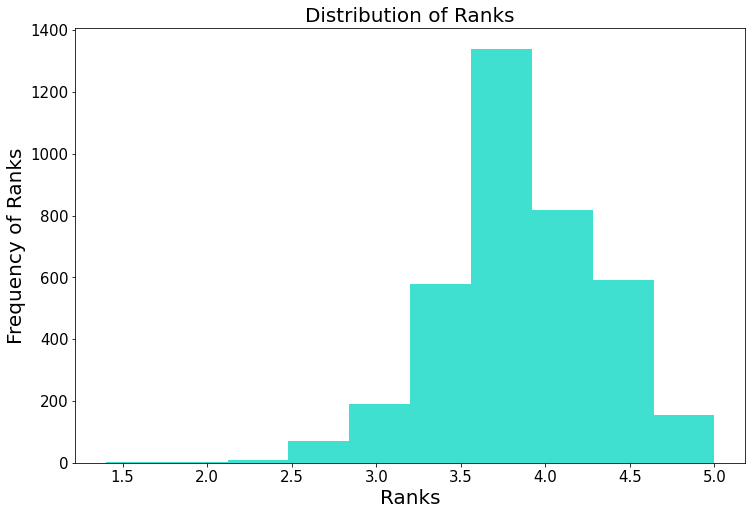

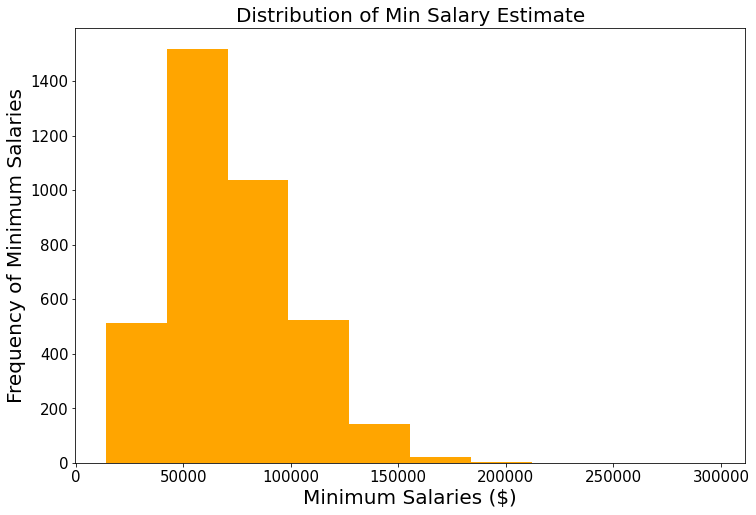

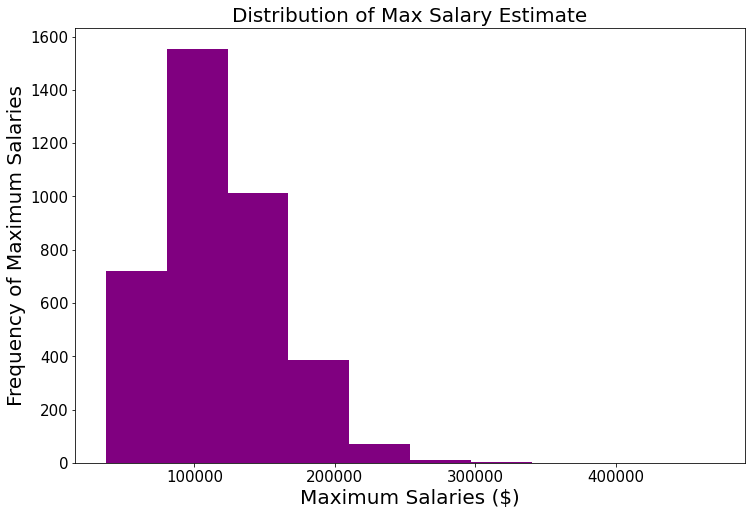

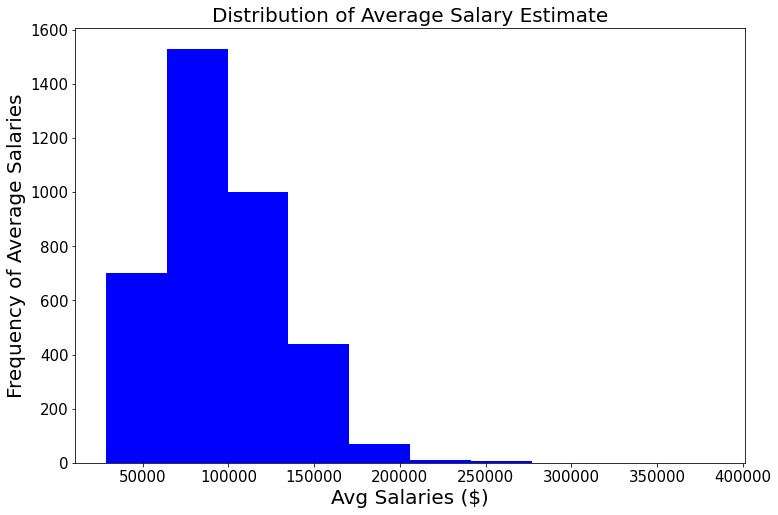

In [ ]:
#How are rank, min_salary, max_salary, & avg_sal distributed?
#rank
plt.figure(figsize=(12,8))
plt.hist(jobs_df['rank'], color='turquoise')
plt.tick_params(labelsize = 15)
plt.title('Distribution of Ranks', fontsize = 20)
plt.xlabel('Ranks', fontsize = 20)
plt.ylabel('Frequency of Ranks', fontsize = 20)
plt.show()

#min salary
plt.figure(figsize=(12,8))
plt.hist(jobs_df['min_sal'], color='orange')
plt.tick_params(labelsize = 15)
plt.title('Distribution of Min Salary Estimate', fontsize = 20)
plt.xlabel('Minimum Salaries ($)', fontsize = 20)
plt.ylabel('Frequency of Minimum Salaries', fontsize = 20)
plt.show()

#max salary
plt.figure(figsize=(12,8))
plt.hist(jobs_df['max_sal'], color='purple')
plt.tick_params(labelsize = 15)
plt.title('Distribution of Max Salary Estimate', fontsize = 20)
plt.xlabel('Maximum Salaries ($)', fontsize = 20)
plt.ylabel('Frequency of Maximum Salaries', fontsize = 20)
plt.show()

#avg salary
plt.figure(figsize=(12,8))
plt.hist(jobs_df['avg_sal'], color='blue')
plt.tick_params(labelsize = 15)
plt.title('Distribution of Average Salary Estimate', fontsize = 20)
plt.xlabel('Avg Salaries ($)', fontsize = 20)
plt.ylabel('Frequency of Average Salaries', fontsize = 20)
plt.show()

**Conclusion**

All numeric columns seem to have somewhat of a normal distribution. There may be some skewness to each but overall the bell shape is there. 

#### **Salary Spread by Search City**

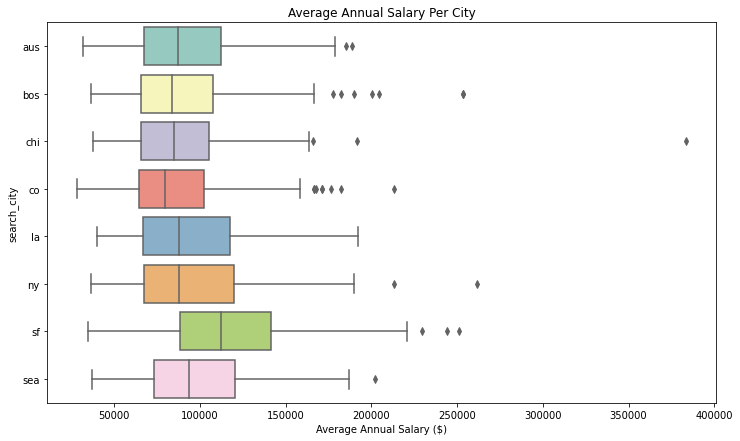

In [ ]:
#how are salaries spread per city?
plt.figure(figsize=(12,7))
sns.boxplot(x='avg_sal', y='search_city', data= jobs_df, palette = 'Set3')
plt.xlabel('Average Annual Salary ($)')
plt.title('Average Annual Salary Per City')
plt.show()

#### **Salary Spread by Search Job**

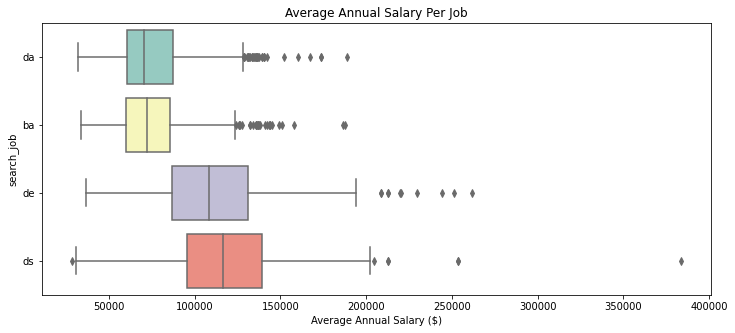

In [ ]:
#how are salaries spread per job?
plt.figure(figsize=(12,5))
sns.boxplot(x='avg_sal', y='search_job', data= jobs_df, palette = 'Set3')
plt.xlabel('Average Annual Salary ($)')
plt.title('Average Annual Salary Per Job')
plt.show()

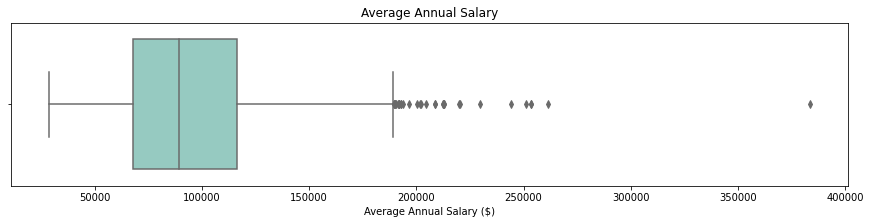

In [ ]:
#how are average salaries spread?
plt.figure(figsize=(15,3))
sns.boxplot(x='avg_sal', data= jobs_df, palette = 'Set3')
plt.xlabel('Average Annual Salary ($)')
plt.title('Average Annual Salary')
plt.show()

#### **How many jobs from each search_job?**

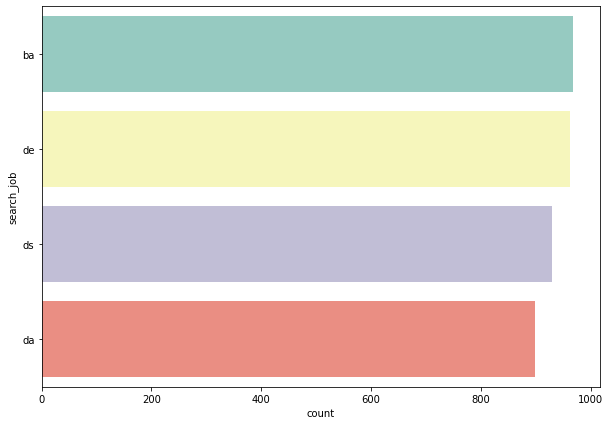

In [ ]:
#How many jobs from each search_job?
plt.figure(figsize=(10,7))
sns.countplot(y='search_job', palette='Set3',data=jobs_df,
  order=jobs_df['search_job'].value_counts().index)
plt.show()

#### **Most Popular Job Titles**

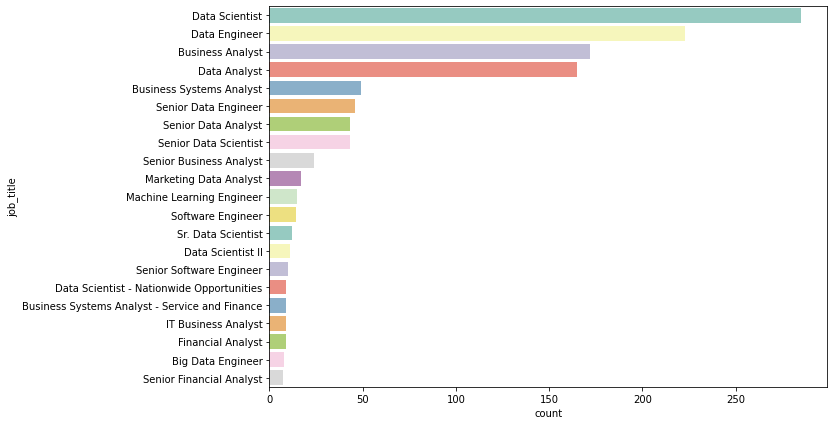

In [ ]:
#Most Popular Job Titles
plt.figure(figsize=(10,7))
sns.countplot(y='job_title', palette='Set3',data=jobs_df,
  order=jobs_df['job_title'].value_counts().iloc[:21].index)
plt.show()

#### **Most Popular Search Cities**

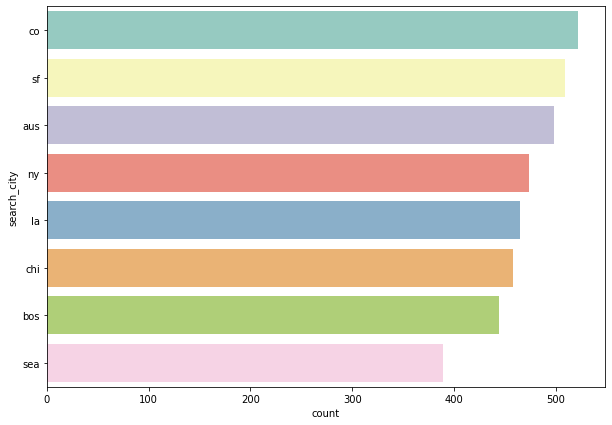

In [ ]:
#Most Popular Search City
plt.figure(figsize=(10,7))
sns.countplot(y='search_city', palette='Set3',data=jobs_df,
  order=jobs_df['search_city'].value_counts().index)
plt.show()

#### **Most Popular States**

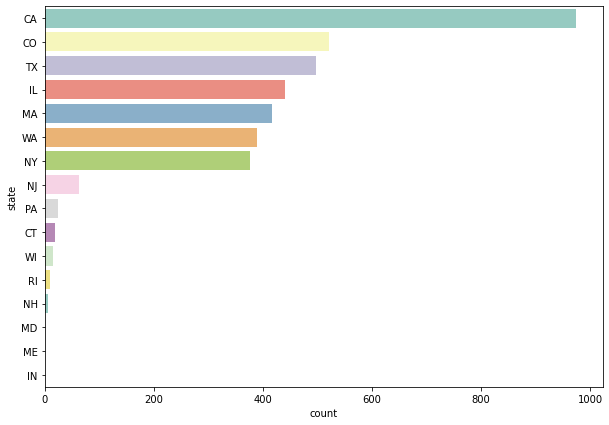

In [ ]:
#Most Popular State
plt.figure(figsize=(10,7))
sns.countplot(y='state', palette='Set3',data=jobs_df,
  order=jobs_df['state'].value_counts().index)
plt.show()

#### **Glassdoor Salary Estimates vs. Employer Salary Estimates**

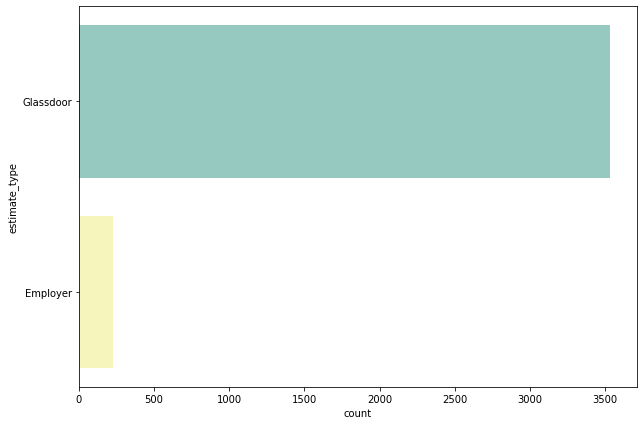

In [ ]:
#Estimate Types
plt.figure(figsize=(10,7))
sns.countplot(y='estimate_type', palette='Set3',data=jobs_df,
  order=jobs_df['estimate_type'].value_counts().index)
plt.show()

#### **Most Popular Companies**

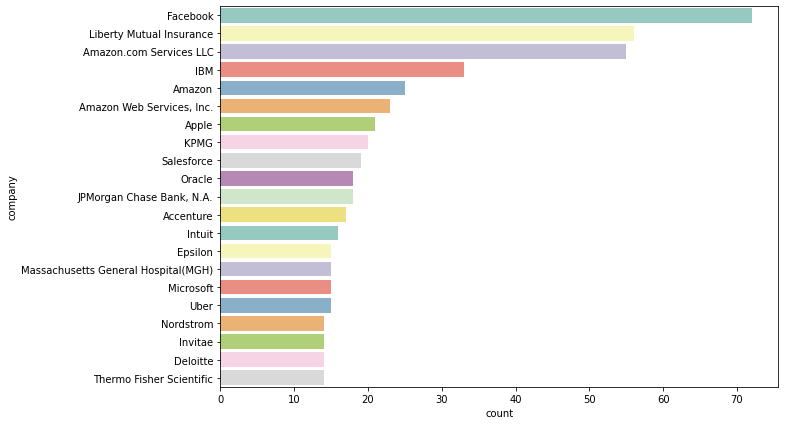

In [ ]:
#Most Popular Companies
plt.figure(figsize=(10,7))
sns.countplot(y='company', palette='Set3',data=jobs_df,
  order=jobs_df['company'].value_counts().iloc[:21].index)
plt.show()

#### **Most Popular Industries**

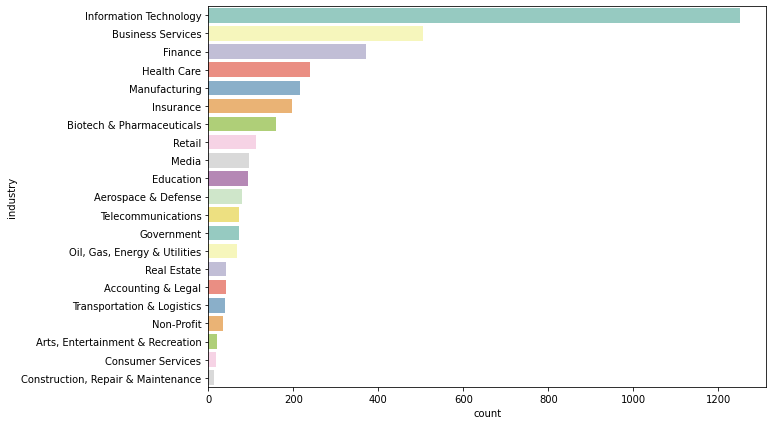

In [ ]:
#Most Popular Industries
plt.figure(figsize=(10,7))
sns.countplot(y='industry', palette='Set3',data=jobs_df,
  order=jobs_df['industry'].value_counts().iloc[:21].index)
plt.show()

#### **Job Description Word Cloud**

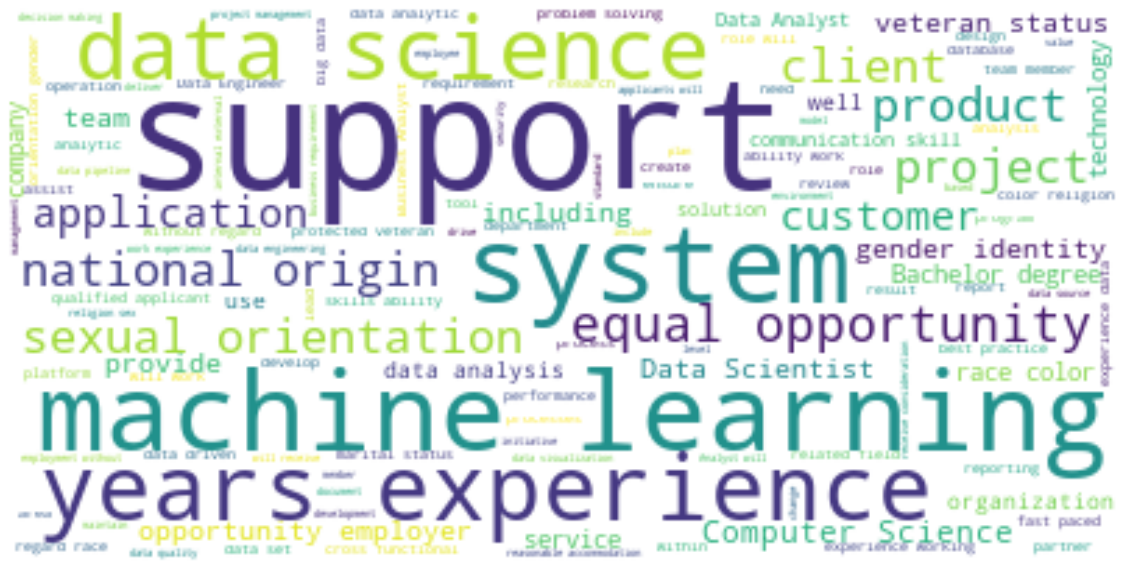

In [ ]:
#most popular words in job_description
# Generate a word cloud image
wordcloud = WordCloud(background_color='white').generate(" ".join(jobs_df['description']))
plt.figure(figsize=(20,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**Conclusion**

While removal of common words is still neccessary, it seems removal or exclusion of the disclosures about race, gender, religion, disability, and veteran status may also be necessary.

### **Description Text Cleaning**

In [ ]:
#make a df of just job_titles & descriptions

#create a function to clean the job_titles
def job_title_cleaning(text):
  #lowercase all letters
  text = text.lower()
  #change sr. to senior
  text = re.sub('sr.', 'senior', text)
  return text

#reg expression that will apply cleaning
round0 = lambda x: job_title_cleaning(x)

#create the df & apply cleaning to job_title
desc_df = pd.DataFrame(jobs_df.job_title.apply(round0))

#add descriptions to the df
desc_df['description'] =jobs_df['description']

desc_df.head()

,job_title,description
0,data analyst senior,Equivalent ExperienceDescription:Day to Day Re...
1,data analyst (gis),Summary/Objective:Execute transactions/tickets...
2,elint data analyst,Job DescriptionCACI delivers industry leading ...
3,data analyst,Online shopping has changed. Today’s eCommerce...
4,data analyst,Company DescriptionPublicis Sapient is a digit...


#### **Text Formatting**

In [ ]:
#create a function for first round of description cleaning
def text_cleaning(text):
  #change all lowercase letters followed by uppercase letters to include a space in between
  text = re.sub('(?<=[a-z])(?=[A-Z])', ' \g<0>', text)
  #replace / with a space
  text = re.sub('/', ' ', text)
  #make all lowercase letters
  text = text.lower()
  #put a space between any numbers adjacent to a letter
  text = re.sub('(?<=[0-9])(?=[a-z])',' \g<0>', text)
  #remove  characters
  text = re.sub('', '', text)
  #convert + to plus
  text = re.sub('[+]', 'plus', text)
  #remove brackets
  text = re.sub('\[.*?\]', '', text)
  #replace: with a pace
  text = re.sub(':', ' ', text)
  #remove punctuation
  text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
  #remove \n\n
  text = re.sub('\n\n', ' ', text)
  #remove quotation marks
  text = re.sub('[‘’“”…]', '', text)
  #change years to year
  text = re.sub('years', 'year', text)
  #change yrs to year
  text = re.sub('yrs', 'year', text)
  #change yr to year
  text = re.sub('yr', 'year', text)
  #chagnge experienceworking to experience
  text = re.sub('experienceworking', 'experience', text)
  #add a space after word degree
  text = re.sub('degree', 'degree ', text)
  #change ba to bachelors
  text = re.sub(' ba ', 'bachelors', text)
  #change bs to bachelors
  text = re.sub(' bs ', 'bachelors', text)
  #change ma to masters
  text = re.sub(' ma ', 'masters', text)
  #change ms to masters
  text = re.sub(' ms ', 'masters', text)
  #change doctoral to doctorate
  text = re.sub('doctoral', 'doctorate', text)
  #change doctorates to doctorate
  text = re.sub('doctorates', 'doctorate', text)
  #change phd to doctorate
  text = re.sub('phd', 'doctorate', text)
  #change artificial intelligence to ai
  text = re.sub('artificial intelligence', 'ai', text)
  #change natural language to nlp
  text = re.sub('natural language', 'nlp', text)
  #change nltk to nlp
  text = re.sub('nltk', 'nlp', text)
  #change machine learning to ml
  text = re.sub('machine learning', 'ml', text)
  #change mysql to sql
  text = re.sub('mysql', 'sql', text)
  #change postgresql to sql
  text = re.sub('postgresql', 'sql', text)
  #change ab testing to hypothesis testing
  text = re.sub('ab testing', 'hypothesis testing', text)
  #change dashboards to dashboard
  text = re.sub('dashboards', 'dashboard', text)
  #change dashboarding to dashboard
  text = re.sub('dashboarding', 'dashboard', text)
  #change handson analytic to nothing
  text = re.sub('handson analytic', '', text)
  #change data development to nothing
  text = re.sub('data development', '', text)
  #add space after word requirements
  text = re.sub('requirements', 'requirements ', text)
  return text

round1 = lambda x: text_cleaning(x)

In [ ]:
#view updated descriptions
clean_desc = pd.DataFrame(desc_df.description.apply(round1))
clean_desc['job_title'] = desc_df['job_title']
clean_desc.head(20)

,description,job_title
0,equivalent experience description day to day r...,data analyst senior
1,summary objective execute transactions tickets...,data analyst (gis)
2,job description caci delivers industry leading...,elint data analyst
3,online shopping has changed todays e commerce ...,data analyst
4,company description publicis sapient is a digi...,data analyst
5,about gmtheres never been a more exciting time...,data analyst
6,about us at cloudflare we have our eyes set on...,data analyst
7,data analyst high tech product enablement pla...,"data analyst, high tech product & enablement p..."
8,summary posted dec 18 2020 weekly hours 40 r...,business analyst - strategic data solutions
9,vets ez veterans ez info inc a verified servic...,data analyst (remote opportunity)


In [ ]:
clean_desc.head(20)

,description,job_title
0,equivalent experience description day to day r...,data analyst senior
1,summary objective execute transactions tickets...,data analyst (gis)
2,job description caci delivers industry leading...,elint data analyst
3,online shopping has changed todays e commerce ...,data analyst
4,company description publicis sapient is a digi...,data analyst
5,about gmtheres never been a more exciting time...,data analyst
6,about us at cloudflare we have our eyes set on...,data analyst
7,data analyst high tech product enablement pla...,"data analyst, high tech product & enablement p..."
8,summary posted dec 18 2020 weekly hours 40 r...,business analyst - strategic data solutions
9,vets ez veterans ez info inc a verified servic...,data analyst (remote opportunity)


#### **Excluding Stopwords**

In [ ]:
#set stop_words
stop_words = nltk.corpus.stopwords.words('english')

#add some words to stop_words
new_stop_words = ['combined', 'related', 'working', 'overall', 'work', 'more', 
               'recent', 'professional', 'relevant', 'industry']

for word in new_stop_words:
  stop_words.append(word)

#filter out all stop words
cleaned_desc = pd.DataFrame(data = (clean_desc['description'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))))

cleaned_desc['job_title'] = clean_desc['job_title']
cleaned_desc.head()

,description,job_title
0,equivalent experience description day day resp...,data analyst senior
1,summary objective execute transactions tickets...,data analyst (gis)
2,job description caci delivers leading signals ...,elint data analyst
3,online shopping changed todays e commerce runs...,data analyst
4,company description publicis sapient digital t...,data analyst


#### **Most Popular Words WordCloud**

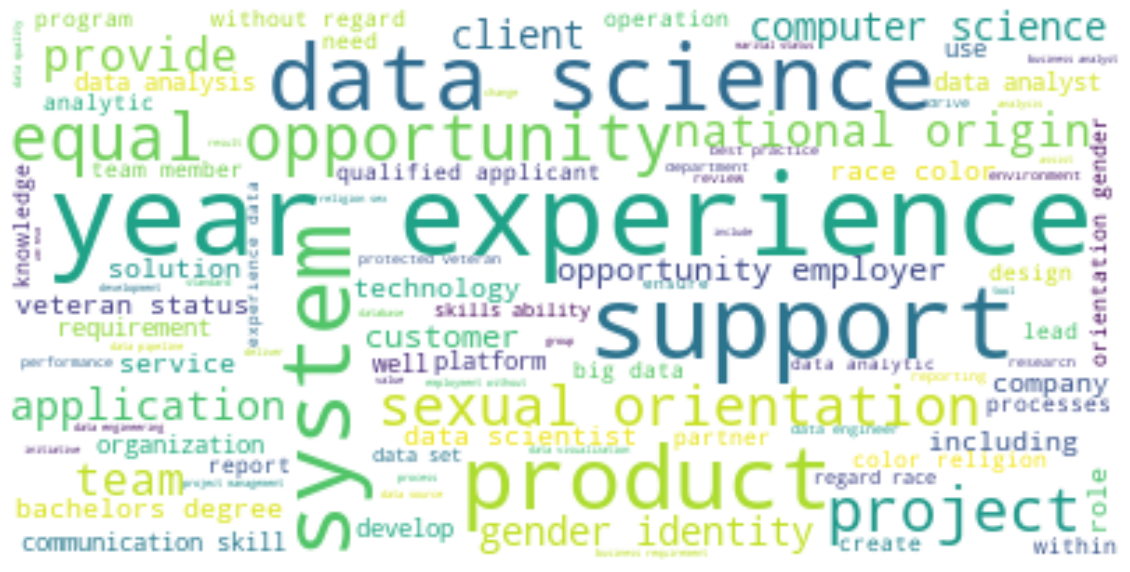

In [ ]:
#most popular words in job_description
wordcloud = WordCloud(background_color='white').generate(" ".join(cleaned_desc['description']))
plt.figure(figsize=(20,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**Conclusion**

The cleaned descriptions still contain several irrelevant words. Let's stop cleaning the text here and focus efforts on extracting pieces of information from the description with regular expressions.

### **Description Text Extraction**

#### **Text Extraction Function**

In [ ]:
#function to return which option(s) form a defined pattern a descrription contains
def pattern_searcher(search_str:str, search_list:str):
    search_obj = re.search(search_list, search_str)
    if search_obj :
        return_str = search_str[search_obj.start(): search_obj.end()]
    else:
        return_str = 'NA'
    return return_str

#### **Extract Years of Experience**

In [ ]:
#make a column to see if description has certain degree

years_exp = [
'6 months experience'
'1 year experience',
'one year experience',
'1plus year experience',
'oneplus year experience',
'1 plus year experience',
'one plus year experience',
'one more year experience'
'1plus year',
'oneplus year',
'1 plus year',
'one plus year',
'one year',
'1 year',
'1plus experience',
'oneplus experience',
'1 plus experience',
'one plus experience',
'2 year experience',
'two year experience',
'2plus year experience',
'twoplus year experience',
'2 plus year experience',
'two plus year experience',
'two more year experience',
'twoplus year',
'2plus year',
'two plus year',
'2 plus year',
'two year',
'2 year',
'2plus experience',
'twoplus experience',
'2 plus experience',
'two plus experience',
'3 year experience',
'35 year experience',
'three year experience',
'3plus year experience',
'threeplus year experience',
'3 plus year experience',
'three plus year experience',
'three more year experience',
'3plus year',
'threeplus year',
'3 plus year',
'three plus year',
'three year',
'3 year',
'3plus experience',
'threeplus experience',
'3 plus experience',
'three plus experience',
'4 year experience',
'four year experience',
'4plus year experience',
'fourplus year experience',
'4 plus year experience',
'four plus year experience',
'four more year experience',
'4plus year',
'fourplus year',
'4 plus year',
'four plus year',
'four year',
'4 year',
'4plus experience',
'fourplus experience',
'4 plus experience',
'four plus experience',
'5 year experience',
'five year experience',
'5plus year experience',
'fiveplus year experience',
'5 plus year experience',
'five plus year experience',
'five more year experience',
'5plus year',
'fiveplus year',
'5 plus year',
'five plus year',
'five year',
'5 year',
'5plus experience',
'fiveplus experience',
'5 plus experience',
'five plus experience',
'57 experience',
'6 year experience',
'six year experience',
'6plus year',
'sixplus year',
'6 plus year',
'six plus year',
'6plus year experience',
'sixplus year experience',
'6 plus year experience',
'six plus year experience',
'six more year experience',
'six year',
'6 year',
'6plus experience',
'sixplus experience',
'6 plus experience',
'six plus experience',
'7 year experience',
'seven year experience',
'7plus year experience',
'sevenplus year experience',
'7 plus year experience',
'seven plus year experience',
'seven more year experience',
'710 year experience',
'7plus year',
'sevenplus year',
'7 plus year',
'seven plus year',
'seven year',
'7 year',
'7plus experience',
'sevenplus experience',
'7 plus experience',
'seven plus experience',
'8 year experience',
'eight year experience',
'8plus year experience',
'eightplus year experience',
'8 plus year experience',
'eight plus year experience',
'eight more year experience',
'8plus year',
'eightplus year',
'8 plus year',
'eight plus year',
'eight year',
'8 year',
'8plus experience',
'eightplus experience',
'8 plus experience',
'eight plus experience',
'9 year experience',
'nine year experience',
'9plus year experience',
'nineplus year experience',
'9 plus year experience',
'nine plus year experience',
'nine more year experience',
'9plus year',
'nineplus year',
'9 plus year',
'nine plus year',
'nine year',
'9 year',
'9plus experience',
'nineplus experience',
'9 plus experience',
'nine plus experience',
'10 year experience',
'ten year experience',
'10plus year experience',
'tenplus year experience',
'10 plus year experience',
'ten plus year experience',
'ten more year experience',
'10plus year',
'tenplus year',
'10 plus year',
'ten plus year',
'ten year',
'10 year',
'10plus experience',
'tenplus experience',
'10 plus experience',
'ten plus experience'
]

#create a pattern
exp_pattern = '|'.join([f'(?i){year}' for year in years_exp])

#make a new column in jobs_df to represent which degree(s) a post mentions
cleaned_desc['years_exp'] = cleaned_desc['description'].apply(lambda x: pattern_searcher(search_str=x, search_list=exp_pattern))
cleaned_desc

,description,job_title,years_exp
0,equivalent experience description day day resp...,data analyst senior,3 year experience
1,summary objective execute transactions tickets...,data analyst (gis),1 year
2,job description caci delivers leading signals ...,elint data analyst,7 year experience
3,online shopping changed todays e commerce runs...,data analyst,3plus year experience
4,company description publicis sapient digital t...,data analyst,8plus year experience
...,...,...,...
3754,experienced data ml scientist excited web tech...,senior data & applied scientist,4plus year
3755,microsofts mission empower every person every ...,applied machine learning scientist,2plus year experience
3756,microsoft research looking talented data scien...,data scientist ii,NA
3757,introduction ibm garage founded 2014 make clie...,senior data scientist,5plus year experience


In [ ]:
cleaned_desc['years_exp'][82] = '1plus year'

In [ ]:
#check how many observations are NA
cleaned_desc_na = cleaned_desc['years_exp'] == 'NA'
cleaned_desc.iloc[cleaned_desc_na.values]

,description,job_title,years_exp
6,us cloudflare eyes set ambitious goal help bui...,data analyst,NA
13,introduction ibm job calling build design code...,data analyst (remediation),NA
15,momentum solar premier residential solar provi...,solar data analyst,NA
18,job summary commercial junior data analyst ass...,cmcrl jr. data analyst,NA
21,summary data analyst position member nfps fina...,data analyst ii,NA
...,...,...,...
3710,managing fleet ten thousand zipcars across mul...,data scientist,NA
3714,part enterprise data team data scientist suppo...,data scientist,NA
3718,overview nations largest residential solar cle...,energy services data scientist,NA
3746,job details descriptionthis position reserved ...,data science resident,NA


In [ ]:
#change years_exp to one specific number or NA value
six_mos = ['6 months experience']

one_year = ['1 year experience','one year experience','1plus year experience',
'oneplus year experience','1 plus year experience','one plus year experience',
'one more year experience''1plus year','oneplus year','1 plus year',
'one plus year','one year','1 year','1plus experience','oneplus experience',
'1 plus experience','one plus experience']

two_years = ['2 year experience','two year experience','2plus year experience',
'twoplus year experience','2 plus year experience','two plus year experience',
'two more year experience','twoplus year','2plus year','two plus year',
'2 plus year','two year','2 year','2plus experience','twoplus experience',
'2 plus experience','two plus experience']

three_years = ['3 year experience','35 year experience','three year experience',
'3plus year experience','threeplus year experience','3 plus year experience',
'three plus year experience','three more year experience','3plus year',
'threeplus year','3 plus year','three plus year','three year','3 year',
'3plus experience','threeplus experience','3 plus experience',
'three plus experience']

four_years = ['4 year experience','four year experience','4plus year experience',
'fourplus year experience','4 plus year experience','four plus year experience',
'four more year experience','4plus year','fourplus year','4 plus year',
'four plus year','four year','4 year','4plus experience','fourplus experience',
'4 plus experience','four plus experience']

five_years = ['5 year experience','five year experience','5plus year experience',
'fiveplus year experience','5 plus year experience','five plus year experience',
'five more year experience','5plus year','fiveplus year','5 plus year',
'five plus year','five year','5 year','5plus experience','fiveplus experience',
'5 plus experience','five plus experience','57 experience']

six_years = ['6 year experience','six year experience','6plus year',
'sixplus year','6 plus year','six plus year','6plus year experience',
'sixplus year experience','6 plus year experience','six plus year experience',
'six more year experience','six year','6 year','6plus experience',
'sixplus experience','6 plus experience','six plus experience']

seven_years = ['7 year experience','seven year experience','7plus year experience',
'sevenplus year experience','7 plus year experience','seven plus year experience',
'seven more year experience','710 year experience','7plus year','sevenplus year',
'7 plus year','seven plus year','seven year','7 year','7plus experience',
'sevenplus experience','7 plus experience','seven plus experience']

eight_years = ['8 year experience','eight year experience',
'8plus year experience','eightplus year experience','8 plus year experience',
'eight plus year experience','eight more year experience','8plus year',
'eightplus year','8 plus year','eight plus year','eight year','8 year',
'8plus experience','eightplus experience','8 plus experience',
'eight plus experience']

nine_years = ['9 year experience','nine year experience','9plus year experience',
'nineplus year experience','9 plus year experience','nine plus year experience',
'nine more year experience','9plus year','nineplus year','9 plus year',
'nine plus year','nine year','9 year','9plus experience','nineplus experience',
'9 plus experience','nine plus experience']

ten_years = ['10 year experience','ten year experience','10plus year experience',
'tenplus year experience','10 plus year experience','ten plus year experience',
'ten more year experience','10plus year','tenplus year','10 plus year',
'ten plus year','ten year','10 year','10plus experience','tenplus experience',
'10 plus experience','ten plus experience']

cleaned_desc['years_exp'] = cleaned_desc['years_exp'].apply(lambda x:0.5 if x in six_mos else 1 if x in one_year else 2 if x in two_years else 3 if x in three_years else 4 if x in four_years else 5 if x in five_years else 6 if x in six_years else 7 if x in seven_years else 8 if x in eight_years else 9 if x in nine_years else 10 if x in ten_years else -1)
cleaned_desc

,description,job_title,years_exp
0,equivalent experience description day day resp...,data analyst senior,3
1,summary objective execute transactions tickets...,data analyst (gis),1
2,job description caci delivers leading signals ...,elint data analyst,7
3,online shopping changed todays e commerce runs...,data analyst,3
4,company description publicis sapient digital t...,data analyst,8
...,...,...,...
3754,experienced data ml scientist excited web tech...,senior data & applied scientist,4
3755,microsofts mission empower every person every ...,applied machine learning scientist,2
3756,microsoft research looking talented data scien...,data scientist ii,-1
3757,introduction ibm garage founded 2014 make clie...,senior data scientist,5


In [ ]:
#create a df for nlp analysis in a separate notebook
# nlp_desc = pd.DataFrame()
# nlp_desc['description'] = cleaned_desc['description']
# nlp_desc['avg_sal'] = jobs_df['avg_sal']
# nlp_desc

**Note**

Since we found around 84% of the postings mentioning years of experience, analysis may contain model testing on one dataframe that includes years of experience and on others that would contain less data, without years of experience. Correlation of avg_sal & years of experience will tell us which route is appropriate.

#### **Extract Degrees**

In [ ]:
#make a column to see if description has certain degree
degrees = ['associates', 'bachelors', 'masters', 'doctorate']

for degree in degrees:
  cleaned_desc[degree] = clean_desc['description'].apply(lambda x: 1 if degree in x else 0)

cleaned_desc

,description,job_title,years_exp,associates,bachelors,masters,doctorate
0,equivalent experience description day day resp...,data analyst senior,3,0,0,0,0
1,summary objective execute transactions tickets...,data analyst (gis),1,0,0,0,0
2,job description caci delivers leading signals ...,elint data analyst,7,0,1,0,0
3,online shopping changed todays e commerce runs...,data analyst,3,0,0,0,0
4,company description publicis sapient digital t...,data analyst,8,0,0,0,0
...,...,...,...,...,...,...,...
3754,experienced data ml scientist excited web tech...,senior data & applied scientist,4,0,0,1,0
3755,microsofts mission empower every person every ...,applied machine learning scientist,2,0,1,1,0
3756,microsoft research looking talented data scien...,data scientist ii,-1,0,0,0,0
3757,introduction ibm garage founded 2014 make clie...,senior data scientist,5,0,0,0,0


#### **Extract Senior Job Titles**

In [ ]:
senior_lead = ['senior', 'lead', 'principal', 'manager']
for item in senior_lead:
  cleaned_desc[item] = clean_desc['job_title'].apply(lambda x: 1 if item in x else 0)

cleaned_desc

,description,job_title,years_exp,associates,bachelors,masters,doctorate,senior,lead,principal,manager
0,equivalent experience description day day resp...,data analyst senior,3,0,0,0,0,1,0,0,0
1,summary objective execute transactions tickets...,data analyst (gis),1,0,0,0,0,0,0,0,0
2,job description caci delivers leading signals ...,elint data analyst,7,0,1,0,0,0,0,0,0
3,online shopping changed todays e commerce runs...,data analyst,3,0,0,0,0,0,0,0,0
4,company description publicis sapient digital t...,data analyst,8,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
3754,experienced data ml scientist excited web tech...,senior data & applied scientist,4,0,0,1,0,1,0,0,0
3755,microsofts mission empower every person every ...,applied machine learning scientist,2,0,1,1,0,0,0,0,0
3756,microsoft research looking talented data scien...,data scientist ii,-1,0,0,0,0,0,0,0,0
3757,introduction ibm garage founded 2014 make clie...,senior data scientist,5,0,0,0,0,1,0,0,0


In [ ]:
#check if any of the senior job titles are all 0
cleaned_desc[['senior', 'lead', 'principal', 'manager']].nunique()

senior       2
lead         2
principal    2
manager      2
dtype: int64

#### **Extract Languages**

In [ ]:
languages = ['bash','cplusplus','html','java','javascript','julia','matlab',
'oracle','python',' r ','ruby','sas','scala','sql']
for language in languages:
  cleaned_desc[language] = clean_desc['description'].apply(lambda x: 1 if language in x else 0)

cleaned_desc

,description,job_title,years_exp,associates,bachelors,masters,doctorate,senior,lead,principal,manager,bash,cplusplus,html,java,javascript,julia,matlab,oracle,python,r,ruby,sas,scala,sql
0,equivalent experience description day day resp...,data analyst senior,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,summary objective execute transactions tickets...,data analyst (gis),1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,job description caci delivers leading signals ...,elint data analyst,7,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
3,online shopping changed todays e commerce runs...,data analyst,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1
4,company description publicis sapient digital t...,data analyst,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3754,experienced data ml scientist excited web tech...,senior data & applied scientist,4,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0
3755,microsofts mission empower every person every ...,applied machine learning scientist,2,0,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0
3756,microsoft research looking talented data scien...,data scientist ii,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3757,introduction ibm garage founded 2014 make clie...,senior data scientist,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0


In [ ]:
#check if any of the languages are all 0
cleaned_desc[['bash','cplusplus','html','java','javascript','julia','matlab',
'oracle','python',' r ','ruby','sas','scala','sql']].nunique()

bash          2
cplusplus     2
html          2
java          2
javascript    2
julia         2
matlab        2
oracle        2
python        2
 r            2
ruby          2
sas           2
scala         2
sql           2
dtype: int64

#### **Extract Coding Interfaces**

In [ ]:
code_interfraces = ['colab','command line','git ','github','jupyter','notebook']
for item in code_interfraces:
  cleaned_desc[item] = clean_desc['description'].apply(lambda x: 1 if item in x else 0)

cleaned_desc

,description,job_title,years_exp,associates,bachelors,masters,doctorate,senior,lead,principal,manager,bash,cplusplus,html,java,javascript,julia,matlab,oracle,python,r,ruby,sas,scala,sql,colab,command line,git,github,jupyter,notebook
0,equivalent experience description day day resp...,data analyst senior,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,summary objective execute transactions tickets...,data analyst (gis),1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,job description caci delivers leading signals ...,elint data analyst,7,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
3,online shopping changed todays e commerce runs...,data analyst,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,0,0,0,0
4,company description publicis sapient digital t...,data analyst,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3754,experienced data ml scientist excited web tech...,senior data & applied scientist,4,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3755,microsofts mission empower every person every ...,applied machine learning scientist,2,0,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
3756,microsoft research looking talented data scien...,data scientist ii,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3757,introduction ibm garage founded 2014 make clie...,senior data scientist,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1


In [ ]:
#check if any of the code interfraces are all 0
cleaned_desc[['colab','command line','git ','github','jupyter','notebook']].nunique()

colab           2
command line    2
git             2
github          2
jupyter         2
notebook        2
dtype: int64

In [ ]:
#drop colab from df
cleaned_desc.drop(columns='colab', inplace=True)

#### **Extract Visualization Platforms**

In [ ]:
dashboards = ['dashboard','data studio','looker','power bi','sisense','tableau']
for dashboard in dashboards:
  cleaned_desc[dashboard] = clean_desc['description'].apply(lambda x: 1 if dashboard in x else 0)

cleaned_desc

,description,job_title,years_exp,associates,bachelors,masters,doctorate,senior,lead,principal,manager,bash,cplusplus,html,java,javascript,julia,matlab,oracle,python,r,ruby,sas,scala,sql,command line,git,github,jupyter,notebook,dashboard,data studio,looker,power bi,sisense,tableau
0,equivalent experience description day day resp...,data analyst senior,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1
1,summary objective execute transactions tickets...,data analyst (gis),1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,job description caci delivers leading signals ...,elint data analyst,7,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,online shopping changed todays e commerce runs...,data analyst,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
4,company description publicis sapient digital t...,data analyst,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3754,experienced data ml scientist excited web tech...,senior data & applied scientist,4,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3755,microsofts mission empower every person every ...,applied machine learning scientist,2,0,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3756,microsoft research looking talented data scien...,data scientist ii,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3757,introduction ibm garage founded 2014 make clie...,senior data scientist,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0


In [ ]:
#check if any of the dashboards are all 0
cleaned_desc[['dashboard','data studio','looker','power bi','sisense','tableau']].nunique()

dashboard      2
data studio    2
looker         2
power bi       2
sisense        2
tableau        2
dtype: int64

#### **Extract Big Data Skills**

In [ ]:
big_data = ['airflow','big data','bigquery','cassandra','docker','etl','hadoop',
'hbase','hdfs','hive','impala','kafka','kubeflow','kubernetes']
for tool in big_data:
  cleaned_desc[tool] = clean_desc['description'].apply(lambda x: 1 if tool in x else 0)

cleaned_desc

,description,job_title,years_exp,associates,bachelors,masters,doctorate,senior,lead,principal,manager,bash,cplusplus,html,java,javascript,julia,matlab,oracle,python,r,ruby,sas,scala,sql,command line,git,github,jupyter,notebook,dashboard,data studio,looker,power bi,sisense,tableau,airflow,big data,bigquery,cassandra,docker,etl,hadoop,hbase,hdfs,hive,impala,kafka,kubeflow,kubernetes
0,equivalent experience description day day resp...,data analyst senior,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,summary objective execute transactions tickets...,data analyst (gis),1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,job description caci delivers leading signals ...,elint data analyst,7,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,online shopping changed todays e commerce runs...,data analyst,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,company description publicis sapient digital t...,data analyst,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3754,experienced data ml scientist excited web tech...,senior data & applied scientist,4,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3755,microsofts mission empower every person every ...,applied machine learning scientist,2,0,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3756,microsoft research looking talented data scien...,data scientist ii,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3757,introduction ibm garage founded 2014 make clie...,senior data scientist,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
#check if any of the big data tools had only 1 unique value
cleaned_desc[['airflow','big data','bigquery','cassandra','docker','etl','hadoop',
'hbase','hdfs','hive','impala','kafka','kubeflow','kubernetes']].nunique()

airflow       2
big data      2
bigquery      2
cassandra     2
docker        2
etl           2
hadoop        2
hbase         2
hdfs          2
hive          2
impala        2
kafka         2
kubeflow      2
kubernetes    2
dtype: int64

#### **Extract Cloud Skills**

In [ ]:
clouds = ['aws','azure','dynamodb','ec2','gcp','google cloud','lambda','mongodb',
'redshift','s3','saas','snowflake']
for cloud in clouds:
  cleaned_desc[cloud] = clean_desc['description'].apply(lambda x: 1 if cloud in x else 0)

cleaned_desc

,description,job_title,years_exp,associates,bachelors,masters,doctorate,senior,lead,principal,manager,bash,cplusplus,html,java,javascript,julia,matlab,oracle,python,r,ruby,sas,scala,sql,command line,git,github,jupyter,notebook,dashboard,data studio,looker,power bi,sisense,tableau,airflow,big data,bigquery,cassandra,docker,etl,hadoop,hbase,hdfs,hive,impala,kafka,kubeflow,kubernetes,aws,azure,dynamodb,ec2,gcp,google cloud,lambda,mongodb,redshift,s3,saas,snowflake
0,equivalent experience description day day resp...,data analyst senior,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,summary objective execute transactions tickets...,data analyst (gis),1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,job description caci delivers leading signals ...,elint data analyst,7,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,online shopping changed todays e commerce runs...,data analyst,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,company description publicis sapient digital t...,data analyst,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3754,experienced data ml scientist excited web tech...,senior data & applied scientist,4,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3755,microsofts mission empower every person every ...,applied machine learning scientist,2,0,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0
3756,microsoft research looking talented data scien...,data scientist ii,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3757,introduction ibm garage founded 2014 make clie...,senior data scientist,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
#check if any of the cloud tools are all 0
cleaned_desc[['aws','azure','dynamodb','ec2','gcp','google cloud','lambda','mongodb',
'redshift','s3','saas','snowflake']].nunique()

aws             2
azure           2
dynamodb        1
ec2             2
gcp             2
google cloud    2
lambda          2
mongodb         2
redshift        2
s3              2
saas            2
snowflake       2
dtype: int64

#### **Extract Outside Platform Tools**

In [ ]:
platforms = ['google analytics','google sheets','linux','microsoft', 'microsoft excel',
'powerpoint','salesforce']
for item in platforms:
  cleaned_desc[item] = clean_desc['description'].apply(lambda x: 1 if item in x else 0)

cleaned_desc

,description,job_title,years_exp,associates,bachelors,masters,doctorate,senior,lead,principal,manager,bash,cplusplus,html,java,javascript,julia,matlab,oracle,python,r,ruby,sas,scala,sql,command line,git,github,jupyter,notebook,dashboard,data studio,looker,power bi,sisense,tableau,airflow,big data,bigquery,cassandra,docker,etl,hadoop,hbase,hdfs,hive,impala,kafka,kubeflow,kubernetes,aws,azure,dynamodb,ec2,gcp,google cloud,lambda,mongodb,redshift,s3,saas,snowflake,google analytics,google sheets,linux,microsoft,microsoft excel,powerpoint,salesforce
0,equivalent experience description day day resp...,data analyst senior,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,summary objective execute transactions tickets...,data analyst (gis),1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,job description caci delivers leading signals ...,elint data analyst,7,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,online shopping changed todays e commerce runs...,data analyst,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,company description publicis sapient digital t...,data analyst,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3754,experienced data ml scientist excited web tech...,senior data & applied scientist,4,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3755,microsofts mission empower every person every ...,applied machine learning scientist,2,0,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3756,microsoft research looking talented data scien...,data scientist ii,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3757,introduction ibm garage founded 2014 make clie...,senior data scientist,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
#check if any of the outside platform tools are all 0
cleaned_desc[['google analytics','google sheets','linux','microsoft', 'microsoft excel',
'powerpoint','salesforce']].nunique()

google analytics    2
google sheets       2
linux               2
microsoft           2
microsoft excel     2
powerpoint          2
salesforce          2
dtype: int64

#### **Extract Data Science Concepts**

In [ ]:
concepts = [' ai ','ajax','api','etl','forecasting','hypothesis testing',
'json','kpi',' ml ','nlp','pipeline','predictive','regression','statistical',
'time series']
for item in concepts:
  cleaned_desc[item] = clean_desc['description'].apply(lambda x: 1 if item in x else 0)

cleaned_desc

,description,job_title,years_exp,associates,bachelors,masters,doctorate,senior,lead,principal,manager,bash,cplusplus,html,java,javascript,julia,matlab,oracle,python,r,ruby,sas,scala,sql,command line,git,github,jupyter,notebook,dashboard,data studio,looker,power bi,sisense,tableau,airflow,big data,bigquery,cassandra,...,hbase,hdfs,hive,impala,kafka,kubeflow,kubernetes,aws,azure,dynamodb,ec2,gcp,google cloud,lambda,mongodb,redshift,s3,saas,snowflake,google analytics,google sheets,linux,microsoft,microsoft excel,powerpoint,salesforce,ai,ajax,api,forecasting,hypothesis testing,json,kpi,ml,nlp,pipeline,predictive,regression,statistical,time series
0,equivalent experience description day day resp...,data analyst senior,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,summary objective execute transactions tickets...,data analyst (gis),1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,job description caci delivers leading signals ...,elint data analyst,7,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,online shopping changed todays e commerce runs...,data analyst,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,company description publicis sapient digital t...,data analyst,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3754,experienced data ml scientist excited web tech...,senior data & applied scientist,4,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0
3755,microsofts mission empower every person every ...,applied machine learning scientist,2,0,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
3756,microsoft research looking talented data scien...,data scientist ii,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3757,introduction ibm garage founded 2014 make clie...,senior data scientist,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,1,0,0,1,0


In [ ]:
#check if any of the ds concepts are all 0
cleaned_desc[[' ai ','ajax','api','etl','forecasting','hypothesis testing',
'json','kpi',' ml ','nlp','pipeline','predictive','regression','statistical',
'time series']].nunique()

 ai                   2
ajax                  2
api                   2
etl                   2
forecasting           2
hypothesis testing    2
json                  2
kpi                   2
 ml                   2
nlp                   2
pipeline              2
predictive            2
regression            2
statistical           2
time series           2
dtype: int64

#### **Extract Libraries**

In [ ]:
libraries = ['matplotlib','numpy','pandas','scikit','seaborn']
for item in libraries:
  cleaned_desc[item] = clean_desc['description'].apply(lambda x: 1 if item in x else 0)

cleaned_desc

,description,job_title,years_exp,associates,bachelors,masters,doctorate,senior,lead,principal,manager,bash,cplusplus,html,java,javascript,julia,matlab,oracle,python,r,ruby,sas,scala,sql,command line,git,github,jupyter,notebook,dashboard,data studio,looker,power bi,sisense,tableau,airflow,big data,bigquery,cassandra,...,kubeflow,kubernetes,aws,azure,dynamodb,ec2,gcp,google cloud,lambda,mongodb,redshift,s3,saas,snowflake,google analytics,google sheets,linux,microsoft,microsoft excel,powerpoint,salesforce,ai,ajax,api,forecasting,hypothesis testing,json,kpi,ml,nlp,pipeline,predictive,regression,statistical,time series,matplotlib,numpy,pandas,scikit,seaborn
0,equivalent experience description day day resp...,data analyst senior,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,summary objective execute transactions tickets...,data analyst (gis),1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,job description caci delivers leading signals ...,elint data analyst,7,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,online shopping changed todays e commerce runs...,data analyst,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,company description publicis sapient digital t...,data analyst,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3754,experienced data ml scientist excited web tech...,senior data & applied scientist,4,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0
3755,microsofts mission empower every person every ...,applied machine learning scientist,2,0,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3756,microsoft research looking talented data scien...,data scientist ii,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3757,introduction ibm garage founded 2014 make clie...,senior data scientist,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,1,0,0,1,0,0,0,0,0,0


In [ ]:
#check if any of the libraries are all 0
cleaned_desc[['matplotlib','numpy','pandas','scikit','seaborn']].nunique()

matplotlib    2
numpy         2
pandas        2
scikit        2
seaborn       2
dtype: int64

#### **Extract Deep Learning Techniques**

In [ ]:
deep_learning = ['apache','keras','neural','spark','tensorflow']
for item in deep_learning:
  cleaned_desc[item] = clean_desc['description'].apply(lambda x: 1 if item in x else 0)

cleaned_desc

,description,job_title,years_exp,associates,bachelors,masters,doctorate,senior,lead,principal,manager,bash,cplusplus,html,java,javascript,julia,matlab,oracle,python,r,ruby,sas,scala,sql,command line,git,github,jupyter,notebook,dashboard,data studio,looker,power bi,sisense,tableau,airflow,big data,bigquery,cassandra,...,ec2,gcp,google cloud,lambda,mongodb,redshift,s3,saas,snowflake,google analytics,google sheets,linux,microsoft,microsoft excel,powerpoint,salesforce,ai,ajax,api,forecasting,hypothesis testing,json,kpi,ml,nlp,pipeline,predictive,regression,statistical,time series,matplotlib,numpy,pandas,scikit,seaborn,apache,keras,neural,spark,tensorflow
0,equivalent experience description day day resp...,data analyst senior,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,summary objective execute transactions tickets...,data analyst (gis),1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,job description caci delivers leading signals ...,elint data analyst,7,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,online shopping changed todays e commerce runs...,data analyst,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,company description publicis sapient digital t...,data analyst,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3754,experienced data ml scientist excited web tech...,senior data & applied scientist,4,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3755,microsofts mission empower every person every ...,applied machine learning scientist,2,0,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3756,microsoft research looking talented data scien...,data scientist ii,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
3757,introduction ibm garage founded 2014 make clie...,senior data scientist,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0


In [ ]:
#check if any of the deeep learning techniques are all 0
cleaned_desc[['apache','keras','neural','spark','tensorflow']].nunique()

apache        2
keras         2
neural        2
spark         2
tensorflow    2
dtype: int64

#### **Extract Web Application Platforms**

In [ ]:
web_apps = ['bottle','cherrypy','django','flask','pyramid','quixote',
            'turbogears','web2py']
for item in web_apps:
  cleaned_desc[item] = clean_desc['description'].apply(lambda x: 1 if item in x else 0)

cleaned_desc

,description,job_title,years_exp,associates,bachelors,masters,doctorate,senior,lead,principal,manager,bash,cplusplus,html,java,javascript,julia,matlab,oracle,python,r,ruby,sas,scala,sql,command line,git,github,jupyter,notebook,dashboard,data studio,looker,power bi,sisense,tableau,airflow,big data,bigquery,cassandra,...,snowflake,google analytics,google sheets,linux,microsoft,microsoft excel,powerpoint,salesforce,ai,ajax,api,forecasting,hypothesis testing,json,kpi,ml,nlp,pipeline,predictive,regression,statistical,time series,matplotlib,numpy,pandas,scikit,seaborn,apache,keras,neural,spark,tensorflow,bottle,cherrypy,django,flask,pyramid,quixote,turbogears,web2py
0,equivalent experience description day day resp...,data analyst senior,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,summary objective execute transactions tickets...,data analyst (gis),1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,job description caci delivers leading signals ...,elint data analyst,7,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,online shopping changed todays e commerce runs...,data analyst,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,company description publicis sapient digital t...,data analyst,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3754,experienced data ml scientist excited web tech...,senior data & applied scientist,4,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3755,microsofts mission empower every person every ...,applied machine learning scientist,2,0,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3756,microsoft research looking talented data scien...,data scientist ii,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
3757,introduction ibm garage founded 2014 make clie...,senior data scientist,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0


In [ ]:
#check if any of the web application platforms are all 0
cleaned_desc[['bottle','cherrypy','django','flask','pyramid','quixote',
            'turbogears','web2py']].nunique()

bottle        2
cherrypy      1
django        2
flask         2
pyramid       1
quixote       1
turbogears    1
web2py        1
dtype: int64

In [ ]:
cleaned_desc.drop(columns=['cherrypy','pyramid','quixote',
            'turbogears','web2py'], inplace=True)

### **Skills Visualizations**

#### **Most Popular Years of Experience**

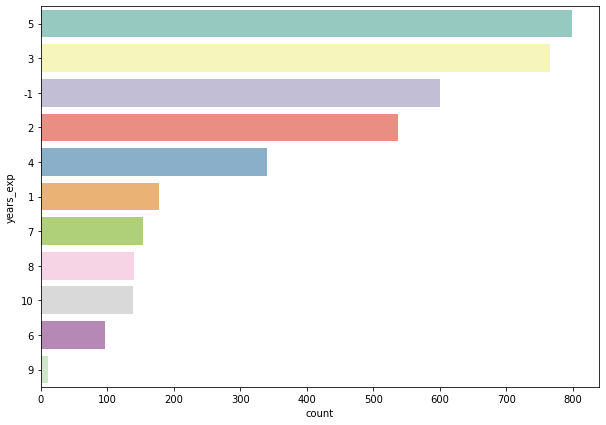

In [ ]:
plt.figure(figsize=(10,7))
sns.countplot(y='years_exp', palette='Set3',data=cleaned_desc,
  order=cleaned_desc['years_exp'].value_counts().index)
plt.show()

**Interpretation**

Most job postings did not define years of experience, or we didn't account for them accurattely. However if years of experience were detected, it was most commonly 5 or 3 years of experience.

#### **Most Popular Degrees**

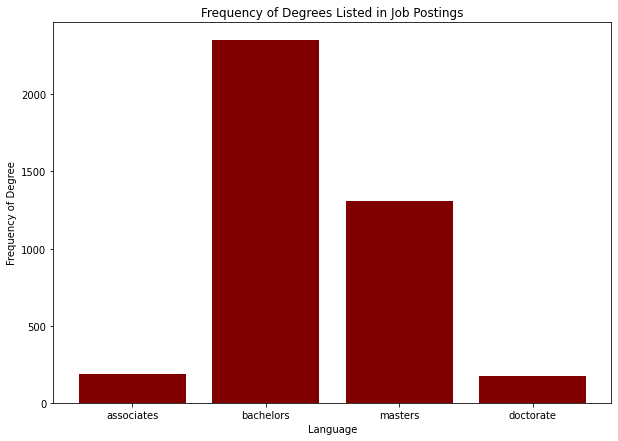

In [ ]:
#create a sum of each degree column
associates_sum = sum(cleaned_desc['associates'])
bachelors_sum = sum(cleaned_desc['bachelors'])
masters_sum = sum(cleaned_desc['masters'])
doctorate_sum = sum(cleaned_desc['doctorate'])

#make a dictionary of degree sums so we can plot visualization
degree_sums = {'associates':associates_sum, 'bachelors': bachelors_sum, 
               'masters': masters_sum, 'doctorate': doctorate_sum}

plt.figure(figsize=(10,7))
plt.bar(range(len(degree_sums)), list(degree_sums.values()), align='center', color='maroon')
plt.xticks(range(len(degree_sums)), list(degree_sums.keys()))
plt.ylabel('Frequency of Degree')
plt.title('Frequency of Degrees Listed in Job Postings')
plt.xlabel('Language')
plt.show()


**Interpretation**

If a degree is mentioned it's most often a bachelors or masters degree. 

#### **How Many Senior Job Titles?**

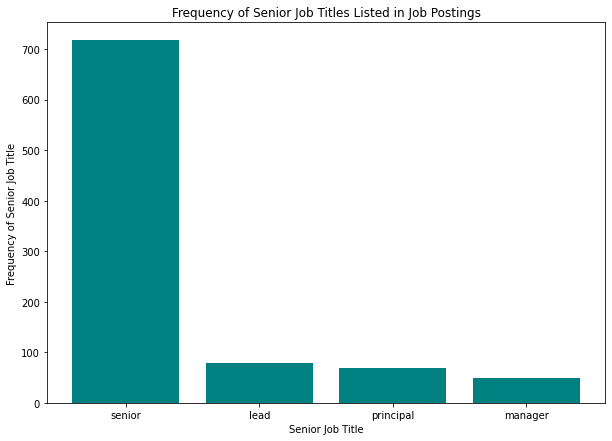

In [ ]:
#create a sum of each visualization column
senior_sum = sum(cleaned_desc['senior'])
lead_sum = sum(cleaned_desc['lead'])
principal_sum = sum(cleaned_desc['principal'])
manager_sum = sum(cleaned_desc['manager'])

#make a dictionary of visualization sums so we can plot visualization
title_sums = {'senior':senior_sum, 'lead':lead_sum, 'principal':principal_sum,
              'manager':manager_sum}

plt.figure(figsize=(10,7))
plt.bar(range(len(title_sums)), list(title_sums.values()), align='center', color='teal')
plt.xticks(range(len(title_sums)), list(title_sums.keys()))
plt.ylabel('Frequency of Senior Job Title')
plt.title('Frequency of Senior Job Titles Listed in Job Postings')
plt.xlabel('Senior Job Title')
plt.show()

**Interpretation**

About 20% of jobs had senior in the title and much fewer had lead, principal, or manager.

#### **Most Popular Languages**

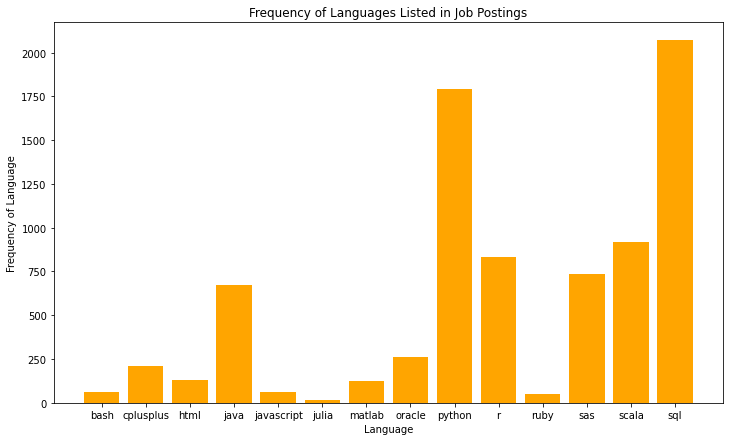

In [ ]:
#create a sum of each language column
bash_sum = sum(cleaned_desc['bash'])
cplusplus_sum = sum(cleaned_desc['cplusplus'])
html_sum = sum(cleaned_desc['html'])
java_sum = sum(cleaned_desc['java'])
javascript_sum = sum(cleaned_desc['javascript'])
julia_sum = sum(cleaned_desc['julia'])
matlab_sum = sum(cleaned_desc['matlab'])
oracle_sum = sum(cleaned_desc['oracle'])
python_sum = sum(cleaned_desc['python'])
r_sum = sum(cleaned_desc[' r '])
ruby_sum = sum(cleaned_desc['ruby'])
sas_sum = sum(cleaned_desc['sas'])
scala_sum = sum(cleaned_desc['scala'])
sql_sum = sum(cleaned_desc['sql'])

#make a dictionary of language sums so we can plot visualization
language_sums = {'bash':bash_sum,'cplusplus': cplusplus_sum,'html':html_sum,
'java':java_sum,'javascript':javascript_sum,'julia':julia_sum,'matlab':matlab_sum,
'oracle': oracle_sum,'python':python_sum,'r':r_sum, 'ruby':ruby_sum, 
'sas':sas_sum,'scala':scala_sum,'sql':sql_sum}

plt.figure(figsize=(12,7))
plt.bar(range(len(language_sums)), list(language_sums.values()), align='center', color='orange')
plt.xticks(range(len(language_sums)), list(language_sums.keys()))
plt.ylabel('Frequency of Language')
plt.title('Frequency of Languages Listed in Job Postings')
plt.xlabel('Language')
plt.show()

**Interpretation**

The most important languages to have are sql and python but java, r, sas, and scala were mentioned somewhat frequently as well.  

#### **Most Popular Coding Interfaces**

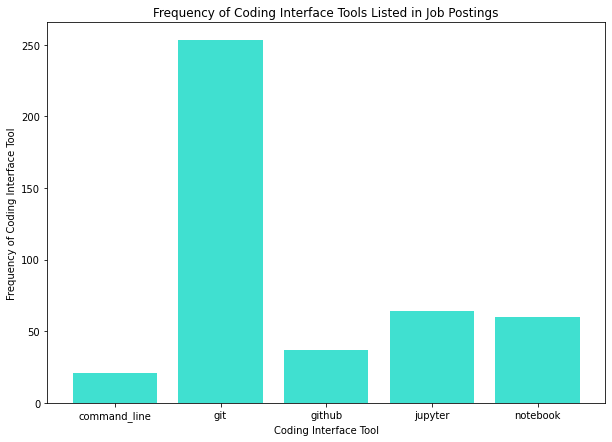

In [ ]:
#create a sum of each coding interface column
command_line_sum = sum(cleaned_desc['command line'])
git_sum = sum(cleaned_desc['git '])
github_sum = sum(cleaned_desc['github'])
jupyter_sum = sum(cleaned_desc['jupyter'])
notebook_sum = sum(cleaned_desc['notebook'])

#make a dictionary of coding interface sums so we can plot visualization
vis_sums = {'command_line':command_line_sum, 'git':git_sum, 
'github': github_sum, 'jupyter': jupyter_sum,'notebook': notebook_sum}

plt.figure(figsize=(10,7))
plt.bar(range(len(vis_sums)), list(vis_sums.values()), align='center', color='turquoise')
plt.xticks(range(len(vis_sums)), list(vis_sums.keys()))
plt.ylabel('Frequency of Coding Interface Tool')
plt.title('Frequency of Coding Interface Tools Listed in Job Postings')
plt.xlabel('Coding Interface Tool')
plt.show()

**Interpretation**

Coding interfaces are mentioned infrequently. 

#### **Most Popular Visualization Tools**

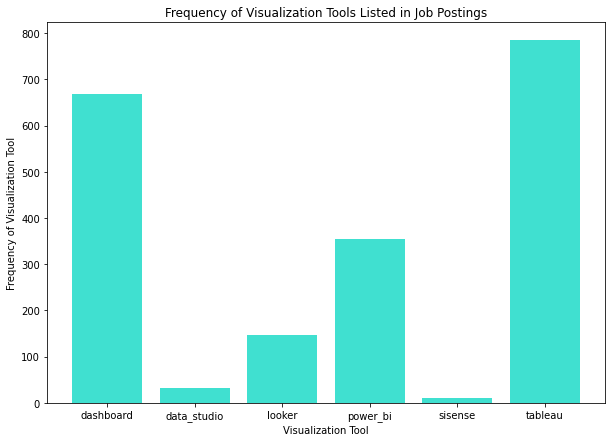

In [ ]:
#create a sum of each visualization column
dashboard_sum = sum(cleaned_desc['dashboard'])
data_studio_sum = sum(cleaned_desc['data studio'])
looker_sum = sum(cleaned_desc['looker'])
power_bi_sum = sum(cleaned_desc['power bi'])
sisense_sum = sum(cleaned_desc['sisense'])
tableau_sum = sum(cleaned_desc['tableau'])

#make a dictionary of visualization sums so we can plot visualization
vis_sums = {'dashboard': dashboard_sum,'data_studio': data_studio_sum,
'looker': looker_sum,'power_bi': power_bi_sum,'sisense': sisense_sum,
'tableau': tableau_sum}

plt.figure(figsize=(10,7))
plt.bar(range(len(vis_sums)), list(vis_sums.values()), align='center', color='turquoise')
plt.xticks(range(len(vis_sums)), list(vis_sums.keys()))
plt.ylabel('Frequency of Visualization Tool')
plt.title('Frequency of Visualization Tools Listed in Job Postings')
plt.xlabel('Visualization Tool')
plt.show()

**Interpretation**

If a dashboarding tool is mentioned, tableau is most often the tool of choice followed by dashboard in general. 

#### **Most Popular Big Data Skills**

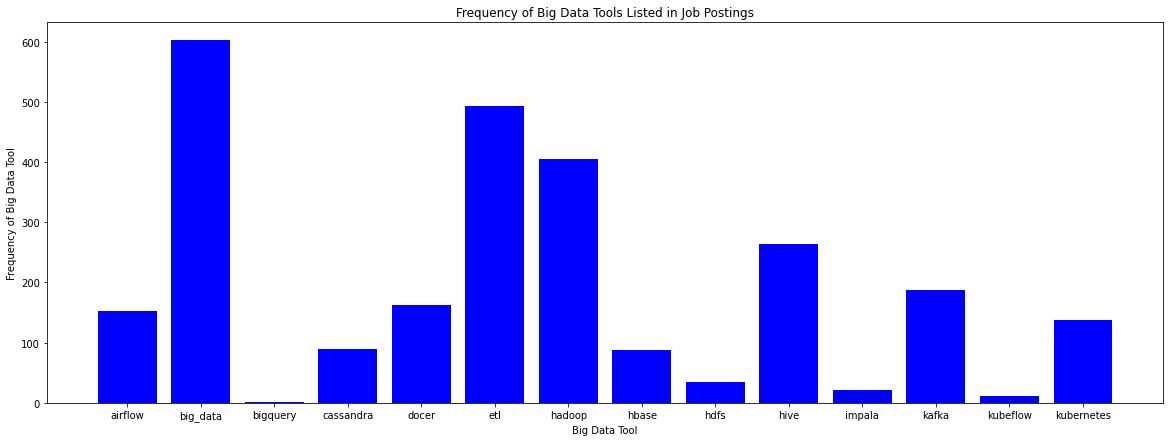

In [ ]:
#create a sum of each big data column
airflow_sum = sum(cleaned_desc['airflow'])
big_data_sum = sum(cleaned_desc['big data'])
bigquery_sum = sum(cleaned_desc['bigquery'])
cassandra_sum = sum(cleaned_desc['cassandra'])
docker_sum = sum(cleaned_desc['docker'])
etl_sum = sum(cleaned_desc['etl'])
hadoop_sum = sum(cleaned_desc['hadoop'])
hbase_sum = sum(cleaned_desc['hbase'])
hdfs_sum = sum(cleaned_desc['hdfs']) 
hive_sum = sum(cleaned_desc['hive']) 
impala_sum = sum(cleaned_desc['impala'])
kafka_sum = sum(cleaned_desc['kafka'])
kubeflow_sum = sum(cleaned_desc['kubeflow'])
kubernetes_sum = sum(cleaned_desc['kubernetes'])

#make a dictionary of big data sums so we can plot visualization
big_data_sums = {'airflow': airflow_sum,'big_data': big_data_sum,
'bigquery': bigquery_sum,'cassandra': cassandra_sum, 'docer':docker_sum,'etl': etl_sum,
'hadoop': hadoop_sum,'hbase': hbase_sum,'hdfs': hdfs_sum,'hive': hive_sum,
'impala': impala_sum,'kafka': kafka_sum,'kubeflow': kubeflow_sum,
'kubernetes': kubernetes_sum}

plt.figure(figsize=(20,7))
plt.bar(range(len(big_data_sums)), list(big_data_sums.values()), align='center', color='blue')
plt.xticks(range(len(big_data_sums)), list(big_data_sums.keys()))
plt.ylabel('Frequency of Big Data Tool')
plt.title('Frequency of Big Data Tools Listed in Job Postings')
plt.xlabel('Big Data Tool')
plt.show()

**Interpretation**

Big data skills aren't mentioned in most jobs but if they are, big data and etl are in general is mentioned, and most popular specific tool is hadoop.

#### **Most Popular Cloud Skills**

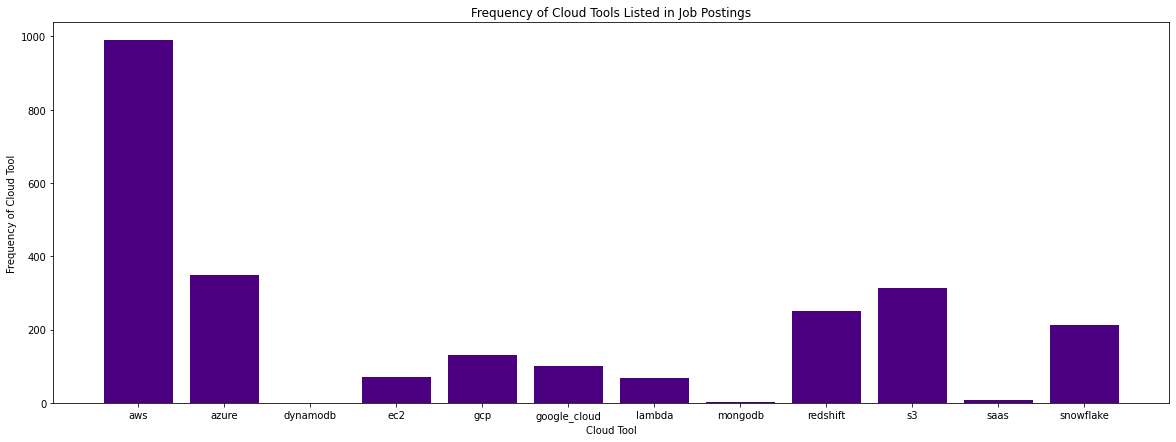

In [ ]:
#create a sum of each cloud column
aws_sum = sum(cleaned_desc['aws'])
azure_sum = sum(cleaned_desc['azure'])
dynamodb_sum = sum(cleaned_desc['dynamodb'])
ec2_sum = sum(cleaned_desc['ec2'])
gcp_sum = sum(cleaned_desc['gcp'])
google_cloud_sum = sum(cleaned_desc['google cloud'])
lambda_sum = sum(cleaned_desc['lambda']) 
mongodb_sum = sum(cleaned_desc['mongodb'])
redshift_sum = sum(cleaned_desc['redshift'])
s3_sum = sum(cleaned_desc['s3'])
saas_sum = sum(cleaned_desc['saas'])
snowflake_sum = sum(cleaned_desc['snowflake'])

#make a dictionary of cloud sums so we can plot visualization
cloud_sums = {'aws': aws_sum,'azure': azure_sum,'dynamodb': dynamodb_sum,
'ec2': ec2_sum,'gcp': gcp_sum,'google_cloud': google_cloud_sum,
'lambda': lambda_sum,'mongodb': mongodb_sum,'redshift': redshift_sum,
's3': s3_sum, 'saas': saas_sum, 'snowflake':snowflake_sum}

plt.figure(figsize=(20,7))
plt.bar(range(len(cloud_sums)), list(cloud_sums.values()), align='center', color='indigo')
plt.xticks(range(len(cloud_sums)), list(cloud_sums.keys()))
plt.ylabel('Frequency of Cloud Tool')
plt.title('Frequency of Cloud Tools Listed in Job Postings')
plt.xlabel('Cloud Tool')
plt.show()

**Interpretation**

The most frequently mentioned cloud platform is aws.

#### **Most Popular Outside Platform Tools**

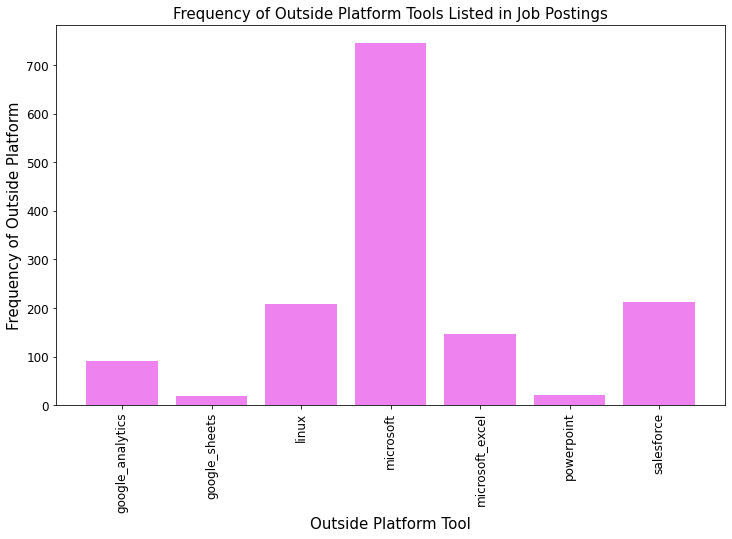

In [ ]:
#create a sum of each outside platform tool
google_analytics_sum = sum(cleaned_desc['google analytics'])
google_sheets_sum = sum(cleaned_desc['google sheets'])
linux_sum = sum(cleaned_desc['linux'])
microsoft_sum = sum(cleaned_desc['microsoft'])
microsoft_excel_sum = sum(cleaned_desc['microsoft excel'])
powerpoint_sum = sum(cleaned_desc['powerpoint'])
salesforce_sum = sum(cleaned_desc['salesforce'])

#make a dictionary of miscellaneous outside platform sums so we can plot visualization
platform_sums = {'google_analytics':google_analytics_sum,
'google_sheets':google_sheets_sum,'linux':linux_sum,'microsoft':microsoft_sum,
'microsoft_excel':microsoft_excel_sum, 'powerpoint':powerpoint_sum,
'salesforce':salesforce_sum}

plt.figure(figsize=(12,7))
plt.bar(range(len(platform_sums)), list(platform_sums.values()), align='center', color='violet')
plt.xticks(range(len(platform_sums)), list(platform_sums.keys()), rotation = 90, fontsize=12)
plt.yticks(fontsize = 12)
plt.ylabel('Frequency of Outside Platform', fontsize=15)
plt.title('Frequency of Outside Platform Tools Listed in Job Postings',fontsize=15)
plt.xlabel('Outside Platform Tool', fontsize=15)
plt.show()

**Interpretation**

The most frequently mentioned outside platform is microsoft.

#### **Most Popular Data Science Concepts**

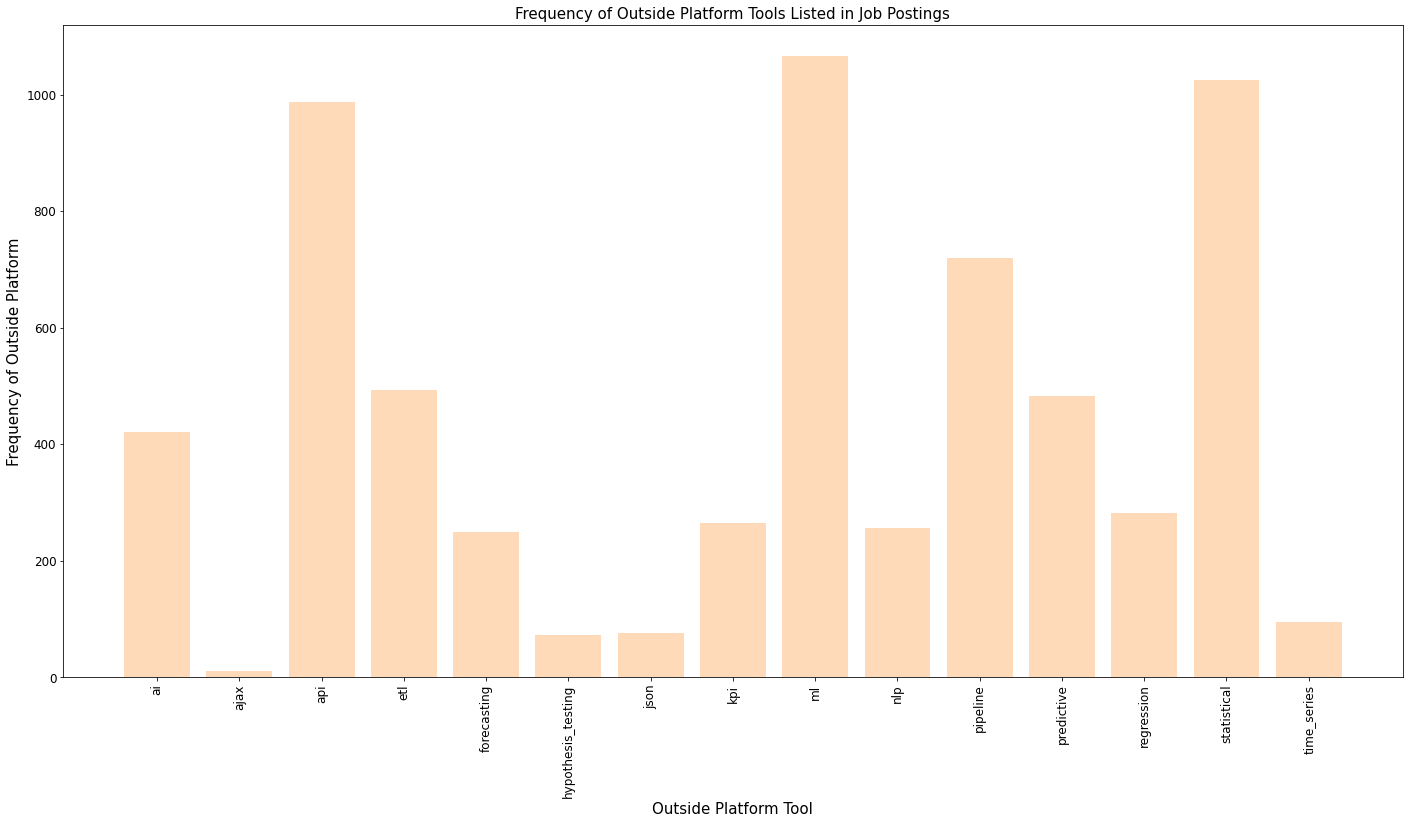

In [ ]:
#create a sum of each ds concept
ai_sum = sum(cleaned_desc[' ai '])
ajax_sum = sum(cleaned_desc['ajax'])
api_sum = sum(cleaned_desc['api'])
etl_sum = sum(cleaned_desc['etl'])
forecasting_sum = sum(cleaned_desc['forecasting'])
hypothesis_testing_sum = sum(cleaned_desc['hypothesis testing'])
json_sum = sum(cleaned_desc['json'])
kpi_sum = sum(cleaned_desc['kpi'])
ml_sum = sum(cleaned_desc[' ml '])
nlp_sum = sum(cleaned_desc['nlp'])
pipeline_sum = sum(cleaned_desc['pipeline'])
predictive_sum = sum(cleaned_desc['predictive'])
regression_sum = sum(cleaned_desc['regression'])
statistical_sum = sum(cleaned_desc['statistical'])
time_series_sum = sum(cleaned_desc['time series'])

#make a dictionary of ds concept sums so we can plot visualization
platform_sums = {'ai':ai_sum,'ajax':ajax_sum,'api':api_sum,'etl':etl_sum,
'forecasting': forecasting_sum,'hypothesis_testing': hypothesis_testing_sum,
'json': json_sum,'kpi': kpi_sum,'ml': ml_sum,'nlp': nlp_sum,'pipeline': pipeline_sum,
'predictive': predictive_sum,'regression': regression_sum,
'statistical': statistical_sum,'time_series': time_series_sum}

plt.figure(figsize=(24, 12))
plt.bar(range(len(platform_sums)), list(platform_sums.values()), align='center', color='peachpuff')
plt.xticks(range(len(platform_sums)), list(platform_sums.keys()), rotation = 90, fontsize=12)
plt.yticks(fontsize = 12)
plt.ylabel('Frequency of Outside Platform', fontsize=15)
plt.title('Frequency of Outside Platform Tools Listed in Job Postings',fontsize=15)
plt.xlabel('Outside Platform Tool', fontsize=15)
plt.show()

**Interpretation**

The most frequently mentioned skills are api, etl, ml (machine learning), pipeline, predictive, and statistics.

#### **Most Popular Libraries**

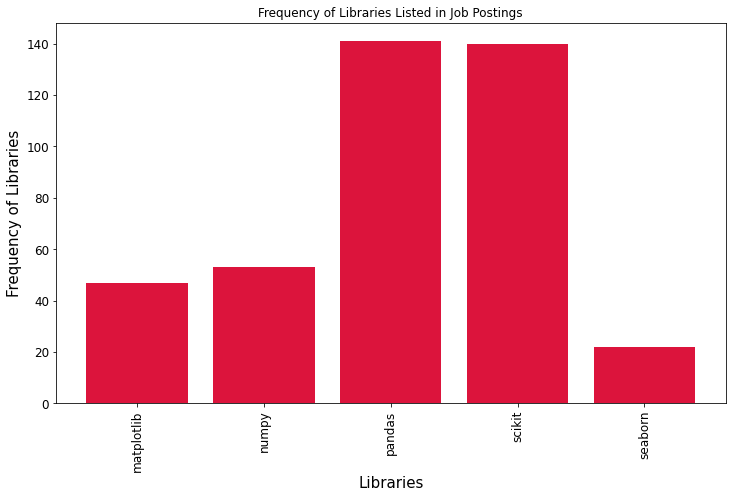

In [ ]:
#create a sum of each library
matplotlib_sum = sum(cleaned_desc['matplotlib'])
numpy_sum = sum(cleaned_desc['numpy'])
pandas_sum = sum(cleaned_desc['pandas'])
scikit_sum = sum(cleaned_desc['scikit'])
seaborn_sum = sum(cleaned_desc['seaborn'])

#make a dictionary of libraries so we can plot visualization
library_sums = {'matplotlib':matplotlib_sum,'numpy':numpy_sum,
'pandas': pandas_sum,'scikit': scikit_sum,'seaborn': seaborn_sum}

plt.figure(figsize=(12,7))
plt.bar(range(len(library_sums)), list(library_sums.values()), align='center', color='crimson')
plt.xticks(range(len(library_sums)), list(library_sums.keys()), rotation = 90, fontsize=12)
plt.yticks(fontsize = 12)
plt.ylabel('Frequency of Libraries', fontsize=15)
plt.title('Frequency of Libraries Listed in Job Postings',fontsize=12)
plt.xlabel('Libraries', fontsize=15)
plt.show()

**Interpretation**

The most frequently mentioned libraries are pandas and scikit. However it's a very small amount of job postings that mentioned libraries.

#### **Most Popular Deep Learning Techniques**

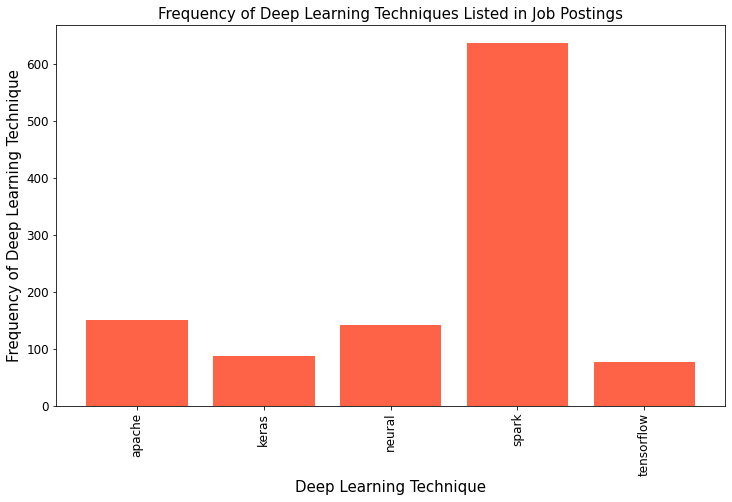

In [ ]:
#create a sum of each deep learning technique
apache_sum = sum(cleaned_desc['apache'])
keras_sum = sum(cleaned_desc['keras'])
neural_sum = sum(cleaned_desc['neural'])
spark_sum = sum(cleaned_desc['spark'])
tensorflow_sum = sum(cleaned_desc['tensorflow'])

#make a dictionary of deep learning techniques so we can plot visualization
deep_learning_sums = {'apache': apache_sum,'keras':keras_sum,'neural': neural_sum,
'spark':spark_sum,'tensorflow': tensorflow_sum}

plt.figure(figsize=(12,7))
plt.bar(range(len(deep_learning_sums)), list(deep_learning_sums.values()), align='center', color='tomato')
plt.xticks(range(len(deep_learning_sums)), list(deep_learning_sums.keys()), rotation = 90, fontsize=12)
plt.yticks(fontsize = 12)
plt.ylabel('Frequency of Deep Learning Technique', fontsize=15)
plt.title('Frequency of Deep Learning Techniques Listed in Job Postings',fontsize=15)
plt.xlabel('Deep Learning Technique', fontsize=15)
plt.show()

**Interpretation**

The most frequently mentioned deep learning technique is spark.

#### **Most Popular Web Application Platforms**

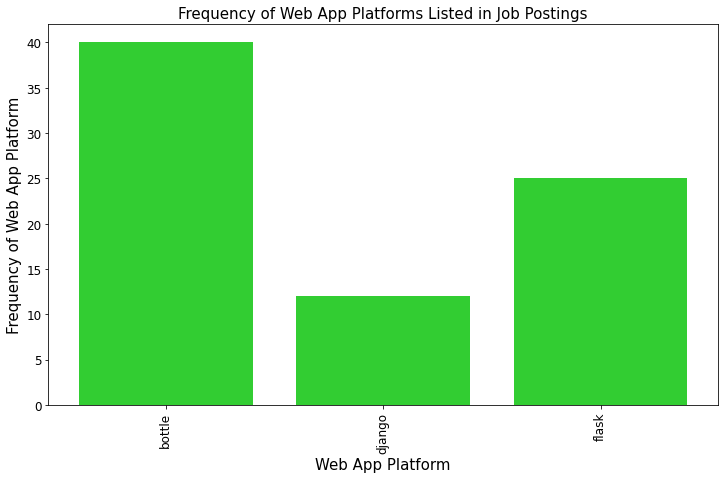

In [ ]:
#create a sum of each web application platform
bottle_sum = sum(cleaned_desc['bottle'])
django_sum = sum(cleaned_desc['django'])
flask_sum = sum(cleaned_desc['flask'])

#make a dictionary of web apps so we can plot visualization
web_app_sums = {'bottle':bottle_sum,'django':django_sum,'flask':flask_sum}

plt.figure(figsize=(12,7))
plt.bar(range(len(web_app_sums)), list(web_app_sums.values()), align='center', color='limegreen')
plt.xticks(range(len(web_app_sums)), list(web_app_sums.keys()), rotation = 90, fontsize=12)
plt.yticks(fontsize = 12)
plt.ylabel('Frequency of Web App Platform', fontsize=15)
plt.title('Frequency of Web App Platforms Listed in Job Postings',fontsize=15)
plt.xlabel('Web App Platform', fontsize=15)
plt.show()

**Interpretation**

Web application platforms were rarely mentioned. 

### **Dataframe Building**

#### **DF for All Numeric Data**

In [ ]:
#list of columns to add to jobs_df. Purposefully exclude coding platforms,
#libraries, and web application platforms since they weren't mentioned often
add_cols = ['years_exp', 'associates', 'bachelors',
       'masters', 'doctorate', 'senior', 'lead', 'principal', 'manager',
       'bash', 'cplusplus', 'html', 'java', 'javascript', 'julia', 'matlab',
       'oracle', 'python', ' r ', 'ruby', 'sas', 'scala', 'sql', 'dashboard',
       'data studio', 'looker', 'power bi', 'sisense', 'tableau', 'airflow',
       'big data', 'bigquery', 'cassandra', 'docker', 'etl', 'hadoop', 'hbase',
       'hdfs', 'hive', 'impala', 'kafka', 'kubeflow', 'kubernetes', 'aws',
       'azure', 'dynamodb', 'ec2', 'gcp', 'google cloud', 'lambda', 'mongodb',
       'redshift', 's3', 'saas', 'snowflake', 'google analytics',
       'google sheets', 'linux', 'microsoft', 'microsoft excel', 'powerpoint',
       'salesforce', ' ai ', 'ajax', 'api', 'forecasting',
       'hypothesis testing', 'json', 'kpi', ' ml ', 'nlp', 'pipeline',
       'predictive', 'regression', 'statistical', 'time series', 'matplotlib',
       'numpy', 'pandas', 'scikit', 'seaborn', 'apache', 'keras', 'neural',
       'spark', 'tensorflow']
#add numeric skill data to jobs_df
for col in add_cols:
  jobs_df[col] = cleaned_desc[col]

jobs_df

,company,industry,rank,job_title,link,description,search_city,search_job,city,state,min_sal,max_sal,estimate_type,avg_sal,years_exp,associates,bachelors,masters,doctorate,senior,lead,principal,manager,bash,cplusplus,html,java,javascript,julia,matlab,oracle,python,r,ruby,sas,scala,sql,dashboard,data studio,looker,...,ec2,gcp,google cloud,lambda,mongodb,redshift,s3,saas,snowflake,google analytics,google sheets,linux,microsoft,microsoft excel,powerpoint,salesforce,ai,ajax,api,forecasting,hypothesis testing,json,kpi,ml,nlp,pipeline,predictive,regression,statistical,time series,matplotlib,numpy,pandas,scikit,seaborn,apache,keras,neural,spark,tensorflow
0,Aston Carter,Business Services,3.5,Data Analyst Sr.,https://www.glassdoor.com/partner/jobListing.h...,Equivalent ExperienceDescription:Day to Day Re...,aus,da,Austin,TX,52000,91000,Glassdoor,71500.0,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,CSS Corp,Information Technology,3.4,Data Analyst (GIS),https://www.glassdoor.com/partner/jobListing.h...,Summary/Objective:Execute transactions/tickets...,aus,da,Austin,TX,35000,64000,Glassdoor,49500.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,CACI,Aerospace & Defense,3.8,ELINT Data Analyst,https://www.glassdoor.com/partner/jobListing.h...,Job DescriptionCACI delivers industry leading ...,aus,da,Austin,TX,44000,81000,Glassdoor,62500.0,7,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,SamCart,Business Services,4.5,Data Analyst,https://www.glassdoor.com/partner/jobListing.h...,Online shopping has changed. Today’s eCommerce...,aus,da,Austin,TX,32000,63000,Glassdoor,47500.0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Publicis Sapient,Business Services,3.7,Data Analyst,https://www.glassdoor.com/partner/jobListing.h...,Company DescriptionPublicis Sapient is a digit...,aus,da,Austin,TX,44000,80000,Glassdoor,62000.0,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3754,Microsoft,Information Technology,4.4,Senior Data & Applied Scientist,https://www.glassdoor.com/partner/jobListing.h...,Are you an experienced data or ML scientist ex...,sea,ds,Bellevue,WA,123000,190000,Glassdoor,156500.0,4,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3755,Microsoft,Information Technology,4.4,Applied Machine Learning Scientist,https://www.glassdoor.com/partner/jobListing.h...,Microsoft's mission is to empower every person...,sea,ds,Bellevue,WA,137000,237000,Glassdoor,187000.0,2,0,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3756,Microsoft,Information Technology,4.4,Data Scientist II,https://www.glassdoor.com/partner/jobListing.h...,Microsoft Research is looking for a talented D...,sea,ds,Redmond,WA,128000,144000,Glassdoor,136000.0,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
3757,IBM,Information Technology,3.9,Senior Data Scientist,https://www.glassdoor.com/partner/jobListing.h...,IntroductionThe IBM Garage was founded in 2014...,sea,ds,Seattle,WA,151000,161000,Glassdoor,156000.0,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,...,0

In [ ]:
#create a df of only numeric data to be evaluated
all_jobs_df = jobs_df[['industry', 'rank',
       'search_city', 'search_job', 'min_sal', 'max_sal',
       'avg_sal', 'years_exp', 'associates', 'bachelors',
       'masters', 'doctorate', 'senior', 'lead', 'principal', 'manager',
       'bash', 'cplusplus', 'html', 'java', 'javascript', 'julia', 'matlab',
       'oracle', 'python', ' r ', 'ruby', 'sas', 'scala', 'sql', 'dashboard',
       'data studio', 'looker', 'power bi', 'sisense', 'tableau', 'airflow',
       'big data', 'bigquery', 'cassandra', 'docker', 'etl', 'hadoop', 'hbase',
       'hdfs', 'hive', 'impala', 'kafka', 'kubeflow', 'kubernetes', 'aws',
       'azure', 'dynamodb', 'ec2', 'gcp', 'google cloud', 'lambda', 'mongodb',
       'redshift', 's3', 'saas', 'snowflake', 'google analytics',
       'google sheets', 'linux', 'microsoft', 'microsoft excel', 'powerpoint',
       'salesforce', ' ai ', 'ajax', 'api', 'forecasting',
       'hypothesis testing', 'json', 'kpi', ' ml ', 'nlp', 'pipeline',
       'predictive', 'regression', 'statistical', 'time series', 'apache', 
       'keras', 'neural','spark', 'tensorflow']]
all_jobs_df['industry'] = all_jobs_df['industry'].str.lower()
all_jobs_df

,industry,rank,search_city,search_job,min_sal,max_sal,avg_sal,years_exp,associates,bachelors,masters,doctorate,senior,lead,principal,manager,bash,cplusplus,html,java,javascript,julia,matlab,oracle,python,r,ruby,sas,scala,sql,dashboard,data studio,looker,power bi,sisense,tableau,airflow,big data,bigquery,cassandra,...,kubeflow,kubernetes,aws,azure,dynamodb,ec2,gcp,google cloud,lambda,mongodb,redshift,s3,saas,snowflake,google analytics,google sheets,linux,microsoft,microsoft excel,powerpoint,salesforce,ai,ajax,api,forecasting,hypothesis testing,json,kpi,ml,nlp,pipeline,predictive,regression,statistical,time series,apache,keras,neural,spark,tensorflow
0,business services,3.5,aus,da,52000,91000,71500.0,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,information technology,3.4,aus,da,35000,64000,49500.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,aerospace & defense,3.8,aus,da,44000,81000,62500.0,7,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,business services,4.5,aus,da,32000,63000,47500.0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,business services,3.7,aus,da,44000,80000,62000.0,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3754,information technology,4.4,sea,ds,123000,190000,156500.0,4,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0
3755,information technology,4.4,sea,ds,137000,237000,187000.0,2,0,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3756,information technology,4.4,sea,ds,128000,144000,136000.0,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0
3757,information technology,3.9,sea,ds,151000,161000,156000.0,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,1,0,0,1,0,0,0,1,1,0


##### **Label Encode Industry, Search City, & Search Job into Numeric Data**

In [ ]:
le=LabelEncoder()
all_jobs_df['industry']=le.fit_transform(all_jobs_df['industry'])
all_jobs_df['search_city']=le.fit_transform(all_jobs_df['search_city'])
all_jobs_df['search_job']=le.fit_transform(all_jobs_df['search_job'])

all_jobs_df

,industry,rank,search_city,search_job,min_sal,max_sal,avg_sal,years_exp,associates,bachelors,masters,doctorate,senior,lead,principal,manager,bash,cplusplus,html,java,javascript,julia,matlab,oracle,python,r,ruby,sas,scala,sql,dashboard,data studio,looker,power bi,sisense,tableau,airflow,big data,bigquery,cassandra,...,kubeflow,kubernetes,aws,azure,dynamodb,ec2,gcp,google cloud,lambda,mongodb,redshift,s3,saas,snowflake,google analytics,google sheets,linux,microsoft,microsoft excel,powerpoint,salesforce,ai,ajax,api,forecasting,hypothesis testing,json,kpi,ml,nlp,pipeline,predictive,regression,statistical,time series,apache,keras,neural,spark,tensorflow
0,5,3.5,0,1,52000,91000,71500.0,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,12,3.4,0,1,35000,64000,49500.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,3.8,0,1,44000,81000,62500.0,7,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,5,4.5,0,1,32000,63000,47500.0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,3.7,0,1,44000,80000,62000.0,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3754,12,4.4,6,3,123000,190000,156500.0,4,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0
3755,12,4.4,6,3,137000,237000,187000.0,2,0,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3756,12,4.4,6,3,128000,144000,136000.0,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0
3757,12,3.9,6,3,151000,161000,156000.0,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,1,0,0,1,0,0,0,1,1,0


##### **Correlations**

###### **Heatmap**

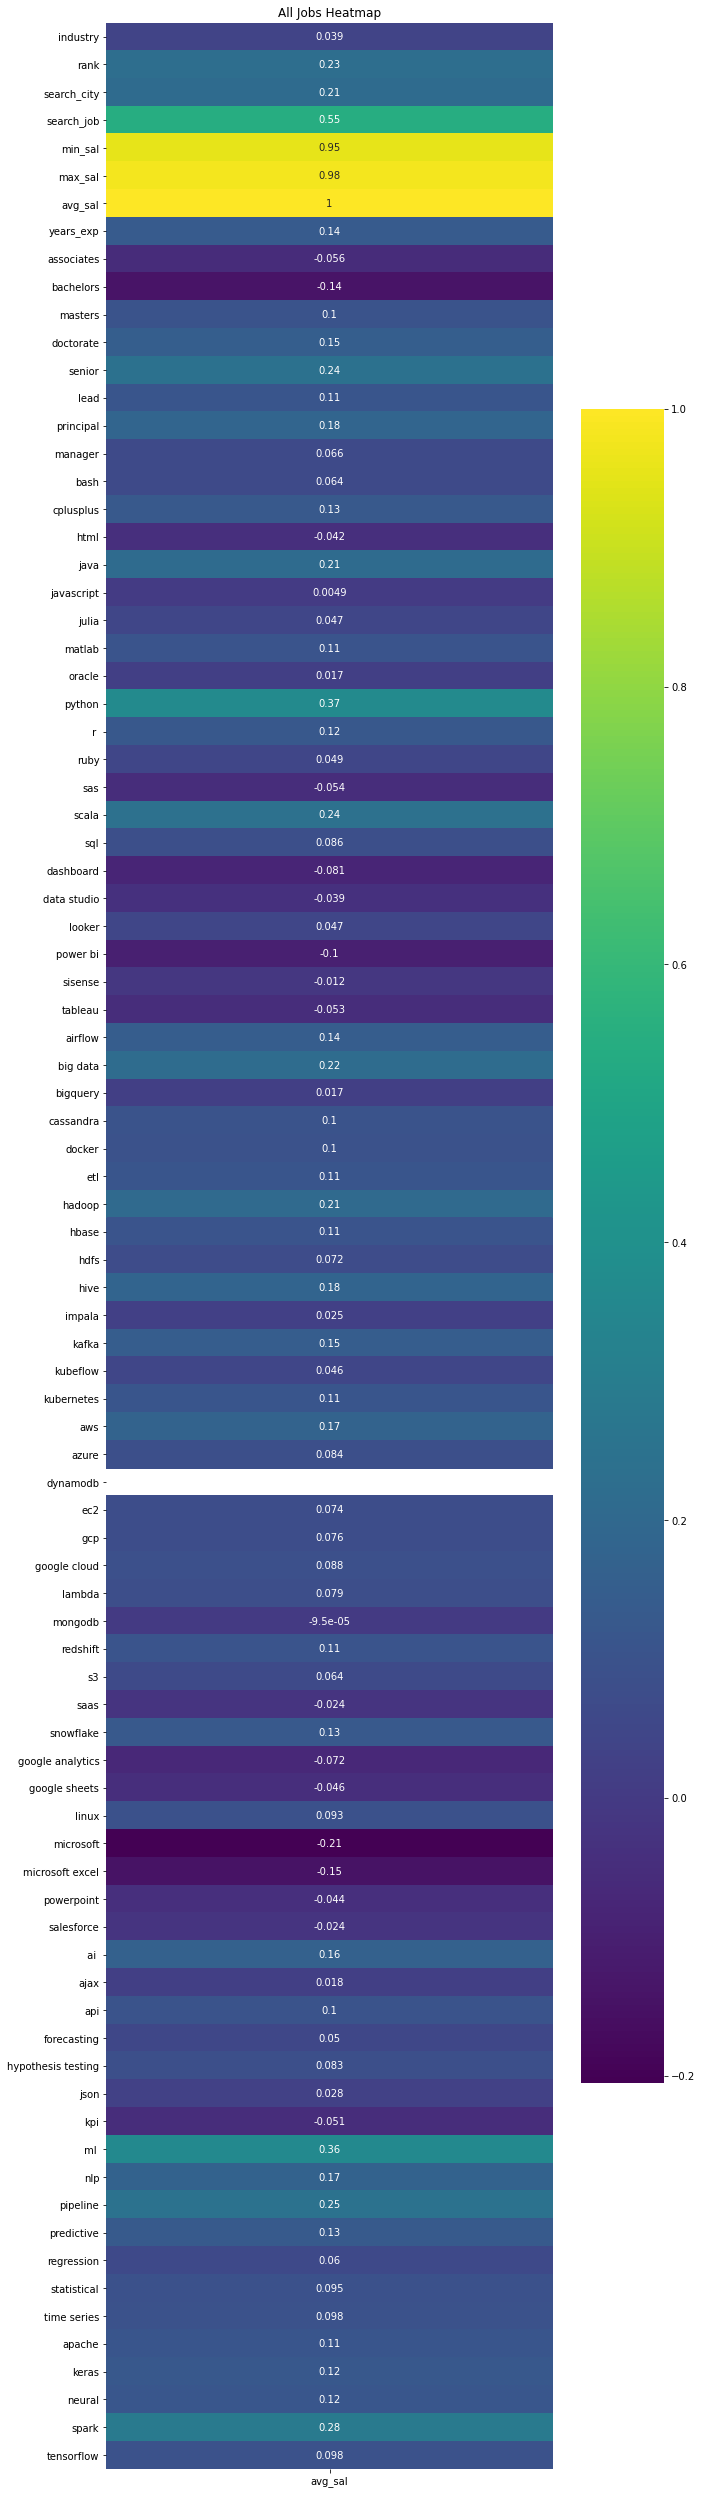

In [ ]:
#investigate correlations between avg_sal and remaining varaiables
plt.figure(figsize=(10, 45))
sns.heatmap(pd.DataFrame(pd.DataFrame(all_jobs_df.corr()).avg_sal), annot=True, cmap='viridis')
sns.set(font_scale=1)
plt.title('All Jobs Heatmap')
plt.yticks()
plt.xticks()
plt.show()

###### **Top 20 Correlations**

In [ ]:
corr= pd.DataFrame(all_jobs_df.corr())
corr['avg_sal'].sort_values(ascending=False)[:20]

avg_sal        1.000000
max_sal        0.977295
min_sal        0.953287
search_job     0.545284
python         0.367798
 ml            0.361752
spark          0.284619
pipeline       0.249378
senior         0.242058
scala          0.238790
rank           0.227177
big data       0.217926
java           0.212357
search_city    0.210338
hadoop         0.206813
principal      0.184833
hive           0.180806
aws            0.174845
nlp            0.170402
 ai            0.164523
Name: avg_sal, dtype: float64

In [ ]:
corr['avg_sal'].sort_values(ascending=False)[-20:]

javascript          0.004886
mongodb            -0.000095
sisense            -0.012246
saas               -0.024116
salesforce         -0.024281
data studio        -0.038975
html               -0.041602
powerpoint         -0.044472
google sheets      -0.045683
kpi                -0.051375
tableau            -0.052788
sas                -0.053810
associates         -0.056214
google analytics   -0.071885
dashboard          -0.080959
power bi           -0.101014
bachelors          -0.143802
microsoft excel    -0.146774
microsoft          -0.205181
dynamodb                 NaN
Name: avg_sal, dtype: float64

###### **Interpretation**

Logically, it makes sense that min_sal & max_sal are highly correlated to avg_sal since they were the columns combined to make avg_sal. Since they are so highly correlated, it's best practice to exclude them from any models tested.

It's interesting that ds, data science search, is more positively correlated to avg_sal than the other job searches. Moreover it's intereting that data science & data engineering were positiviely correlated while data analyst and business analyst were negatively correlated. 

#### **DF's with Simplified Category Values**

With intentions of building an app for model deoployment, expecting a user to enter yes/no for all of the generated features is unrealistic. Let's create some df's that give one score for each of the categories we crated previously. 

In [ ]:
#create a new df
categories_df = pd.DataFrame()

#import certain cols from all_jobs_df
cols_to_add = ['industry', 'rank', 'search_city', 'search_job',
               'avg_sal', 'years_exp']

#add colsdata to categories
for col in cols_to_add:
  categories_df[col] = all_jobs_df[col]

categories_df

,industry,rank,search_city,search_job,avg_sal,years_exp
0,5,3.5,0,1,71500.0,3
1,12,3.4,0,1,49500.0,1
2,1,3.8,0,1,62500.0,7
3,5,4.5,0,1,47500.0,3
4,5,3.7,0,1,62000.0,8
...,...,...,...,...,...,...
3754,12,4.4,6,3,156500.0,4
3755,12,4.4,6,3,187000.0,2
3756,12,4.4,6,3,136000.0,-1
3757,12,3.9,6,3,156000.0,5


In [ ]:
#create a feature for degrees
categories_df['degrees_total'] = all_jobs_df.iloc[:,8:12].sum(axis=1)

#create a feature for senior job titles
categories_df['sen_job_titles_total'] = all_jobs_df.iloc[:, 12:16].sum(axis=1)

#create a feature for languages
categories_df['languages_total'] = all_jobs_df.iloc[:, 16:30].sum(axis=1)

#create a feature for visualization totals
categories_df['visualization_total'] = all_jobs_df.iloc[:, 30:36].sum(axis=1)

#create a feature for big data tools
categories_df['big_data_total'] = all_jobs_df.iloc[:, 36:50].sum(axis=1)

#create a feature for cloud tools
categories_df['cloud_total'] = all_jobs_df.iloc[:, 50:62].sum(axis=1)

#create a feature for platform tools
categories_df['platform_total'] = all_jobs_df.iloc[:, 62:69].sum(axis=1)

#create a feature for data science concepts
categories_df['ds_concepts_total'] = all_jobs_df.iloc[:, 69:83].sum(axis=1)

#create a feature for deep learning concepts
categories_df['deep_learning_totals'] = all_jobs_df.iloc[:, 83:88].sum(axis=1)

#create a feature for log of avg_sal, will be tested for performance in models
categories_df['log_avg_sal'] = np.log1p(categories_df['avg_sal'])

categories_df

,industry,rank,search_city,search_job,avg_sal,years_exp,degrees_total,sen_job_titles_total,languages_total,visualization_total,big_data_total,cloud_total,platform_total,ds_concepts_total,deep_learning_totals,log_avg_sal
0,5,3.5,0,1,71500.0,3,0,1,1,2,0,0,0,0,1,11.177467
1,12,3.4,0,1,49500.0,1,0,0,0,0,0,1,0,0,0,10.809748
2,1,3.8,0,1,62500.0,7,1,0,2,0,0,0,1,1,0,11.042938
3,5,4.5,0,1,47500.0,3,0,0,4,0,0,1,0,0,0,10.768506
4,5,3.7,0,1,62000.0,8,0,0,0,0,0,0,0,1,0,11.034906
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3754,12,4.4,6,3,156500.0,4,1,1,3,0,0,1,1,3,0,11.960818
3755,12,4.4,6,3,187000.0,2,2,0,4,0,0,2,1,2,0,12.138869
3756,12,4.4,6,3,136000.0,-1,0,0,0,0,0,1,1,1,2,11.820418
3757,12,3.9,6,3,156000.0,5,0,1,2,0,0,0,0,6,2,11.957618


#### **DF for Jobs With Years of Experience**

In [ ]:
yrs_exp = categories_df['years_exp'] != -1
yrs_exp_df = categories_df.iloc[yrs_exp.values]
yrs_exp_df

,industry,rank,search_city,search_job,avg_sal,years_exp,degrees_total,sen_job_titles_total,languages_total,visualization_total,big_data_total,cloud_total,platform_total,ds_concepts_total,deep_learning_totals,log_avg_sal
0,5,3.5,0,1,71500.0,3,0,1,1,2,0,0,0,0,1,11.177467
1,12,3.4,0,1,49500.0,1,0,0,0,0,0,1,0,0,0,10.809748
2,1,3.8,0,1,62500.0,7,1,0,2,0,0,0,1,1,0,11.042938
3,5,4.5,0,1,47500.0,3,0,0,4,0,0,1,0,0,0,10.768506
4,5,3.7,0,1,62000.0,8,0,0,0,0,0,0,0,1,0,11.034906
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3753,12,3.9,6,3,163000.0,1,0,0,5,0,0,0,0,3,1,12.001512
3754,12,4.4,6,3,156500.0,4,1,1,3,0,0,1,1,3,0,11.960818
3755,12,4.4,6,3,187000.0,2,2,0,4,0,0,2,1,2,0,12.138869
3757,12,3.9,6,3,156000.0,5,0,1,2,0,0,0,0,6,2,11.957618


#### **DF for Categories Outliers Removed**

Since we know our target variable isn't perfectly normally distributed, we can create another dataframe for model testing that drops the outliers.

We will keep the 1.5 times +/- interquartile range salaries to see if that helps model performance later on. 

In [ ]:
#calculate interquartile range of avg_sal
cat_q25, cat_q75 = np.percentile(categories_df['avg_sal'], 25),np.percentile(categories_df['avg_sal'], 75)
cat_iqr = cat_q75 - cat_q25

#calculate the outlier cutoff
cat_cut_off = cat_iqr * 1.5

#calculate upper and lower outlier limits
cat_lower, cat_upper = cat_q25 - cat_cut_off, cat_q75 + cat_cut_off

#select all salaries in between the lower and upper limits
cat_in_range = (categories_df['avg_sal'] > cat_lower) & (categories_df['avg_sal'] < cat_upper)

#create a new df with the salaries that are in between the lower and upper limites
cat_no_outliers_df = categories_df.iloc[cat_in_range.values]

cat_no_outliers_df

,industry,rank,search_city,search_job,avg_sal,years_exp,degrees_total,sen_job_titles_total,languages_total,visualization_total,big_data_total,cloud_total,platform_total,ds_concepts_total,deep_learning_totals,log_avg_sal
0,5,3.5,0,1,71500.0,3,0,1,1,2,0,0,0,0,1,11.177467
1,12,3.4,0,1,49500.0,1,0,0,0,0,0,1,0,0,0,10.809748
2,1,3.8,0,1,62500.0,7,1,0,2,0,0,0,1,1,0,11.042938
3,5,4.5,0,1,47500.0,3,0,0,4,0,0,1,0,0,0,10.768506
4,5,3.7,0,1,62000.0,8,0,0,0,0,0,0,0,1,0,11.034906
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3754,12,4.4,6,3,156500.0,4,1,1,3,0,0,1,1,3,0,11.960818
3755,12,4.4,6,3,187000.0,2,2,0,4,0,0,2,1,2,0,12.138869
3756,12,4.4,6,3,136000.0,-1,0,0,0,0,0,1,1,1,2,11.820418
3757,12,3.9,6,3,156000.0,5,0,1,2,0,0,0,0,6,2,11.957618


In [ ]:
cat_shape_diff = categories_df.shape[0] - cat_no_outliers_df.shape[0]
print('The categories dataframe had {} outliers dropped.'.format(cat_shape_diff))

The categories dataframe had 33 outliers dropped.


#### **DF for Years of Experience Outliers Removed**

Since we know our target variable isn't perfectly normally distributed, we can create another dataframe for model testing that drops the outliers.

We will keep the 1.5 times +/- interquartile range salaries to see if that helps model performance later on. 

In [ ]:
#calculate interquartile range of avg_sal
yrs_q25, yrs_q75 = np.percentile(yrs_exp_df['avg_sal'], 25),np.percentile(yrs_exp_df['avg_sal'], 75)
yrs_iqr = yrs_q75 - yrs_q25

#calculate the outlier cutoff
yrs_cut_off = yrs_iqr * 1.5

#calculate upper and lower outlier limits
yrs_lower, yrs_upper = yrs_q25 - yrs_cut_off, yrs_q75 + yrs_cut_off

#select all salaries in between the lower and upper limits
yrs_in_range = (yrs_exp_df['avg_sal'] > yrs_lower) & (yrs_exp_df['avg_sal'] < yrs_upper)

#create a new df with the salaries that are in between the lower and upper limites
yrs_exp_no_outliers_df = yrs_exp_df.iloc[yrs_in_range.values]

yrs_exp_no_outliers_df

,industry,rank,search_city,search_job,avg_sal,years_exp,degrees_total,sen_job_titles_total,languages_total,visualization_total,big_data_total,cloud_total,platform_total,ds_concepts_total,deep_learning_totals,log_avg_sal
0,5,3.5,0,1,71500.0,3,0,1,1,2,0,0,0,0,1,11.177467
1,12,3.4,0,1,49500.0,1,0,0,0,0,0,1,0,0,0,10.809748
2,1,3.8,0,1,62500.0,7,1,0,2,0,0,0,1,1,0,11.042938
3,5,4.5,0,1,47500.0,3,0,0,4,0,0,1,0,0,0,10.768506
4,5,3.7,0,1,62000.0,8,0,0,0,0,0,0,0,1,0,11.034906
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3753,12,3.9,6,3,163000.0,1,0,0,5,0,0,0,0,3,1,12.001512
3754,12,4.4,6,3,156500.0,4,1,1,3,0,0,1,1,3,0,11.960818
3755,12,4.4,6,3,187000.0,2,2,0,4,0,0,2,1,2,0,12.138869
3757,12,3.9,6,3,156000.0,5,0,1,2,0,0,0,0,6,2,11.957618


In [ ]:
yrs_exp_shape_diff = yrs_exp_df.shape[0] - yrs_exp_no_outliers_df.shape[0]
print('The yrs_exp dataframe had {} outliers dropped.'.format(cat_shape_diff))

The yrs_exp dataframe had 33 outliers dropped.


#### **Correlations**

##### **Heatmaps**

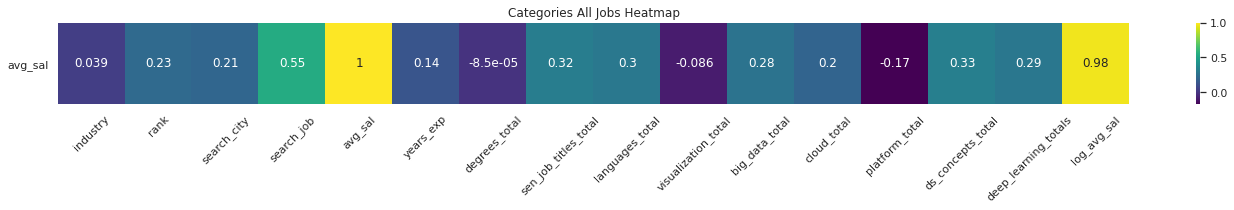

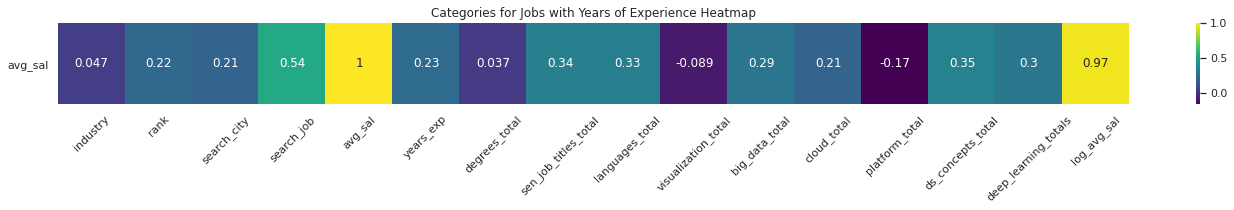

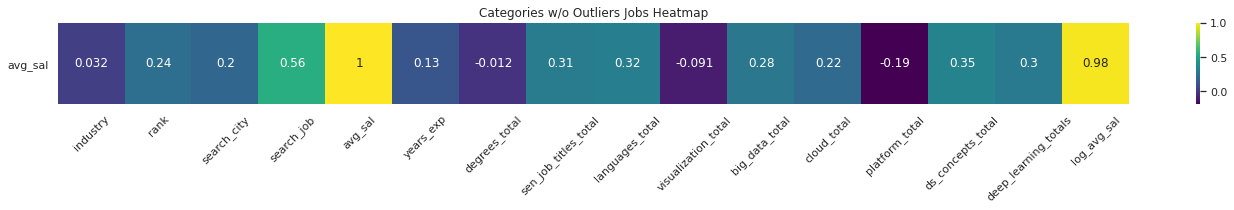

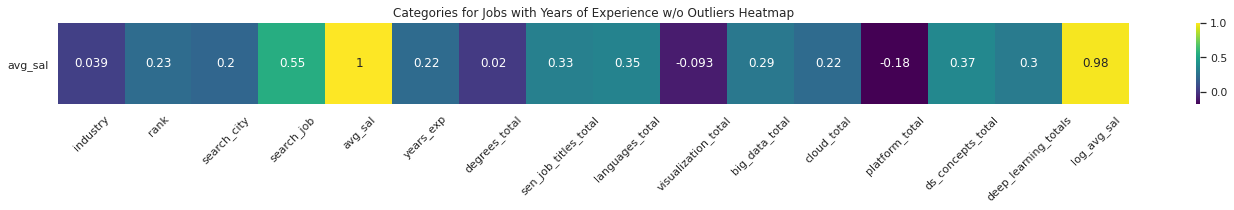

In [ ]:
#investigate correlations between avg_sal and remaining varaiables

#categories_df correlations
plt.figure(figsize=(24,1.5))
sns.heatmap(pd.DataFrame(pd.DataFrame(categories_df.corr()).avg_sal).T, annot=True, cmap='viridis')
sns.set(font_scale=1)
plt.yticks(rotation=0)
plt.xticks(rotation=45)
plt.title('Categories All Jobs Heatmap')

#yrs_exp_df correlations
plt.figure(figsize=(24,1.5))
sns.heatmap(pd.DataFrame(pd.DataFrame(yrs_exp_df.corr()).avg_sal).T, annot=True, cmap='viridis')
sns.set(font_scale=1)
plt.yticks(rotation=0)
plt.xticks(rotation=45)
plt.title('Categories for Jobs with Years of Experience Heatmap')
plt.show()

#cat_no_outliers_df correlations
plt.figure(figsize=(24,1.5))
sns.heatmap(pd.DataFrame(pd.DataFrame(cat_no_outliers_df.corr()).avg_sal).T, annot=True, cmap='viridis')
sns.set(font_scale=1)
plt.yticks(rotation=0)
plt.xticks(rotation=45)
plt.title('Categories w/o Outliers Jobs Heatmap')

#yrs_exp_no_outliers_df correlations
plt.figure(figsize=(24,1.5))
sns.heatmap(pd.DataFrame(pd.DataFrame(yrs_exp_no_outliers_df.corr()).avg_sal).T, annot=True, cmap='viridis')
sns.set(font_scale=1)
plt.yticks(rotation=0)
plt.xticks(rotation=45)
plt.title('Categories for Jobs with Years of Experience w/o Outliers Heatmap')
plt.show()

##### **Ordered Correlations**

In [ ]:
#categories_df correlations
cat_corr= pd.DataFrame(categories_df.corr())
cat_corr_sorted = cat_corr['avg_sal'].sort_values(ascending=False)
print('***Categories Ordered Correlations***')
print(cat_corr_sorted)
print()

#yrs_experience correlations
yrs_corr= pd.DataFrame(yrs_exp_df.corr())
yrs_corr_sorted = yrs_corr['avg_sal'].sort_values(ascending=False)
print('***Years Experience Ordered Correlations***')
print(yrs_corr_sorted)

#cat_no_outliers_df correlations
cat_no_outliers_corr= pd.DataFrame(cat_no_outliers_df.corr())
cat_no_outliers_corr_sorted = cat_no_outliers_corr['avg_sal'].sort_values(ascending=False)
print('***Categories w/o Outliers Ordered Correlations***')
print(cat_no_outliers_corr_sorted)
print()

#yrs_exp_no_outliers_df correlations
yrs_no_outliers_corr= pd.DataFrame(yrs_exp_no_outliers_df.corr())
yrs_no_outliers_corr_sorted = yrs_no_outliers_corr['avg_sal'].sort_values(ascending=False)
print('***Years Experience w/o Outliers Ordered Correlations***')
print(yrs_no_outliers_corr_sorted)

***Categories Ordered Correlations***
avg_sal                 1.000000
log_avg_sal             0.975742
search_job              0.545284
ds_concepts_total       0.327748
sen_job_titles_total    0.320054
languages_total         0.295433
deep_learning_totals    0.290008
big_data_total          0.275131
rank                    0.227177
search_city             0.210338
cloud_total             0.199019
years_exp               0.136382
industry                0.039246
degrees_total          -0.000085
visualization_total    -0.085952
platform_total         -0.173408
Name: avg_sal, dtype: float64

***Years Experience Ordered Correlations***
avg_sal                 1.000000
log_avg_sal             0.974765
search_job              0.539395
ds_concepts_total       0.347715
sen_job_titles_total    0.337914
languages_total         0.326501
deep_learning_totals    0.296730
big_data_total          0.286353
years_exp               0.234630
rank                    0.223979
cloud_total             0.206

##### **Interpretation**

**Categories Ordered Heatmap**

Now that our categories are combined into sums, it's interesting that the search_job is the highest positively correlated feature when before two of the jobs were positively correlated and two slightly negatively correlated. 

**Comparison of Categories vs Yrs Experience**

When only jobs that had years of experience were considered, the first two highly correlated features, search_jobs and sen_job_title, were the same in order but features were different from there. Features correlation coefficients were similar in each but order changed.

Years of Experience had nearly twice the positive correlation with avg_sal than it did in the categories only df. 


## **Hypothesis Testing**

### **Target Variable**

#### **Is average salary variable normally distributed?**

*  $H_o:$ Distribution is Normal
*   $H_a:$ Distribution is Not Normal

In [ ]:
#Is the avg_salary distribution normal?
t,p=stats.shapiro(yrs_exp_no_outliers_df['avg_sal'])

#set up text wrapper for explanation of t-test because the explanation is long
wrapper = textwrap.TextWrapper(width=80)

#explanation of t-testing
if np.round(p, decimals=4) < 0.05:
  ttest_less = 'The p-value of {} is less than 0.05, so we reject the Null Hypothesis. There is sufficient evidence to support the avg_sal variable is not normally distributed.'.format(p, decimals=4)
  ttest_less_str = wrapper.fill(text=ttest_less)
  print(ttest_less_str)
elif np.round(p, decimals=4) > 0.05:
  ttest_more = 'The p-value of {} is greather than 0.05, so we fail to reject the Null Hypothesis. There is not sufficient evidence to suuport the avg_sal varaible is not normally distributed.'.format(p, decimals=4)
  ttest_more_str = wrapper.fill(text=ttest_more)
  print(ttest_more_str)

The p-value of 4.153707653395977e-25 is less than 0.05, so we reject the Null
Hypothesis. There is sufficient evidence to support the avg_sal variable is not
normally distributed.


While non-normality was expected, it's important to also look at skewness and kurtosis. 

In [ ]:
#investigate skewness of avg_sal variable
avg_sal_k = np.round(yrs_exp_no_outliers_df['avg_sal'].kurtosis(), decimals = 4)
#print explanation of skewness
if avg_sal_k < 0:
  print('The Kurtosis value of {} tells us the avg_sal varaible is skewed left.'.format(avg_sal_k))
elif avg_sal_k > 0:
  print('The Kurtosis value of {} tells us the avg_sal variable is skewed right.'.format(avg_sal_k))

The Kurtosis value of -0.4616 tells us the avg_sal varaible is skewed left.


##### **Conclusion**

Since the Kurtosis value of the avg_sal variable is between the loose -3 to 3 range, it's safe to proceed with parametric testing. 

### **Is there a significant difference in avg_sal by search job?**

#### **Is average salary variable normally distributed per search_job?**

*  $H_o:$ Distribution is Normal
*   $H_a:$ Distribution is Not Normal

In [ ]:
#segregate data by city & search
is_aus = yrs_exp_no_outliers_df[yrs_exp_no_outliers_df['search_city'] == 0]
is_bos = yrs_exp_no_outliers_df[yrs_exp_no_outliers_df['search_city'] == 1]
is_chi = yrs_exp_no_outliers_df[yrs_exp_no_outliers_df['search_city'] == 2]
is_co =  yrs_exp_no_outliers_df[yrs_exp_no_outliers_df['search_city'] == 3]
is_la =  yrs_exp_no_outliers_df[yrs_exp_no_outliers_df['search_city'] == 4]
is_ny =  yrs_exp_no_outliers_df[yrs_exp_no_outliers_df['search_city'] == 5]
is_sea = yrs_exp_no_outliers_df[yrs_exp_no_outliers_df['search_city'] == 6]
is_sf =  yrs_exp_no_outliers_df[yrs_exp_no_outliers_df['search_city'] == 7]

is_da = yrs_exp_no_outliers_df[yrs_exp_no_outliers_df['search_job'] == 1]
is_de = yrs_exp_no_outliers_df[yrs_exp_no_outliers_df['search_job'] == 2]
is_ba = yrs_exp_no_outliers_df[yrs_exp_no_outliers_df['search_job'] == 0]
is_ds = yrs_exp_no_outliers_df[yrs_exp_no_outliers_df['search_job'] == 3]

In [ ]:
search_jobs = {'Data Analyst': is_da, 'Data Engineer':is_de, 
               'Business Analyst':is_ba, 'Data Scientist':is_ds}

for title, job in search_jobs.items():
  #Is the avg_salary distribution normal?
  t,p=stats.shapiro(job['avg_sal'])
  
  #explanation of t-testing
  if np.round(p, decimals=4) < 0.05:
    ttest_less = 'The p-value for {}, of {}, is less than 0.05, so we reject the Null Hypothesis. There is sufficient evidence to support the avg_sal variable is not normally distributed.'.format(title, p, decimals=4)
    ttest_less_str = wrapper.fill(text=ttest_less)
    print(ttest_less_str)
    print()
  elif np.round(p, decimals=4) > 0.05:
    ttest_more = 'The p-value for {}, of {}, is greather than 0.05, so we fail to reject the Null Hypothesis. There is not sufficient evidence to suuport the avg_sal varaible is not normally distributed.'.format(title, p, decimals=4)
    ttest_more_str = wrapper.fill(text=ttest_more)
    print(ttest_more_str)
    print()

The p-value for Data Analyst, of 1.6776796450972722e-16, is less than 0.05, so
we reject the Null Hypothesis. There is sufficient evidence to support the
avg_sal variable is not normally distributed.

The p-value for Data Engineer, of 0.0018224195810034871, is less than 0.05, so
we reject the Null Hypothesis. There is sufficient evidence to support the
avg_sal variable is not normally distributed.

The p-value for Business Analyst, of 6.479180006674758e-17, is less than 0.05,
so we reject the Null Hypothesis. There is sufficient evidence to support the
avg_sal variable is not normally distributed.

The p-value for Data Scientist, of 0.048690129071474075, is less than 0.05, so
we reject the Null Hypothesis. There is sufficient evidence to support the
avg_sal variable is not normally distributed.



While non-normality was expected, it's important to also look at skewness and kurtosis. 

In [ ]:
for title, job in search_jobs.items():
  #investigate skewness of avg_sal variable
  avg_sal_k = np.round(job['avg_sal'].kurtosis(), decimals = 4)
  #print explanation of skewness
  if avg_sal_k < 0:
    print('The Kurtosis value for {}, of {}, tells us the avg_sal varaible is skewed left.'.format(title, avg_sal_k))
    print()
  elif avg_sal_k > 0:
    print('The Kurtosis value for {}, of {}, tells us the avg_sal variable is skewed right.'.format(title, avg_sal_k))
    print()

The Kurtosis value for Data Analyst, of 0.9007, tells us the avg_sal variable is skewed right.

The Kurtosis value for Data Engineer, of -0.3907, tells us the avg_sal varaible is skewed left.

The Kurtosis value for Business Analyst, of 1.638, tells us the avg_sal variable is skewed right.

The Kurtosis value for Data Scientist, of -0.3068, tells us the avg_sal varaible is skewed left.



##### **Conclusion**

Since the Kurtosis values of each search job avg_sal variable is between the loose -3 to 3 range, it's safe to proceed with parametric testing. 

#### **One-Way ANOVA**
Identifying if any one search job differs in avg_sal from the others

In [ ]:
job_anova = stats.f_oneway(is_da['avg_sal'],is_de['avg_sal'],is_ba['avg_sal'],is_ds['avg_sal'])

#explanation of anova-testing
if np.round(job_anova[1], decimals=4) < 0.05:
  anova_less = 'The p-value of {}, is less than 0.05. There is sufficient evidence to support at least one search job has an average salary that is significantly different than the others.'.format(job_anova[1], decimals=4)
  anova_less_str = wrapper.fill(text=anova_less)
  print(anova_less_str)
elif np.round(job_anova[1], decimals=4) > 0.05:
  anova_more = 'The p-value of {}, is more than 0.05. There is not sufficient evidence to support at least one search job has an average salary that is significantly different than the others.'.format(job_anova[1], decimals=4)
  anova_more_str = wrapper.fill(text=anova_more)
  print(anova_more_str)

The p-value of 4.893497397325403e-290, is less than 0.05. There is sufficient
evidence to support at least one search job has an average salary that is
significantly different than the others.


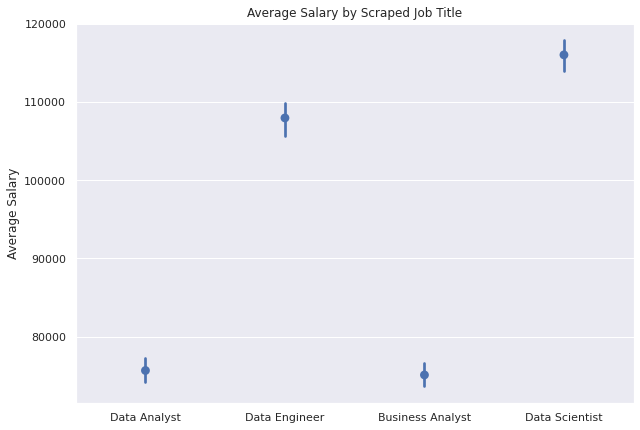

In [ ]:
#visualize difference
plt.figure(figsize=(10,7))
avg_sal_diff = sns.pointplot(data= [is_da['avg_sal'],is_de['avg_sal'],is_ba['avg_sal'],is_ds['avg_sal']],
                    join= False)
avg_sal_diff.set(xticklabels = ['Data Analyst', 'Data Engineer', 'Business Analyst', 'Data Scientist'])
avg_sal_diff.set(ylabel='Average Salary')
plt.title('Average Salary by Scraped Job Title')
plt.show()

In [ ]:
job_anova = stats.f_oneway(is_da['avg_sal'],is_de['avg_sal'],is_ba['avg_sal'],is_ds['avg_sal'])

#explanation of anova-testing
if np.round(job_anova[1], decimals=4) < 0.05:
  anova_less = 'The p-value of {}, is less than 0.05. There is sufficient evidence to support at least one search job has an average salary that is significantly different than the others.'.format(job_anova[1], decimals=4)
  anova_less_str = wrapper.fill(text=anova_less)
  print(anova_less_str)
elif np.round(job_anova[1], decimals=4) > 0.05:
  anova_more = 'The p-value of {}, is more than 0.05. There is not sufficient evidence to support at least one search job has an average salary that is significantly different than the others.'.format(job_anova[1], decimals=4)
  anova_more_str = wrapper.fill(text=anova_more)
  print(anova_more_str)

The p-value of 4.893497397325403e-290, is less than 0.05. There is sufficient
evidence to support at least one search job has an average salary that is
significantly different than the others.


##### **Conclusion**

It appears that Data Analyst & Business Analyst positions have significantly lower average salaires than Data Engineer and Data Scientist Positions. Let's see if these two groups have same averages with t-testing. Then, we can compare Data Engineer and Business Analyst to confirm this thouhgt.

#### **T-Testing**

In [ ]:
#data analyst & business analyst t-test
da_ba_ttest = stats.ttest_ind(is_da['avg_sal'], is_ba['avg_sal'])

#explanation of t-testing
if np.round(da_ba_ttest[1], decimals=4) < 0.05:
  da_ba_less = 'The p-value of {}, is less than 0.05. There is sufficient evidence to support data analyst & business analyst positions have different average salaries.'.format(da_ba_ttest[1], decimals=4)
  da_ba_less_str = wrapper.fill(text=da_ba_less)
  print(da_ba_less_str)
  print()
elif np.round(da_ba_ttest[1], decimals=4) > 0.05:
  da_ba_more = 'The p-value of {}, is more than 0.05. There is not sufficient evidence to support data analyst & business analyst positions have different average salaries.'.format(da_ba_ttest[1], decimals=4)
  da_ba_more_str = wrapper.fill(text=da_ba_more)
  print(da_ba_more_str)
  print()

#data engineer & data scientist t-test
de_ds_ttest = stats.ttest_ind(is_de['avg_sal'], is_ds['avg_sal'])

#explanation of t-testing
if np.round(de_ds_ttest[1], decimals=4) < 0.05:
  de_ds_less = 'The p-value of {}, is less than 0.05. There is sufficient evidence to support data engineer & data scientist positions have different average salaries.'.format(de_ds_ttest[1], decimals=4)
  de_ds_less_str = wrapper.fill(text=de_ds_less)
  print(de_ds_less_str)
  print()
elif np.round(de_ds_ttest[1], decimals=4) > 0.05:
  de_ds_more = 'The p-value of {}, is more than 0.05. There is not sufficient evidence to support data engineer & data scientist positions have different average salaries.'.format(de_ds_ttest[1], decimals=4)
  de_ds_more_str = wrapper.fill(text=de_ds_more)
  print(de_ds_more_str)
  print()

#data engineer & businnes analyst t-test
de_ba_ttest = stats.ttest_ind(is_de['avg_sal'], is_ba['avg_sal'])

#explanation of t-testing
if np.round(de_ba_ttest[1], decimals=4) < 0.05:
  de_ba_less = 'The p-value of {}, is less than 0.05. There is sufficient evidence to support data engineer & businnes analyst positions have different average salaries.'.format(de_ba_ttest[1], decimals=4)
  de_ba_less_str = wrapper.fill(text=de_ba_less)
  print(de_ba_less_str)
  print()
elif np.round(de_ba_ttest[1], decimals=4) > 0.05:
  de_ba_more = 'The p-value of {}, is more than 0.05. There is not sufficient evidence to support data engineer & businnes analyst positions have different average salaries.'.format(de_ba_ttest[1], decimals=4)
  de_ba_more_str = wrapper.fill(text=de_ba_more)
  print(de_ba_more_str)
  print()

The p-value of 0.6107280576515657, is more than 0.05. There is not sufficient
evidence to support data analyst & business analyst positions have different
average salaries.

The p-value of 1.912104243129672e-08, is less than 0.05. There is sufficient
evidence to support data engineer & data scientist positions have different
average salaries.

The p-value of 1.44181843427464e-130, is less than 0.05. There is sufficient
evidence to support data engineer & businnes analyst positions have different
average salaries.



##### **Conclusion**

It is confirmed that Data Analyst & Business Analyst positions have significantly lower average salaires than Data Engineer and Data Scientist Positions. However, the average salaries between the group of Data Analyst and Data Engineer compared to Business Analyst and Data Scientist positions are significantly different. 

### **Is there a significant difference in avg_sal by search city?**

#### **Is average salary variable normally distributed per search_city?**

*  $H_o:$ Distribution is Normal
*   $H_a:$ Distribution is Not Normal

In [ ]:
search_cities = {'Austin': is_aus, 'Boston':is_bos, 'Chicago':is_chi,
                 'Colorado':is_co, 'Los Angeles':is_la, 'New York': is_ny, 
                 'Seattle':is_sea, 'San Francisco':is_sf}

for city, df in search_cities.items():
  #Is the avg_salary distribution normal?
  t,p=stats.shapiro(df['avg_sal'])
  
  #explanation of t-testing
  if np.round(p, decimals=4) < 0.05:
    ttest_less = 'The p-value for {}, of {}, is less than 0.05, so we reject the Null Hypothesis. There is sufficient evidence to support the avg_sal variable is not normally distributed.'.format(city, p, decimals=4)
    ttest_less_str = wrapper.fill(text=ttest_less)
    print(ttest_less_str)
    print()
  elif np.round(p, decimals=4) > 0.05:
    ttest_more = 'The p-value for {}, of {}, is greather than 0.05, so we fail to reject the Null Hypothesis. There is not sufficient evidence to suuport the avg_sal varaible is not normally distributed.'.format(city, p, decimals=4)
    ttest_more_str = wrapper.fill(text=ttest_more)
    print(ttest_more_str)
    print()

The p-value for Austin, of 0.00021027638285886496, is less than 0.05, so we
reject the Null Hypothesis. There is sufficient evidence to support the avg_sal
variable is not normally distributed.

The p-value for Boston, of 1.1059605675711737e-08, is less than 0.05, so we
reject the Null Hypothesis. There is sufficient evidence to support the avg_sal
variable is not normally distributed.

The p-value for Chicago, of 9.530051414685659e-08, is less than 0.05, so we
reject the Null Hypothesis. There is sufficient evidence to support the avg_sal
variable is not normally distributed.

The p-value for Colorado, of 1.988254005880208e-09, is less than 0.05, so we
reject the Null Hypothesis. There is sufficient evidence to support the avg_sal
variable is not normally distributed.

The p-value for Los Angeles, of 1.3795813380568234e-09, is less than 0.05, so we
reject the Null Hypothesis. There is sufficient evidence to support the avg_sal
variable is not normally distributed.

The p-value for New

While non-normality was expected, it's important to also look at skewness and kurtosis. 

In [ ]:
for city, df in search_cities.items():
  #investigate skewness of avg_sal variable
  avg_sal_k = np.round(df['avg_sal'].kurtosis(), decimals = 4)
  #print explanation of skewness
  if avg_sal_k < 0:
    print('The Kurtosis value for {}, of {}, tells us the avg_sal varaible is skewed left.'.format(city, avg_sal_k))
    print()
  elif avg_sal_k > 0:
    print('The Kurtosis value for {}, of {}, tells us the avg_sal variable is skewed right.'.format(city, avg_sal_k))
    print()

The Kurtosis value for Austin, of -0.6064, tells us the avg_sal varaible is skewed left.

The Kurtosis value for Boston, of -0.3474, tells us the avg_sal varaible is skewed left.

The Kurtosis value for Chicago, of -0.2222, tells us the avg_sal varaible is skewed left.

The Kurtosis value for Colorado, of 0.2234, tells us the avg_sal variable is skewed right.

The Kurtosis value for Los Angeles, of -0.6231, tells us the avg_sal varaible is skewed left.

The Kurtosis value for New York, of -0.8102, tells us the avg_sal varaible is skewed left.

The Kurtosis value for Seattle, of -0.3847, tells us the avg_sal varaible is skewed left.

The Kurtosis value for San Francisco, of -0.6988, tells us the avg_sal varaible is skewed left.



##### **Conclusion**

Since the Kurtosis values of each search city, excluding Boston which has some outliers affecting Kurtosis, avg_sal variable is between the loose -3 to 3 range, it's safe to proceed with parametric testing. 

#### **One-Way ANOVA**
Identifying if any one search job differs in avg_sal from the others

In [ ]:
city_anova = stats.f_oneway(is_aus['avg_sal'],is_bos['avg_sal'],is_chi['avg_sal'],
                            is_co['avg_sal'],is_la['avg_sal'], is_ny['avg_sal'],
                            is_sea['avg_sal'],is_sf['avg_sal'])

#explanation of anova-testing
if np.round(city_anova[1], decimals=4) < 0.05:
  anova_less = 'The p-value of {}, is less than 0.05. There is sufficient evidence to support at least one search city has an average salary that is significantly different than the others.'.format(city_anova[1], decimals=4)
  anova_less_str = wrapper.fill(text=anova_less)
  print(anova_less_str)
elif np.round(city_anova[1], decimals=4) > 0.05:
  anova_more = 'The p-value of {}, is more than 0.05. There is not sufficient evidence to support at least one search city has an average salary that is significantly different than the others.'.format(city_anova[1], decimals=4)
  anova_more_str = wrapper.fill(text=anova_more)
  print(anova_more_str)

The p-value of 2.42310683859069e-44, is less than 0.05. There is sufficient
evidence to support at least one search city has an average salary that is
significantly different than the others.


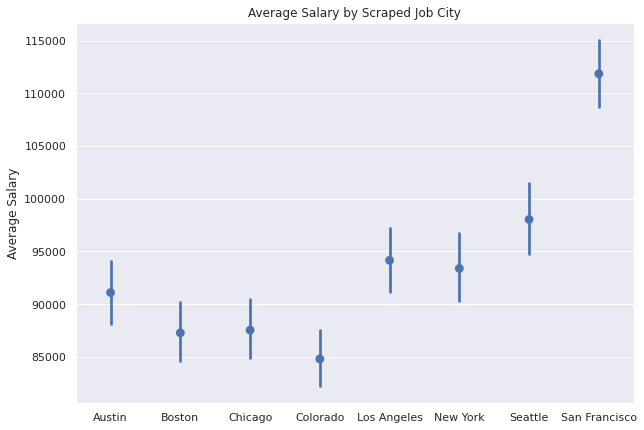

In [ ]:
#visualize difference
plt.figure(figsize=(10,7))
avg_sal_diff = sns.pointplot(data= [is_aus['avg_sal'],is_bos['avg_sal'],is_chi['avg_sal'],
                            is_co['avg_sal'],is_la['avg_sal'], is_ny['avg_sal'],
                            is_sea['avg_sal'],is_sf['avg_sal']], join= False)

avg_sal_diff.set(xticklabels = ['Austin', 'Boston', 'Chicago', 'Colorado', 
                                'Los Angeles', 'New York', 'Seattle','San Francisco',])
avg_sal_diff.set(ylabel='Average Salary')
plt.title('Average Salary by Scraped Job City')
plt.show()

##### **Conclusion**

It appears that San Francisco has a significantly higher avg_salary than the other cities and there might be groups of others that are similar. For Example, Boston, Chicago, Colorado seem smilar while Austin, LA, New York, and Seattle seem similar to each other. Let's do some more ANOVA testing to confirm.

#### **Grouped ANOVA Testing**

In [ ]:
aus_bos_chi_co_anova = stats.f_oneway(is_aus['avg_sal'],is_bos['avg_sal'],is_chi['avg_sal'],
                            is_co['avg_sal'])

#explanation of anova-testing
if np.round(aus_bos_chi_co_anova[1], decimals=4) < 0.05:
  anova_less = 'The p-value of {}, is less than 0.05. There is sufficient evidence to support at least one search city has an average salary that is significantly different than the others.'.format(city_anova[1], decimals=4)
  anova_less_str = wrapper.fill(text=anova_less)
  print(anova_less_str)
elif np.round(aus_bos_chi_co_anova[1], decimals=4) > 0.05:
  anova_more = 'The p-value of {}, is more than 0.05. There is not sufficient evidence to support at least one search city has an average salary that is significantly different than the others.'.format(city_anova[1], decimals=4)
  anova_more_str = wrapper.fill(text=anova_more)
  print(anova_more_str)

The p-value of 2.42310683859069e-44, is less than 0.05. There is sufficient
evidence to support at least one search city has an average salary that is
significantly different than the others.


In [ ]:
bos_chi_co_anova = stats.f_oneway(is_bos['avg_sal'],is_chi['avg_sal'],
                            is_co['avg_sal'])

#explanation of anova-testing
if np.round(bos_chi_co_anova[1], decimals=4) < 0.05:
  anova_less = 'The p-value of {}, is less than 0.05. There is sufficient evidence to support at least one search city has an average salary that is significantly different than the others.'.format(city_anova[1], decimals=4)
  anova_less_str = wrapper.fill(text=anova_less)
  print(anova_less_str)
elif np.round(bos_chi_co_anova[1], decimals=4) > 0.05:
  anova_more = 'The p-value of {}, is more than 0.05. There is not sufficient evidence to support at least one search city has an average salary that is significantly different than the others.'.format(city_anova[1], decimals=4)
  anova_more_str = wrapper.fill(text=anova_more)
  print(anova_more_str)

The p-value of 2.42310683859069e-44, is more than 0.05. There is not sufficient
evidence to support at least one search city has an average salary that is
significantly different than the others.


In [ ]:
aus_la_ny_sea_anova = stats.f_oneway(is_aus['avg_sal'], is_la['avg_sal'],is_ny['avg_sal'],is_sea['avg_sal'])

#explanation of anova-testing
if np.round(aus_la_ny_sea_anova[1], decimals=4) < 0.05:
  anova_less = 'The p-value of {}, is less than 0.05. There is sufficient evidence to support at least one search city has an average salary that is significantly different than the others.'.format(city_anova[1], decimals=4)
  anova_less_str = wrapper.fill(text=anova_less)
  print(anova_less_str)
elif np.round(aus_la_ny_sea_anova[1], decimals=4) > 0.05:
  anova_more = 'The p-value of {}, is more than 0.05. There is not sufficient evidence to support at least one search city has an average salary that is significantly different than the others.'.format(city_anova[1], decimals=4)
  anova_more_str = wrapper.fill(text=anova_more)
  print(anova_more_str)

The p-value of 2.42310683859069e-44, is less than 0.05. There is sufficient
evidence to support at least one search city has an average salary that is
significantly different than the others.


In [ ]:
aus_la_ny_anova = stats.f_oneway(is_aus['avg_sal'], is_la['avg_sal'],is_ny['avg_sal'])

#explanation of anova-testing
if np.round(aus_la_ny_anova[1], decimals=4) < 0.05:
  anova_less = 'The p-value of {}, is less than 0.05. There is sufficient evidence to support at least one search city has an average salary that is significantly different than the others.'.format(city_anova[1], decimals=4)
  anova_less_str = wrapper.fill(text=anova_less)
  print(anova_less_str)
elif np.round(aus_la_ny_anova[1], decimals=4) > 0.05:
  anova_more = 'The p-value of {}, is more than 0.05. There is not sufficient evidence to support at least one search city has an average salary that is significantly different than the others.'.format(city_anova[1], decimals=4)
  anova_more_str = wrapper.fill(text=anova_more)
  print(anova_more_str)

The p-value of 2.42310683859069e-44, is more than 0.05. There is not sufficient
evidence to support at least one search city has an average salary that is
significantly different than the others.


In [ ]:
la_ny_sea_anova = stats.f_oneway(is_la['avg_sal'],is_ny['avg_sal'],is_sea['avg_sal'])

#explanation of anova-testing
if np.round(la_ny_sea_anova[1], decimals=4) < 0.05:
  anova_less = 'The p-value of {}, is less than 0.05. There is sufficient evidence to support at least one search city has an average salary that is significantly different than the others.'.format(city_anova[1], decimals=4)
  anova_less_str = wrapper.fill(text=anova_less)
  print(anova_less_str)
elif np.round(la_ny_sea_anova[1], decimals=4) > 0.05:
  anova_more = 'The p-value of {}, is more than 0.05. There is not sufficient evidence to support at least one search city has an average salary that is significantly different than the others.'.format(city_anova[1], decimals=4)
  anova_more_str = wrapper.fill(text=anova_more)
  print(anova_more_str)

The p-value of 2.42310683859069e-44, is more than 0.05. There is not sufficient
evidence to support at least one search city has an average salary that is
significantly different than the others.


In [ ]:
la_ny_sea_sf_anova = stats.f_oneway(is_la['avg_sal'],is_ny['avg_sal'],is_sea['avg_sal'], is_sf['avg_sal'])

#explanation of anova-testing
if np.round(la_ny_sea_sf_anova[1], decimals=4) < 0.05:
  anova_less = 'The p-value of {}, is less than 0.05. There is sufficient evidence to support at least one search city has an average salary that is significantly different than the others.'.format(city_anova[1], decimals=4)
  anova_less_str = wrapper.fill(text=anova_less)
  print(anova_less_str)
elif np.round(la_ny_sea_sf_anova[1], decimals=4) > 0.05:
  anova_more = 'The p-value of {}, is more than 0.05. There is not sufficient evidence to support at least one search city has an average salary that is significantly different than the others.'.format(city_anova[1], decimals=4)
  anova_more_str = wrapper.fill(text=anova_more)
  print(anova_more_str)

The p-value of 2.42310683859069e-44, is less than 0.05. There is sufficient
evidence to support at least one search city has an average salary that is
significantly different than the others.


##### **Conclusion**

It is confirmed that Austin positions have a significanlty larger salary than Boston, Chicago, and Colorado positions. However, when grouped with LA, NY, and Seattle, Austin positions have similar average salaires to LA and NY but significantly lower than Seattle. Finally, San Francisco had a significantly higher average salary than all other locations. 

# **Model Building & Testing**

We now have 4 Dataframe's to test models on.
*   **categories_df:** numeric data of combined sums of the categorie we extrapolated from the job descriptions. 2012 rows × 16 columns
*   **yrs_exp_df**: categories excluding jobs that did not have years of experience listed. 1711 rows × 16 columns
*   **cat_no_outliers_df:** numeric data of combined sums of the categorie we extrapolated from the job descriptions, outliers removed. 2012 rows × 16 columns
*   **yrs_exp_no_outliers_df**: categories excluding jobs that did not have years of experience listed, outliers removed. 1711 rows × 16 columns

For performance comparison, each will be tested with target variable as:
*    **Average Salary**
*    **Log of Average Salary**

### **Visualization of Target Variable**

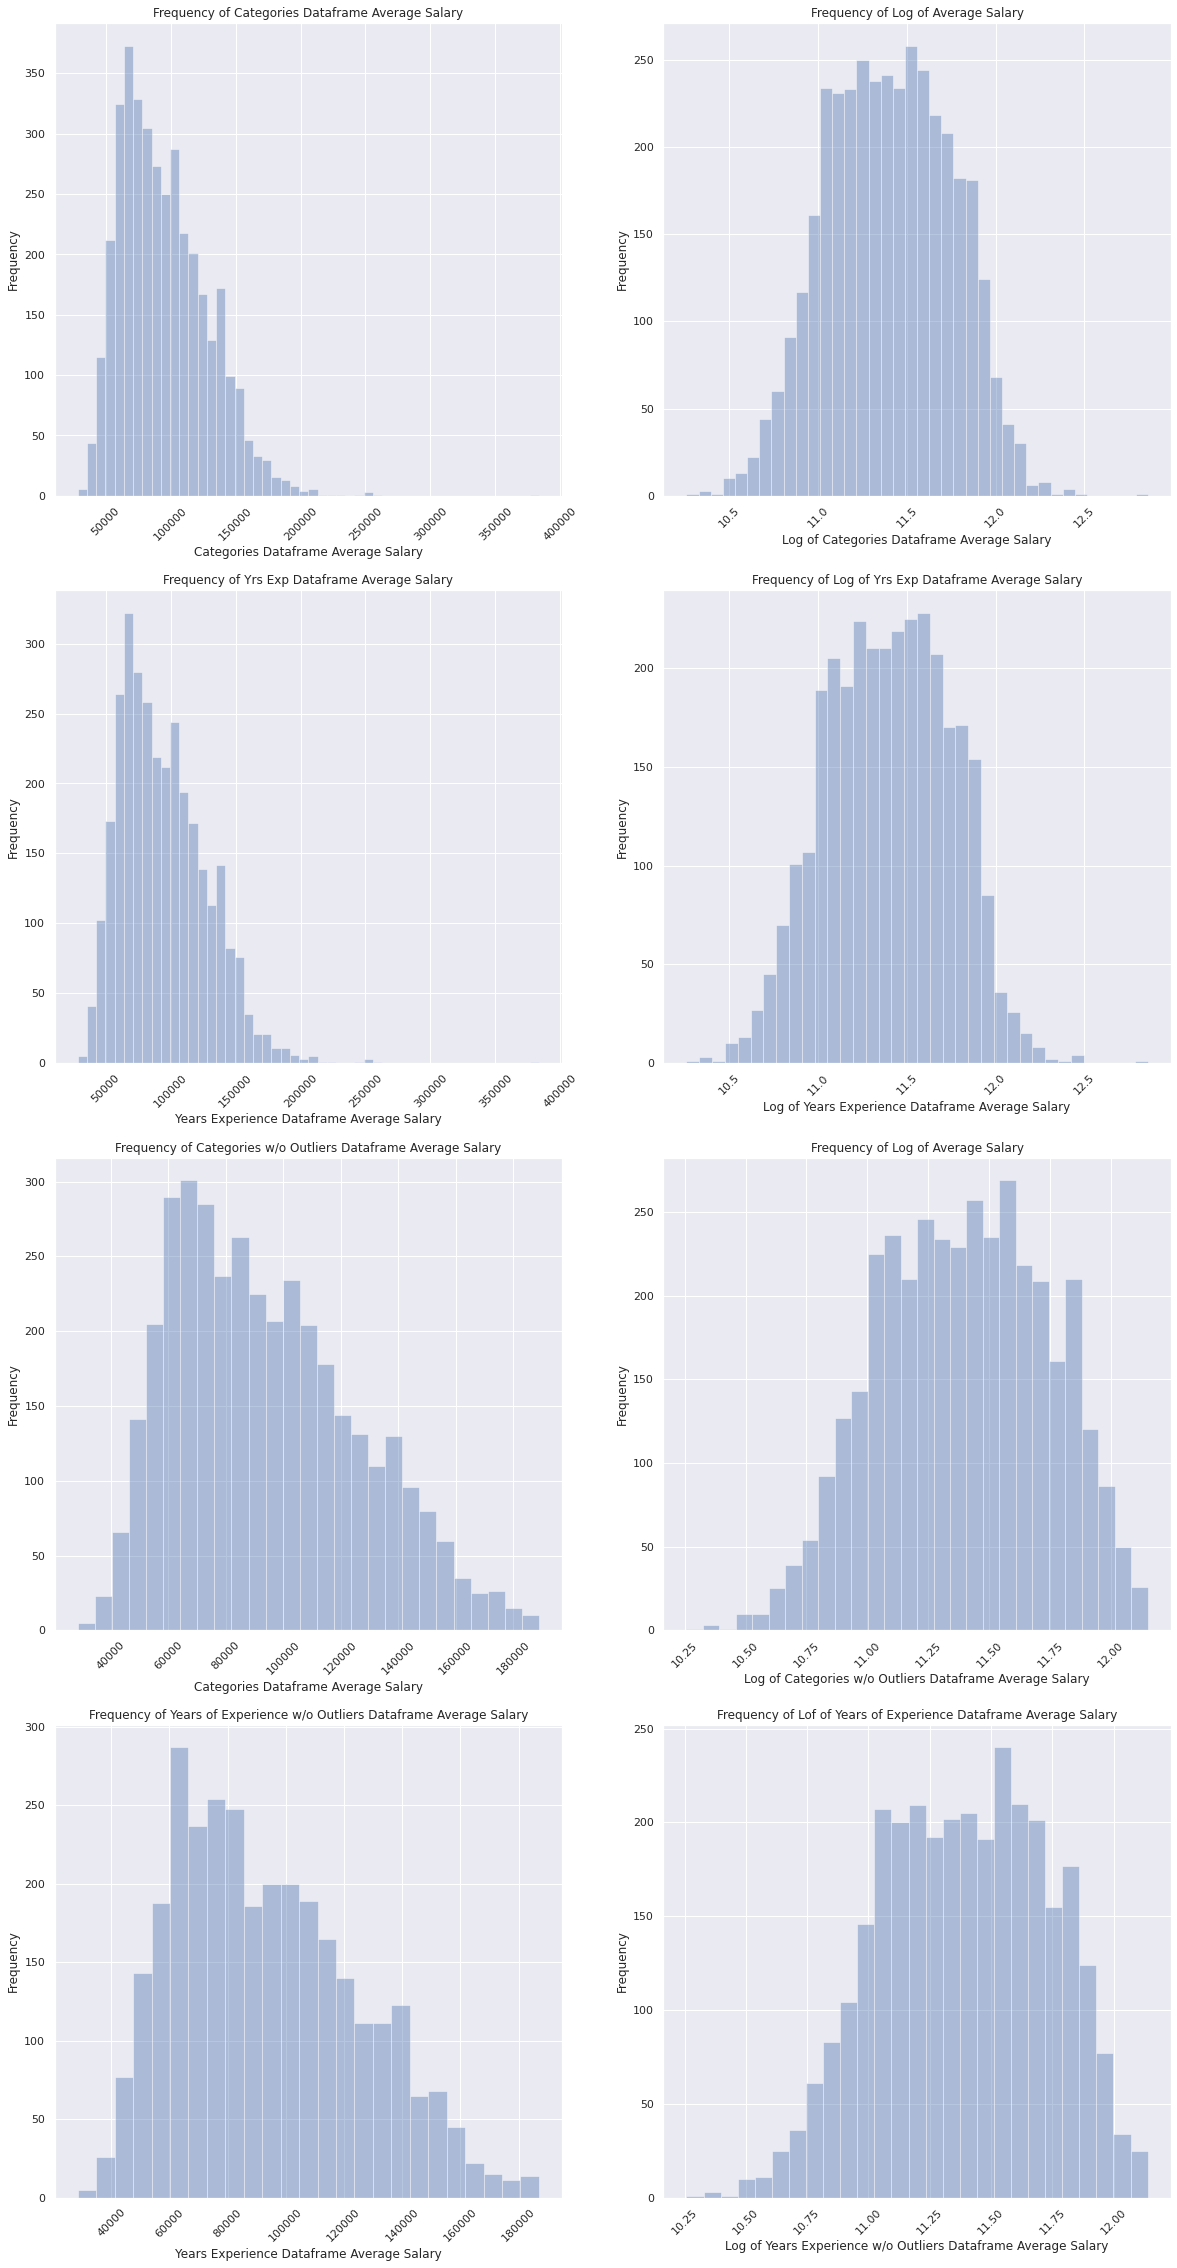

In [ ]:
#visualize Categories Dataframe Average Salary
plt.figure(figsize = (20,40))
plt.subplot(421)
sns.distplot(categories_df['avg_sal'], kde = False)
plt.xlabel('Categories Dataframe Average Salary')
plt.ylabel('Frequency')
plt.title('Frequency of Categories Dataframe Average Salary')
plt.xticks(rotation = 45)

plt.subplot(422)
#visualize Log of Categories Dataframe Average Salary
sns.distplot(categories_df['log_avg_sal'], kde = False)
plt.xlabel('Log of Categories Dataframe Average Salary')
plt.ylabel('Frequency')
plt.title('Frequency of Log of Average Salary')
plt.xticks(rotation = 45)

#visualize Years Experience Dataframe Average Salary
plt.subplot(423)
sns.distplot(yrs_exp_df['avg_sal'], kde = False)
plt.xlabel('Years Experience Dataframe Average Salary')
plt.ylabel('Frequency')
plt.title('Frequency of Yrs Exp Dataframe Average Salary')
plt.xticks(rotation = 45)

#visualize Log of Years Experience Dataframe Average Salary
plt.subplot(424)
sns.distplot(yrs_exp_df['log_avg_sal'], kde = False)
plt.xlabel('Log of Years Experience Dataframe Average Salary')
plt.ylabel('Frequency')
plt.title('Frequency of Log of Yrs Exp Dataframe Average Salary')
plt.xticks(rotation = 45)

#visualize Categories w/o Outliers Dataframe Average Salary
plt.subplot(425)
sns.distplot(cat_no_outliers_df['avg_sal'], kde = False)
plt.xlabel('Categories Dataframe Average Salary')
plt.ylabel('Frequency')
plt.title('Frequency of Categories w/o Outliers Dataframe Average Salary')
plt.xticks(rotation = 45)

#visualize Log of Categories w/o Outliers Dataframe Average Salary
plt.subplot(426)
sns.distplot(cat_no_outliers_df['log_avg_sal'], kde = False)
plt.xlabel('Log of Categories w/o Outliers Dataframe Average Salary')
plt.ylabel('Frequency')
plt.title('Frequency of Log of Average Salary')
plt.xticks(rotation = 45)

#visualize Years Experience w/o Outliers Dataframe Average Salary
plt.subplot(427)
sns.distplot(yrs_exp_no_outliers_df['avg_sal'], kde = False)
plt.xlabel('Years Experience Dataframe Average Salary')
plt.ylabel('Frequency')
plt.title('Frequency of Years of Experience w/o Outliers Dataframe Average Salary')
plt.xticks(rotation = 45)

#visualize Log of Years Experience w/o Outliers Dataframe Average Salary
plt.subplot(428)
sns.distplot(yrs_exp_no_outliers_df['log_avg_sal'], kde = False)
plt.xlabel('Log of Years Experience w/o Outliers Dataframe Average Salary')
plt.ylabel('Frequency')
plt.title('Frequency of Lof of Years of Experience Dataframe Average Salary')
plt.xticks(rotation = 45)
plt.show()

## **Linear Regression**

### **categories_df**

In [ ]:
#set features & target
X = categories_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = categories_df['avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#create instance of model
categories_lr = LinearRegression()

#fit model
categories_lr.fit(X_train, y_train)

#cross validate
categories_lr_cv_scores = cross_val_score(categories_lr, X_train, y_train, cv = 5)

#get scores
print('Accuracy Scores for the 5 folds: ', categories_lr_cv_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(categories_lr_cv_scores)))

Accuracy Scores for the 5 folds:  [0.49956171 0.48262745 0.49154278 0.49281058 0.52328831]
Mean Cross Validation Score: 0.497966167066335063662307902632165


In [ ]:
#generate predictions
categories_lr_preds = categories_lr.predict(X_test)

#get performance metrics
categories_lr_rsquared_train = categories_lr.score(X_train, y_train)
categories_lr_rsquared_test = categories_lr.score(X_test, y_test)
categories_lr_mae = mean_absolute_error(y_test, categories_lr_preds)
categories_lr_mse = mse(y_test, categories_lr_preds)
categories_lr_rmse = rmse(y_test, categories_lr_preds)
categories_lr_mape = np.mean(np.abs((y_test - categories_lr_preds)/y_test)*100)
categories_lr_rmspe = (np.sqrt(np.mean(np.square((y_test - categories_lr_preds) / y_test)))) * 100
categories_lr_model_name = 'Categories Linear Regression'

#create easily readable display of performance metrics
categories_lr_dictionary = {'Model': categories_lr_model_name,
  'Training Set R Squared': categories_lr_rsquared_train, 
  'Test Set R Squared': categories_lr_rsquared_test, 'Mean Absolute Error': categories_lr_mae, 
  'Mean Sqaured Error': categories_lr_mse, 'Root Mean Squared Error': categories_lr_rmse,
  'Root Mean Squared Percentage Error': categories_lr_rmspe,
  'Mean Absolute Percentage Error': categories_lr_mape}

categories_lr_df = pd.DataFrame(categories_lr_dictionary, index=[0])

categories_lr_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,Categories Linear Regression,0.505322,0.456328,18236.292639,6.478186e+08,25452.28083,29.313077,21.315768


### **yrs_exp_df**

In [ ]:
#set features & target
X= yrs_exp_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = yrs_exp_df['avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#create instance of model
yrs_exp_lr = LinearRegression()

#fit model
yrs_exp_lr.fit(X_train, y_train)

#cross validate
yrs_exp_lr_cv_scores = cross_val_score(yrs_exp_lr, X_train, y_train, cv = 5)

#get scores
print('Accuracy Scores for the 5 folds: ', yrs_exp_lr_cv_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(yrs_exp_lr_cv_scores)))

Accuracy Scores for the 5 folds:  [0.52391614 0.49595973 0.49634049 0.51600284 0.52438398]
Mean Cross Validation Score: 0.511320634240886473520504296175204


In [ ]:
#generate predictions
yrs_exp_lr_preds = yrs_exp_lr.predict(X_test)

#get performance metrics
yrs_exp_lr_rsquared_train = yrs_exp_lr.score(X_train, y_train)
yrs_exp_lr_rsquared_test = yrs_exp_lr.score(X_test, y_test)
yrs_exp_lr_mae = mean_absolute_error(y_test, yrs_exp_lr_preds)
yrs_exp_lr_mse = mse(y_test, yrs_exp_lr_preds)
yrs_exp_lr_rmse = rmse(y_test, yrs_exp_lr_preds)
yrs_exp_lr_mape = np.mean(np.abs((y_test - yrs_exp_lr_preds)/y_test)*100)
yrs_exp_lr_rmspe = (np.sqrt(np.mean(np.square((y_test - yrs_exp_lr_preds) / y_test)))) * 100
yrs_exp_model_name = 'Years of Experience Linear Regression'

#create easily readable display of performance metrics
yrs_exp_lr_dictionary = {'Model': yrs_exp_model_name,
  'Training Set R Squared': yrs_exp_lr_rsquared_train, 
  'Test Set R Squared': yrs_exp_lr_rsquared_test, 'Mean Absolute Error': yrs_exp_lr_mae, 
  'Mean Sqaured Error': yrs_exp_lr_mse, 'Root Mean Squared Error': yrs_exp_lr_rmse,
  'Root Mean Squared Percentage Error': yrs_exp_lr_rmspe,  
  'Mean Absolute Percentage Error': yrs_exp_lr_mape}

yrs_exp_lr_df = pd.DataFrame(yrs_exp_lr_dictionary, index=[0])

yrs_exp_lr_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,Years of Experience Linear Regression,0.517996,0.527891,17067.123008,5.022793e+08,22411.58857,28.743566,19.840086


### **categories_df log(y)**

In [ ]:
#set features & target
X = categories_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = categories_df['log_avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#create instance of model
log_categories_lr = LinearRegression()

#fit model
log_categories_lr.fit(X_train, y_train)

#cross validate
log_categories_lr_cv_scores = cross_val_score(log_categories_lr, X_train, y_train, cv = 5)

#get scores
print('Accuracy Scores for the 5 folds: ', log_categories_lr_cv_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(log_categories_lr_cv_scores)))

Accuracy Scores for the 5 folds:  [0.51753729 0.49276304 0.50315759 0.48845981 0.53305995]
Mean Cross Validation Score: 0.506995535001275809960930018860381


In [ ]:
#generate predictions
log_categories_lr_preds = log_categories_lr.predict(X_test)

#get performance metrics
log_categories_lr_rsquared_train = log_categories_lr.score(X_train, y_train)
log_categories_lr_rsquared_test = log_categories_lr.score(X_test, y_test)
log_categories_lr_mae = mean_absolute_error(y_test, log_categories_lr_preds)
log_categories_lr_mse = mse(y_test, log_categories_lr_preds)
log_categories_lr_rmse = rmse(y_test, log_categories_lr_preds)
log_categories_lr_mape = np.mean(np.abs((y_test - log_categories_lr_preds)/y_test)*100)
log_categories_lr_rmspe = (np.sqrt(np.mean(np.square((y_test - log_categories_lr_preds) / y_test)))) * 100
log_categories_lr_model_name = 'Categories Linear Regression Log(y)'

#create easily readable display of performance metrics
log_categories_lr_dictionary = {'Model': log_categories_lr_model_name,
  'Training Set R Squared': log_categories_lr_rsquared_train, 
  'Test Set R Squared': log_categories_lr_rsquared_test, 'Mean Absolute Error': log_categories_lr_mae, 
  'Mean Sqaured Error': log_categories_lr_mse, 'Root Mean Squared Error': log_categories_lr_rmse,
  'Root Mean Squared Percentage Error': log_categories_lr_rmspe,
  'Mean Absolute Percentage Error': log_categories_lr_mape}

log_categories_lr_df = pd.DataFrame(log_categories_lr_dictionary, index=[0])

log_categories_lr_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,Categories Linear Regression Log(y),0.513723,0.503671,0.191408,0.061806,0.248607,2.195315,1.687132


### **yrs_exp_df log(y)**

In [ ]:
#set features & target
X= yrs_exp_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = yrs_exp_df['log_avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#create instance of model
log_yrs_exp_lr = LinearRegression()

#fit model
log_yrs_exp_lr.fit(X_train, y_train)

#cross validate
log_yrs_exp_lr_cv_scores = cross_val_score(log_yrs_exp_lr, X_train, y_train, cv = 5)

#get scores
print('Accuracy Scores for the 5 folds: ', log_yrs_exp_lr_cv_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(log_yrs_exp_lr_cv_scores)))

Accuracy Scores for the 5 folds:  [0.52626512 0.52894675 0.52560039 0.51561238 0.54454179]
Mean Cross Validation Score: 0.528193288803260996289168360817712


In [ ]:
#generate predictions
log_yrs_exp_lr_preds = log_yrs_exp_lr.predict(X_test)

#get performance metrics
log_yrs_exp_lr_rsquared_train = log_yrs_exp_lr.score(X_train, y_train)
log_yrs_exp_lr_rsquared_test = log_yrs_exp_lr.score(X_test, y_test)
log_yrs_exp_lr_mae = mean_absolute_error(y_test, log_yrs_exp_lr_preds)
log_yrs_exp_lr_mse = mse(y_test, log_yrs_exp_lr_preds)
log_yrs_exp_lr_rmse = rmse(y_test, log_yrs_exp_lr_preds)
log_yrs_exp_lr_mape = np.mean(np.abs((y_test - log_yrs_exp_lr_preds)/y_test)*100)
log_yrs_exp_lr_rmspe = (np.sqrt(np.mean(np.square((y_test - log_yrs_exp_lr_preds) / y_test)))) * 100
yrs_exp_model_name = 'Years of Experience Linear Regression Log(y)'

#create easily readable display of performance metrics
log_yrs_exp_lr_dictionary = {'Model': yrs_exp_model_name,
  'Training Set R Squared': log_yrs_exp_lr_rsquared_train, 
  'Test Set R Squared': log_yrs_exp_lr_rsquared_test, 'Mean Absolute Error': log_yrs_exp_lr_mae, 
  'Mean Sqaured Error': log_yrs_exp_lr_mse, 'Root Mean Squared Error': log_yrs_exp_lr_rmse,
  'Root Mean Squared Percentage Error': log_yrs_exp_lr_rmspe,  
  'Mean Absolute Percentage Error': log_yrs_exp_lr_mape}

log_yrs_exp_lr_df = pd.DataFrame(log_yrs_exp_lr_dictionary, index=[0])

log_yrs_exp_lr_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,Years of Experience Linear Regression Log(y),0.534766,0.544484,0.179813,0.054385,0.233207,2.07138,1.583723


### **cat_no_outliers_df**

In [ ]:
#set features & target
X = cat_no_outliers_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = cat_no_outliers_df['avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#create instance of model
cat_no_outliers_lr = LinearRegression()

#fit model
cat_no_outliers_lr.fit(X_train, y_train)

#cross validate
cat_no_outliers_lr_cv_scores = cross_val_score(cat_no_outliers_lr, X_train, y_train, cv = 5)

#get scores
print('Accuracy Scores for the 5 folds: ', cat_no_outliers_lr_cv_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(cat_no_outliers_lr_cv_scores)))

Accuracy Scores for the 5 folds:  [0.53934079 0.50989356 0.46619162 0.4768579  0.52415296]
Mean Cross Validation Score: 0.503287367259654838669291621044977


In [ ]:
#generate predictions
cat_no_outliers_lr_preds = cat_no_outliers_lr.predict(X_test)

#get performance metrics
cat_no_outliers_lr_rsquared_train = cat_no_outliers_lr.score(X_train, y_train)
cat_no_outliers_lr_rsquared_test = cat_no_outliers_lr.score(X_test, y_test)
cat_no_outliers_lr_mae = mean_absolute_error(y_test, cat_no_outliers_lr_preds)
cat_no_outliers_lr_mse = mse(y_test, cat_no_outliers_lr_preds)
cat_no_outliers_lr_rmse = rmse(y_test, cat_no_outliers_lr_preds)
cat_no_outliers_lr_mape = np.mean(np.abs((y_test - cat_no_outliers_lr_preds)/y_test)*100)
cat_no_outliers_lr_rmspe = (np.sqrt(np.mean(np.square((y_test - cat_no_outliers_lr_preds) / y_test)))) * 100
cat_no_outliers_lr_model_name = 'Categories w/o Outliers Linear Regression'

#create easily readable display of performance metrics
cat_no_outliers_lr_dictionary = {'Model': cat_no_outliers_lr_model_name,
  'Training Set R Squared': cat_no_outliers_lr_rsquared_train, 
  'Test Set R Squared': cat_no_outliers_lr_rsquared_test, 'Mean Absolute Error': cat_no_outliers_lr_mae, 
  'Mean Sqaured Error': cat_no_outliers_lr_mse, 'Root Mean Squared Error': cat_no_outliers_lr_rmse,
  'Root Mean Squared Percentage Error': cat_no_outliers_lr_rmspe,
  'Mean Absolute Percentage Error': cat_no_outliers_lr_mape}

cat_no_outliers_lr_df = pd.DataFrame(cat_no_outliers_lr_dictionary, index=[0])

cat_no_outliers_lr_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,Categories w/o Outliers Linear Regression,0.511041,0.492932,17213.227403,4.853597e+08,22030.879762,26.61194,19.6058


### **yrs_exp_no_outliers_df**

In [ ]:
#set features & target
X = yrs_exp_no_outliers_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = yrs_exp_no_outliers_df['avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#create instance of model
yrs_exp_no_outliers_lr = LinearRegression()

#fit model
yrs_exp_no_outliers_lr.fit(X_train, y_train)

#cross validate
yrs_exp_no_outliers_lr_cv_scores = cross_val_score(yrs_exp_no_outliers_lr, X_train, y_train, cv = 5)

#get scores
print('Accuracy Scores for the 5 folds: ', yrs_exp_no_outliers_lr_cv_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(yrs_exp_no_outliers_lr_cv_scores)))

Accuracy Scores for the 5 folds:  [0.54381672 0.52862277 0.50127764 0.50444706 0.54374844]
Mean Cross Validation Score: 0.524382526224411504855993371165823


In [ ]:
#generate predictions
yrs_exp_no_outliers_lr_preds = yrs_exp_no_outliers_lr.predict(X_test)

#get performance metrics
yrs_exp_no_outliers_lr_rsquared_train = yrs_exp_no_outliers_lr.score(X_train, y_train)
yrs_exp_no_outliers_lr_rsquared_test = yrs_exp_no_outliers_lr.score(X_test, y_test)
yrs_exp_no_outliers_lr_mae = mean_absolute_error(y_test, yrs_exp_no_outliers_lr_preds)
yrs_exp_no_outliers_lr_mse = mse(y_test, yrs_exp_no_outliers_lr_preds)
yrs_exp_no_outliers_lr_rmse = rmse(y_test, yrs_exp_no_outliers_lr_preds)
yrs_exp_no_outliers_lr_mape = np.mean(np.abs((y_test - yrs_exp_no_outliers_lr_preds)/y_test)*100)
yrs_exp_no_outliers_lr_rmspe = (np.sqrt(np.mean(np.square((y_test - yrs_exp_no_outliers_lr_preds) / y_test)))) * 100
yrs_exp_no_outliers_lr_model_name = 'Years of Experience w/o Outliers Linear Regression'

#create easily readable display of performance metrics
yrs_exp_no_outliers_lr_dictionary = {'Model': yrs_exp_no_outliers_lr_model_name,
  'Training Set R Squared': yrs_exp_no_outliers_lr_rsquared_train, 
  'Test Set R Squared': yrs_exp_no_outliers_lr_rsquared_test, 'Mean Absolute Error': yrs_exp_no_outliers_lr_mae, 
  'Mean Sqaured Error': yrs_exp_no_outliers_lr_mse, 'Root Mean Squared Error': yrs_exp_no_outliers_lr_rmse,
  'Root Mean Squared Percentage Error': yrs_exp_no_outliers_lr_rmspe,
  'Mean Absolute Percentage Error': yrs_exp_no_outliers_lr_mape}

yrs_exp_no_outliers_lr_df = pd.DataFrame(yrs_exp_no_outliers_lr_dictionary, index=[0])

yrs_exp_no_outliers_lr_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,Years of Experience w/o Outliers Linear Regres...,0.532869,0.540158,16511.124307,4.478050e+08,21161.403788,25.382777,18.778411


### **cat_no_outliers_df log(y)**

In [ ]:
#set features & target
X = cat_no_outliers_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = cat_no_outliers_df['log_avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#create instance of model
log_cat_no_outliers_lr = LinearRegression()

#fit model
log_cat_no_outliers_lr.fit(X_train, y_train)

#cross validate
log_cat_no_outliers_lr_cv_scores = cross_val_score(log_cat_no_outliers_lr, X_train, y_train, cv = 5)

#get scores
print('Accuracy Scores for the 5 folds: ', log_cat_no_outliers_lr_cv_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(log_cat_no_outliers_lr_cv_scores)))

Accuracy Scores for the 5 folds:  [0.53880924 0.51902369 0.46637656 0.4721312  0.52177513]
Mean Cross Validation Score: 0.503623162825340697779097354214173


In [ ]:
#generate predictions
log_cat_no_outliers_lr_preds = log_cat_no_outliers_lr.predict(X_test)

#get performance metrics
log_cat_no_outliers_lr_rsquared_train = log_cat_no_outliers_lr.score(X_train, y_train)
log_cat_no_outliers_lr_rsquared_test = log_cat_no_outliers_lr.score(X_test, y_test)
log_cat_no_outliers_lr_mae = mean_absolute_error(y_test, log_cat_no_outliers_lr_preds)
log_cat_no_outliers_lr_mse = mse(y_test, log_cat_no_outliers_lr_preds)
log_cat_no_outliers_lr_rmse = rmse(y_test, log_cat_no_outliers_lr_preds)
log_cat_no_outliers_lr_mape = np.mean(np.abs((y_test - log_cat_no_outliers_lr_preds)/y_test)*100)
log_cat_no_outliers_lr_rmspe = (np.sqrt(np.mean(np.square((y_test - log_cat_no_outliers_lr_preds) / y_test)))) * 100
log_cat_no_outliers_lr_model_name = 'Categories w/o Outliers Linear Regression Log(y)'

#create easily readable display of performance metrics
log_cat_no_outliers_lr_dictionary = {'Model': log_cat_no_outliers_lr_model_name,
  'Training Set R Squared': log_cat_no_outliers_lr_rsquared_train, 
  'Test Set R Squared': log_cat_no_outliers_lr_rsquared_test, 'Mean Absolute Error': log_cat_no_outliers_lr_mae, 
  'Mean Sqaured Error': log_cat_no_outliers_lr_mse, 'Root Mean Squared Error': log_cat_no_outliers_lr_rmse,
  'Root Mean Squared Percentage Error': log_cat_no_outliers_lr_rmspe,
  'Mean Absolute Percentage Error': log_cat_no_outliers_lr_mape}

log_cat_no_outliers_lr_df = pd.DataFrame(log_cat_no_outliers_lr_dictionary, index=[0])

log_cat_no_outliers_lr_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,Categories w/o Outliers Linear Regression Log(y),0.511448,0.496974,0.182927,0.055591,0.235776,2.079834,1.606982


### **yrs_exp_no_outliers_df**

In [ ]:
#set features & target
X = yrs_exp_no_outliers_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = yrs_exp_no_outliers_df['log_avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#create instance of model
log_yrs_exp_no_outliers_lr = LinearRegression()

#fit model
log_yrs_exp_no_outliers_lr.fit(X_train, y_train)

#cross validate
log_yrs_exp_no_outliers_lr_cv_scores = cross_val_score(log_yrs_exp_no_outliers_lr, X_train, y_train, cv = 5)

#get scores
print('Accuracy Scores for the 5 folds: ', log_yrs_exp_no_outliers_lr_cv_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(log_yrs_exp_no_outliers_lr_cv_scores)))

Accuracy Scores for the 5 folds:  [0.54183459 0.52428751 0.49222348 0.50210293 0.52946091]
Mean Cross Validation Score: 0.517981883990190294930755499080988


In [ ]:
#generate predictions
log_yrs_exp_no_outliers_lr_preds = log_yrs_exp_no_outliers_lr.predict(X_test)

#get performance metrics
log_yrs_exp_no_outliers_lr_rsquared_train = log_yrs_exp_no_outliers_lr.score(X_train, y_train)
log_yrs_exp_no_outliers_lr_rsquared_test = log_yrs_exp_no_outliers_lr.score(X_test, y_test)
log_yrs_exp_no_outliers_lr_mae = mean_absolute_error(y_test, log_yrs_exp_no_outliers_lr_preds)
log_yrs_exp_no_outliers_lr_mse = mse(y_test, log_yrs_exp_no_outliers_lr_preds)
log_yrs_exp_no_outliers_lr_rmse = rmse(y_test, log_yrs_exp_no_outliers_lr_preds)
log_yrs_exp_no_outliers_lr_mape = np.mean(np.abs((y_test - log_yrs_exp_no_outliers_lr_preds)/y_test)*100)
log_yrs_exp_no_outliers_lr_rmspe = (np.sqrt(np.mean(np.square((y_test - log_yrs_exp_no_outliers_lr_preds) / y_test)))) * 100
log_yrs_exp_no_outliers_lr_model_name = 'Years of Experience w/o Outliers Linear Regression Log(y)'

#create easily readable display of performance metrics
log_yrs_exp_no_outliers_lr_dictionary = {'Model': log_yrs_exp_no_outliers_lr_model_name,
  'Training Set R Squared': log_yrs_exp_no_outliers_lr_rsquared_train, 
  'Test Set R Squared': log_yrs_exp_no_outliers_lr_rsquared_test, 'Mean Absolute Error': log_yrs_exp_no_outliers_lr_mae, 
  'Mean Sqaured Error': log_yrs_exp_no_outliers_lr_mse, 'Root Mean Squared Error': log_yrs_exp_no_outliers_lr_rmse,
  'Root Mean Squared Percentage Error': log_yrs_exp_no_outliers_lr_rmspe,
  'Mean Absolute Percentage Error': log_yrs_exp_no_outliers_lr_mape}

log_yrs_exp_no_outliers_lr_df = pd.DataFrame(log_yrs_exp_no_outliers_lr_dictionary, index=[0])

log_yrs_exp_no_outliers_lr_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,Years of Experience w/o Outliers Linear Regres...,0.526447,0.556966,0.178926,0.051159,0.226183,1.995913,1.572001


## **Ridge Regression**

### **categories_df**

In [ ]:
#set features & target
X = categories_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = categories_df['avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#Use grid search to find best hyperparameters
# defining parameter range 
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]} 

categories_ridge_grid = GridSearchCV(Ridge(), param_grid)

# fitting the model for grid search 
categories_ridge_grid.fit(X_train, y_train) 
# print best parameter after tuning 
print(categories_ridge_grid.best_params_)

# print how our model looks after hyper-parameter tuning 
print(categories_ridge_grid.best_estimator_)

{'alpha': 10}
Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)


In [ ]:
#set model with ideal hyperparameters from above
categories_ridge = Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

categories_ridge.fit(X_train, y_train)

#cross validate
categories_ridge_scores = cross_val_score(categories_ridge, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', categories_ridge_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(categories_ridge_scores)))

Accuracy Scores for the 5 folds:  [0.49996624 0.48245296 0.4911898  0.49393631 0.52237282]
Mean Cross Validation Score: 0.497983623423711385669321316527203


In [ ]:
#generate predictions
categories_ridge_preds = categories_ridge.predict(X_test)

#more performance metrics
categories_ridge_rsquared_train = categories_ridge.score(X_train, y_train)
categories_ridge_rsquared_test = categories_ridge.score(X_test, y_test)
categories_ridge_mae = mean_absolute_error(y_test, categories_ridge_preds)
categories_ridge_mse = mse(y_test, categories_ridge_preds)
categories_ridge_rmse = rmse(y_test, categories_ridge_preds)
categories_ridge_mape = np.mean(np.abs((y_test - categories_ridge_preds)/y_test)*100)
categories_ridge_rmspe = (np.sqrt(np.mean(np.square((y_test - categories_ridge_preds) / y_test)))) * 100
categories_ridge_model_name = 'Categories Ridge Regression'

#create easily readable display of performance metrics
categories_ridge_dictionary = {'Model': categories_ridge_model_name,
  'Training Set R Squared': categories_ridge_rsquared_train, 
  'Test Set R Squared': categories_ridge_rsquared_test, 'Mean Absolute Error': categories_ridge_mae, 
  'Mean Sqaured Error': categories_ridge_mse, 'Root Mean Squared Error': categories_ridge_rmse,
  'Root Mean Squared Percentage Error': categories_ridge_rmspe,
  'Mean Absolute Percentage Error': categories_ridge_mape}

categories_ridge_df = pd.DataFrame(categories_ridge_dictionary, index=[0])

categories_ridge_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,Categories Ridge Regression,0.50529,0.456469,18233.851564,6.476503e+08,25448.975067,29.317215,21.317881


### **yrs_exp_df**

In [ ]:
#set features & target
X = yrs_exp_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = yrs_exp_df['avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#Use grid search to find best hyperparameters
# defining parameter range 
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]} 

yrs_exp_ridge_grid = GridSearchCV(Ridge(), param_grid)

# fitting the model for grid search 
yrs_exp_ridge_grid.fit(X_train, y_train) 
# print best parameter after tuning 
print(yrs_exp_ridge_grid.best_params_)

# print how our model looks after hyper-parameter tuning 
print(yrs_exp_ridge_grid.best_estimator_)

{'alpha': 1}
Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)


In [ ]:
#set model with ideal hyperparameters from above
yrs_exp_ridge = Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

yrs_exp_ridge.fit(X_train, y_train)

#cross validate
yrs_exp_ridge_scores = cross_val_score(yrs_exp_ridge, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', yrs_exp_ridge_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(yrs_exp_ridge_scores)))

Accuracy Scores for the 5 folds:  [0.52388752 0.49592061 0.4963527  0.51601076 0.52445574]
Mean Cross Validation Score: 0.511325465765889997094006957922829


In [ ]:
#generate predictions
yrs_exp_ridge_preds = yrs_exp_ridge.predict(X_test)

#more performance metrics
yrs_exp_ridge_rsquared_train = yrs_exp_ridge.score(X_train, y_train)
yrs_exp_ridge_rsquared_test = yrs_exp_ridge.score(X_test, y_test)
yrs_exp_ridge_mae = mean_absolute_error(y_test, yrs_exp_ridge_preds)
yrs_exp_ridge_mse = mse(y_test, yrs_exp_ridge_preds)
yrs_exp_ridge_rmse = rmse(y_test, yrs_exp_ridge_preds)
yrs_exp_ridge_mape = np.mean(np.abs((y_test - yrs_exp_ridge_preds)/y_test)*100)
yrs_exp_ridge_rmspe = (np.sqrt(np.mean(np.square((y_test - yrs_exp_ridge_preds) / y_test)))) * 100
yrs_exp_model_name = 'Years of Experience Ridge Regression'

#create easily readable display of performance metrics
yrs_exp_ridge_dictionary = {'Model': yrs_exp_model_name, 
  'Training Set R Squared': yrs_exp_ridge_rsquared_train, 
  'Test Set R Squared': yrs_exp_ridge_rsquared_test, 'Mean Absolute Error': yrs_exp_ridge_mae, 
  'Mean Sqaured Error': yrs_exp_ridge_mse, 'Root Mean Squared Error': yrs_exp_ridge_rmse,
  'Root Mean Squared Percentage Error': yrs_exp_ridge_rmspe,
  'Mean Absolute Percentage Error': yrs_exp_ridge_mape}

yrs_exp_ridge_df = pd.DataFrame(yrs_exp_ridge_dictionary, index=[0])

yrs_exp_ridge_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,Years of Experience Ridge Regression,0.517996,0.527885,17067.36727,5.022856e+08,22411.729623,28.744334,19.840928


### **categories_df log(y)**

In [ ]:
#set features & target
X = categories_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = categories_df['log_avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#Use grid search to find best hyperparameters
# defining parameter range 
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]} 

log_categories_ridge_grid = GridSearchCV(Ridge(), param_grid)

# fitting the model for grid search 
log_categories_ridge_grid.fit(X_train, y_train) 
# print best parameter after tuning 
print(log_categories_ridge_grid.best_params_)

# print how our model looks after hyper-parameter tuning 
print(log_categories_ridge_grid.best_estimator_)

{'alpha': 1}
Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)


In [ ]:
#set model with ideal hyperparameters from above
log_categories_ridge = Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

log_categories_ridge.fit(X_train, y_train)

#cross validate
log_categories_ridge_scores = cross_val_score(log_categories_ridge, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', log_categories_ridge_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(log_categories_ridge_scores)))

Accuracy Scores for the 5 folds:  [0.51756877 0.4927723  0.50312693 0.48854095 0.53299026]
Mean Cross Validation Score: 0.506999839964325960117719205300091


In [ ]:
#generate predictions
log_categories_ridge_preds = log_categories_ridge.predict(X_test)

#more performance metrics
log_categories_ridge_rsquared_train = log_categories_ridge.score(X_train, y_train)
log_categories_ridge_rsquared_test = log_categories_ridge.score(X_test, y_test)
log_categories_ridge_mae = mean_absolute_error(y_test, log_categories_ridge_preds)
log_categories_ridge_mse = mse(y_test, log_categories_ridge_preds)
log_categories_ridge_rmse = rmse(y_test, log_categories_ridge_preds)
log_categories_ridge_mape = np.mean(np.abs((y_test - log_categories_ridge_preds)/y_test)*100)
log_categories_ridge_rmspe = (np.sqrt(np.mean(np.square((y_test - log_categories_ridge_preds) / y_test)))) * 100
log_categories_ridge_model_name = 'Categories Ridge Regression Log(y)'

#create easily readable display of performance metrics
log_categories_ridge_dictionary = {'Model': log_categories_ridge_model_name,
  'Training Set R Squared': log_categories_ridge_rsquared_train, 
  'Test Set R Squared': log_categories_ridge_rsquared_test, 'Mean Absolute Error': log_categories_ridge_mae, 
  'Mean Sqaured Error': log_categories_ridge_mse, 'Root Mean Squared Error': log_categories_ridge_rmse,
  'Root Mean Squared Percentage Error': log_categories_ridge_rmspe,
  'Mean Absolute Percentage Error': log_categories_ridge_mape}

log_categories_ridge_df = pd.DataFrame(log_categories_ridge_dictionary, index=[0])

log_categories_ridge_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,Categories Ridge Regression Log(y),0.513723,0.503667,0.191411,0.061806,0.248608,2.195329,1.68716


### **yrs_exp_df log(y)**

In [ ]:
#set features & target
X = yrs_exp_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = yrs_exp_df['log_avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#Use grid search to find best hyperparameters
# defining parameter range 
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]} 

log_yrs_exp_ridge_grid = GridSearchCV(Ridge(), param_grid)

# fitting the model for grid search 
log_yrs_exp_ridge_grid.fit(X_train, y_train) 
# print best parameter after tuning 
print(log_yrs_exp_ridge_grid.best_params_)

# print how our model looks after hyper-parameter tuning 
print(log_yrs_exp_ridge_grid.best_estimator_)

{'alpha': 1}
Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)


In [ ]:
#set model with ideal hyperparameters from above
log_yrs_exp_ridge = Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

log_yrs_exp_ridge.fit(X_train, y_train)

#cross validate
log_yrs_exp_ridge_scores = cross_val_score(log_yrs_exp_ridge, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', log_yrs_exp_ridge_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(log_yrs_exp_ridge_scores)))

Accuracy Scores for the 5 folds:  [0.52623592 0.52891271 0.52557766 0.51565033 0.54461429]
Mean Cross Validation Score: 0.528198183521401021245367246592650


In [ ]:
#generate predictions
log_yrs_exp_ridge_preds = log_yrs_exp_ridge.predict(X_test)

#more performance metrics
log_yrs_exp_ridge_rsquared_train = log_yrs_exp_ridge.score(X_train, y_train)
log_yrs_exp_ridge_rsquared_test = log_yrs_exp_ridge.score(X_test, y_test)
log_yrs_exp_ridge_mae = mean_absolute_error(y_test, log_yrs_exp_ridge_preds)
log_yrs_exp_ridge_mse = mse(y_test, log_yrs_exp_ridge_preds)
log_yrs_exp_ridge_rmse = rmse(y_test, log_yrs_exp_ridge_preds)
log_yrs_exp_ridge_mape = np.mean(np.abs((y_test - log_yrs_exp_ridge_preds)/y_test)*100)
log_yrs_exp_ridge_rmspe = (np.sqrt(np.mean(np.square((y_test - log_yrs_exp_ridge_preds) / y_test)))) * 100
yrs_exp_model_name = 'Years of Experience Ridge Regression Log(y)'

#create easily readable display of performance metrics
log_yrs_exp_ridge_dictionary = {'Model': yrs_exp_model_name, 
  'Training Set R Squared': log_yrs_exp_ridge_rsquared_train, 
  'Test Set R Squared': log_yrs_exp_ridge_rsquared_test, 'Mean Absolute Error': log_yrs_exp_ridge_mae, 
  'Mean Sqaured Error': log_yrs_exp_ridge_mse, 'Root Mean Squared Error': log_yrs_exp_ridge_rmse,
  'Root Mean Squared Percentage Error': log_yrs_exp_ridge_rmspe,
  'Mean Absolute Percentage Error': log_yrs_exp_ridge_mape}

log_yrs_exp_ridge_df = pd.DataFrame(log_yrs_exp_ridge_dictionary, index=[0])

log_yrs_exp_ridge_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,Years of Experience Ridge Regression Log(y),0.534766,0.544472,0.179821,0.054387,0.23321,2.071413,1.583799


### **cat_no_outliers_df**

In [ ]:
#set features & target
X = cat_no_outliers_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = cat_no_outliers_df['avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#Use grid search to find best hyperparameters
# defining parameter range 
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]} 

cat_no_outliers_grid = GridSearchCV(Ridge(), param_grid)

# fitting the model for grid search 
cat_no_outliers_grid.fit(X_train, y_train) 
# print best parameter after tuning 
print(cat_no_outliers_grid.best_params_)

# print how our model looks after hyper-parameter tuning 
print(cat_no_outliers_grid.best_estimator_)

{'alpha': 1}
Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)


In [ ]:
#set model with ideal hyperparameters from above
cat_no_outliers = Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

cat_no_outliers.fit(X_train, y_train)

#cross validate
cat_no_outliers_scores = cross_val_score(cat_no_outliers, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', cat_no_outliers_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(cat_no_outliers_scores)))

Accuracy Scores for the 5 folds:  [0.53937595 0.50996583 0.46622198 0.47681961 0.52406246]
Mean Cross Validation Score: 0.503289165508785663050161929277238


In [ ]:
#generate predictions
cat_no_outliers_preds = cat_no_outliers.predict(X_test)

#more performance metrics
cat_no_outliers_rsquared_train = cat_no_outliers.score(X_train, y_train)
cat_no_outliers_rsquared_test = cat_no_outliers.score(X_test, y_test)
cat_no_outliers_mae = mean_absolute_error(y_test, cat_no_outliers_preds)
cat_no_outliers_mse = mse(y_test, cat_no_outliers_preds)
cat_no_outliers_rmse = rmse(y_test, cat_no_outliers_preds)
cat_no_outliers_mape = np.mean(np.abs((y_test - cat_no_outliers_preds)/y_test)*100)
cat_no_outliers_rmspe = (np.sqrt(np.mean(np.square((y_test - cat_no_outliers_preds) / y_test)))) * 100
cat_no_outliers_model_name = 'Categories w/o Outliers Ridge Regression'

#create easily readable display of performance metrics
cat_no_outliers_dictionary = {'Model': cat_no_outliers_model_name,
  'Training Set R Squared': cat_no_outliers_rsquared_train, 
  'Test Set R Squared': cat_no_outliers_rsquared_test, 'Mean Absolute Error': cat_no_outliers_mae, 
  'Mean Sqaured Error': cat_no_outliers_mse, 'Root Mean Squared Error': cat_no_outliers_rmse,
  'Root Mean Squared Percentage Error': cat_no_outliers_rmspe,
  'Mean Absolute Percentage Error': cat_no_outliers_mape}

cat_no_outliers_ridge_df = pd.DataFrame(cat_no_outliers_dictionary, index=[0])

cat_no_outliers_ridge_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,Categories w/o Outliers Ridge Regression,0.511041,0.492982,17212.732117,4.853116e+08,22029.790043,26.611734,19.605241


### **yrs_exp_no_outliers_df**

In [ ]:
#set features & target
X = yrs_exp_no_outliers_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = yrs_exp_no_outliers_df['avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#Use grid search to find best hyperparameters
# defining parameter range 
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]} 

yrs_exp_no_outliers_ridge_grid = GridSearchCV(Ridge(), param_grid)

# fitting the model for grid search 
yrs_exp_no_outliers_ridge_grid.fit(X_train, y_train) 
# print best parameter after tuning 
print(yrs_exp_no_outliers_ridge_grid.best_params_)

# print how our model looks after hyper-parameter tuning 
print(yrs_exp_no_outliers_ridge_grid.best_estimator_)

{'alpha': 10}
Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)


In [ ]:
#set model with ideal hyperparameters from above
yrs_exp_no_outliers_ridge = Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

yrs_exp_no_outliers_ridge.fit(X_train, y_train)

#cross validate
yrs_exp_no_outliers_ridge_scores = cross_val_score(yrs_exp_no_outliers_ridge, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', yrs_exp_no_outliers_ridge_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(yrs_exp_no_outliers_ridge_scores)))

Accuracy Scores for the 5 folds:  [0.54388746 0.52812482 0.50134882 0.50479244 0.543871  ]
Mean Cross Validation Score: 0.524404908278143566668916264461586


In [ ]:
#generate predictions
yrs_exp_no_outliers_ridge_preds = yrs_exp_no_outliers_ridge.predict(X_test)

#more performance metrics
yrs_exp_no_outliers_ridge_rsquared_train = yrs_exp_no_outliers_ridge.score(X_train, y_train)
yrs_exp_no_outliers_ridge_rsquared_test = yrs_exp_no_outliers_ridge.score(X_test, y_test)
yrs_exp_no_outliers_ridge_mae = mean_absolute_error(y_test, yrs_exp_no_outliers_ridge_preds)
yrs_exp_no_outliers_ridge_mse = mse(y_test, yrs_exp_no_outliers_ridge_preds)
yrs_exp_no_outliers_ridge_rmse = rmse(y_test, yrs_exp_no_outliers_ridge_preds)
yrs_exp_no_outliers_ridge_mape = np.mean(np.abs((y_test - yrs_exp_no_outliers_ridge_preds)/y_test)*100)
yrs_exp_no_outliers_ridge_rmspe = (np.sqrt(np.mean(np.square((y_test - yrs_exp_no_outliers_ridge_preds) / y_test)))) * 100
yrs_exp_model_name = 'Years of Experience w/o Outliers Ridge Regression'

#create easily readable display of performance metrics
yrs_exp_no_outliers_ridge_dictionary = {'Model': yrs_exp_model_name, 
  'Training Set R Squared': yrs_exp_no_outliers_ridge_rsquared_train, 
  'Test Set R Squared': yrs_exp_no_outliers_ridge_rsquared_test, 'Mean Absolute Error': yrs_exp_no_outliers_ridge_mae, 
  'Mean Sqaured Error': yrs_exp_no_outliers_ridge_mse, 'Root Mean Squared Error': yrs_exp_no_outliers_ridge_rmse,
  'Root Mean Squared Percentage Error': yrs_exp_no_outliers_ridge_rmspe,
  'Mean Absolute Percentage Error': yrs_exp_no_outliers_ridge_mape}

yrs_exp_no_outliers_ridge_df = pd.DataFrame(yrs_exp_no_outliers_ridge_dictionary, index=[0])

yrs_exp_no_outliers_ridge_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,Years of Experience w/o Outliers Ridge Regression,0.532829,0.540285,16503.716874,4.476811e+08,21158.476582,25.375379,18.76784


### **categories_df log(y)**

In [ ]:
#set features & target
X = cat_no_outliers_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = cat_no_outliers_df['log_avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#Use grid search to find best hyperparameters
# defining parameter range 
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]} 

log_cat_no_outliers_grid = GridSearchCV(Ridge(), param_grid)

# fitting the model for grid search 
log_cat_no_outliers_grid.fit(X_train, y_train) 
# print best parameter after tuning 
print(log_cat_no_outliers_grid.best_params_)

# print how our model looks after hyper-parameter tuning 
print(log_cat_no_outliers_grid.best_estimator_)

{'alpha': 1}
Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)


In [ ]:
#set model with ideal hyperparameters from above
log_cat_no_outliers = Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

log_cat_no_outliers.fit(X_train, y_train)

#cross validate
log_cat_no_outliers_scores = cross_val_score(log_cat_no_outliers, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', log_cat_no_outliers_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(log_cat_no_outliers_scores)))

Accuracy Scores for the 5 folds:  [0.53884949 0.51907444 0.4663996  0.47210669 0.52168731]
Mean Cross Validation Score: 0.503623504956159484535760384460445


In [ ]:
#generate predictions
log_cat_no_outliers_preds = log_cat_no_outliers.predict(X_test)

#more performance metrics
log_cat_no_outliers_rsquared_train = log_cat_no_outliers.score(X_train, y_train)
log_cat_no_outliers_rsquared_test = log_cat_no_outliers.score(X_test, y_test)
log_cat_no_outliers_mae = mean_absolute_error(y_test, log_cat_no_outliers_preds)
log_cat_no_outliers_mse = mse(y_test, log_cat_no_outliers_preds)
log_cat_no_outliers_rmse = rmse(y_test, log_cat_no_outliers_preds)
log_cat_no_outliers_mape = np.mean(np.abs((y_test - log_cat_no_outliers_preds)/y_test)*100)
log_cat_no_outliers_rmspe = (np.sqrt(np.mean(np.square((y_test - log_cat_no_outliers_preds) / y_test)))) * 100
log_cat_no_outliers_model_name = 'Categories w/o Outliers Ridge Regression Log(y)'

#create easily readable display of performance metrics
log_cat_no_outliers_dictionary = {'Model': log_cat_no_outliers_model_name,
  'Training Set R Squared': log_cat_no_outliers_rsquared_train, 
  'Test Set R Squared': log_cat_no_outliers_rsquared_test, 'Mean Absolute Error': log_cat_no_outliers_mae, 
  'Mean Sqaured Error': log_cat_no_outliers_mse, 'Root Mean Squared Error': log_cat_no_outliers_rmse,
  'Root Mean Squared Percentage Error': log_cat_no_outliers_rmspe,
  'Mean Absolute Percentage Error': log_cat_no_outliers_mape}

log_cat_no_outliers_ridge_df = pd.DataFrame(log_cat_no_outliers_dictionary, index=[0])

log_cat_no_outliers_ridge_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,Categories w/o Outliers Ridge Regression Log(y),0.515685,0.546282,0.179621,0.052392,0.228894,2.026886,1.581118


### **yrs_exp_no_outliers_df log(y)**

In [ ]:
#set features & target
X = yrs_exp_no_outliers_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = yrs_exp_no_outliers_df['log_avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#Use grid search to find best hyperparameters
# defining parameter range 
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]} 

log_yrs_exp_no_outliers_ridge_grid = GridSearchCV(Ridge(), param_grid)

# fitting the model for grid search 
log_yrs_exp_no_outliers_ridge_grid.fit(X_train, y_train) 
# print best parameter after tuning 
print(log_yrs_exp_no_outliers_ridge_grid.best_params_)

# print how our model looks after hyper-parameter tuning 
print(log_yrs_exp_no_outliers_ridge_grid.best_estimator_)

{'alpha': 10}
Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)


In [ ]:
#set model with ideal hyperparameters from above
log_yrs_exp_no_outliers_ridge = Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

log_yrs_exp_no_outliers_ridge.fit(X_train, y_train)

#cross validate
log_yrs_exp_no_outliers_ridge_scores = cross_val_score(log_yrs_exp_no_outliers_ridge, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', log_yrs_exp_no_outliers_ridge_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(log_yrs_exp_no_outliers_ridge_scores)))

Accuracy Scores for the 5 folds:  [0.54172745 0.52367213 0.49228798 0.50244903 0.52985733]
Mean Cross Validation Score: 0.517998782188999640219151388009777


In [ ]:
#generate predictions
log_yrs_exp_no_outliers_ridge_preds = log_yrs_exp_no_outliers_ridge.predict(X_test)

#more performance metrics
log_yrs_exp_no_outliers_ridge_rsquared_train = log_yrs_exp_no_outliers_ridge.score(X_train, y_train)
log_yrs_exp_no_outliers_ridge_rsquared_test = log_yrs_exp_no_outliers_ridge.score(X_test, y_test)
log_yrs_exp_no_outliers_ridge_mae = mean_absolute_error(y_test, log_yrs_exp_no_outliers_ridge_preds)
log_yrs_exp_no_outliers_ridge_mse = mse(y_test, log_yrs_exp_no_outliers_ridge_preds)
log_yrs_exp_no_outliers_ridge_rmse = rmse(y_test, log_yrs_exp_no_outliers_ridge_preds)
log_yrs_exp_no_outliers_ridge_mape = np.mean(np.abs((y_test - log_yrs_exp_no_outliers_ridge_preds)/y_test)*100)
log_yrs_exp_no_outliers_ridge_rmspe = (np.sqrt(np.mean(np.square((y_test - log_yrs_exp_no_outliers_ridge_preds) / y_test)))) * 100
yrs_exp_model_name = 'Years of Experience w/o Outliers Ridge Regression Log(y)'

#create easily readable display of performance metrics
log_yrs_exp_no_outliers_ridge_dictionary = {'Model': yrs_exp_model_name, 
  'Training Set R Squared': log_yrs_exp_no_outliers_ridge_rsquared_train, 
  'Test Set R Squared': log_yrs_exp_no_outliers_ridge_rsquared_test, 'Mean Absolute Error': log_yrs_exp_no_outliers_ridge_mae, 
  'Mean Sqaured Error': log_yrs_exp_no_outliers_ridge_mse, 'Root Mean Squared Error': log_yrs_exp_no_outliers_ridge_rmse,
  'Root Mean Squared Percentage Error': log_yrs_exp_no_outliers_ridge_rmspe,
  'Mean Absolute Percentage Error': log_yrs_exp_no_outliers_ridge_mape}

log_yrs_exp_no_outliers_ridge_df = pd.DataFrame(log_yrs_exp_no_outliers_ridge_dictionary, index=[0])

log_yrs_exp_no_outliers_ridge_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,Years of Experience w/o Outliers Ridge Regress...,0.526409,0.556999,0.179016,0.051155,0.226174,1.995826,1.572785


## **Lasso Regression**

### **categories_df**

In [ ]:
#set features & target
X = categories_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = categories_df['avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#Use grid search to find best hyperparameters
# defining parameter range 
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]} 

categories_lasso_grid = GridSearchCV(Lasso(), param_grid)

# fitting the model for grid search 
categories_lasso_grid.fit(X_train, y_train) 
# print best parameter after tuning 
print(categories_lasso_grid.best_params_)

# print how our model looks after hyper-parameter tuning 
print(categories_lasso_grid.best_estimator_)

{'alpha': 10}
Lasso(alpha=10, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)


In [ ]:
#set model with ideal hyperparameters from above
categories_lasso = Lasso(alpha=10, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

categories_lasso.fit(X_train, y_train)

#cross validate
categories_lasso_scores = cross_val_score(categories_lasso, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', categories_lasso_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(categories_lasso_scores)))

Accuracy Scores for the 5 folds:  [0.49964127 0.48272926 0.491476   0.49289026 0.52312753]
Mean Cross Validation Score: 0.497972865465477809721051016822457


In [ ]:
#generate predictions
categories_lasso_preds = categories_lasso.predict(X_test)

#more performance metrics
categories_lasso_rsquared_train = categories_lasso.score(X_train, y_train)
categories_lasso_rsquared_test = categories_lasso.score(X_test, y_test)
categories_lasso_mae = mean_absolute_error(y_test, categories_lasso_preds)
categories_lasso_mse = mse(y_test, categories_lasso_preds)
categories_lasso_rmse = rmse(y_test, categories_lasso_preds)
categories_lasso_mape = np.mean(np.abs((y_test - categories_lasso_preds)/y_test)*100)
categories_lasso_rmspe = (np.sqrt(np.mean(np.square((y_test - categories_lasso_preds) / y_test)))) * 100
categories_lasso_model_name = 'Categories Lasso Regression'

#create easily readable display of performance metrics
categories_lasso_dictionary = {'Model': categories_lasso_model_name,
  'Training Set R Squared': categories_lasso_rsquared_train, 
  'Test Set R Squared': categories_lasso_rsquared_test, 'Mean Absolute Error': categories_lasso_mae, 
  'Mean Sqaured Error': categories_lasso_mse, 'Root Mean Squared Error': categories_lasso_rmse,
  'Root Mean Squared Percentage Error': categories_lasso_rmspe,
  'Mean Absolute Percentage Error': categories_lasso_mape}

categories_lasso_df = pd.DataFrame(categories_lasso_dictionary, index=[0])

categories_lasso_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,Categories Lasso Regression,0.505321,0.456299,18236.787698,6.478534e+08,25452.965053,29.315717,21.317454


### **yrs_exp_df**

In [ ]:
#set features & target
X = yrs_exp_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = yrs_exp_df['avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#Use grid search to find best hyperparameters
# defining parameter range 
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]} 

yrs_exp_lasso_grid = GridSearchCV(Lasso(), param_grid)

# fitting the model for grid search 
yrs_exp_lasso_grid.fit(X_train, y_train) 
# print best parameter after tuning 
print(yrs_exp_lasso_grid.best_params_)

# print how our model looks after hyper-parameter tuning 
print(yrs_exp_lasso_grid.best_estimator_)

{'alpha': 100}
Lasso(alpha=100, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)


In [ ]:
#set model with ideal hyperparameters from above
yrs_exp_lasso = Lasso(alpha=100, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

yrs_exp_lasso.fit(X_train, y_train)

#cross validate
yrs_exp_lasso_scores = cross_val_score(yrs_exp_lasso, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', yrs_exp_lasso_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(yrs_exp_lasso_scores)))

Accuracy Scores for the 5 folds:  [0.52311027 0.49583098 0.49705767 0.51602482 0.52502268]
Mean Cross Validation Score: 0.511409285023279536197549077769509


In [ ]:
#generate predictions
yrs_exp_lasso_preds = yrs_exp_lasso.predict(X_test)

#more performance metrics
yrs_exp_lasso_rsquared_train = yrs_exp_lasso.score(X_train, y_train)
yrs_exp_lasso_rsquared_test = yrs_exp_lasso.score(X_test, y_test)
yrs_exp_lasso_mae = mean_absolute_error(y_test, yrs_exp_lasso_preds)
yrs_exp_lasso_mse = mse(y_test, yrs_exp_lasso_preds)
yrs_exp_lasso_rmse = rmse(y_test, yrs_exp_lasso_preds)
yrs_exp_lasso_mape = np.mean(np.abs((y_test - yrs_exp_lasso_preds)/y_test)*100)
yrs_exp_lasso_rmspe = (np.sqrt(np.mean(np.square((y_test - yrs_exp_lasso_preds) / y_test)))) * 100
yrs_exp_lasso_model_name = 'Years of Experience Lasso Regression'

#create easily readable display of performance metrics
yrs_exp_lasso_dictionary = {'Model': yrs_exp_lasso_model_name,
  'Training Set R Squared': yrs_exp_lasso_rsquared_train, 
  'Test Set R Squared': yrs_exp_lasso_rsquared_test, 'Mean Absolute Error': yrs_exp_lasso_mae, 
  'Mean Sqaured Error': yrs_exp_lasso_mse, 'Root Mean Squared Error': yrs_exp_lasso_rmse,
  'Root Mean Squared Percentage Error': yrs_exp_lasso_rmspe,
  'Mean Absolute Percentage Error': yrs_exp_lasso_mape}

yrs_exp_lasso_df = pd.DataFrame(yrs_exp_lasso_dictionary, index=[0])

yrs_exp_lasso_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,Years of Experience Lasso Regression,0.517836,0.528549,17054.054518,5.015784e+08,22395.945513,28.730301,19.84506


### **categories_df log(y)**

In [ ]:
#set features & target
X = categories_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = categories_df['log_avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#Use grid search to find best hyperparameters
# defining parameter range 
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]} 

log_categories_lasso_grid = GridSearchCV(Lasso(), param_grid)

# fitting the model for grid search 
log_categories_lasso_grid.fit(X_train, y_train) 
# print best parameter after tuning 
print(log_categories_lasso_grid.best_params_)

# print how our model looks after hyper-parameter tuning 
print(log_categories_lasso_grid.best_estimator_)

{'alpha': 0.001}
Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)


In [ ]:
#set model with ideal hyperparameters from above
log_categories_lasso = Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

log_categories_lasso.fit(X_train, y_train)

#cross validate
log_categories_lasso_scores = cross_val_score(log_categories_lasso, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', log_categories_lasso_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(log_categories_lasso_scores)))

Accuracy Scores for the 5 folds:  [0.51808651 0.49333621 0.50221277 0.48912691 0.53155974]
Mean Cross Validation Score: 0.506864430102992535864814271917567


In [ ]:
#generate predictions
log_categories_lasso_preds = log_categories_lasso.predict(X_test)

#more performance metrics
log_categories_lasso_rsquared_train = log_categories_lasso.score(X_train, y_train)
log_categories_lasso_rsquared_test = log_categories_lasso.score(X_test, y_test)
log_categories_lasso_mae = mean_absolute_error(y_test, log_categories_lasso_preds)
log_categories_lasso_mse = mse(y_test, log_categories_lasso_preds)
log_categories_lasso_rmse = rmse(y_test, log_categories_lasso_preds)
log_categories_lasso_mape = np.mean(np.abs((y_test - log_categories_lasso_preds)/y_test)*100)
log_categories_lasso_rmspe = (np.sqrt(np.mean(np.square((y_test - log_categories_lasso_preds) / y_test)))) * 100
log_categories_lasso_model_name = 'Categories Lasso Regression Log(y)'

#create easily readable display of performance metrics
log_categories_lasso_dictionary = {'Model': log_categories_lasso_model_name,
  'Training Set R Squared': log_categories_lasso_rsquared_train, 
  'Test Set R Squared': log_categories_lasso_rsquared_test, 'Mean Absolute Error': log_categories_lasso_mae, 
  'Mean Sqaured Error': log_categories_lasso_mse, 'Root Mean Squared Error': log_categories_lasso_rmse,
  'Root Mean Squared Percentage Error': log_categories_lasso_rmspe,
  'Mean Absolute Percentage Error': log_categories_lasso_mape}

log_categories_lasso_df = pd.DataFrame(log_categories_lasso_dictionary, index=[0])

log_categories_lasso_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,Categories Lasso Regression Log(y),0.513596,0.502997,0.191577,0.06189,0.248776,2.196907,1.688635


### **yrs_exp_df log(y)**

In [ ]:
#set features & target
X = yrs_exp_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = yrs_exp_df['log_avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#Use grid search to find best hyperparameters
# defining parameter range 
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]} 

log_yrs_exp_lasso_grid = GridSearchCV(Lasso(), param_grid)

# fitting the model for grid search 
log_yrs_exp_lasso_grid.fit(X_train, y_train) 
# print best parameter after tuning 
print(log_yrs_exp_lasso_grid.best_params_)

# print how our model looks after hyper-parameter tuning 
print(log_yrs_exp_lasso_grid.best_estimator_)

{'alpha': 0.001}
Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)


In [ ]:
#set model with ideal hyperparameters from above
log_yrs_exp_lasso = Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

log_yrs_exp_lasso.fit(X_train, y_train)

#cross validate
log_yrs_exp_lasso_scores = cross_val_score(log_yrs_exp_lasso, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', log_yrs_exp_lasso_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(log_yrs_exp_lasso_scores)))

Accuracy Scores for the 5 folds:  [0.52531065 0.52886115 0.5256275  0.51570211 0.54520102]
Mean Cross Validation Score: 0.528140485750313248836107504757820


In [ ]:
#generate predictions
log_yrs_exp_lasso_preds = log_yrs_exp_lasso.predict(X_test)

#more performance metrics
log_yrs_exp_lasso_rsquared_train = log_yrs_exp_lasso.score(X_train, y_train)
log_yrs_exp_lasso_rsquared_test = log_yrs_exp_lasso.score(X_test, y_test)
log_yrs_exp_lasso_mae = mean_absolute_error(y_test, log_yrs_exp_lasso_preds)
log_yrs_exp_lasso_mse = mse(y_test, log_yrs_exp_lasso_preds)
log_yrs_exp_lasso_rmse = rmse(y_test, log_yrs_exp_lasso_preds)
log_yrs_exp_lasso_mape = np.mean(np.abs((y_test - log_yrs_exp_lasso_preds)/y_test)*100)
log_yrs_exp_lasso_rmspe = (np.sqrt(np.mean(np.square((y_test - log_yrs_exp_lasso_preds) / y_test)))) * 100
log_yrs_exp_lasso_model_name = 'Years of Experience Lasso Regression Log(y)'

#create easily readable display of performance metrics
log_yrs_exp_lasso_dictionary = {'Model': log_yrs_exp_lasso_model_name,
  'Training Set R Squared': log_yrs_exp_lasso_rsquared_train, 
  'Test Set R Squared': log_yrs_exp_lasso_rsquared_test, 'Mean Absolute Error': log_yrs_exp_lasso_mae, 
  'Mean Sqaured Error': log_yrs_exp_lasso_mse, 'Root Mean Squared Error': log_yrs_exp_lasso_rmse,
  'Root Mean Squared Percentage Error': log_yrs_exp_lasso_rmspe,
  'Mean Absolute Percentage Error': log_yrs_exp_lasso_mape}

log_yrs_exp_lasso_df = pd.DataFrame(log_yrs_exp_lasso_dictionary, index=[0])

log_yrs_exp_lasso_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,Years of Experience Lasso Regression Log(y),0.534636,0.544629,0.179873,0.054368,0.23317,2.071206,1.584339


### **cat_no_outliers_df**

In [ ]:
#set features & target
X = cat_no_outliers_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = cat_no_outliers_df['avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#Use grid search to find best hyperparameters
# defining parameter range 
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]} 

cat_no_outliers_lasso_grid = GridSearchCV(Lasso(), param_grid)

# fitting the model for grid search 
cat_no_outliers_lasso_grid.fit(X_train, y_train) 
# print best parameter after tuning 
print(cat_no_outliers_lasso_grid.best_params_)

# print how our model looks after hyper-parameter tuning 
print(cat_no_outliers_lasso_grid.best_estimator_)

{'alpha': 1}
Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)


In [ ]:
#set model with ideal hyperparameters from above
cat_no_outliers_lasso = Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

cat_no_outliers_lasso.fit(X_train, y_train)

#cross validate
cat_no_outliers_lasso_scores = cross_val_score(cat_no_outliers_lasso, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', cat_no_outliers_lasso_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(cat_no_outliers_lasso_scores)))

Accuracy Scores for the 5 folds:  [0.53934698 0.50989415 0.46620033 0.47684934 0.52414608]
Mean Cross Validation Score: 0.503287375314024343353480617224704


In [ ]:
#generate predictions
cat_no_outliers_lasso_preds = cat_no_outliers_lasso.predict(X_test)

#more performance metrics
cat_no_outliers_lasso_rsquared_train = cat_no_outliers_lasso.score(X_train, y_train)
cat_no_outliers_lasso_rsquared_test = cat_no_outliers_lasso.score(X_test, y_test)
cat_no_outliers_lasso_mae = mean_absolute_error(y_test, cat_no_outliers_lasso_preds)
cat_no_outliers_lasso_mse = mse(y_test, cat_no_outliers_lasso_preds)
cat_no_outliers_lasso_rmse = rmse(y_test, cat_no_outliers_lasso_preds)
cat_no_outliers_lasso_mape = np.mean(np.abs((y_test - cat_no_outliers_lasso_preds)/y_test)*100)
cat_no_outliers_lasso_rmspe = (np.sqrt(np.mean(np.square((y_test - cat_no_outliers_lasso_preds) / y_test)))) * 100
cat_no_outliers_lasso_model_name = 'Categories Lasso Regression'

#create easily readable display of performance metrics
cat_no_outliers_lasso_dictionary = {'Model': cat_no_outliers_lasso_model_name,
  'Training Set R Squared': cat_no_outliers_lasso_rsquared_train, 
  'Test Set R Squared': cat_no_outliers_lasso_rsquared_test, 'Mean Absolute Error': cat_no_outliers_lasso_mae, 
  'Mean Sqaured Error': cat_no_outliers_lasso_mse, 'Root Mean Squared Error': cat_no_outliers_lasso_rmse,
  'Root Mean Squared Percentage Error': cat_no_outliers_lasso_rmspe,
  'Mean Absolute Percentage Error': cat_no_outliers_lasso_mape}

cat_no_outliers_lasso_df = pd.DataFrame(cat_no_outliers_lasso_dictionary, index=[0])

cat_no_outliers_lasso_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,Categories Lasso Regression,0.511041,0.492939,17213.21038,4.853529e+08,22030.725825,26.611814,19.605753


### **yrs_exp_no_outliers_df**

In [ ]:
#set features & target
X = yrs_exp_no_outliers_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = yrs_exp_no_outliers_df['avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#Use grid search to find best hyperparameters
# defining parameter range 
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]} 

yrs_exp_lasso_grid = GridSearchCV(Lasso(), param_grid)

# fitting the model for grid search 
yrs_exp_lasso_grid.fit(X_train, y_train) 
# print best parameter after tuning 
print(yrs_exp_lasso_grid.best_params_)

# print how our model looks after hyper-parameter tuning 
print(yrs_exp_lasso_grid.best_estimator_)

{'alpha': 10}
Lasso(alpha=10, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)


In [ ]:
#set model with ideal hyperparameters from above
yrs_exp_lasso = Lasso(alpha=10, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

yrs_exp_lasso.fit(X_train, y_train)

#cross validate
yrs_exp_lasso_scores = cross_val_score(yrs_exp_lasso, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', yrs_exp_lasso_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(yrs_exp_lasso_scores)))

Accuracy Scores for the 5 folds:  [0.54382167 0.52843845 0.50140951 0.50454833 0.54376972]
Mean Cross Validation Score: 0.524397537305994143608245394716505


In [ ]:
#generate predictions
yrs_exp_lasso_preds = yrs_exp_lasso.predict(X_test)

#more performance metrics
yrs_exp_lasso_rsquared_train = yrs_exp_lasso.score(X_train, y_train)
yrs_exp_lasso_rsquared_test = yrs_exp_lasso.score(X_test, y_test)
yrs_exp_lasso_mae = mean_absolute_error(y_test, yrs_exp_lasso_preds)
yrs_exp_lasso_mse = mse(y_test, yrs_exp_lasso_preds)
yrs_exp_lasso_rmse = rmse(y_test, yrs_exp_lasso_preds)
yrs_exp_lasso_mape = np.mean(np.abs((y_test - yrs_exp_lasso_preds)/y_test)*100)
yrs_exp_lasso_rmspe = (np.sqrt(np.mean(np.square((y_test - yrs_exp_lasso_preds) / y_test)))) * 100
yrs_exp_lasso_model_name = 'Years of Experience w/o Outliers Lasso Regression'

#create easily readable display of performance metrics
yrs_exp_lasso_dictionary = {'Model': yrs_exp_lasso_model_name,
  'Training Set R Squared': yrs_exp_lasso_rsquared_train, 
  'Test Set R Squared': yrs_exp_lasso_rsquared_test, 'Mean Absolute Error': yrs_exp_lasso_mae, 
  'Mean Sqaured Error': yrs_exp_lasso_mse, 'Root Mean Squared Error': yrs_exp_lasso_rmse,
  'Root Mean Squared Percentage Error': yrs_exp_lasso_rmspe,
  'Mean Absolute Percentage Error': yrs_exp_lasso_mape}

yrs_exp_no_outliers_lasso_df = pd.DataFrame(yrs_exp_lasso_dictionary, index=[0])

yrs_exp_no_outliers_lasso_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,Years of Experience w/o Outliers Lasso Regression,-7.862922e+10,-8.109223e+10,94142.469646,9.364012e+09,96767.822789,841182.266631,821803.732137


### **cat_no_outliers_df  log(y)**

In [ ]:
#set features & target
X = cat_no_outliers_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = cat_no_outliers_df['log_avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#Use grid search to find best hyperparameters
# defining parameter range 
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]} 

log_cat_no_outliers_lasso_grid = GridSearchCV(Lasso(), param_grid)

# fitting the model for grid search 
log_cat_no_outliers_lasso_grid.fit(X_train, y_train) 
# print best parameter after tuning 
print(log_cat_no_outliers_lasso_grid.best_params_)

# print how our model looks after hyper-parameter tuning 
print(log_cat_no_outliers_lasso_grid.best_estimator_)

{'alpha': 0.001}
Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)


In [ ]:
#set model with ideal hyperparameters from above
log_cat_no_outliers_lasso = Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

log_cat_no_outliers_lasso.fit(X_train, y_train)

#cross validate
log_cat_no_outliers_lasso_scores = cross_val_score(log_cat_no_outliers_lasso, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', log_cat_no_outliers_lasso_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(log_cat_no_outliers_lasso_scores)))

Accuracy Scores for the 5 folds:  [0.53914997 0.51894631 0.46674453 0.47138285 0.52111801]
Mean Cross Validation Score: 0.503468334495066227596282715239795


In [ ]:
#generate predictions
log_cat_no_outliers_lasso_preds = log_cat_no_outliers_lasso.predict(X_test)

#more performance metrics
log_cat_no_outliers_lasso_rsquared_train = log_cat_no_outliers_lasso.score(X_train, y_train)
log_cat_no_outliers_lasso_rsquared_test = log_cat_no_outliers_lasso.score(X_test, y_test)
log_cat_no_outliers_lasso_mae = mean_absolute_error(y_test, log_cat_no_outliers_lasso_preds)
log_cat_no_outliers_lasso_mse = mse(y_test, log_cat_no_outliers_lasso_preds)
log_cat_no_outliers_lasso_rmse = rmse(y_test, log_cat_no_outliers_lasso_preds)
log_cat_no_outliers_lasso_mape = np.mean(np.abs((y_test - log_cat_no_outliers_lasso_preds)/y_test)*100)
log_cat_no_outliers_lasso_rmspe = (np.sqrt(np.mean(np.square((y_test - log_cat_no_outliers_lasso_preds) / y_test)))) * 100
log_cat_no_outliers_lasso_model_name = 'Categories w/o Outliers Lasso Regression Log(y)'

#create easily readable display of performance metrics
log_cat_no_outliers_lasso_dictionary = {'Model': log_cat_no_outliers_lasso_model_name,
  'Training Set R Squared': log_cat_no_outliers_lasso_rsquared_train, 
  'Test Set R Squared': log_cat_no_outliers_lasso_rsquared_test, 'Mean Absolute Error': log_cat_no_outliers_lasso_mae, 
  'Mean Sqaured Error': log_cat_no_outliers_lasso_mse, 'Root Mean Squared Error': log_cat_no_outliers_lasso_rmse,
  'Root Mean Squared Percentage Error': log_cat_no_outliers_lasso_rmspe,
  'Mean Absolute Percentage Error': log_cat_no_outliers_lasso_mape}

log_cat_no_outliers_lasso_df = pd.DataFrame(log_cat_no_outliers_lasso_dictionary, index=[0])

log_cat_no_outliers_lasso_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,Categories w/o Outliers Lasso Regression Log(y),0.511313,0.497672,0.183011,0.055513,0.235613,2.078486,1.607709


### **yrs_exp_no_outliers_df log(y)**

In [ ]:
#set features & target
X = yrs_exp_no_outliers_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = yrs_exp_no_outliers_df['log_avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#Use grid search to find best hyperparameters
# defining parameter range 
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]} 

log_yrs_exp_no_outliers_lasso_grid = GridSearchCV(Lasso(), param_grid)

# fitting the model for grid search 
log_yrs_exp_no_outliers_lasso_grid.fit(X_train, y_train) 
# print best parameter after tuning 
print(log_yrs_exp_no_outliers_lasso_grid.best_params_)

# print how our model looks after hyper-parameter tuning 
print(log_yrs_exp_no_outliers_lasso_grid.best_estimator_)

{'alpha': 0.001}
Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)


In [ ]:
#set model with ideal hyperparameters from above
log_yrs_exp_no_outliers_lasso = Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

log_yrs_exp_no_outliers_lasso.fit(X_train, y_train)

#cross validate
log_yrs_exp_no_outliers_lasso_scores = cross_val_score(log_yrs_exp_no_outliers_lasso, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', log_yrs_exp_no_outliers_lasso_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(log_yrs_exp_no_outliers_lasso_scores)))

Accuracy Scores for the 5 folds:  [0.54187562 0.52237636 0.49309814 0.50266899 0.53009775]
Mean Cross Validation Score: 0.518023370294950935566191674297443


In [ ]:
#generate predictions
log_yrs_exp_no_outliers_lasso_preds = log_yrs_exp_no_outliers_lasso.predict(X_test)

#more performance metrics
log_yrs_exp_no_outliers_lasso_rsquared_train = log_yrs_exp_no_outliers_lasso.score(X_train, y_train)
log_yrs_exp_no_outliers_lasso_rsquared_test = log_yrs_exp_no_outliers_lasso.score(X_test, y_test)
log_yrs_exp_no_outliers_lasso_mae = mean_absolute_error(y_test, log_yrs_exp_no_outliers_lasso_preds)
log_yrs_exp_no_outliers_lasso_mse = mse(y_test, log_yrs_exp_no_outliers_lasso_preds)
log_yrs_exp_no_outliers_lasso_rmse = rmse(y_test, log_yrs_exp_no_outliers_lasso_preds)
log_yrs_exp_no_outliers_lasso_mape = np.mean(np.abs((y_test - log_yrs_exp_no_outliers_lasso_preds)/y_test)*100)
log_yrs_exp_no_outliers_lasso_rmspe = (np.sqrt(np.mean(np.square((y_test - log_yrs_exp_no_outliers_lasso_preds) / y_test)))) * 100
log_yrs_exp_no_outliers_lasso_model_name = 'Years of Experience w/o Outliers Lasso Regression Log(y)'

#create easily readable display of performance metrics
log_yrs_exp_no_outliers_lasso_dictionary = {'Model': log_yrs_exp_no_outliers_lasso_model_name,
  'Training Set R Squared': log_yrs_exp_no_outliers_lasso_rsquared_train, 
  'Test Set R Squared': log_yrs_exp_no_outliers_lasso_rsquared_test, 'Mean Absolute Error': log_yrs_exp_no_outliers_lasso_mae, 
  'Mean Sqaured Error': log_yrs_exp_no_outliers_lasso_mse, 'Root Mean Squared Error': log_yrs_exp_no_outliers_lasso_rmse,
  'Root Mean Squared Percentage Error': log_yrs_exp_no_outliers_lasso_rmspe,
  'Mean Absolute Percentage Error': log_yrs_exp_no_outliers_lasso_mape}

log_yrs_exp_no_outliers_lasso_df = pd.DataFrame(log_yrs_exp_no_outliers_lasso_dictionary, index=[0])

log_yrs_exp_no_outliers_lasso_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,Years of Experience w/o Outliers Lasso Regress...,0.526326,0.556889,0.179174,0.051168,0.226203,1.996157,1.574197


## **ElasticNet Regression**

### **categories_df**

In [ ]:
#set features & target
X = categories_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = categories_df['avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#Use grid search to find best hyperparameters
# defining parameter range 
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000],  
              'l1_ratio': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]} 

categories_enet_grid = GridSearchCV(ElasticNet(), param_grid, scoring='r2', 
                                    verbose=1, n_jobs=-1)

# fitting the model for grid search 
categories_enet_grid.fit(X_train, y_train) 
# print best parameter after tuning 
print(categories_enet_grid.best_params_)

# print how our model looks after hyper-parameter tuning 
print(categories_enet_grid.best_estimator_)

Fitting 5 folds for each of 77 candidates, totalling 385 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:    3.9s


{'alpha': 0.01, 'l1_ratio': 0.7}
ElasticNet(alpha=0.01, copy_X=True, fit_intercept=True, l1_ratio=0.7,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)


[Parallel(n_jobs=-1)]: Done 385 out of 385 | elapsed:    4.3s finished


In [ ]:
#set model with ideal hyperparameters from above
categories_enet = ElasticNet(alpha=0.01, copy_X=True, fit_intercept=True, l1_ratio=0.7,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

categories_enet.fit(X_train, y_train)

#cross validate
categories_enet_scores = cross_val_score(categories_enet, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', categories_enet_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(categories_enet_scores)))

Accuracy Scores for the 5 folds:  [0.49986458 0.48251139 0.4912958  0.49363978 0.52263248]
Mean Cross Validation Score: 0.497988803457609208180656423792243


In [ ]:
#generate predictions
categories_enet_preds = categories_enet.predict(X_test)

#more performance metrics
categories_enet_rsquared_train = categories_enet.score(X_train, y_train)
categories_enet_rsquared_test = categories_enet.score(X_test, y_test)
categories_enet_mae = mean_absolute_error(y_test, categories_enet_preds)
categories_enet_mse = mse(y_test, categories_enet_preds)
categories_enet_rmse = rmse(y_test, categories_enet_preds)
categories_enet_mape = np.mean(np.abs((y_test - categories_enet_preds)/y_test)*100)
categories_enet_rmspe = (np.sqrt(np.mean(np.square((y_test - categories_enet_preds) / y_test)))) * 100
categories_enet_model_name = 'Categories Elastic Net Regression'

#create easily readable display of performance metrics
categories_enet_dictionary = {'Model': categories_enet_model_name,
  'Training Set R Squared': categories_enet_rsquared_train, 
  'Test Set R Squared': categories_enet_rsquared_test, 'Mean Absolute Error': categories_enet_mae, 
  'Mean Sqaured Error': categories_enet_mse, 'Root Mean Squared Error': categories_enet_rmse,
  'Root Mean Squared Percentage Error': categories_enet_rmspe,
  'Mean Absolute Percentage Error': categories_enet_mape}

categories_enet_df = pd.DataFrame(categories_enet_dictionary, index=[0])

categories_enet_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,Categories Elastic Net Regression,0.505296,0.456458,18234.064701,6.476636e+08,25449.234899,29.316749,21.317654


### **yrs_exp_df**

In [ ]:
#set features & target
X= yrs_exp_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = yrs_exp_df['avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#Use grid search to find best hyperparameters
# defining parameter range 
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000],  
              'l1_ratio': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]} 

yrs_exp_enet_grid = GridSearchCV(ElasticNet(), param_grid, scoring='r2', 
                                    verbose=1, n_jobs=-1)

# fitting the model for grid search 
yrs_exp_enet_grid.fit(X_train, y_train) 
# print best parameter after tuning 
print(yrs_exp_enet_grid.best_params_)

# print how our model looks after hyper-parameter tuning 
print(yrs_exp_enet_grid.best_estimator_)

Fitting 5 folds for each of 77 candidates, totalling 385 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


{'alpha': 100, 'l1_ratio': 1}
ElasticNet(alpha=100, copy_X=True, fit_intercept=True, l1_ratio=1,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)


[Parallel(n_jobs=-1)]: Done 385 out of 385 | elapsed:    2.7s finished


In [ ]:
#set model with ideal hyperparameters from above
yrs_exp_enet = ElasticNet(alpha=100, copy_X=True, fit_intercept=True, l1_ratio=1,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

yrs_exp_enet.fit(X_train, y_train)

#cross validate
yrs_exp_enet_scores = cross_val_score(yrs_exp_enet, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', yrs_exp_enet_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(yrs_exp_enet_scores)))

Accuracy Scores for the 5 folds:  [0.52311027 0.49583098 0.49705767 0.51602482 0.52502268]
Mean Cross Validation Score: 0.511409285023279536197549077769509


In [ ]:
#generate predictions
yrs_exp_enet_preds = yrs_exp_enet.predict(X_test)

#more performance metrics
yrs_exp_enet_rsquared_train = yrs_exp_enet.score(X_train, y_train)
yrs_exp_enet_rsquared_test = yrs_exp_enet.score(X_test, y_test)
yrs_exp_enet_mae = mean_absolute_error(y_test, yrs_exp_enet_preds)
yrs_exp_enet_mse = mse(y_test, yrs_exp_enet_preds)
yrs_exp_enet_rmse = rmse(y_test, yrs_exp_enet_preds)
yrs_exp_enet_mape = np.mean(np.abs((y_test - yrs_exp_enet_preds)/y_test)*100)
yrs_exp_enet_rmspe = (np.sqrt(np.mean(np.square((y_test - yrs_exp_enet_preds) / y_test)))) * 100
yrs_exp_enet_model_name = 'Years of Experience Elastic Net Regression'

#create easily readable display of performance metrics
yrs_exp_enet_dictionary = {'Model': yrs_exp_enet_model_name,
  'Training Set R Squared': yrs_exp_enet_rsquared_train, 
  'Test Set R Squared': yrs_exp_enet_rsquared_test, 'Mean Absolute Error': yrs_exp_enet_mae, 
  'Mean Sqaured Error': yrs_exp_enet_mse, 'Root Mean Squared Error': yrs_exp_enet_rmse,
  'Root Mean Squared Percentage Error': yrs_exp_enet_rmspe,
  'Mean Absolute Percentage Error': yrs_exp_enet_mape}

yrs_exp_enet_df = pd.DataFrame(yrs_exp_enet_dictionary, index=[0])

yrs_exp_enet_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,Years of Experience Elastic Net Regression,0.517836,0.528549,17054.054518,5.015784e+08,22395.945513,28.730301,19.84506


### **categories_df log(y)**

In [ ]:
#set features & target
X = categories_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = categories_df['log_avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#Use grid search to find best hyperparameters
# defining parameter range 
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000],  
              'l1_ratio': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]} 

log_categories_enet_grid = GridSearchCV(ElasticNet(), param_grid, scoring='r2', 
                                    verbose=1, n_jobs=-1)

# fitting the model for grid search 
log_categories_enet_grid.fit(X_train, y_train) 
# print best parameter after tuning 
print(log_categories_enet_grid.best_params_)

# print how our model looks after hyper-parameter tuning 
print(log_categories_enet_grid.best_estimator_)

Fitting 5 folds for each of 77 candidates, totalling 385 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


{'alpha': 0.001, 'l1_ratio': 0}
ElasticNet(alpha=0.001, copy_X=True, fit_intercept=True, l1_ratio=0,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)


[Parallel(n_jobs=-1)]: Done 385 out of 385 | elapsed:    2.9s finished


In [ ]:
#set model with ideal hyperparameters from above
log_categories_enet = ElasticNet(alpha=0.001, copy_X=True, fit_intercept=True, l1_ratio=0.3,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

log_categories_enet.fit(X_train, y_train)

#cross validate
log_categories_enet_scores = cross_val_score(log_categories_enet, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', log_categories_enet_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(log_categories_enet_scores)))

Accuracy Scores for the 5 folds:  [0.51777528 0.49297303 0.50284545 0.48881487 0.53251341]
Mean Cross Validation Score: 0.506984409844483785434476885711774


In [ ]:
#generate predictions
log_categories_enet_preds = log_categories_enet.predict(X_test)

#more performance metrics
log_categories_enet_rsquared_train = log_categories_enet.score(X_train, y_train)
log_categories_enet_rsquared_test = log_categories_enet.score(X_test, y_test)
log_categories_enet_mae = mean_absolute_error(y_test, log_categories_enet_preds)
log_categories_enet_mse = mse(y_test, log_categories_enet_preds)
log_categories_enet_rmse = rmse(y_test, log_categories_enet_preds)
log_categories_enet_mape = np.mean(np.abs((y_test - log_categories_enet_preds)/y_test)*100)
log_categories_enet_rmspe = (np.sqrt(np.mean(np.square((y_test - log_categories_enet_preds) / y_test)))) * 100
log_categories_enet_model_name = 'Categories Elastic Net Regression Log(y)'

#create easily readable display of performance metrics
log_categories_enet_dictionary = {'Model': log_categories_enet_model_name,
  'Training Set R Squared': log_categories_enet_rsquared_train, 
  'Test Set R Squared': log_categories_enet_rsquared_test, 'Mean Absolute Error': log_categories_enet_mae, 
  'Mean Sqaured Error': log_categories_enet_mse, 'Root Mean Squared Error': log_categories_enet_rmse,
  'Root Mean Squared Percentage Error': log_categories_enet_rmspe,
  'Mean Absolute Percentage Error': log_categories_enet_mape}

log_categories_enet_df = pd.DataFrame(log_categories_enet_dictionary, index=[0])

log_categories_enet_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,Categories Elastic Net Regression Log(y),0.513705,0.503483,0.191459,0.061829,0.248654,2.195773,1.687586


### **yrs_exp_df log(y)**

In [ ]:
#set features & target
X= yrs_exp_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = yrs_exp_df['log_avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#Use grid search to find best hyperparameters
# defining parameter range 
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000],  
              'l1_ratio': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]} 

log_yrs_exp_enet_grid = GridSearchCV(ElasticNet(), param_grid, scoring='r2', 
                                    verbose=1, n_jobs=-1)

# fitting the model for grid search 
log_yrs_exp_enet_grid.fit(X_train, y_train) 
# print best parameter after tuning 
print(log_yrs_exp_enet_grid.best_params_)

# print how our model looks after hyper-parameter tuning 
print(log_yrs_exp_enet_grid.best_estimator_)

Fitting 5 folds for each of 77 candidates, totalling 385 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


{'alpha': 0.001, 'l1_ratio': 0}
ElasticNet(alpha=0.001, copy_X=True, fit_intercept=True, l1_ratio=0,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)


[Parallel(n_jobs=-1)]: Done 385 out of 385 | elapsed:    2.4s finished


In [ ]:
#set model with ideal hyperparameters from above
log_yrs_exp_enet = ElasticNet(alpha=0.001, copy_X=True, fit_intercept=True, l1_ratio=0,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

log_yrs_exp_enet.fit(X_train, y_train)

#cross validate
log_yrs_exp_enet_scores = cross_val_score(log_yrs_exp_enet, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', log_yrs_exp_enet_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(log_yrs_exp_enet_scores)))

Accuracy Scores for the 5 folds:  [0.52620499 0.52887706 0.52555346 0.51568763 0.54468668]
Mean Cross Validation Score: 0.528201964030858839294069184688851


In [ ]:
#generate predictions
log_yrs_exp_enet_preds = log_yrs_exp_enet.predict(X_test)

#more performance metrics
log_yrs_exp_enet_rsquared_train = log_yrs_exp_enet.score(X_train, y_train)
log_yrs_exp_enet_rsquared_test = log_yrs_exp_enet.score(X_test, y_test)
log_yrs_exp_enet_mae = mean_absolute_error(y_test, log_yrs_exp_enet_preds)
log_yrs_exp_enet_mse = mse(y_test, log_yrs_exp_enet_preds)
log_yrs_exp_enet_rmse = rmse(y_test, log_yrs_exp_enet_preds)
log_yrs_exp_enet_mape = np.mean(np.abs((y_test - log_yrs_exp_enet_preds)/y_test)*100)
log_yrs_exp_enet_rmspe = (np.sqrt(np.mean(np.square((y_test - log_yrs_exp_enet_preds) / y_test)))) * 100
log_yrs_exp_enet_model_name = 'Years of Experience Elastic Net Regression Log(y)'

#create easily readable display of performance metrics
log_yrs_exp_enet_dictionary = {'Model': log_yrs_exp_enet_model_name,
  'Training Set R Squared': log_yrs_exp_enet_rsquared_train, 
  'Test Set R Squared': log_yrs_exp_enet_rsquared_test, 'Mean Absolute Error': log_yrs_exp_enet_mae, 
  'Mean Sqaured Error': log_yrs_exp_enet_mse, 'Root Mean Squared Error': log_yrs_exp_enet_rmse,
  'Root Mean Squared Percentage Error': log_yrs_exp_enet_rmspe,
  'Mean Absolute Percentage Error': log_yrs_exp_enet_mape}

log_yrs_exp_enet_df = pd.DataFrame(log_yrs_exp_enet_dictionary, index=[0])

log_yrs_exp_enet_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,Years of Experience Elastic Net Regression Log(y),0.534764,0.544453,0.179834,0.054389,0.233215,2.071465,1.583915


### **cat_no_outliers_df**

In [ ]:
#set features & target
X = cat_no_outliers_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = cat_no_outliers_df['avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#Use grid search to find best hyperparameters
# defining parameter range 
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000],  
              'l1_ratio': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]} 

cat_no_outliers_enet_grid = GridSearchCV(ElasticNet(), param_grid, scoring='r2', 
                                    verbose=1, n_jobs=-1)

# fitting the model for grid search 
cat_no_outliers_enet_grid.fit(X_train, y_train) 
# print best parameter after tuning 
print(cat_no_outliers_enet_grid.best_params_)

# print how our model looks after hyper-parameter tuning 
print(cat_no_outliers_enet_grid.best_estimator_)

Fitting 5 folds for each of 77 candidates, totalling 385 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


{'alpha': 0.001, 'l1_ratio': 0.1}
ElasticNet(alpha=0.001, copy_X=True, fit_intercept=True, l1_ratio=0.1,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)


[Parallel(n_jobs=-1)]: Done 385 out of 385 | elapsed:    2.7s finished


In [ ]:
#set model with ideal hyperparameters from above
cat_no_outliers_enet = ElasticNet(alpha=0.001, copy_X=True, fit_intercept=True, l1_ratio=0.1,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

cat_no_outliers_enet.fit(X_train, y_train)

#cross validate
cat_no_outliers_enet_scores = cross_val_score(cat_no_outliers_enet, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', cat_no_outliers_enet_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(cat_no_outliers_enet_scores)))

Accuracy Scores for the 5 folds:  [0.5394146  0.51004659 0.46625548 0.47677473 0.52395793]
Mean Cross Validation Score: 0.503289863899376910261196371720871


In [ ]:
#generate predictions
cat_no_outliers_enet_preds = cat_no_outliers_enet.predict(X_test)

#more performance metrics
cat_no_outliers_enet_rsquared_train = cat_no_outliers_enet.score(X_train, y_train)
cat_no_outliers_enet_rsquared_test = cat_no_outliers_enet.score(X_test, y_test)
cat_no_outliers_enet_mae = mean_absolute_error(y_test, cat_no_outliers_enet_preds)
cat_no_outliers_enet_mse = mse(y_test, cat_no_outliers_enet_preds)
cat_no_outliers_enet_rmse = rmse(y_test, cat_no_outliers_enet_preds)
cat_no_outliers_enet_mape = np.mean(np.abs((y_test - cat_no_outliers_enet_preds)/y_test)*100)
cat_no_outliers_enet_rmspe = (np.sqrt(np.mean(np.square((y_test - cat_no_outliers_enet_preds) / y_test)))) * 100
cat_no_outliers_enet_model_name = 'Categories w/o Outliers Elastic Net Regression'

#create easily readable display of performance metrics
cat_no_outliers_enet_dictionary = {'Model': cat_no_outliers_enet_model_name,
  'Training Set R Squared': cat_no_outliers_enet_rsquared_train, 
  'Test Set R Squared': cat_no_outliers_enet_rsquared_test, 'Mean Absolute Error': cat_no_outliers_enet_mae, 
  'Mean Sqaured Error': cat_no_outliers_enet_mse, 'Root Mean Squared Error': cat_no_outliers_enet_rmse,
  'Root Mean Squared Percentage Error': cat_no_outliers_enet_rmspe,
  'Mean Absolute Percentage Error': cat_no_outliers_enet_mape}

cat_no_outliers_enet_df = pd.DataFrame(cat_no_outliers_enet_dictionary, index=[0])

cat_no_outliers_enet_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,Categories w/o Outliers Elastic Net Regression,0.511039,0.493064,17211.955484,4.852330e+08,22028.004134,26.611428,19.604361


### **yrs_exp_no_outliers_df**

In [ ]:
#set features & target
X= yrs_exp_no_outliers_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = yrs_exp_no_outliers_df['avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#Use grid search to find best hyperparameters
# defining parameter range 
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000],  
              'l1_ratio': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]} 

yrs_exp_no_outliers_enet_grid = GridSearchCV(ElasticNet(), param_grid, scoring='r2', 
                                    verbose=1, n_jobs=-1)

# fitting the model for grid search 
yrs_exp_no_outliers_enet_grid.fit(X_train, y_train) 
# print best parameter after tuning 
print(yrs_exp_no_outliers_enet_grid.best_params_)

# print how our model looks after hyper-parameter tuning 
print(yrs_exp_no_outliers_enet_grid.best_estimator_)

Fitting 5 folds for each of 77 candidates, totalling 385 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


{'alpha': 0.01, 'l1_ratio': 0.7}
ElasticNet(alpha=0.01, copy_X=True, fit_intercept=True, l1_ratio=0.7,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)


[Parallel(n_jobs=-1)]: Done 385 out of 385 | elapsed:    2.5s finished


In [ ]:
#set model with ideal hyperparameters from above
yrs_exp_no_outliers_enet = ElasticNet(alpha=0.01, copy_X=True, fit_intercept=True, l1_ratio=0.7,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

yrs_exp_no_outliers_enet.fit(X_train, y_train)

#cross validate
yrs_exp_no_outliers_enet_scores = cross_val_score(yrs_exp_no_outliers_enet, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', yrs_exp_no_outliers_enet_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(yrs_exp_no_outliers_enet_scores)))

Accuracy Scores for the 5 folds:  [0.54387789 0.52833367 0.50133442 0.50467188 0.54383788]
Mean Cross Validation Score: 0.524411147050389381263357790885493


In [ ]:
#generate predictions
yrs_exp_no_outliers_enet_preds = yrs_exp_no_outliers_enet.predict(X_test)

#more performance metrics
yrs_exp_no_outliers_enet_rsquared_train = yrs_exp_no_outliers_enet.score(X_train, y_train)
yrs_exp_no_outliers_enet_rsquared_test = yrs_exp_no_outliers_enet.score(X_test, y_test)
yrs_exp_no_outliers_enet_mae = mean_absolute_error(y_test, yrs_exp_no_outliers_enet_preds)
yrs_exp_no_outliers_enet_mse = mse(y_test, yrs_exp_no_outliers_enet_preds)
yrs_exp_no_outliers_enet_rmse = rmse(y_test, yrs_exp_no_outliers_enet_preds)
yrs_exp_no_outliers_enet_mape = np.mean(np.abs((y_test - yrs_exp_no_outliers_enet_preds)/y_test)*100)
yrs_exp_no_outliers_enet_rmspe = (np.sqrt(np.mean(np.square((y_test - yrs_exp_no_outliers_enet_preds) / y_test)))) * 100
yrs_exp_no_outliers_enet_model_name = 'Years of Experience w/o Outliers Elastic Net Regression'

#create easily readable display of performance metrics
yrs_exp_no_outliers_enet_dictionary = {'Model': yrs_exp_no_outliers_enet_model_name,
  'Training Set R Squared': yrs_exp_no_outliers_enet_rsquared_train, 
  'Test Set R Squared': yrs_exp_no_outliers_enet_rsquared_test, 'Mean Absolute Error': yrs_exp_no_outliers_enet_mae, 
  'Mean Sqaured Error': yrs_exp_no_outliers_enet_mse, 'Root Mean Squared Error': yrs_exp_no_outliers_enet_rmse,
  'Root Mean Squared Percentage Error': yrs_exp_no_outliers_enet_rmspe,
  'Mean Absolute Percentage Error': yrs_exp_no_outliers_enet_mape}

yrs_exp_no_outliers_enet_df = pd.DataFrame(yrs_exp_no_outliers_enet_dictionary, index=[0])

yrs_exp_no_outliers_enet_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,Years of Experience w/o Outliers Elastic Net R...,0.532847,0.540261,16505.504231,4.477044e+08,21159.027021,25.377006,18.770412


### **cat_no_outliers_df log(y)**

In [ ]:
#set features & target
X = cat_no_outliers_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = cat_no_outliers_df['log_avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#Use grid search to find best hyperparameters
# defining parameter range 
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000],  
              'l1_ratio': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]} 

log_cat_no_outliers_enet_grid = GridSearchCV(ElasticNet(), param_grid, scoring='r2', 
                                    verbose=1, n_jobs=-1)

# fitting the model for grid search 
log_cat_no_outliers_enet_grid.fit(X_train, y_train) 
# print best parameter after tuning 
print(log_cat_no_outliers_enet_grid.best_params_)

# print how our model looks after hyper-parameter tuning 
print(log_cat_no_outliers_enet_grid.best_estimator_)

Fitting 5 folds for each of 77 candidates, totalling 385 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


{'alpha': 0.001, 'l1_ratio': 0}
ElasticNet(alpha=0.001, copy_X=True, fit_intercept=True, l1_ratio=0,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)


[Parallel(n_jobs=-1)]: Done 385 out of 385 | elapsed:    2.6s finished


In [ ]:
#set model with ideal hyperparameters from above
log_cat_no_outliers_enet = ElasticNet(alpha=0.001, copy_X=True, fit_intercept=True, l1_ratio=0,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

log_cat_no_outliers_enet.fit(X_train, y_train)

#cross validate
log_cat_no_outliers_enet_scores = cross_val_score(log_cat_no_outliers_enet, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', log_cat_no_outliers_enet_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(log_cat_no_outliers_enet_scores)))

Accuracy Scores for the 5 folds:  [0.53890301 0.51914223 0.4664299  0.47207131 0.5215647 ]
Mean Cross Validation Score: 0.503622227540350797525547932309564


In [ ]:
#generate predictions
log_cat_no_outliers_enet_preds = log_cat_no_outliers_enet.predict(X_test)

#more performance metrics
log_cat_no_outliers_enet_rsquared_train = log_cat_no_outliers_enet.score(X_train, y_train)
log_cat_no_outliers_enet_rsquared_test = log_cat_no_outliers_enet.score(X_test, y_test)
log_cat_no_outliers_enet_mae = mean_absolute_error(y_test, log_cat_no_outliers_enet_preds)
log_cat_no_outliers_enet_mse = mse(y_test, log_cat_no_outliers_enet_preds)
log_cat_no_outliers_enet_rmse = rmse(y_test, log_cat_no_outliers_enet_preds)
log_cat_no_outliers_enet_mape = np.mean(np.abs((y_test - log_cat_no_outliers_enet_preds)/y_test)*100)
log_cat_no_outliers_enet_rmspe = (np.sqrt(np.mean(np.square((y_test - log_cat_no_outliers_enet_preds) / y_test)))) * 100
log_cat_no_outliers_enet_model_name = 'Categories w/o Outliers Elastic Net Regression Log(y)'

#create easily readable display of performance metrics
log_cat_no_outliers_enet_dictionary = {'Model': log_cat_no_outliers_enet_model_name,
  'Training Set R Squared': log_cat_no_outliers_enet_rsquared_train, 
  'Test Set R Squared': log_cat_no_outliers_enet_rsquared_test, 'Mean Absolute Error': log_cat_no_outliers_enet_mae, 
  'Mean Sqaured Error': log_cat_no_outliers_enet_mse, 'Root Mean Squared Error': log_cat_no_outliers_enet_rmse,
  'Root Mean Squared Percentage Error': log_cat_no_outliers_enet_rmspe,
  'Mean Absolute Percentage Error': log_cat_no_outliers_enet_mape}

log_cat_no_outliers_enet_df = pd.DataFrame(log_cat_no_outliers_enet_dictionary, index=[0])

log_cat_no_outliers_enet_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,Categories w/o Outliers Elastic Net Regression...,0.511445,0.497092,0.182935,0.055578,0.235749,2.079616,1.607056


### **yrs_exp_no_outliers_df log(y)**

In [ ]:
#set features & target
X= yrs_exp_no_outliers_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = yrs_exp_no_outliers_df['log_avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#Use grid search to find best hyperparameters
# defining parameter range 
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000],  
              'l1_ratio': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]} 

log_yrs_exp_no_outliers_enet_grid = GridSearchCV(ElasticNet(), param_grid, scoring='r2', 
                                    verbose=1, n_jobs=-1)

# fitting the model for grid search 
log_yrs_exp_no_outliers_enet_grid.fit(X_train, y_train) 
# print best parameter after tuning 
print(log_yrs_exp_no_outliers_enet_grid.best_params_)

# print how our model looks after hyper-parameter tuning 
print(log_yrs_exp_no_outliers_enet_grid.best_estimator_)

Fitting 5 folds for each of 77 candidates, totalling 385 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


{'alpha': 0.001, 'l1_ratio': 0.6}
ElasticNet(alpha=0.001, copy_X=True, fit_intercept=True, l1_ratio=0.6,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)


[Parallel(n_jobs=-1)]: Done 385 out of 385 | elapsed:    2.4s finished


In [ ]:
#set model with ideal hyperparameters from above
log_yrs_exp_no_outliers_enet = ElasticNet(alpha=0.001, copy_X=True, fit_intercept=True, l1_ratio=0.6,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

log_yrs_exp_no_outliers_enet.fit(X_train, y_train)

#cross validate
log_yrs_exp_no_outliers_enet_scores = cross_val_score(log_yrs_exp_no_outliers_enet, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', log_yrs_exp_no_outliers_enet_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(log_yrs_exp_no_outliers_enet_scores)))

Accuracy Scores for the 5 folds:  [0.54188143 0.52311713 0.49278134 0.5024988  0.52991773]
Mean Cross Validation Score: 0.518039287190507069524869621091057


In [ ]:
#generate predictions
log_yrs_exp_no_outliers_enet_preds = log_yrs_exp_no_outliers_enet.predict(X_test)

#more performance metrics
log_yrs_exp_no_outliers_enet_rsquared_train = log_yrs_exp_no_outliers_enet.score(X_train, y_train)
log_yrs_exp_no_outliers_enet_rsquared_test = log_yrs_exp_no_outliers_enet.score(X_test, y_test)
log_yrs_exp_no_outliers_enet_mae = mean_absolute_error(y_test, log_yrs_exp_no_outliers_enet_preds)
log_yrs_exp_no_outliers_enet_mse = mse(y_test, log_yrs_exp_no_outliers_enet_preds)
log_yrs_exp_no_outliers_enet_rmse = rmse(y_test, log_yrs_exp_no_outliers_enet_preds)
log_yrs_exp_no_outliers_enet_mape = np.mean(np.abs((y_test - log_yrs_exp_no_outliers_enet_preds)/y_test)*100)
log_yrs_exp_no_outliers_enet_rmspe = (np.sqrt(np.mean(np.square((y_test - log_yrs_exp_no_outliers_enet_preds) / y_test)))) * 100
log_yrs_exp_no_outliers_enet_model_name = 'Years of Experience Elastic Net Regression Log(y)'

#create easily readable display of performance metrics
log_yrs_exp_no_outliers_enet_dictionary = {'Model': log_yrs_exp_no_outliers_enet_model_name,
  'Training Set R Squared': log_yrs_exp_no_outliers_enet_rsquared_train, 
  'Test Set R Squared': log_yrs_exp_no_outliers_enet_rsquared_test, 'Mean Absolute Error': log_yrs_exp_no_outliers_enet_mae, 
  'Mean Sqaured Error': log_yrs_exp_no_outliers_enet_mse, 'Root Mean Squared Error': log_yrs_exp_no_outliers_enet_rmse,
  'Root Mean Squared Percentage Error': log_yrs_exp_no_outliers_enet_rmspe,
  'Mean Absolute Percentage Error': log_yrs_exp_no_outliers_enet_mape}

log_yrs_exp_no_outliers_enet_df = pd.DataFrame(log_yrs_exp_no_outliers_enet_dictionary, index=[0])

log_yrs_exp_no_outliers_enet_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,Years of Experience Elastic Net Regression Log(y),0.526396,0.556926,0.179087,0.051163,0.226193,1.996055,1.573432


## **K Nearest Neighbors**

### **categories_df**

In [ ]:
#set features & target
X = categories_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = categories_df['avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#Use grid search to find best hyperparameters
# defining parameter range 
param_grid = {'n_neighbors': [2, 4, 6, 8, 10, 12, 15],  
              'weights': ['uniform', 'distance'], 
              'metric': ['euclidean', 'manhattan']}  
  
categories_knn_grid = GridSearchCV(KNeighborsRegressor(), param_grid, refit = True, verbose=1) 
  
# fitting the model for grid search 
categories_knn_grid.fit(X_train, y_train) 
# print best parameter after tuning 
print(categories_knn_grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(categories_knn_grid.best_estimator_) 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 28 candidates, totalling 140 fits
{'metric': 'manhattan', 'n_neighbors': 12, 'weights': 'distance'}
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='manhattan',
                    metric_params=None, n_jobs=None, n_neighbors=12, p=2,
                    weights='distance')


[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    4.9s finished


In [ ]:
#validate best value for k
rmse_val = [] #to store rmse values for different k
for K in range (20):
  K = K+1
  model = KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='manhattan',
                    metric_params=None, n_jobs=None, n_neighbors=K, p=2,
                    weights='distance')
  model.fit(X_train, y_train) #fit the model
  preds = model.predict(X_test) #make predictions on test set
  error = rmse(y_test, preds) #calculate rmse
  rmse_val.append(error) #store rmse values
  print('RMSe Value for K= ', K, 'is ', error)

RMSe Value for K=  1 is  30611.981601216077
RMSe Value for K=  2 is  27153.235087797195
RMSe Value for K=  3 is  25983.905014526936
RMSe Value for K=  4 is  24941.070681279325
RMSe Value for K=  5 is  24560.582020968963
RMSe Value for K=  6 is  24263.242887205135
RMSe Value for K=  7 is  24345.11671850308
RMSe Value for K=  8 is  24125.943815931398
RMSe Value for K=  9 is  24163.629185994367
RMSe Value for K=  10 is  24108.723201143566
RMSe Value for K=  11 is  24029.445757278907
RMSe Value for K=  12 is  24061.488382305324
RMSe Value for K=  13 is  24049.465914344324
RMSe Value for K=  14 is  24040.563149367703
RMSe Value for K=  15 is  23949.077321158027
RMSe Value for K=  16 is  23966.402572743802
RMSe Value for K=  17 is  23984.828975755936
RMSe Value for K=  18 is  23968.291303806505
RMSe Value for K=  19 is  23892.368834298297
RMSe Value for K=  20 is  23935.85243503353


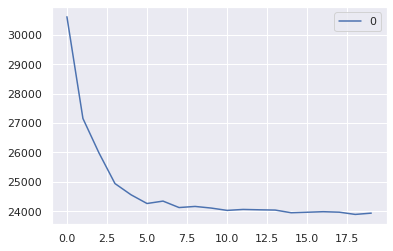

In [ ]:
#plotting the rmse values (y) against k values (x)
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [ ]:
#set model with ideal hyperparameters from above
categories_knn = KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='manhattan',
                    metric_params=None, n_jobs=None, n_neighbors=12, p=2,
                    weights='distance')
categories_knn.fit(X_train, y_train)

#cross validate
categories_knn_scores = cross_val_score(categories_knn, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', categories_knn_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(categories_knn_scores)))

Accuracy Scores for the 5 folds:  [0.52569488 0.47925117 0.48079946 0.58396604 0.50176749]
Mean Cross Validation Score: 0.514295807160983664552134086989099


In [ ]:
#generate predictions
categories_knn_preds = categories_knn.predict(X_test)

#more performance metrics
categories_knn_rsquared_train = categories_knn.score(X_train, y_train)
categories_knn_rsquared_test = categories_knn.score(X_test, y_test)
categories_knn_mae = mean_absolute_error(y_test, categories_knn_preds)
categories_knn_mse = mse(y_test, categories_knn_preds)
categories_knn_rmse = rmse(y_test, categories_knn_preds)
categories_knn_mape = np.mean(np.abs((y_test - categories_knn_preds)/y_test)*100)
categories_knn_rmspe = (np.sqrt(np.mean(np.square((y_test - categories_knn_preds) / y_test)))) * 100
categories_knn_model_name = 'Categories KNN'

#create easily readable display of performance metrics
categories_knn_dictionary = {'Model': categories_knn_model_name,
  'Training Set R Squared': categories_knn_rsquared_train, 
  'Test Set R Squared': categories_knn_rsquared_test, 'Mean Absolute Error': categories_knn_mae, 
  'Mean Sqaured Error': categories_knn_mse, 'Root Mean Squared Error': categories_knn_rmse,
  'Root Mean Squared Percentage Error': categories_knn_rmspe,
  'Mean Absolute Percentage Error': categories_knn_mape}

categories_knn_df = pd.DataFrame(categories_knn_dictionary, index=[0])

categories_knn_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,Categories KNN,0.992016,0.51412,16853.591191,5.789552e+08,24061.488382,26.636535,19.25637


### **yrs_exp_df**

In [ ]:
#set features & target
X = yrs_exp_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = yrs_exp_df['avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#Use grid search to find best hyperparameters
# defining parameter range 
param_grid = {'n_neighbors': [2, 4, 6, 8, 10, 12, 15],  
              'weights': ['uniform', 'distance'], 
              'metric': ['euclidean', 'manhattan']}  
  
years_exp_knn_grid = GridSearchCV(KNeighborsRegressor(), param_grid, refit = True, verbose=1) 
  
# fitting the model for grid search 
years_exp_knn_grid.fit(X_train, y_train) 
# print best parameter after tuning 
print(years_exp_knn_grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(years_exp_knn_grid.best_estimator_) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'distance'}
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='manhattan',
                    metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                    weights='distance')


[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    4.0s finished


In [ ]:
#validate best value for k
rmse_val = [] #to store rmse values for different k
for K in range (20):
  K = K+1
  model = KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='manhattan',
                    metric_params=None, n_jobs=None, n_neighbors=K, p=2,
                    weights='distance')
  model.fit(X_train, y_train) #fit the model
  preds = model.predict(X_test) #make predictions on test set
  error = rmse(y_test, preds) #calculate rmse
  rmse_val.append(error) #store rmse values
  print('RMSe Value for K= ', K, 'is ', error)

RMSe Value for K=  1 is  32088.694822990823
RMSe Value for K=  2 is  27907.791993105784
RMSe Value for K=  3 is  25985.410504648687
RMSe Value for K=  4 is  24615.948013412235
RMSe Value for K=  5 is  23725.45438516738
RMSe Value for K=  6 is  22830.204341583092
RMSe Value for K=  7 is  22697.051689043412
RMSe Value for K=  8 is  22468.859513192514
RMSe Value for K=  9 is  22232.193301444946
RMSe Value for K=  10 is  22063.81112999125
RMSe Value for K=  11 is  21906.688889013956
RMSe Value for K=  12 is  21882.246094630907
RMSe Value for K=  13 is  21760.268448470466
RMSe Value for K=  14 is  21751.780487964155
RMSe Value for K=  15 is  21767.9987717333
RMSe Value for K=  16 is  21815.328269032027
RMSe Value for K=  17 is  21946.803981716384
RMSe Value for K=  18 is  21869.970199372783
RMSe Value for K=  19 is  21836.73395560179
RMSe Value for K=  20 is  21846.7797344838


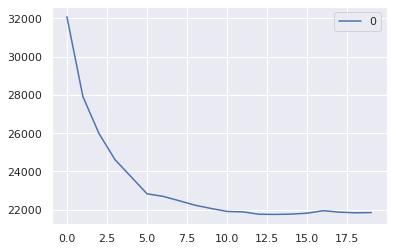

In [ ]:
#plotting the rmse values (y) against k values (x)
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [ ]:
#set model with ideal hyperparameters from above
years_exp_knn = KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='manhattan',
                    metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                    weights='distance')
years_exp_knn.fit(X_train, y_train)

#cross validate
years_exp_knn_scores = cross_val_score(years_exp_knn, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', years_exp_knn_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(years_exp_knn_scores)))

Accuracy Scores for the 5 folds:  [0.53940438 0.48162866 0.48301466 0.45874056 0.57927658]
Mean Cross Validation Score: 0.508412966618834949450445037655300


In [ ]:
#generate predictions
years_exp_knn_preds = years_exp_knn.predict(X_test)

#more performance metrics
years_exp_knn_rsquared_train = years_exp_knn.score(X_train, y_train)
years_exp_knn_rsquared_test = years_exp_knn.score(X_test, y_test)
years_exp_knn_mae = mean_absolute_error(y_test, years_exp_knn_preds)
years_exp_knn_mse = mse(y_test, years_exp_knn_preds)
years_exp_knn_rmse = rmse(y_test, years_exp_knn_preds)
years_exp_knn_mape = np.mean(np.abs((y_test - years_exp_knn_preds)/y_test)*100)
years_exp_knn_rmspe = (np.sqrt(np.mean(np.square((y_test - years_exp_knn_preds) / y_test)))) * 100
years_exp_knn_model_name = 'Years of Experience KNN'

#create easily readable display of performance metrics
years_exp_knn_dictionary = {'Model': years_exp_knn_model_name,
  'Training Set R Squared': years_exp_knn_rsquared_train, 
  'Test Set R Squared': years_exp_knn_rsquared_test, 'Mean Absolute Error': years_exp_knn_mae, 
  'Mean Sqaured Error': years_exp_knn_mse, 'Root Mean Squared Error': years_exp_knn_rmse,
  'Root Mean Squared Percentage Error': years_exp_knn_rmspe,
  'Mean Absolute Percentage Error': years_exp_knn_mape}

years_exp_knn_df = pd.DataFrame(years_exp_knn_dictionary, index=[0])

years_exp_knn_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,Years of Experience KNN,0.991993,0.554616,16003.269332,4.738458e+08,21767.998772,25.143075,17.890395


### **categories_df log(y)**

In [ ]:
#set features & target
X = categories_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = categories_df['log_avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#Use grid search to find best hyperparameters
# defining parameter range 
param_grid = {'n_neighbors': [2, 4, 6, 8, 10, 12, 15],  
              'weights': ['uniform', 'distance'], 
              'metric': ['euclidean', 'manhattan']}  
  
log_categories_knn_grid = GridSearchCV(KNeighborsRegressor(), param_grid, refit = True, verbose=1) 
  
# fitting the model for grid search 
log_categories_knn_grid.fit(X_train, y_train) 
# print best parameter after tuning 
print(log_categories_knn_grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(log_categories_knn_grid.best_estimator_) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'distance'}
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='manhattan',
                    metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                    weights='distance')


[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    4.8s finished


In [ ]:
#validate best value for k
rmse_val = [] #to store rmse values for different k
for K in range (20):
  K = K+1
  model = KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='manhattan',
                    metric_params=None, n_jobs=None, n_neighbors=K, p=2,
                    weights='distance')
  model.fit(X_train, y_train) #fit the model
  preds = model.predict(X_test) #make predictions on test set
  error = rmse(y_test, preds) #calculate rmse
  rmse_val.append(error) #store rmse values
  print('RMSe Value for K= ', K, 'is ', error)

RMSe Value for K=  1 is  0.3030026270051177
RMSe Value for K=  2 is  0.27224486764213596
RMSe Value for K=  3 is  0.2595639519748605
RMSe Value for K=  4 is  0.24863873221255428
RMSe Value for K=  5 is  0.24417021207488807
RMSe Value for K=  6 is  0.24125524444516372
RMSe Value for K=  7 is  0.2419281554293613
RMSe Value for K=  8 is  0.23960750409631165
RMSe Value for K=  9 is  0.2399945561768573
RMSe Value for K=  10 is  0.23964666186182887
RMSe Value for K=  11 is  0.23877754793691763
RMSe Value for K=  12 is  0.23900258199087634
RMSe Value for K=  13 is  0.2385565713857647
RMSe Value for K=  14 is  0.23840206912464484
RMSe Value for K=  15 is  0.23760213838033284
RMSe Value for K=  16 is  0.23762593770857207
RMSe Value for K=  17 is  0.23748991278116643
RMSe Value for K=  18 is  0.23767905712105672
RMSe Value for K=  19 is  0.23692082282532062
RMSe Value for K=  20 is  0.23743725480119487


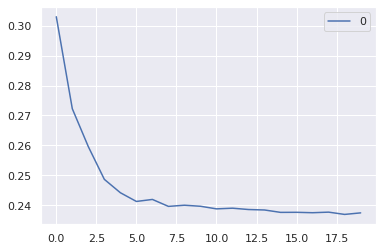

In [ ]:
#plotting the rmse values (y) against k values (x)
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [ ]:
#set model with ideal hyperparameters from above
log_categories_knn = KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='manhattan',
                    metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                    weights='distance')
log_categories_knn.fit(X_train, y_train)

#cross validate
log_categories_knn_scores = cross_val_score(log_categories_knn, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', log_categories_knn_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(log_categories_knn_scores)))

Accuracy Scores for the 5 folds:  [0.53732952 0.4965898  0.51223312 0.5854552  0.51164005]
Mean Cross Validation Score: 0.528649539463391993088237086340087


In [ ]:
#generate predictions
log_categories_knn_preds = log_categories_knn.predict(X_test)

#more performance metrics
log_categories_knn_rsquared_train = log_categories_knn.score(X_train, y_train)
log_categories_knn_rsquared_test = log_categories_knn.score(X_test, y_test)
log_categories_knn_mae = mean_absolute_error(y_test, log_categories_knn_preds)
log_categories_knn_mse = mse(y_test, log_categories_knn_preds)
log_categories_knn_rmse = rmse(y_test, log_categories_knn_preds)
log_categories_knn_mape = np.mean(np.abs((y_test - log_categories_knn_preds)/y_test)*100)
log_categories_knn_rmspe = (np.sqrt(np.mean(np.square((y_test - log_categories_knn_preds) / y_test)))) * 100
log_categories_knn_model_name = 'Categories KNN Log(y)'

#create easily readable display of performance metrics
log_categories_knn_dictionary = {'Model': log_categories_knn_model_name,
  'Training Set R Squared': log_categories_knn_rsquared_train, 
  'Test Set R Squared': log_categories_knn_rsquared_test, 'Mean Absolute Error': log_categories_knn_mae, 
  'Mean Sqaured Error': log_categories_knn_mse, 'Root Mean Squared Error': log_categories_knn_rmse,
  'Root Mean Squared Percentage Error': log_categories_knn_rmspe,
  'Mean Absolute Percentage Error': log_categories_knn_mape}

log_categories_knn_df = pd.DataFrame(log_categories_knn_dictionary, index=[0])

log_categories_knn_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,Categories KNN Log(y),0.993206,0.54664,0.181873,0.056455,0.237602,2.089045,1.599597


### **yrs_exp_df log(y)**

In [ ]:
#set features & target
X = yrs_exp_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = yrs_exp_df['log_avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#Use grid search to find best hyperparameters
# defining parameter range 
param_grid = {'n_neighbors': [2, 4, 6, 8, 10, 12, 15],  
              'weights': ['uniform', 'distance'], 
              'metric': ['euclidean', 'manhattan']}  
  
log_years_exp_knn_grid = GridSearchCV(KNeighborsRegressor(), param_grid, refit = True, verbose=1) 
  
# fitting the model for grid search 
log_years_exp_knn_grid.fit(X_train, y_train) 
# print best parameter after tuning 
print(log_years_exp_knn_grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(log_years_exp_knn_grid.best_estimator_) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'distance'}
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='manhattan',
                    metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                    weights='distance')


[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    3.9s finished


In [ ]:
#validate best value for k
rmse_val = [] #to store rmse values for different k
for K in range (20):
  K = K+1
  model = KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='manhattan',
                    metric_params=None, n_jobs=None, n_neighbors=K, p=2,
                    weights='distance')
  model.fit(X_train, y_train) #fit the model
  preds = model.predict(X_test) #make predictions on test set
  error = rmse(y_test, preds) #calculate rmse
  rmse_val.append(error) #store rmse values
  print('RMSe Value for K= ', K, 'is ', error)

RMSe Value for K=  1 is  0.30219707795833145
RMSe Value for K=  2 is  0.2738828362258556
RMSe Value for K=  3 is  0.2599919210193641
RMSe Value for K=  4 is  0.24826331748388103
RMSe Value for K=  5 is  0.23999391991520067
RMSe Value for K=  6 is  0.23122104145614158
RMSe Value for K=  7 is  0.23207390146070586
RMSe Value for K=  8 is  0.230823537957902
RMSe Value for K=  9 is  0.2293682011968489
RMSe Value for K=  10 is  0.22825245346864823
RMSe Value for K=  11 is  0.22673260435784404
RMSe Value for K=  12 is  0.2261663643221317
RMSe Value for K=  13 is  0.22484694833990482
RMSe Value for K=  14 is  0.22513425206936907
RMSe Value for K=  15 is  0.22530975063065464
RMSe Value for K=  16 is  0.22629436764429497
RMSe Value for K=  17 is  0.22735084769891303
RMSe Value for K=  18 is  0.2268127422129707
RMSe Value for K=  19 is  0.22654854349175627
RMSe Value for K=  20 is  0.22687716416163


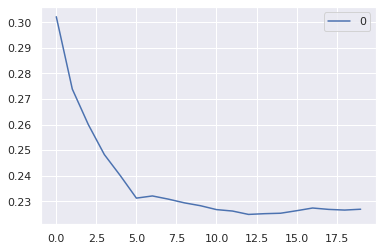

In [ ]:
#plotting the rmse values (y) against k values (x)
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [ ]:
#set model with ideal hyperparameters from above
log_years_exp_knn = KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='manhattan',
                    metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                    weights='distance')
log_years_exp_knn.fit(X_train, y_train)

#cross validate
log_years_exp_knn_scores = cross_val_score(log_years_exp_knn, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', log_years_exp_knn_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(log_years_exp_knn_scores)))

Accuracy Scores for the 5 folds:  [0.53223979 0.52888839 0.52625738 0.47361554 0.57673874]
Mean Cross Validation Score: 0.527547967374325743605822935933247


In [ ]:
#generate predictions
log_years_exp_knn_preds = log_years_exp_knn.predict(X_test)

#more performance metrics
log_years_exp_knn_rsquared_train = log_years_exp_knn.score(X_train, y_train)
log_years_exp_knn_rsquared_test = log_years_exp_knn.score(X_test, y_test)
log_years_exp_knn_mae = mean_absolute_error(y_test, log_years_exp_knn_preds)
log_years_exp_knn_mse = mse(y_test, log_years_exp_knn_preds)
log_years_exp_knn_rmse = rmse(y_test, log_years_exp_knn_preds)
log_years_exp_knn_mape = np.mean(np.abs((y_test - log_years_exp_knn_preds)/y_test)*100)
log_years_exp_knn_rmspe = (np.sqrt(np.mean(np.square((y_test - log_years_exp_knn_preds) / y_test)))) * 100
log_years_exp_knn_model_name = 'Years of Experience KNN Log(y)'

#create easily readable display of performance metrics
log_years_exp_knn_dictionary = {'Model': log_years_exp_knn_model_name,
  'Training Set R Squared': log_years_exp_knn_rsquared_train, 
  'Test Set R Squared': log_years_exp_knn_rsquared_test, 'Mean Absolute Error': log_years_exp_knn_mae, 
  'Mean Sqaured Error': log_years_exp_knn_mse, 'Root Mean Squared Error': log_years_exp_knn_rmse,
  'Root Mean Squared Percentage Error': log_years_exp_knn_rmspe,
  'Mean Absolute Percentage Error': log_years_exp_knn_mape}

log_years_exp_knn_df = pd.DataFrame(log_years_exp_knn_dictionary, index=[0])

log_years_exp_knn_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,Years of Experience KNN Log(y),0.993593,0.574812,0.170767,0.050764,0.22531,1.984819,1.499122


### **cat_no_outliers_df**

In [ ]:
#set features & target
X = cat_no_outliers_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = cat_no_outliers_df['avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#Use grid search to find best hyperparameters
# defining parameter range 
param_grid = {'n_neighbors': [2, 4, 6, 8, 10, 12, 15],  
              'weights': ['uniform', 'distance'], 
              'metric': ['euclidean', 'manhattan']}  
  
cat_no_outliers_knn_grid = GridSearchCV(KNeighborsRegressor(), param_grid, refit = True, verbose=1) 
  
# fitting the model for grid search 
cat_no_outliers_knn_grid.fit(X_train, y_train) 
# print best parameter after tuning 
print(cat_no_outliers_knn_grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(cat_no_outliers_knn_grid.best_estimator_) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'distance'}
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='manhattan',
                    metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                    weights='distance')


[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    5.0s finished


In [ ]:
#validate best value for k
rmse_val = [] #to store rmse values for different k
for K in range (20):
  K = K+1
  model = KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='manhattan',
                    metric_params=None, n_jobs=None, n_neighbors=K, p=2,
                    weights='distance')
  model.fit(X_train, y_train) #fit the model
  preds = model.predict(X_test) #make predictions on test set
  error = rmse(y_test, preds) #calculate rmse
  rmse_val.append(error) #store rmse values
  print('RMSe Value for K= ', K, 'is ', error)

RMSe Value for K=  1 is  28554.719118110916
RMSe Value for K=  2 is  25076.704690714614
RMSe Value for K=  3 is  23451.171268988677
RMSe Value for K=  4 is  22508.789712706555
RMSe Value for K=  5 is  22161.772772246488
RMSe Value for K=  6 is  21863.30050417604
RMSe Value for K=  7 is  21801.55043454563
RMSe Value for K=  8 is  21907.51070040143
RMSe Value for K=  9 is  22030.607422272435
RMSe Value for K=  10 is  22014.40409502369
RMSe Value for K=  11 is  21986.165884090886
RMSe Value for K=  12 is  21926.569197205838
RMSe Value for K=  13 is  21882.23261677726
RMSe Value for K=  14 is  21861.627824969324
RMSe Value for K=  15 is  21814.11541620112
RMSe Value for K=  16 is  21845.97907166437
RMSe Value for K=  17 is  21808.12601459498
RMSe Value for K=  18 is  21793.66229427394
RMSe Value for K=  19 is  21751.569123415684
RMSe Value for K=  20 is  21793.78870100735


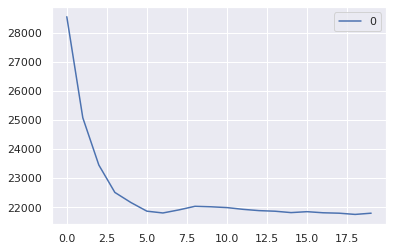

In [ ]:
#plotting the rmse values (y) against k values (x)
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [ ]:
#set model with ideal hyperparameters from above
cat_no_outliers_knn = KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='manhattan',
                    metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                    weights='distance')
cat_no_outliers_knn.fit(X_train, y_train)

#cross validate
cat_no_outliers_knn_scores = cross_val_score(cat_no_outliers_knn, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', cat_no_outliers_knn_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(cat_no_outliers_knn_scores)))

Accuracy Scores for the 5 folds:  [0.53911189 0.51770703 0.54548995 0.4934443  0.50211171]
Mean Cross Validation Score: 0.519572976308822154223321376775857


In [ ]:
#generate predictions
cat_no_outliers_knn_preds = cat_no_outliers_knn.predict(X_test)

#more performance metrics
cat_no_outliers_knn_rsquared_train = cat_no_outliers_knn.score(X_train, y_train)
cat_no_outliers_knn_rsquared_test = cat_no_outliers_knn.score(X_test, y_test)
cat_no_outliers_knn_mae = mean_absolute_error(y_test, cat_no_outliers_knn_preds)
cat_no_outliers_knn_mse = mse(y_test, cat_no_outliers_knn_preds)
cat_no_outliers_knn_rmse = rmse(y_test, cat_no_outliers_knn_preds)
cat_no_outliers_knn_mape = np.mean(np.abs((y_test - cat_no_outliers_knn_preds)/y_test)*100)
cat_no_outliers_knn_rmspe = (np.sqrt(np.mean(np.square((y_test - cat_no_outliers_knn_preds) / y_test)))) * 100
cat_no_outliers_knn_model_name = 'Categories w/o Outliers KNN'

#create easily readable display of performance metrics
cat_no_outliers_knn_dictionary = {'Model': cat_no_outliers_knn_model_name,
  'Training Set R Squared': cat_no_outliers_knn_rsquared_train, 
  'Test Set R Squared': cat_no_outliers_knn_rsquared_test, 'Mean Absolute Error': cat_no_outliers_knn_mae, 
  'Mean Sqaured Error': cat_no_outliers_knn_mse, 'Root Mean Squared Error': cat_no_outliers_knn_rmse,
  'Root Mean Squared Percentage Error': cat_no_outliers_knn_rmspe,
  'Mean Absolute Percentage Error': cat_no_outliers_knn_mape}

cat_no_outliers_knn_df = pd.DataFrame(cat_no_outliers_knn_dictionary, index=[0])

cat_no_outliers_knn_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,Categories w/o Outliers KNN,0.990877,0.502861,16332.156007,4.758556e+08,21814.115416,24.967259,18.038096


### **yrs_exp_no_outliers_df**

In [ ]:
#set features & target
X = yrs_exp_no_outliers_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = yrs_exp_no_outliers_df['avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#Use grid search to find best hyperparameters
# defining parameter range 
param_grid = {'n_neighbors': [2, 4, 6, 8, 10, 12, 15],  
              'weights': ['uniform', 'distance'], 
              'metric': ['euclidean', 'manhattan']}  
  
years_exp_no_outliers_knn_grid = GridSearchCV(KNeighborsRegressor(), param_grid, refit = True, verbose=1) 
  
# fitting the model for grid search 
years_exp_no_outliers_knn_grid.fit(X_train, y_train) 
# print best parameter after tuning 
print(years_exp_no_outliers_knn_grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(years_exp_no_outliers_knn_grid.best_estimator_) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'metric': 'manhattan', 'n_neighbors': 12, 'weights': 'distance'}
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='manhattan',
                    metric_params=None, n_jobs=None, n_neighbors=12, p=2,
                    weights='distance')


[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    3.9s finished


In [ ]:
#validate best value for k
rmse_val = [] #to store rmse values for different k
for K in range (20):
  K = K+1
  model = KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='manhattan',
                    metric_params=None, n_jobs=None, n_neighbors=K, p=2,
                    weights='distance')
  model.fit(X_train, y_train) #fit the model
  preds = model.predict(X_test) #make predictions on test set
  error = rmse(y_test, preds) #calculate rmse
  rmse_val.append(error) #store rmse values
  print('RMSe Value for K= ', K, 'is ', error)

RMSe Value for K=  1 is  28017.28129419789
RMSe Value for K=  2 is  23437.0662973889
RMSe Value for K=  3 is  22253.47514734457
RMSe Value for K=  4 is  21106.306146587805
RMSe Value for K=  5 is  20714.056547644042
RMSe Value for K=  6 is  20217.22202533607
RMSe Value for K=  7 is  20309.35992306291
RMSe Value for K=  8 is  20364.16387316609
RMSe Value for K=  9 is  20404.515703373185
RMSe Value for K=  10 is  20537.155620262263
RMSe Value for K=  11 is  20528.81251714461
RMSe Value for K=  12 is  20443.907194319454
RMSe Value for K=  13 is  20388.593953194
RMSe Value for K=  14 is  20487.690611219103
RMSe Value for K=  15 is  20514.323662609437
RMSe Value for K=  16 is  20507.815776766714
RMSe Value for K=  17 is  20479.307226741974
RMSe Value for K=  18 is  20549.458461452574
RMSe Value for K=  19 is  20477.43271227829
RMSe Value for K=  20 is  20564.551812690082


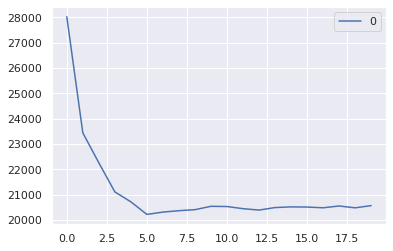

In [ ]:
#plotting the rmse values (y) against k values (x)
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [ ]:
#set model with ideal hyperparameters from above
years_exp_no_outliers_knn = KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='manhattan',
                    metric_params=None, n_jobs=None, n_neighbors=12, p=2,
                    weights='distance')
years_exp_no_outliers_knn.fit(X_train, y_train)

#cross validate
years_exp_no_outliers_knn_scores = cross_val_score(years_exp_no_outliers_knn, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', years_exp_no_outliers_knn_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(years_exp_no_outliers_knn_scores)))

Accuracy Scores for the 5 folds:  [0.55082897 0.53336046 0.46960297 0.49229798 0.56271194]
Mean Cross Validation Score: 0.521760464202214557793979565758491


In [ ]:
#generate predictions
years_exp_no_outliers_knn_preds = years_exp_no_outliers_knn.predict(X_test)

#more performance metrics
years_exp_no_outliers_knn_rsquared_train = years_exp_no_outliers_knn.score(X_train, y_train)
years_exp_no_outliers_knn_rsquared_test = years_exp_no_outliers_knn.score(X_test, y_test)
years_exp_no_outliers_knn_mae = mean_absolute_error(y_test, years_exp_no_outliers_knn_preds)
years_exp_no_outliers_knn_mse = mse(y_test, years_exp_no_outliers_knn_preds)
years_exp_no_outliers_knn_rmse = rmse(y_test, years_exp_no_outliers_knn_preds)
years_exp_no_outliers_knn_mape = np.mean(np.abs((y_test - years_exp_no_outliers_knn_preds)/y_test)*100)
years_exp_no_outliers_knn_rmspe = (np.sqrt(np.mean(np.square((y_test - years_exp_no_outliers_knn_preds) / y_test)))) * 100
years_exp_no_outliers_knn_model_name = 'Years of Experience w/o Outliers KNN'

#create easily readable display of performance metrics
years_exp_no_outliers_knn_dictionary = {'Model': years_exp_no_outliers_knn_model_name,
  'Training Set R Squared': years_exp_no_outliers_knn_rsquared_train, 
  'Test Set R Squared': years_exp_no_outliers_knn_rsquared_test, 'Mean Absolute Error': years_exp_no_outliers_knn_mae, 
  'Mean Sqaured Error': years_exp_no_outliers_knn_mse, 'Root Mean Squared Error': years_exp_no_outliers_knn_rmse,
  'Root Mean Squared Percentage Error': years_exp_no_outliers_knn_rmspe,
  'Mean Absolute Percentage Error': years_exp_no_outliers_knn_mape}

years_exp_no_outliers_knn_df = pd.DataFrame(years_exp_no_outliers_knn_dictionary, index=[0])

years_exp_no_outliers_knn_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,Years of Experience w/o Outliers KNN,0.989757,0.570812,15069.68452,4.179533e+08,20443.907194,22.880891,16.704509


### **cat_no_outliers_df log(y)**

In [ ]:
#set features & target
X = cat_no_outliers_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = cat_no_outliers_df['log_avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#Use grid search to find best hyperparameters
# defining parameter range 
param_grid = {'n_neighbors': [2, 4, 6, 8, 10, 12, 15],  
              'weights': ['uniform', 'distance'], 
              'metric': ['euclidean', 'manhattan']}  
  
log_cat_no_outliers_knn_grid = GridSearchCV(KNeighborsRegressor(), param_grid, refit = True, verbose=1) 
  
# fitting the model for grid search 
log_cat_no_outliers_knn_grid.fit(X_train, y_train) 
# print best parameter after tuning 
print(log_cat_no_outliers_knn_grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(log_cat_no_outliers_knn_grid.best_estimator_) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'metric': 'manhattan', 'n_neighbors': 12, 'weights': 'distance'}
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='manhattan',
                    metric_params=None, n_jobs=None, n_neighbors=12, p=2,
                    weights='distance')


[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    4.9s finished


In [ ]:
#validate best value for k
rmse_val = [] #to store rmse values for different k
for K in range (20):
  K = K+1
  model = KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='manhattan',
                    metric_params=None, n_jobs=None, n_neighbors=K, p=2,
                    weights='distance')
  model.fit(X_train, y_train) #fit the model
  preds = model.predict(X_test) #make predictions on test set
  error = rmse(y_test, preds) #calculate rmse
  rmse_val.append(error) #store rmse values
  print('RMSe Value for K= ', K, 'is ', error)

RMSe Value for K=  1 is  0.3106414948564802
RMSe Value for K=  2 is  0.26884631781438695
RMSe Value for K=  3 is  0.25170599550428957
RMSe Value for K=  4 is  0.24149232459603676
RMSe Value for K=  5 is  0.23763351879209724
RMSe Value for K=  6 is  0.23412026132102506
RMSe Value for K=  7 is  0.23394551412527678
RMSe Value for K=  8 is  0.23507242921742735
RMSe Value for K=  9 is  0.23599780122337816
RMSe Value for K=  10 is  0.23530934959168984
RMSe Value for K=  11 is  0.2349405698968401
RMSe Value for K=  12 is  0.2347147803624201
RMSe Value for K=  13 is  0.23415650415796374
RMSe Value for K=  14 is  0.23385421930521927
RMSe Value for K=  15 is  0.2334042335973235
RMSe Value for K=  16 is  0.23345336140909517
RMSe Value for K=  17 is  0.23314963124740357
RMSe Value for K=  18 is  0.23269357913530037
RMSe Value for K=  19 is  0.2322537690388125
RMSe Value for K=  20 is  0.23247796182173094


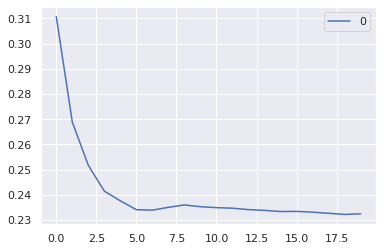

In [ ]:
#plotting the rmse values (y) against k values (x)
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [ ]:
#set model with ideal hyperparameters from above
log_cat_no_outliers_knn = KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='manhattan',
                    metric_params=None, n_jobs=None, n_neighbors=12, p=2,
                    weights='distance')
log_cat_no_outliers_knn.fit(X_train, y_train)

#cross validate
log_cat_no_outliers_knn_scores = cross_val_score(log_cat_no_outliers_knn, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', log_cat_no_outliers_knn_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(log_cat_no_outliers_knn_scores)))

Accuracy Scores for the 5 folds:  [0.56415812 0.51315843 0.55474129 0.50053291 0.50652238]
Mean Cross Validation Score: 0.527822626147311235733639023237629


In [ ]:
#generate predictions
log_cat_no_outliers_knn_preds = log_cat_no_outliers_knn.predict(X_test)

#more performance metrics
log_cat_no_outliers_knn_rsquared_train = log_cat_no_outliers_knn.score(X_train, y_train)
log_cat_no_outliers_knn_rsquared_test = log_cat_no_outliers_knn.score(X_test, y_test)
log_cat_no_outliers_knn_mae = mean_absolute_error(y_test, log_cat_no_outliers_knn_preds)
log_cat_no_outliers_knn_mse = mse(y_test, log_cat_no_outliers_knn_preds)
log_cat_no_outliers_knn_rmse = rmse(y_test, log_cat_no_outliers_knn_preds)
log_cat_no_outliers_knn_mape = np.mean(np.abs((y_test - log_cat_no_outliers_knn_preds)/y_test)*100)
log_cat_no_outliers_knn_rmspe = (np.sqrt(np.mean(np.square((y_test - log_cat_no_outliers_knn_preds) / y_test)))) * 100
log_cat_no_outliers_knn_model_name = 'Categories w/o Outliers KNN Log(y)'

#create easily readable display of performance metrics
log_cat_no_outliers_knn_dictionary = {'Model': log_cat_no_outliers_knn_model_name,
  'Training Set R Squared': log_cat_no_outliers_knn_rsquared_train, 
  'Test Set R Squared': log_cat_no_outliers_knn_rsquared_test, 'Mean Absolute Error': log_cat_no_outliers_knn_mae, 
  'Mean Sqaured Error': log_cat_no_outliers_knn_mse, 'Root Mean Squared Error': log_cat_no_outliers_knn_rmse,
  'Root Mean Squared Percentage Error': log_cat_no_outliers_knn_rmspe,
  'Mean Absolute Percentage Error': log_cat_no_outliers_knn_mape}

log_cat_no_outliers_knn_df = pd.DataFrame(log_cat_no_outliers_knn_dictionary, index=[0])

log_cat_no_outliers_knn_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,Categories w/o Outliers KNN Log(y),0.993002,0.501494,0.179322,0.055091,0.234715,2.059447,1.571125


### **yrs_exp_no_outliers_df log(y)**

In [ ]:
#set features & target
X = yrs_exp_no_outliers_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = yrs_exp_no_outliers_df['log_avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#Use grid search to find best hyperparameters
# defining parameter range 
param_grid = {'n_neighbors': [2, 4, 6, 8, 10, 12, 15],  
              'weights': ['uniform', 'distance'], 
              'metric': ['euclidean', 'manhattan']}  
  
log_years_exp_no_outliers_knn_grid = GridSearchCV(KNeighborsRegressor(), param_grid, refit = True, verbose=1) 
  
# fitting the model for grid search 
log_years_exp_no_outliers_knn_grid.fit(X_train, y_train) 
# print best parameter after tuning 
print(log_years_exp_no_outliers_knn_grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(log_years_exp_no_outliers_knn_grid.best_estimator_) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'metric': 'manhattan', 'n_neighbors': 12, 'weights': 'distance'}
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='manhattan',
                    metric_params=None, n_jobs=None, n_neighbors=12, p=2,
                    weights='distance')


[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    4.1s finished


In [ ]:
#validate best value for k
rmse_val = [] #to store rmse values for different k
for K in range (20):
  K = K+1
  model = KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='manhattan',
                    metric_params=None, n_jobs=None, n_neighbors=K, p=2,
                    weights='distance')
  model.fit(X_train, y_train) #fit the model
  preds = model.predict(X_test) #make predictions on test set
  error = rmse(y_test, preds) #calculate rmse
  rmse_val.append(error) #store rmse values
  print('RMSe Value for K= ', K, 'is ', error)

RMSe Value for K=  1 is  0.297873145719808
RMSe Value for K=  2 is  0.24930300489216517
RMSe Value for K=  3 is  0.23502709881249992
RMSe Value for K=  4 is  0.22316000464660124
RMSe Value for K=  5 is  0.21958885137692022
RMSe Value for K=  6 is  0.21389192237612548
RMSe Value for K=  7 is  0.21474092647581058
RMSe Value for K=  8 is  0.21564147908748021
RMSe Value for K=  9 is  0.2162836265696636
RMSe Value for K=  10 is  0.2176415028400334
RMSe Value for K=  11 is  0.21745234224549784
RMSe Value for K=  12 is  0.2162066223309049
RMSe Value for K=  13 is  0.215884294469163
RMSe Value for K=  14 is  0.21694752279093385
RMSe Value for K=  15 is  0.21759206949317528
RMSe Value for K=  16 is  0.2173556359753611
RMSe Value for K=  17 is  0.2170964549608462
RMSe Value for K=  18 is  0.21759712798444383
RMSe Value for K=  19 is  0.2169594132978675
RMSe Value for K=  20 is  0.21770471747293835


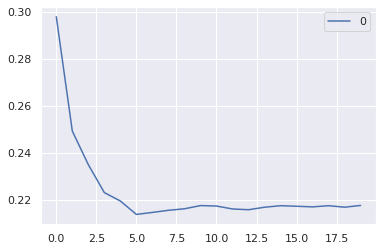

In [ ]:
#plotting the rmse values (y) against k values (x)
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [ ]:
#set model with ideal hyperparameters from above
log_years_exp_no_outliers_knn = KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='manhattan',
                    metric_params=None, n_jobs=None, n_neighbors=12, p=2,
                    weights='distance')
log_years_exp_no_outliers_knn.fit(X_train, y_train)

#cross validate
log_years_exp_no_outliers_knn_scores = cross_val_score(log_years_exp_no_outliers_knn, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', log_years_exp_no_outliers_knn_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(log_years_exp_no_outliers_knn_scores)))

Accuracy Scores for the 5 folds:  [0.55828274 0.54238972 0.45202556 0.5106402  0.55781534]
Mean Cross Validation Score: 0.524230711774407942549203198723262


In [ ]:
#generate predictions
log_years_exp_no_outliers_knn_preds = log_years_exp_no_outliers_knn.predict(X_test)

#more performance metrics
log_years_exp_no_outliers_knn_rsquared_train = log_years_exp_no_outliers_knn.score(X_train, y_train)
log_years_exp_no_outliers_knn_rsquared_test = log_years_exp_no_outliers_knn.score(X_test, y_test)
log_years_exp_no_outliers_knn_mae = mean_absolute_error(y_test, log_years_exp_no_outliers_knn_preds)
log_years_exp_no_outliers_knn_mse = mse(y_test, log_years_exp_no_outliers_knn_preds)
log_years_exp_no_outliers_knn_rmse = rmse(y_test, log_years_exp_no_outliers_knn_preds)
log_years_exp_no_outliers_knn_mape = np.mean(np.abs((y_test - log_years_exp_no_outliers_knn_preds)/y_test)*100)
log_years_exp_no_outliers_knn_rmspe = (np.sqrt(np.mean(np.square((y_test - log_years_exp_no_outliers_knn_preds) / y_test)))) * 100
log_years_exp_no_outliers_knn_model_name = 'Years of Experience w/o Outliers KNN Log(y)'

#create easily readable display of performance metrics
log_years_exp_no_outliers_knn_dictionary = {'Model': log_years_exp_no_outliers_knn_model_name,
  'Training Set R Squared': log_years_exp_no_outliers_knn_rsquared_train, 
  'Test Set R Squared': log_years_exp_no_outliers_knn_rsquared_test, 'Mean Absolute Error': log_years_exp_no_outliers_knn_mae, 
  'Mean Sqaured Error': log_years_exp_no_outliers_knn_mse, 'Root Mean Squared Error': log_years_exp_no_outliers_knn_rmse,
  'Root Mean Squared Percentage Error': log_years_exp_no_outliers_knn_rmspe,
  'Mean Absolute Percentage Error': log_years_exp_no_outliers_knn_mape}

log_years_exp_no_outliers_knn_df = pd.DataFrame(log_years_exp_no_outliers_knn_dictionary, index=[0])

log_years_exp_no_outliers_knn_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,Years of Experience w/o Outliers KNN Log(y),0.992256,0.595186,0.165327,0.046745,0.216207,1.897822,1.449921


## **Random Forest**

### **categories_df**

In [ ]:
# #set features & target
# X = categories_df.drop(columns=['avg_sal', 'log_avg_sal'])
# y = categories_df['avg_sal']

# #split data into training & test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

# #Use grid search to find best hyperparameters
# # defining parameter range 
# param_grid = {'bootstrap': [True, False],
#  'max_depth': [10, 20, 30, 40, 50, None],
#  'max_features': ['auto', 'sqrt'],
#  'min_samples_leaf': [1, 2, 4],
#  'min_samples_split': [2, 5, 10],
#  'n_estimators': [0,20,40,60,80,100,120,140,160,180,200],
#  'random_state': [43]}  
  
# categories_rf_grid = GridSearchCV(RandomForestRegressor(), param_grid, refit = True, verbose=1)
# # fitting the model for grid search 
# categories_rf_grid.fit(X_train, y_train) 
# # print best parameter after tuning 
# print(categories_rf_grid.best_params_) 
  
# # print how our model looks after hyper-parameter tuning 
# print(categories_rf_grid.best_estimator_) 

In [ ]:
#set model with ideal hyperparameters from above
categories_rf = RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                      max_depth=20, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=43, verbose=0, warm_start=False)

categories_rf.fit(X_train, y_train)

#cross validate
categories_rf_scores = cross_val_score(categories_rf, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', categories_rf_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(categories_rf_scores)))

Accuracy Scores for the 5 folds:  [0.64539172 0.61968985 0.57799693 0.60429551 0.62183212]
Mean Cross Validation Score: 0.613841226983892651603014201100450


In [ ]:
#generate predictions
categories_rf_preds = categories_rf.predict(X_test)

#more performance metrics
categories_rf_rsquared_train = categories_rf.score(X_train, y_train)
categories_rf_rsquared_test = categories_rf.score(X_test, y_test)
categories_rf_mae = mean_absolute_error(y_test, categories_rf_preds)
categories_rf_mse = mse(y_test, categories_rf_preds)
categories_rf_rmse = rmse(y_test, categories_rf_preds)
categories_rf_mape = np.mean(np.abs((y_test - categories_rf_preds)/y_test)*100)
categories_rf_rmspe = (np.sqrt(np.mean(np.square((y_test - categories_rf_preds) / y_test)))) * 100
categories_rf_model_name = 'Categories Random Forest'

#create easily readable display of performance metrics
categories_rf_dictionary = {'Model': categories_rf_model_name,
  'Training Set R Squared': categories_rf_rsquared_train, 
  'Test Set R Squared': categories_rf_rsquared_test, 'Mean Absolute Error': categories_rf_mae, 
  'Mean Sqaured Error': categories_rf_mse, 'Root Mean Squared Error': categories_rf_rmse,
  'Root Mean Squared Percentage Error': categories_rf_rmspe,
  'Mean Absolute Percentage Error': categories_rf_mape}

categories_rf_df = pd.DataFrame(categories_rf_dictionary, index=[0])

categories_rf_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,Categories Random Forest,0.99121,0.659872,0.147826,0.039276,0.198181,1.749549,1.299059


### **yrs_exp_df**

In [ ]:
# #set features & target
# X = yrs_exp_df.drop(columns=['avg_sal', 'log_avg_sal'])
# y = yrs_exp_df['avg_sal']

# #split data into training & test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

# #Use grid search to find best hyperparameters
# # defining parameter range 
# param_grid = {'bootstrap': [True, False],
#  'max_depth': [10, 20, 30, 40, 50, None],
#  'max_features': ['auto', 'sqrt'],
#  'min_samples_leaf': [1, 2, 4],
#  'min_samples_split': [2, 5, 10],
#  'n_estimators': [0,20,40,60,80,100,120,140,160,180,200],
#  'random_state': [52]}  
  
# yrs_exp_rf_grid = GridSearchCV(RandomForestRegressor(), param_grid, refit = True, verbose=1)
# # fitting the model for grid search 
# yrs_exp_rf_grid.fit(X_train, y_train) 
# # print best parameter after tuning 
# print(yrs_exp_rf_grid.best_params_) 
  
# # print how our model looks after hyper-parameter tuning 
# print(yrs_exp_rf_grid.best_estimator_) 

In [ ]:
#set model with ideal hyperparameters from above
yrs_exp_rf = RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                      max_depth=20, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=52, verbose=0, warm_start=False)
yrs_exp_rf.fit(X_train, y_train)

#cross validate
yrs_exp_rf_scores = cross_val_score(yrs_exp_rf, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', yrs_exp_rf_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(yrs_exp_rf_scores)))

Accuracy Scores for the 5 folds:  [0.64526743 0.6229883  0.56988722 0.60206086 0.6280839 ]
Mean Cross Validation Score: 0.613657542526403698701642497326247


In [ ]:
#generate predictions
yrs_exp_rf_preds = yrs_exp_rf.predict(X_test)

#more performance metrics
yrs_exp_rf_rsquared_train = yrs_exp_rf.score(X_train, y_train)
yrs_exp_rf_rsquared_test = yrs_exp_rf.score(X_test, y_test)
yrs_exp_rf_mae = mean_absolute_error(y_test, yrs_exp_rf_preds)
yrs_exp_rf_mse = mse(y_test, yrs_exp_rf_preds)
yrs_exp_rf_rmse = rmse(y_test, yrs_exp_rf_preds)
yrs_exp_rf_mape = np.mean(np.abs((y_test - yrs_exp_rf_preds)/y_test)*100)
yrs_exp_rf_rmspe = (np.sqrt(np.mean(np.square((y_test - yrs_exp_rf_preds) / y_test)))) * 100
yrs_exp_rf_model_name = 'Years of Experience Random Forest'

#create easily readable display of performance metrics
yrs_exp_rf_dictionary = {'Model': yrs_exp_rf_model_name,
  'Training Set R Squared': yrs_exp_rf_rsquared_train, 
  'Test Set R Squared': yrs_exp_rf_rsquared_test, 'Mean Absolute Error': yrs_exp_rf_mae, 
  'Mean Sqaured Error': yrs_exp_rf_mse, 'Root Mean Squared Error': yrs_exp_rf_rmse,
  'Root Mean Squared Percentage Error': yrs_exp_rf_rmspe,
  'Mean Absolute Percentage Error': yrs_exp_rf_mape}

yrs_exp_rf_df = pd.DataFrame(yrs_exp_rf_dictionary, index=[0])

yrs_exp_rf_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,Years of Experience Random Forest,0.99136,0.663143,0.147319,0.038898,0.197226,1.741643,1.294756


### **categories_df log(y)**

In [ ]:
# #set features & target
# X = categories_df.drop(columns=['avg_sal', 'log_avg_sal'])
# y = categories_df['log_avg_sal']

# #split data into training & test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

# #Use grid search to find best hyperparameters
# # defining parameter range 
# param_grid = {'bootstrap': [True, False],
#  'max_depth': [10, 20, 30, 40, 50, None],
#  'max_features': ['auto', 'sqrt'],
#  'min_samples_leaf': [1, 2, 4],
#  'min_samples_split': [2, 5, 10],
#  'n_estimators': [0,20,40,60,80,100,120,140,160,180,200],
#  'random_state': [52]}  
  
# log_categories_rf_grid = GridSearchCV(RandomForestRegressor(), param_grid, refit = True, verbose=1)
# # fitting the model for grid search 
# log_categories_rf_grid.fit(X_train, y_train) 
# # print best parameter after tuning 
# print(log_categories_rf_grid.best_params_) 
  
# # print how our model looks after hyper-parameter tuning 
# print(log_categories_rf_grid.best_estimator_) 

In [ ]:
#set model with ideal hyperparameters from above
log_categories_rf = RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                      max_depth=30, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=52, verbose=0, warm_start=False)

log_categories_rf.fit(X_train, y_train)

#cross validate
log_categories_rf_scores = cross_val_score(log_categories_rf, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', log_categories_rf_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(log_categories_rf_scores)))

Accuracy Scores for the 5 folds:  [0.64196738 0.62225373 0.57033754 0.60465996 0.63013555]
Mean Cross Validation Score: 0.613870832612162131702859824144980


In [ ]:
#generate predictions
log_categories_rf_preds = log_categories_rf.predict(X_test)

#more performance metrics
log_categories_rf_rsquared_train = log_categories_rf.score(X_train, y_train)
log_categories_rf_rsquared_test = log_categories_rf.score(X_test, y_test)
log_categories_rf_mae = mean_absolute_error(y_test, log_categories_rf_preds)
log_categories_rf_mse = mse(y_test, log_categories_rf_preds)
log_categories_rf_rmse = rmse(y_test, log_categories_rf_preds)
log_categories_rf_mape = np.mean(np.abs((y_test - log_categories_rf_preds)/y_test)*100)
log_categories_rf_rmspe = (np.sqrt(np.mean(np.square((y_test - log_categories_rf_preds) / y_test)))) * 100
log_categories_rf_model_name = 'Categories Random Forest Log(y)'

#create easily readable display of performance metrics
log_categories_rf_dictionary = {'Model': log_categories_rf_model_name,
  'Training Set R Squared': log_categories_rf_rsquared_train, 
  'Test Set R Squared': log_categories_rf_rsquared_test, 'Mean Absolute Error': log_categories_rf_mae, 
  'Mean Sqaured Error': log_categories_rf_mse, 'Root Mean Squared Error': log_categories_rf_rmse,
  'Root Mean Squared Percentage Error': log_categories_rf_rmspe,
  'Mean Absolute Percentage Error': log_categories_rf_mape}

log_categories_rf_df = pd.DataFrame(log_categories_rf_dictionary, index=[0])

log_categories_rf_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,Categories Random Forest Log(y),0.925377,0.661646,0.150289,0.039071,0.197664,1.745044,1.320877


### **yrs_exp_df log(y)**

In [ ]:
# #set features & target
# X = yrs_exp_df.drop(columns=['avg_sal', 'log_avg_sal'])
# y = yrs_exp_df['log_avg_sal']

# #split data into training & test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

# #Use grid search to find best hyperparameters
# # defining parameter range 
# param_grid = {'bootstrap': [True, False],
#  'max_depth': [10, 20, 30, 40, 50, None],
#  'max_features': ['auto', 'sqrt'],
#  'min_samples_leaf': [1, 2, 4],
#  'min_samples_split': [2, 5, 10],
#  'n_estimators': [0,20,40,60,80,100,120,140,160,180,200],
#  'random_state': [52]}  
  
# log_yrs_exp_rf_grid = GridSearchCV(RandomForestRegressor(), param_grid, refit = True, verbose=1)
# # fitting the model for grid search 
# log_yrs_exp_rf_grid.fit(X_train, y_train) 
# # print best parameter after tuning 
# print(log_yrs_exp_rf_grid.best_params_) 
  
# # print how our model looks after hyper-parameter tuning 
# print(log_yrs_exp_rf_grid.best_estimator_) 

In [ ]:
#set model with ideal hyperparameters from above
log_yrs_exp_rf = RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                      max_depth=30, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=52, verbose=0, warm_start=False)
log_yrs_exp_rf.fit(X_train, y_train)

#cross validate
log_yrs_exp_rf_scores = cross_val_score(log_yrs_exp_rf, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', log_yrs_exp_rf_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(log_yrs_exp_rf_scores)))

Accuracy Scores for the 5 folds:  [0.63842514 0.6206816  0.57186165 0.59925278 0.62707812]
Mean Cross Validation Score: 0.611459860655559905850964241835754


In [ ]:
#generate predictions
log_yrs_exp_rf_preds = log_yrs_exp_rf.predict(X_test)

#more performance metrics
log_yrs_exp_rf_rsquared_train = log_yrs_exp_rf.score(X_train, y_train)
log_yrs_exp_rf_rsquared_test = log_yrs_exp_rf.score(X_test, y_test)
log_yrs_exp_rf_mae = mean_absolute_error(y_test, log_yrs_exp_rf_preds)
log_yrs_exp_rf_mse = mse(y_test, log_yrs_exp_rf_preds)
log_yrs_exp_rf_rmse = rmse(y_test, log_yrs_exp_rf_preds)
log_yrs_exp_rf_mape = np.mean(np.abs((y_test - log_yrs_exp_rf_preds)/y_test)*100)
log_yrs_exp_rf_rmspe = (np.sqrt(np.mean(np.square((y_test - log_yrs_exp_rf_preds) / y_test)))) * 100
log_yrs_exp_rf_model_name = 'Years of Experience Random Forest Log(y)'

#create easily readable display of performance metrics
log_yrs_exp_rf_dictionary = {'Model': log_yrs_exp_rf_model_name,
  'Training Set R Squared': log_yrs_exp_rf_rsquared_train, 
  'Test Set R Squared': log_yrs_exp_rf_rsquared_test, 'Mean Absolute Error': log_yrs_exp_rf_mae, 
  'Mean Sqaured Error': log_yrs_exp_rf_mse, 'Root Mean Squared Error': log_yrs_exp_rf_rmse,
  'Root Mean Squared Percentage Error': log_yrs_exp_rf_rmspe,
  'Mean Absolute Percentage Error': log_yrs_exp_rf_mape}

log_yrs_exp_rf_df = pd.DataFrame(log_yrs_exp_rf_dictionary, index=[0])

log_yrs_exp_rf_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,Years of Experience Random Forest Log(y),0.992256,0.664503,0.146377,0.038741,0.196828,1.738206,1.286351


### **cat_no_outliers_df**

In [ ]:
# #set features & target
# X = cat_no_outliers_df.drop(columns=['avg_sal', 'log_avg_sal'])
# y = cat_no_outliers_df['avg_sal']

# #split data into training & test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

# #Use grid search to find best hyperparameters
# # defining parameter range 
# param_grid = {'bootstrap': [True, False],
#  'max_depth': [10, 20, 30, 40, 50, None],
#  'max_features': ['auto', 'sqrt'],
#  'min_samples_leaf': [1, 2, 4],
#  'min_samples_split': [2, 5, 10],
#  'n_estimators': [0,20,40,60,80,100,120,140,160,180,200],
#  'random_state': [43]}  
  
# cat_no_outliers_rf_grid = GridSearchCV(RandomForestRegressor(), param_grid, refit = True, verbose=1)
# # fitting the model for grid search 
# cat_no_outliers_rf_grid.fit(X_train, y_train) 
# # print best parameter after tuning 
# print(cat_no_outliers_rf_grid.best_params_) 
  
# # print how our model looks after hyper-parameter tuning 
# print(cat_no_outliers_rf_grid.best_estimator_) 

In [ ]:
#set model with ideal hyperparameters from above
cat_no_outliers_rf = RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                      max_depth=30, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=140, n_jobs=None, oob_score=False,
                      random_state=43, verbose=0, warm_start=False)

cat_no_outliers_rf.fit(X_train, y_train)

#cross validate
cat_no_outliers_rf_scores = cross_val_score(cat_no_outliers_rf, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', cat_no_outliers_rf_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(cat_no_outliers_rf_scores)))

Accuracy Scores for the 5 folds:  [0.63950749 0.62331088 0.57727681 0.61197729 0.6270692 ]
Mean Cross Validation Score: 0.615828334048154291124888004560489


In [ ]:
#generate predictions
cat_no_outliers_rf_preds = cat_no_outliers_rf.predict(X_test)

#more performance metrics
cat_no_outliers_rf_rsquared_train = cat_no_outliers_rf.score(X_train, y_train)
cat_no_outliers_rf_rsquared_test = cat_no_outliers_rf.score(X_test, y_test)
cat_no_outliers_rf_mae = mean_absolute_error(y_test, cat_no_outliers_rf_preds)
cat_no_outliers_rf_mse = mse(y_test, cat_no_outliers_rf_preds)
cat_no_outliers_rf_rmse = rmse(y_test, cat_no_outliers_rf_preds)
cat_no_outliers_rf_mape = np.mean(np.abs((y_test - cat_no_outliers_rf_preds)/y_test)*100)
cat_no_outliers_rf_rmspe = (np.sqrt(np.mean(np.square((y_test - cat_no_outliers_rf_preds) / y_test)))) * 100
cat_no_outliers_rf_model_name = 'Categories w/o Outliers Random Forest'

#create easily readable display of performance metrics
cat_no_outliers_rf_dictionary = {'Model': cat_no_outliers_rf_model_name,
  'Training Set R Squared': cat_no_outliers_rf_rsquared_train, 
  'Test Set R Squared': cat_no_outliers_rf_rsquared_test, 'Mean Absolute Error': cat_no_outliers_rf_mae, 
  'Mean Sqaured Error': cat_no_outliers_rf_mse, 'Root Mean Squared Error': cat_no_outliers_rf_rmse,
  'Root Mean Squared Percentage Error': cat_no_outliers_rf_rmspe,
  'Mean Absolute Percentage Error': cat_no_outliers_rf_mape}

cat_no_outliers_rf_df = pd.DataFrame(cat_no_outliers_rf_dictionary, index=[0])

cat_no_outliers_rf_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,Categories w/o Outliers Random Forest,0.954655,0.665193,0.149089,0.038661,0.196625,1.735815,1.310365


### **yrs_exp_no_outliers_df**

In [ ]:
# #set features & target
# X = yrs_exp_no_outliers_df.drop(columns=['avg_sal', 'log_avg_sal'])
# y = yrs_exp_no_outliers_df['avg_sal']

# #split data into training & test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

# #Use grid search to find best hyperparameters
# # defining parameter range 
# param_grid = {'bootstrap': [True, False],
#  'max_depth': [10, 20, 30, 40, 50, None],
#  'max_features': ['auto', 'sqrt'],
#  'min_samples_leaf': [1, 2, 4],
#  'min_samples_split': [2, 5, 10],
#  'n_estimators': [0,20,40,60,80,100,120,140,160,180,200],
#  'random_state': [52]}  
  
# yrs_exp_no_outliers_rf_grid = GridSearchCV(RandomForestRegressor(), param_grid, refit = True, verbose=1)
# # fitting the model for grid search 
# yrs_exp_no_outliers_rf_grid.fit(X_train, y_train) 
# # print best parameter after tuning 
# print(yrs_exp_no_outliers_rf_grid.best_params_) 
  
# # print how our model looks after hyper-parameter tuning 
# print(yrs_exp_no_outliers_rf_grid.best_estimator_) 

In [ ]:
#set model with ideal hyperparameters from above
yrs_exp_no_outliers_rf = RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                      max_depth=20, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=160, n_jobs=None, oob_score=False,
                      random_state=52, verbose=0, warm_start=False)
yrs_exp_no_outliers_rf.fit(X_train, y_train)

#cross validate
yrs_exp_no_outliers_rf_scores = cross_val_score(yrs_exp_no_outliers_rf, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', yrs_exp_no_outliers_rf_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(yrs_exp_no_outliers_rf_scores)))

Accuracy Scores for the 5 folds:  [0.64466915 0.62686258 0.56701678 0.61078018 0.62737539]
Mean Cross Validation Score: 0.615340814612695963248256703082006


In [ ]:
#generate predictions
yrs_exp_no_outliers_rf_preds = yrs_exp_no_outliers_rf.predict(X_test)

#more performance metrics
yrs_exp_no_outliers_rf_rsquared_train = yrs_exp_no_outliers_rf.score(X_train, y_train)
yrs_exp_no_outliers_rf_rsquared_test = yrs_exp_no_outliers_rf.score(X_test, y_test)
yrs_exp_no_outliers_rf_mae = mean_absolute_error(y_test, yrs_exp_no_outliers_rf_preds)
yrs_exp_no_outliers_rf_mse = mse(y_test, yrs_exp_no_outliers_rf_preds)
yrs_exp_no_outliers_rf_rmse = rmse(y_test, yrs_exp_no_outliers_rf_preds)
yrs_exp_no_outliers_rf_mape = np.mean(np.abs((y_test - yrs_exp_no_outliers_rf_preds)/y_test)*100)
yrs_exp_no_outliers_rf_rmspe = (np.sqrt(np.mean(np.square((y_test - yrs_exp_no_outliers_rf_preds) / y_test)))) * 100
yrs_exp_no_outliers_rf_model_name = 'Years of Experience w/o Outliers Random Forest'

#create easily readable display of performance metrics
yrs_exp_no_outliers_rf_dictionary = {'Model': yrs_exp_no_outliers_rf_model_name,
  'Training Set R Squared': yrs_exp_no_outliers_rf_rsquared_train, 
  'Test Set R Squared': yrs_exp_no_outliers_rf_rsquared_test, 'Mean Absolute Error': yrs_exp_no_outliers_rf_mae, 
  'Mean Sqaured Error': yrs_exp_no_outliers_rf_mse, 'Root Mean Squared Error': yrs_exp_no_outliers_rf_rmse,
  'Root Mean Squared Percentage Error': yrs_exp_no_outliers_rf_rmspe,
  'Mean Absolute Percentage Error': yrs_exp_no_outliers_rf_mape}

yrs_exp_no_outliers_rf_df = pd.DataFrame(yrs_exp_no_outliers_rf_dictionary, index=[0])

yrs_exp_no_outliers_rf_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,Years of Experience w/o Outliers Random Forest,0.952822,0.659784,0.149956,0.039286,0.198207,1.750266,1.318153


### **cat_no_outliers_df log(y)**

In [ ]:
# #set features & target
# X = cat_no_outliers_df.drop(columns=['avg_sal', 'log_avg_sal'])
# y = cat_no_outliers_df['log_avg_sal']

# #split data into training & test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

# #Use grid search to find best hyperparameters
# # defining parameter range 
# param_grid = {'bootstrap': [True, False],
#  'max_depth': [10, 20, 30, 40, 50, None],
#  'max_features': ['auto', 'sqrt'],
#  'min_samples_leaf': [1, 2, 4],
#  'min_samples_split': [2, 5, 10],
#  'n_estimators': [0,20,40,60,80,100,120,140,160,180,200],
#  'random_state': [52]}  
  
# log_cat_no_outliers_rf_grid = GridSearchCV(RandomForestRegressor(), param_grid, refit = True, verbose=1)
# # fitting the model for grid search 
# log_cat_no_outliers_rf_grid.fit(X_train, y_train) 
# # print best parameter after tuning 
# print(log_cat_no_outliers_rf_grid.best_params_) 
  
# # print how our model looks after hyper-parameter tuning 
# print(log_cat_no_outliers_rf_grid.best_estimator_) 

In [ ]:
#set model with ideal hyperparameters from above
log_cat_no_outliers_rf = RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                      max_depth=30, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=52, verbose=0, warm_start=False)

log_cat_no_outliers_rf.fit(X_train, y_train)

#cross validate
log_cat_no_outliers_rf_scores = cross_val_score(log_cat_no_outliers_rf, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', log_cat_no_outliers_rf_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(log_cat_no_outliers_rf_scores)))

Accuracy Scores for the 5 folds:  [0.64196738 0.62225373 0.57033754 0.60465996 0.63013555]
Mean Cross Validation Score: 0.613870832612162131702859824144980


In [ ]:
#generate predictions
log_cat_no_outliers_rf_preds = log_cat_no_outliers_rf.predict(X_test)

#more performance metrics
log_cat_no_outliers_rf_rsquared_train = log_cat_no_outliers_rf.score(X_train, y_train)
log_cat_no_outliers_rf_rsquared_test = log_cat_no_outliers_rf.score(X_test, y_test)
log_cat_no_outliers_rf_mae = mean_absolute_error(y_test, log_cat_no_outliers_rf_preds)
log_cat_no_outliers_rf_mse = mse(y_test, log_cat_no_outliers_rf_preds)
log_cat_no_outliers_rf_rmse = rmse(y_test, log_cat_no_outliers_rf_preds)
log_cat_no_outliers_rf_mape = np.mean(np.abs((y_test - log_cat_no_outliers_rf_preds)/y_test)*100)
log_cat_no_outliers_rf_rmspe = (np.sqrt(np.mean(np.square((y_test - log_cat_no_outliers_rf_preds) / y_test)))) * 100
log_cat_no_outliers_rf_model_name = 'Categories w/o Outliers Random Forest Log(y)'

#create easily readable display of performance metrics
log_cat_no_outliers_rf_dictionary = {'Model': log_cat_no_outliers_rf_model_name,
  'Training Set R Squared': log_cat_no_outliers_rf_rsquared_train, 
  'Test Set R Squared': log_cat_no_outliers_rf_rsquared_test, 'Mean Absolute Error': log_cat_no_outliers_rf_mae, 
  'Mean Sqaured Error': log_cat_no_outliers_rf_mse, 'Root Mean Squared Error': log_cat_no_outliers_rf_rmse,
  'Root Mean Squared Percentage Error': log_cat_no_outliers_rf_rmspe,
  'Mean Absolute Percentage Error': log_cat_no_outliers_rf_mape}

log_cat_no_outliers_rf_df = pd.DataFrame(log_cat_no_outliers_rf_dictionary, index=[0])

log_cat_no_outliers_rf_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,Categories w/o Outliers Random Forest Log(y),0.925377,0.661646,0.150289,0.039071,0.197664,1.745044,1.320877


### **yrs_exp_no_outliers_df log(y)**

In [ ]:
# #set features & target
# X = yrs_exp_no_outliers_df.drop(columns=['avg_sal', 'log_avg_sal'])
# y = yrs_exp_no_outliers_df['log_avg_sal']

# #split data into training & test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

# #Use grid search to find best hyperparameters
# # defining parameter range 
# param_grid = {'bootstrap': [True, False],
#  'max_depth': [10, 20, 30, 40, 50, None],
#  'max_features': ['auto', 'sqrt'],
#  'min_samples_leaf': [1, 2, 4],
#  'min_samples_split': [2, 5, 10],
#  'n_estimators': [0,20,40,60,80,100,120,140,160,180,200],
#  'random_state': [52]}  
  
# log_yrs_exp_no_outliers_rf_grid = GridSearchCV(RandomForestRegressor(), param_grid, refit = True, verbose=1)
# # fitting the model for grid search 
# log_yrs_exp_no_outliers_rf_grid.fit(X_train, y_train) 
# # print best parameter after tuning 
# print(log_yrs_exp_no_outliers_rf_grid.best_params_) 
  
# # print how our model looks after hyper-parameter tuning 
# print(log_yrs_exp_no_outliers_rf_grid.best_estimator_) 

In [ ]:
#set model with ideal hyperparameters from above
log_yrs_exp_no_outliers_rf = RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                      max_depth=30, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=52, verbose=0, warm_start=False)
log_yrs_exp_no_outliers_rf.fit(X_train, y_train)

#cross validate
log_yrs_exp_no_outliers_rf_scores = cross_val_score(log_yrs_exp_no_outliers_rf, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', log_yrs_exp_no_outliers_rf_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(log_yrs_exp_no_outliers_rf_scores)))

Accuracy Scores for the 5 folds:  [0.64135784 0.62778296 0.57255883 0.60595641 0.63392305]
Mean Cross Validation Score: 0.616315817223646367217781971703516


In [ ]:
#generate predictions
log_yrs_exp_no_outliers_rf_preds = log_yrs_exp_no_outliers_rf.predict(X_test)

#more performance metrics
log_yrs_exp_no_outliers_rf_rsquared_train = log_yrs_exp_no_outliers_rf.score(X_train, y_train)
log_yrs_exp_no_outliers_rf_rsquared_test = log_yrs_exp_no_outliers_rf.score(X_test, y_test)
log_yrs_exp_no_outliers_rf_mae = mean_absolute_error(y_test, log_yrs_exp_no_outliers_rf_preds)
log_yrs_exp_no_outliers_rf_mse = mse(y_test, log_yrs_exp_no_outliers_rf_preds)
log_yrs_exp_no_outliers_rf_rmse = rmse(y_test, log_yrs_exp_no_outliers_rf_preds)
log_yrs_exp_no_outliers_rf_mape = np.mean(np.abs((y_test - log_yrs_exp_no_outliers_rf_preds)/y_test)*100)
log_yrs_exp_no_outliers_rf_rmspe = (np.sqrt(np.mean(np.square((y_test - log_yrs_exp_no_outliers_rf_preds) / y_test)))) * 100
log_yrs_exp_no_outliers_rf_model_name = 'Years of Experience w/o Outliers Random Forest Log(y)'

#create easily readable display of performance metrics
log_yrs_exp_no_outliers_rf_dictionary = {'Model': log_yrs_exp_no_outliers_rf_model_name,
  'Training Set R Squared': log_yrs_exp_no_outliers_rf_rsquared_train, 
  'Test Set R Squared': log_yrs_exp_no_outliers_rf_rsquared_test, 'Mean Absolute Error': log_yrs_exp_no_outliers_rf_mae, 
  'Mean Sqaured Error': log_yrs_exp_no_outliers_rf_mse, 'Root Mean Squared Error': log_yrs_exp_no_outliers_rf_rmse,
  'Root Mean Squared Percentage Error': log_yrs_exp_no_outliers_rf_rmspe,
  'Mean Absolute Percentage Error': log_yrs_exp_no_outliers_rf_mape}

log_yrs_exp_no_outliers_rf_df = pd.DataFrame(log_yrs_exp_no_outliers_rf_dictionary, index=[0])

log_yrs_exp_no_outliers_rf_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,Years of Experience w/o Outliers Random Forest...,0.915827,0.659249,0.151317,0.039348,0.198363,1.752291,1.330164


## **Support Vector Machine**

### **categories_df**

In [ ]:
#set features & target
X = categories_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = categories_df['avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#Use grid search to find best hyperparameters
# defining parameter range 
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10],
 'gamma': [0.001, 0.01, 0.1, 1]
} 
  
categories_svm_grid = GridSearchCV(svm.SVR(kernel='rbf'), param_grid)
# fitting the model for grid search 
categories_svm_grid.fit(X_train, y_train) 
# print best parameter after tuning 
print(categories_svm_grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(categories_svm_grid.best_estimator_) 

{'C': 10, 'gamma': 0.01}
SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.01,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


In [ ]:
#set model with ideal hyperparameters from above
categories_svm = svm.SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.01,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

categories_svm.fit(X_train, y_train)

#cross validate
categories_svm_scores = cross_val_score(categories_svm, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', categories_svm_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(categories_svm_scores)))

Accuracy Scores for the 5 folds:  [ 0.00718277 -0.05316466 -0.00889102  0.01585045 -0.00642182]
Mean Cross Validation Score: -0.009088854644604604446356255209594


In [ ]:
#generate predictions
categories_svm_preds = categories_svm.predict(X_test)

#more performance metrics
categories_svm_rsquared_train = categories_svm.score(X_train, y_train)
categories_svm_rsquared_test = categories_svm.score(X_test, y_test)
categories_svm_mae = mean_absolute_error(y_test, categories_svm_preds)
categories_svm_mse = mse(y_test, categories_svm_preds)
categories_svm_rmse = rmse(y_test, categories_svm_preds)
categories_svm_mape = np.mean(np.abs((y_test - categories_svm_preds)/y_test)*100)
categories_svm_rmspe = (np.sqrt(np.mean(np.square((y_test - categories_svm_preds) / y_test)))) * 100
categories_svm_model_name = 'Categories SVM'

#create easily readable display of performance metrics
categories_svm_dictionary = {'Model': categories_svm_model_name,
  'Training Set R Squared': categories_svm_rsquared_train, 
  'Test Set R Squared': categories_svm_rsquared_test, 'Mean Absolute Error': categories_svm_mae, 
  'Mean Sqaured Error': categories_svm_mse, 'Root Mean Squared Error': categories_svm_rmse,
  'Root Mean Squared Percentage Error': categories_svm_rmspe,
  'Mean Absolute Percentage Error': categories_svm_mape}

categories_svm_df = pd.DataFrame(categories_svm_dictionary, index=[0])

categories_svm_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,Categories SVM,0.001434,0.009316,26285.030608,1.180460e+09,34357.82927,39.03049,30.224534


### **yrs_exp_df**

In [ ]:
#set features & target
X = yrs_exp_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = yrs_exp_df['avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#Use grid search to find best hyperparameters
# defining parameter range 
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10],
 'gamma': [0.001, 0.01, 0.1, 1]
} 
  
yrs_exp_svm_grid = GridSearchCV(svm.SVR(kernel='rbf'), param_grid)
# fitting the model for grid search 
yrs_exp_svm_grid.fit(X_train, y_train) 
# print best parameter after tuning 
print(yrs_exp_svm_grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(yrs_exp_svm_grid.best_estimator_)  

{'C': 10, 'gamma': 0.01}
SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.01,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


In [ ]:
#set model with ideal hyperparameters from above
yrs_exp_svm = svm.SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, 
      gamma=0.01, kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, 
      verbose=False)
yrs_exp_svm.fit(X_train, y_train)

#cross validate
yrs_exp_svm_scores = cross_val_score(yrs_exp_svm, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', yrs_exp_svm_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(yrs_exp_svm_scores)))

Accuracy Scores for the 5 folds:  [-0.03656773  0.00311797  0.0075406  -0.04638143 -0.00516353]
Mean Cross Validation Score: -0.015490824578467132094372615824796


In [ ]:
#generate predictions
yrs_exp_svm_preds = yrs_exp_svm.predict(X_test)

#more performance metrics
yrs_exp_svm_rsquared_train = yrs_exp_svm.score(X_train, y_train)
yrs_exp_svm_rsquared_test = yrs_exp_svm.score(X_test, y_test)
yrs_exp_svm_mae = mean_absolute_error(y_test, yrs_exp_svm_preds)
yrs_exp_svm_mse = mse(y_test, yrs_exp_svm_preds)
yrs_exp_svm_rmse = rmse(y_test, yrs_exp_svm_preds)
yrs_exp_svm_mape = np.mean(np.abs((y_test - yrs_exp_svm_preds)/y_test)*100)
yrs_exp_svm_rmspe = (np.sqrt(np.mean(np.square((y_test - yrs_exp_svm_preds) / y_test)))) * 100
yrs_exp_svm_model_name = 'Years of Experience SVM'

#create easily readable display of performance metrics
yrs_exp_svm_dictionary = {'Model': yrs_exp_svm_model_name,
  'Training Set R Squared': yrs_exp_svm_rsquared_train, 
  'Test Set R Squared': yrs_exp_svm_rsquared_test, 'Mean Absolute Error': yrs_exp_svm_mae, 
  'Mean Sqaured Error': yrs_exp_svm_mse, 'Root Mean Squared Error': yrs_exp_svm_rmse,
  'Root Mean Squared Percentage Error': yrs_exp_svm_rmspe,
  'Mean Absolute Percentage Error': yrs_exp_svm_mape}

yrs_exp_svm_df = pd.DataFrame(yrs_exp_svm_dictionary, index=[0])

yrs_exp_svm_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,Years of Experience SVM,-0.006928,-0.021547,25947.483715,1.086828e+09,32967.07758,37.53706,28.859049


### **categories_df log(y)**

In [ ]:
#set features & target
X = categories_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = categories_df['log_avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#Use grid search to find best hyperparameters
# defining parameter range 
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10],
 'gamma': [0.001, 0.01, 0.1, 1]
} 
  
log_categories_svm_grid = GridSearchCV(svm.SVR(kernel='rbf'), param_grid)
# fitting the model for grid search 
log_categories_svm_grid.fit(X_train, y_train) 
# print best parameter after tuning 
print(log_categories_svm_grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(log_categories_svm_grid.best_estimator_) 

{'C': 1, 'gamma': 0.01}
SVR(C=1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.01,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


In [ ]:
#set model with ideal hyperparameters from above
log_categories_svm = svm.SVR(C=1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.01,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

log_categories_svm.fit(X_train, y_train)

#cross validate
log_categories_svm_scores = cross_val_score(log_categories_svm, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', log_categories_svm_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(log_categories_svm_scores)))

Accuracy Scores for the 5 folds:  [0.54928118 0.53632312 0.55535896 0.57049789 0.57666292]
Mean Cross Validation Score: 0.557624813370848237958909976441646


In [ ]:
#generate predictions
log_categories_svm_preds = log_categories_svm.predict(X_test)

#more performance metrics
log_categories_svm_rsquared_train = log_categories_svm.score(X_train, y_train)
log_categories_svm_rsquared_test = log_categories_svm.score(X_test, y_test)
log_categories_svm_mae = mean_absolute_error(y_test, log_categories_svm_preds)
log_categories_svm_mse = mse(y_test, log_categories_svm_preds)
log_categories_svm_rmse = rmse(y_test, log_categories_svm_preds)
log_categories_svm_mape = np.mean(np.abs((y_test - log_categories_svm_preds)/y_test)*100)
log_categories_svm_rmspe = (np.sqrt(np.mean(np.square((y_test - log_categories_svm_preds) / y_test)))) * 100
log_categories_svm_model_name = 'Categories SVM Log(y)'

#create easily readable display of performance metrics
log_categories_svm_dictionary = {'Model': log_categories_svm_model_name,
  'Training Set R Squared': log_categories_svm_rsquared_train, 
  'Test Set R Squared': log_categories_svm_rsquared_test, 'Mean Absolute Error': log_categories_svm_mae, 
  'Mean Sqaured Error': log_categories_svm_mse, 'Root Mean Squared Error': log_categories_svm_rmse,
  'Root Mean Squared Percentage Error': log_categories_svm_rmspe,
  'Mean Absolute Percentage Error': log_categories_svm_mape}

log_categories_svm_df = pd.DataFrame(log_categories_svm_dictionary, index=[0])

log_categories_svm_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,Categories SVM Log(y),0.615915,0.542573,0.181957,0.056961,0.238665,2.103779,1.602605


### **yrs_exp_df log(y)**

In [ ]:
#set features & target
X = yrs_exp_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = yrs_exp_df['log_avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#Use grid search to find best hyperparameters
# defining parameter range 
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10],
 'gamma': [0.001, 0.01, 0.1, 1]
} 
  
log_yrs_exp_svm_grid = GridSearchCV(svm.SVR(kernel='rbf'), param_grid)
# fitting the model for grid search 
log_yrs_exp_svm_grid.fit(X_train, y_train) 
# print best parameter after tuning 
print(log_yrs_exp_svm_grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(log_yrs_exp_svm_grid.best_estimator_)  

{'C': 1, 'gamma': 0.01}
SVR(C=1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.01,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


In [ ]:
#set model with ideal hyperparameters from above
log_yrs_exp_svm = svm.SVR(C=1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, 
      gamma=0.01, kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, 
      verbose=False)
log_yrs_exp_svm.fit(X_train, y_train)

#cross validate
log_yrs_exp_svm_scores = cross_val_score(log_yrs_exp_svm, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', log_yrs_exp_svm_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(log_yrs_exp_svm_scores)))

Accuracy Scores for the 5 folds:  [0.56689534 0.56598055 0.5512239  0.5522662  0.54301559]
Mean Cross Validation Score: 0.555876314753294353820933793031145


In [ ]:
#generate predictions
log_yrs_exp_svm_preds = log_yrs_exp_svm.predict(X_test)

#more performance metrics
log_yrs_exp_svm_rsquared_train = log_yrs_exp_svm.score(X_train, y_train)
log_yrs_exp_svm_rsquared_test = log_yrs_exp_svm.score(X_test, y_test)
log_yrs_exp_svm_mae = mean_absolute_error(y_test, log_yrs_exp_svm_preds)
log_yrs_exp_svm_mse = mse(y_test, log_yrs_exp_svm_preds)
log_yrs_exp_svm_rmse = rmse(y_test, log_yrs_exp_svm_preds)
log_yrs_exp_svm_mape = np.mean(np.abs((y_test - log_yrs_exp_svm_preds)/y_test)*100)
log_yrs_exp_svm_rmspe = (np.sqrt(np.mean(np.square((y_test - log_yrs_exp_svm_preds) / y_test)))) * 100
log_yrs_exp_svm_model_name = 'Years of Experience SVM Log(y)'

#create easily readable display of performance metrics
log_yrs_exp_svm_dictionary = {'Model': log_yrs_exp_svm_model_name,
  'Training Set R Squared': log_yrs_exp_svm_rsquared_train, 
  'Test Set R Squared': log_yrs_exp_svm_rsquared_test, 'Mean Absolute Error': log_yrs_exp_svm_mae, 
  'Mean Sqaured Error': log_yrs_exp_svm_mse, 'Root Mean Squared Error': log_yrs_exp_svm_rmse,
  'Root Mean Squared Percentage Error': log_yrs_exp_svm_rmspe,
  'Mean Absolute Percentage Error': log_yrs_exp_svm_mape}

log_yrs_exp_svm_df = pd.DataFrame(log_yrs_exp_svm_dictionary, index=[0])

log_yrs_exp_svm_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,Years of Experience SVM Log(y),0.62062,0.587278,0.167065,0.049276,0.221982,1.968938,1.470304


### **cat_no_outliers_df**

In [ ]:
#set features & target
X = cat_no_outliers_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = cat_no_outliers_df['avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#Use grid search to find best hyperparameters
# defining parameter range 
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10],
 'gamma': [0.001, 0.01, 0.1, 1]
} 
  
cat_no_outliers_svm_grid = GridSearchCV(svm.SVR(kernel='rbf'), param_grid)
# fitting the model for grid search 
cat_no_outliers_svm_grid.fit(X_train, y_train) 
# print best parameter after tuning 
print(cat_no_outliers_svm_grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(cat_no_outliers_svm_grid.best_estimator_) 

{'C': 10, 'gamma': 0.01}
SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.01,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


In [ ]:
#set model with ideal hyperparameters from above
cat_no_outliers_svm = svm.SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.01,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

cat_no_outliers_svm.fit(X_train, y_train)

#cross validate
cat_no_outliers_svm_scores = cross_val_score(cat_no_outliers_svm, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', cat_no_outliers_svm_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(cat_no_outliers_svm_scores)))

Accuracy Scores for the 5 folds:  [ 0.01592609 -0.03247067  0.01015361  0.00142093 -0.01512619]
Mean Cross Validation Score: -0.004019246752306538002230684725191


In [ ]:
#generate predictions
cat_no_outliers_svm_preds = cat_no_outliers_svm.predict(X_test)

#more performance metrics
cat_no_outliers_svm_rsquared_train = cat_no_outliers_svm.score(X_train, y_train)
cat_no_outliers_svm_rsquared_test = cat_no_outliers_svm.score(X_test, y_test)
cat_no_outliers_svm_mae = mean_absolute_error(y_test, cat_no_outliers_svm_preds)
cat_no_outliers_svm_mse = mse(y_test, cat_no_outliers_svm_preds)
cat_no_outliers_svm_rmse = rmse(y_test, cat_no_outliers_svm_preds)
cat_no_outliers_svm_mape = np.mean(np.abs((y_test - cat_no_outliers_svm_preds)/y_test)*100)
cat_no_outliers_svm_rmspe = (np.sqrt(np.mean(np.square((y_test - cat_no_outliers_svm_preds) / y_test)))) * 100
cat_no_outliers_svm_model_name = 'Categories w/o Outliers SVM'

#create easily readable display of performance metrics
cat_no_outliers_svm_dictionary = {'Model': cat_no_outliers_svm_model_name,
  'Training Set R Squared': cat_no_outliers_svm_rsquared_train, 
  'Test Set R Squared': cat_no_outliers_svm_rsquared_test, 'Mean Absolute Error': cat_no_outliers_svm_mae, 
  'Mean Sqaured Error': cat_no_outliers_svm_mse, 'Root Mean Squared Error': cat_no_outliers_svm_rmse,
  'Root Mean Squared Percentage Error': cat_no_outliers_svm_rmspe,
  'Mean Absolute Percentage Error': cat_no_outliers_svm_mape}

cat_no_outliers_svm_df = pd.DataFrame(cat_no_outliers_svm_dictionary, index=[0])

cat_no_outliers_svm_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,Categories w/o Outliers SVM,0.00248,-0.01483,24843.213328,9.713831e+08,31167.018805,35.729044,27.673297


### **yrs_exp_no_outliers_df**

In [ ]:
#set features & target
X = yrs_exp_no_outliers_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = yrs_exp_no_outliers_df['avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#Use grid search to find best hyperparameters
# defining parameter range 
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10],
 'gamma': [0.001, 0.01, 0.1, 1]
} 
  
yrs_exp_no_outliers_svm_grid = GridSearchCV(svm.SVR(kernel='rbf'), param_grid)
# fitting the model for grid search 
yrs_exp_no_outliers_svm_grid.fit(X_train, y_train) 
# print best parameter after tuning 
print(yrs_exp_no_outliers_svm_grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(yrs_exp_no_outliers_svm_grid.best_estimator_)  

{'C': 10, 'gamma': 0.01}
SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.01,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


In [ ]:
#set model with ideal hyperparameters from above
yrs_exp_no_outliers_svm = svm.SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, 
      gamma=0.01, kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, 
      verbose=False)
yrs_exp_no_outliers_svm.fit(X_train, y_train)

#cross validate
yrs_exp_no_outliers_svm_scores = cross_val_score(yrs_exp_no_outliers_svm, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', yrs_exp_no_outliers_svm_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(yrs_exp_no_outliers_svm_scores)))

Accuracy Scores for the 5 folds:  [-0.01114395 -0.01732835  0.00905415  0.00270774 -0.0325248 ]
Mean Cross Validation Score: -0.009847041788175969756480299110990


In [ ]:
#generate predictions
yrs_exp_no_outliers_svm_preds = yrs_exp_no_outliers_svm.predict(X_test)

#more performance metrics
yrs_exp_no_outliers_svm_rsquared_train = yrs_exp_no_outliers_svm.score(X_train, y_train)
yrs_exp_no_outliers_svm_rsquared_test = yrs_exp_no_outliers_svm.score(X_test, y_test)
yrs_exp_no_outliers_svm_mae = mean_absolute_error(y_test, yrs_exp_no_outliers_svm_preds)
yrs_exp_no_outliers_svm_mse = mse(y_test, yrs_exp_no_outliers_svm_preds)
yrs_exp_no_outliers_svm_rmse = rmse(y_test, yrs_exp_no_outliers_svm_preds)
yrs_exp_no_outliers_svm_mape = np.mean(np.abs((y_test - yrs_exp_no_outliers_svm_preds)/y_test)*100)
yrs_exp_no_outliers_svm_rmspe = (np.sqrt(np.mean(np.square((y_test - yrs_exp_no_outliers_svm_preds) / y_test)))) * 100
yrs_exp_no_outliers_svm_model_name = 'Years of Experience w/o Outliers SVM'

#create easily readable display of performance metrics
yrs_exp_no_outliers_svm_dictionary = {'Model': yrs_exp_no_outliers_svm_model_name,
  'Training Set R Squared': yrs_exp_no_outliers_svm_rsquared_train, 
  'Test Set R Squared': yrs_exp_no_outliers_svm_rsquared_test, 'Mean Absolute Error': yrs_exp_no_outliers_svm_mae, 
  'Mean Sqaured Error': yrs_exp_no_outliers_svm_mse, 'Root Mean Squared Error': yrs_exp_no_outliers_svm_rmse,
  'Root Mean Squared Percentage Error': yrs_exp_no_outliers_svm_rmspe,
  'Mean Absolute Percentage Error': yrs_exp_no_outliers_svm_mape}

yrs_exp_no_outliers_svm_df = pd.DataFrame(yrs_exp_no_outliers_svm_dictionary, index=[0])

yrs_exp_no_outliers_svm_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,Years of Experience w/o Outliers SVM,-0.002486,-0.024393,25595.907814,9.975779e+08,31584.45702,36.482452,28.770761


### **cat_no_outliers_df log(y)**

In [ ]:
#set features & target
X = cat_no_outliers_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = cat_no_outliers_df['log_avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#Use grid search to find best hyperparameters
# defining parameter range 
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10],
 'gamma': [0.001, 0.01, 0.1, 1]
} 
  
log_cat_no_outliers_svm_grid = GridSearchCV(svm.SVR(kernel='rbf'), param_grid)
# fitting the model for grid search 
log_cat_no_outliers_svm_grid.fit(X_train, y_train) 
# print best parameter after tuning 
print(log_cat_no_outliers_svm_grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(log_cat_no_outliers_svm_grid.best_estimator_) 

{'C': 1, 'gamma': 0.01}
SVR(C=1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.01,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


In [ ]:
#set model with ideal hyperparameters from above
log_cat_no_outliers_svm = svm.SVR(C=1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.01,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

log_cat_no_outliers_svm.fit(X_train, y_train)

#cross validate
log_cat_no_outliers_svm_scores = cross_val_score(log_cat_no_outliers_svm, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', log_cat_no_outliers_svm_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(log_cat_no_outliers_svm_scores)))

Accuracy Scores for the 5 folds:  [0.58699886 0.54494388 0.52771972 0.50733971 0.57465071]
Mean Cross Validation Score: 0.548330574382426827462211349484278


In [ ]:
#generate predictions
log_cat_no_outliers_svm_preds = log_cat_no_outliers_svm.predict(X_test)

#more performance metrics
log_cat_no_outliers_svm_rsquared_train = log_cat_no_outliers_svm.score(X_train, y_train)
log_cat_no_outliers_svm_rsquared_test = log_cat_no_outliers_svm.score(X_test, y_test)
log_cat_no_outliers_svm_mae = mean_absolute_error(y_test, log_cat_no_outliers_svm_preds)
log_cat_no_outliers_svm_mse = mse(y_test, log_cat_no_outliers_svm_preds)
log_cat_no_outliers_svm_rmse = rmse(y_test, log_cat_no_outliers_svm_preds)
log_cat_no_outliers_svm_mape = np.mean(np.abs((y_test - log_cat_no_outliers_svm_preds)/y_test)*100)
log_cat_no_outliers_svm_rmspe = (np.sqrt(np.mean(np.square((y_test - log_cat_no_outliers_svm_preds) / y_test)))) * 100
log_cat_no_outliers_svm_model_name = 'Categories w/o OUtliers SVM Log(y)'

#create easily readable display of performance metrics
log_cat_no_outliers_svm_dictionary = {'Model': log_cat_no_outliers_svm_model_name,
  'Training Set R Squared': log_cat_no_outliers_svm_rsquared_train, 
  'Test Set R Squared': log_cat_no_outliers_svm_rsquared_test, 'Mean Absolute Error': log_cat_no_outliers_svm_mae, 
  'Mean Sqaured Error': log_cat_no_outliers_svm_mse, 'Root Mean Squared Error': log_cat_no_outliers_svm_rmse,
  'Root Mean Squared Percentage Error': log_cat_no_outliers_svm_rmspe,
  'Mean Absolute Percentage Error': log_cat_no_outliers_svm_mape}

log_cat_no_outliers_svm_df = pd.DataFrame(log_cat_no_outliers_svm_dictionary, index=[0])

log_cat_no_outliers_svm_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,Categories w/o OUtliers SVM Log(y),0.613055,0.549721,0.172467,0.049761,0.223073,1.965697,1.514358


### **yrs_exp_no_outliers_df log(y)**

In [ ]:
#set features & target
X = yrs_exp_no_outliers_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = yrs_exp_no_outliers_df['log_avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#Use grid search to find best hyperparameters
# defining parameter range 
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10],
 'gamma': [0.001, 0.01, 0.1, 1]
} 
  
log_yrs_exp_no_outliers_svm_grid = GridSearchCV(svm.SVR(kernel='rbf'), param_grid)
# fitting the model for grid search 
log_yrs_exp_no_outliers_svm_grid.fit(X_train, y_train) 
# print best parameter after tuning 
print(log_yrs_exp_no_outliers_svm_grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(log_yrs_exp_no_outliers_svm_grid.best_estimator_)  

{'C': 1, 'gamma': 0.01}
SVR(C=1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.01,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


In [ ]:
#set model with ideal hyperparameters from above
log_yrs_exp_no_outliers_svm = svm.SVR(C=1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, 
      gamma=0.01, kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, 
      verbose=False)
log_yrs_exp_no_outliers_svm.fit(X_train, y_train)

#cross validate
log_yrs_exp_no_outliers_svm_scores = cross_val_score(log_yrs_exp_no_outliers_svm, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', log_yrs_exp_no_outliers_svm_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(log_yrs_exp_no_outliers_svm_scores)))

Accuracy Scores for the 5 folds:  [0.58762241 0.55437213 0.50512552 0.5703614  0.56781876]
Mean Cross Validation Score: 0.557060044781828578308591204404365


In [ ]:
#generate predictions
log_yrs_exp_no_outliers_svm_preds = log_yrs_exp_no_outliers_svm.predict(X_test)

#more performance metrics
log_yrs_exp_no_outliers_svm_rsquared_train = log_yrs_exp_no_outliers_svm.score(X_train, y_train)
log_yrs_exp_no_outliers_svm_rsquared_test = log_yrs_exp_no_outliers_svm.score(X_test, y_test)
log_yrs_exp_no_outliers_svm_mae = mean_absolute_error(y_test, log_yrs_exp_no_outliers_svm_preds)
log_yrs_exp_no_outliers_svm_mse = mse(y_test, log_yrs_exp_no_outliers_svm_preds)
log_yrs_exp_no_outliers_svm_rmse = rmse(y_test, log_yrs_exp_no_outliers_svm_preds)
log_yrs_exp_no_outliers_svm_mape = np.mean(np.abs((y_test - log_yrs_exp_no_outliers_svm_preds)/y_test)*100)
log_yrs_exp_no_outliers_svm_rmspe = (np.sqrt(np.mean(np.square((y_test - log_yrs_exp_no_outliers_svm_preds) / y_test)))) * 100
log_yrs_exp_no_outliers_svm_model_name = 'Years of Experience w/o Outliers SVM Log(y)'

#create easily readable display of performance metrics
log_yrs_exp_no_outliers_svm_dictionary = {'Model': log_yrs_exp_no_outliers_svm_model_name,
  'Training Set R Squared': log_yrs_exp_no_outliers_svm_rsquared_train, 
  'Test Set R Squared': log_yrs_exp_no_outliers_svm_rsquared_test, 'Mean Absolute Error': log_yrs_exp_no_outliers_svm_mae, 
  'Mean Sqaured Error': log_yrs_exp_no_outliers_svm_mse, 'Root Mean Squared Error': log_yrs_exp_no_outliers_svm_rmse,
  'Root Mean Squared Percentage Error': log_yrs_exp_no_outliers_svm_rmspe,
  'Mean Absolute Percentage Error': log_yrs_exp_no_outliers_svm_mape}

log_yrs_exp_no_outliers_svm_df = pd.DataFrame(log_yrs_exp_no_outliers_svm_dictionary, index=[0])

log_yrs_exp_no_outliers_svm_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,Years of Experience w/o Outliers SVM Log(y),0.621888,0.600318,0.165671,0.046153,0.214832,1.897007,1.456796


## **XGBoost**

### **categories_df**

In [ ]:
#set features & target
X = categories_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = categories_df['avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#Use grid search to find best hyperparameters
# defining parameter range 
param_grid = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}
  
categories_xgb_grid = GridSearchCV(XGBRegressor(), param_grid,  cv = 5,
                        n_jobs = 5, verbose=True)
# fitting the model for grid search 
categories_xgb_grid.fit(X_train, y_train) 
# print best parameter after tuning 
print(categories_xgb_grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(categories_xgb_grid.best_estimator_) 

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  45 out of  45 | elapsed:  1.3min finished


{'colsample_bytree': 0.7, 'learning_rate': 0.03, 'max_depth': 6, 'min_child_weight': 4, 'n_estimators': 500, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0,
             importance_type='gain', learning_rate=0.03, max_delta_step=0,
             max_depth=6, min_child_weight=4, missing=None, n_estimators=500,
             n_jobs=1, nthread=4, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None, silent=1,
             subsample=0.7, verbosity=1)


In [ ]:
#set model with ideal hyperparameters from above
categories_xgb = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0,
             importance_type='gain', learning_rate=0.03, max_delta_step=0,
             max_depth=6, min_child_weight=4, missing=None, n_estimators=500,
             n_jobs=1, nthread=4, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None, silent=1,
             subsample=0.7, verbosity=1)

categories_xgb.fit(X_train, y_train)

#cross validate
categories_xgb_scores = cross_val_score(categories_xgb, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', categories_xgb_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(categories_xgb_scores)))

Accuracy Scores for the 5 folds:  [0.59862865 0.57735023 0.59735676 0.63335938 0.62814663]
Mean Cross Validation Score: 0.606968329334349521175795416638721


In [ ]:
#generate predictions
categories_xgb_preds = categories_xgb.predict(X_test)

#more performance metrics
categories_xgb_rsquared_train = categories_xgb.score(X_train, y_train)
categories_xgb_rsquared_test = categories_xgb.score(X_test, y_test)
categories_xgb_mae = mean_absolute_error(y_test, categories_xgb_preds)
categories_xgb_mse = mse(y_test, categories_xgb_preds)
categories_xgb_rmse = rmse(y_test, categories_xgb_preds)
categories_xgb_mape = np.mean(np.abs((y_test - categories_xgb_preds)/y_test)*100)
categories_xgb_rmspe = (np.sqrt(np.mean(np.square((y_test - categories_xgb_preds) / y_test)))) * 100
categories_xgb_model_name = 'Categories XGBoost'

#create easily readable display of performance metrics
categories_xgb_dictionary = {'Model': categories_xgb_model_name,
  'Training Set R Squared': categories_xgb_rsquared_train, 
  'Test Set R Squared': categories_xgb_rsquared_test, 'Mean Absolute Error': categories_xgb_mae, 
  'Mean Sqaured Error': categories_xgb_mse, 'Root Mean Squared Error': categories_xgb_rmse,
  'Root Mean Squared Percentage Error': categories_xgb_rmspe,
  'Mean Absolute Percentage Error': categories_xgb_mape}

categories_xgb_df = pd.DataFrame(categories_xgb_dictionary, index=[0])

categories_xgb_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,Categories XGBoost,0.855916,0.575589,15430.423792,5.057117e+08,22488.03469,25.097925,17.725391


### **yrs_exp_df**

In [ ]:
#set features & target
X = yrs_exp_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = yrs_exp_df['avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#Use grid search to find best hyperparameters
# defining parameter range 
param_grid = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}
  
yrs_exp_xgb_grid = GridSearchCV(XGBRegressor(), param_grid,  cv = 5,
                        n_jobs = 5, verbose=True)
# fitting the model for grid search 
yrs_exp_xgb_grid.fit(X_train, y_train) 
# print best parameter after tuning 
print(yrs_exp_xgb_grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(yrs_exp_xgb_grid.best_estimator_) 

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  45 out of  45 | elapsed:  1.1min finished


{'colsample_bytree': 0.7, 'learning_rate': 0.03, 'max_depth': 6, 'min_child_weight': 4, 'n_estimators': 500, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0,
             importance_type='gain', learning_rate=0.03, max_delta_step=0,
             max_depth=6, min_child_weight=4, missing=None, n_estimators=500,
             n_jobs=1, nthread=4, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None, silent=1,
             subsample=0.7, verbosity=1)


In [ ]:
#set model with ideal hyperparameters from above
yrs_exp_xgb = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0,
             importance_type='gain', learning_rate=0.03, max_delta_step=0,
             max_depth=6, min_child_weight=4, missing=None, n_estimators=500,
             n_jobs=1, nthread=4, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None, silent=1,
             subsample=0.7, verbosity=1)

yrs_exp_xgb.fit(X_train, y_train)

#cross validate
yrs_exp_xgb_scores = cross_val_score(yrs_exp_xgb, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', yrs_exp_xgb_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(yrs_exp_xgb_scores)))

Accuracy Scores for the 5 folds:  [0.63643755 0.54676819 0.561709   0.56028597 0.6232303 ]
Mean Cross Validation Score: 0.585686202236221697958740151079837


In [ ]:
#generate predictions
yrs_exp_xgb_preds = yrs_exp_xgb.predict(X_test)

#more performance metrics
yrs_exp_xgb_rsquared_train = yrs_exp_xgb.score(X_train, y_train)
yrs_exp_xgb_rsquared_test = yrs_exp_xgb.score(X_test, y_test)
yrs_exp_xgb_mae = mean_absolute_error(y_test, yrs_exp_xgb_preds)
yrs_exp_xgb_mse = mse(y_test, yrs_exp_xgb_preds)
yrs_exp_xgb_rmse = rmse(y_test, yrs_exp_xgb_preds)
yrs_exp_xgb_mape = np.mean(np.abs((y_test - yrs_exp_xgb_preds)/y_test)*100)
yrs_exp_xgb_rmspe = (np.sqrt(np.mean(np.square((y_test - yrs_exp_xgb_preds) / y_test)))) * 100
yrs_exp_xgb_model_name = 'Years of Experience XGBoost'

#create easily readable display of performance metrics
yrs_exp_xgb_dictionary = {'Model': yrs_exp_xgb_model_name,
  'Training Set R Squared': yrs_exp_xgb_rsquared_train, 
  'Test Set R Squared': yrs_exp_xgb_rsquared_test, 'Mean Absolute Error': yrs_exp_xgb_mae, 
  'Mean Sqaured Error': yrs_exp_xgb_mse, 'Root Mean Squared Error': yrs_exp_xgb_rmse,
  'Root Mean Squared Percentage Error': yrs_exp_xgb_rmspe,
  'Mean Absolute Percentage Error': yrs_exp_xgb_mape}

yrs_exp_xgb_df = pd.DataFrame(yrs_exp_xgb_dictionary, index=[0])

yrs_exp_xgb_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,Years of Experience XGBoost,0.870196,0.628901,14339.620612,3.948135e+08,19869.915559,25.494054,16.550429


### **categories_df log(y)**

In [ ]:
#set features & target
X = categories_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = categories_df['log_avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#Use grid search to find best hyperparameters
# defining parameter range 
param_grid = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}
  
log_categories_xgb_grid = GridSearchCV(XGBRegressor(), param_grid,  cv = 5,
                        n_jobs = 5, verbose=True)
# fitting the model for grid search 
log_categories_xgb_grid.fit(X_train, y_train) 
# print best parameter after tuning 
print(log_categories_xgb_grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(log_categories_xgb_grid.best_estimator_) 

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  45 out of  45 | elapsed:  1.2min finished


{'colsample_bytree': 0.7, 'learning_rate': 0.03, 'max_depth': 7, 'min_child_weight': 4, 'n_estimators': 500, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0,
             importance_type='gain', learning_rate=0.03, max_delta_step=0,
             max_depth=7, min_child_weight=4, missing=None, n_estimators=500,
             n_jobs=1, nthread=4, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None, silent=1,
             subsample=0.7, verbosity=1)


In [ ]:
#set model with ideal hyperparameters from above
log_categories_xgb = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0,
             importance_type='gain', learning_rate=0.03, max_delta_step=0,
             max_depth=7, min_child_weight=4, missing=None, n_estimators=500,
             n_jobs=1, nthread=4, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None, silent=1,
             subsample=0.7, verbosity=1)

log_categories_xgb.fit(X_train, y_train)

#cross validate
log_categories_xgb_scores = cross_val_score(log_categories_xgb, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', log_categories_xgb_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(log_categories_xgb_scores)))

Accuracy Scores for the 5 folds:  [0.63273584 0.58592217 0.62340673 0.63690967 0.6254217 ]
Mean Cross Validation Score: 0.620879221327933050744718457281124


In [ ]:
#generate predictions
log_categories_xgb_preds = log_categories_xgb.predict(X_test)

#more performance metrics
log_categories_xgb_rsquared_train = log_categories_xgb.score(X_train, y_train)
log_categories_xgb_rsquared_test = log_categories_xgb.score(X_test, y_test)
log_categories_xgb_mae = mean_absolute_error(y_test, log_categories_xgb_preds)
log_categories_xgb_mse = mse(y_test, log_categories_xgb_preds)
log_categories_xgb_rmse = rmse(y_test, log_categories_xgb_preds)
log_categories_xgb_mape = np.mean(np.abs((y_test - log_categories_xgb_preds)/y_test)*100)
log_categories_xgb_rmspe = (np.sqrt(np.mean(np.square((y_test - log_categories_xgb_preds) / y_test)))) * 100
log_categories_xgb_model_name = 'Categories XGBoost Log(y)'

#create easily readable display of performance metrics
log_categories_xgb_dictionary = {'Model': log_categories_xgb_model_name,
  'Training Set R Squared': log_categories_xgb_rsquared_train, 
  'Test Set R Squared': log_categories_xgb_rsquared_test, 'Mean Absolute Error': log_categories_xgb_mae, 
  'Mean Sqaured Error': log_categories_xgb_mse, 'Root Mean Squared Error': log_categories_xgb_rmse,
  'Root Mean Squared Percentage Error': log_categories_xgb_rmspe,
  'Mean Absolute Percentage Error': log_categories_xgb_mape}

log_categories_xgb_df = pd.DataFrame(log_categories_xgb_dictionary, index=[0])

log_categories_xgb_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,Categories XGBoost Log(y),0.881351,0.620016,0.163783,0.047318,0.217526,1.918302,1.442781


### **yrs_exp_df log(y)**

In [ ]:
#set features & target
X = yrs_exp_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = yrs_exp_df['log_avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#Use grid search to find best hyperparameters
# defining parameter range 
param_grid = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}
  
log_yrs_exp_xgb_grid = GridSearchCV(XGBRegressor(), param_grid,  cv = 5,
                        n_jobs = 5, verbose=True)
# fitting the model for grid search 
log_yrs_exp_xgb_grid.fit(X_train, y_train) 
# print best parameter after tuning 
print(log_yrs_exp_xgb_grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(log_yrs_exp_xgb_grid.best_estimator_) 

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  45 out of  45 | elapsed:  1.1min finished


{'colsample_bytree': 0.7, 'learning_rate': 0.03, 'max_depth': 5, 'min_child_weight': 4, 'n_estimators': 500, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0,
             importance_type='gain', learning_rate=0.03, max_delta_step=0,
             max_depth=5, min_child_weight=4, missing=None, n_estimators=500,
             n_jobs=1, nthread=4, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None, silent=1,
             subsample=0.7, verbosity=1)


In [ ]:
#set model with ideal hyperparameters from above
log_yrs_exp_xgb = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0,
             importance_type='gain', learning_rate=0.03, max_delta_step=0,
             max_depth=5, min_child_weight=4, missing=None, n_estimators=500,
             n_jobs=1, nthread=4, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None, silent=1,
             subsample=0.7, verbosity=1)

log_yrs_exp_xgb.fit(X_train, y_train)

#cross validate
log_yrs_exp_xgb_scores = cross_val_score(log_yrs_exp_xgb, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', log_yrs_exp_xgb_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(log_yrs_exp_xgb_scores)))

Accuracy Scores for the 5 folds:  [0.62044849 0.61631159 0.6194897  0.56862771 0.62249818]
Mean Cross Validation Score: 0.609475133122503232030453546030913


In [ ]:
#generate predictions
log_yrs_exp_xgb_preds = log_yrs_exp_xgb.predict(X_test)

#more performance metrics
log_yrs_exp_xgb_rsquared_train = log_yrs_exp_xgb.score(X_train, y_train)
log_yrs_exp_xgb_rsquared_test = log_yrs_exp_xgb.score(X_test, y_test)
log_yrs_exp_xgb_mae = mean_absolute_error(y_test, log_yrs_exp_xgb_preds)
log_yrs_exp_xgb_mse = mse(y_test, log_yrs_exp_xgb_preds)
log_yrs_exp_xgb_rmse = rmse(y_test, log_yrs_exp_xgb_preds)
log_yrs_exp_xgb_mape = np.mean(np.abs((y_test - log_yrs_exp_xgb_preds)/y_test)*100)
log_yrs_exp_xgb_rmspe = (np.sqrt(np.mean(np.square((y_test - log_yrs_exp_xgb_preds) / y_test)))) * 100
log_yrs_exp_xgb_model_name = 'Years of Experience XGBoost Log(y)'

#create easily readable display of performance metrics
log_yrs_exp_xgb_dictionary = {'Model': log_yrs_exp_xgb_model_name,
  'Training Set R Squared': log_yrs_exp_xgb_rsquared_train, 
  'Test Set R Squared': log_yrs_exp_xgb_rsquared_test, 'Mean Absolute Error': log_yrs_exp_xgb_mae, 
  'Mean Sqaured Error': log_yrs_exp_xgb_mse, 'Root Mean Squared Error': log_yrs_exp_xgb_rmse,
  'Root Mean Squared Percentage Error': log_yrs_exp_xgb_rmspe,
  'Mean Absolute Percentage Error': log_yrs_exp_xgb_mape}

log_yrs_exp_xgb_df = pd.DataFrame(log_yrs_exp_xgb_dictionary, index=[0])

log_yrs_exp_xgb_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,Years of Experience XGBoost Log(y),0.790822,0.643132,0.1527,0.042608,0.206416,1.836274,1.345767


### **cat_no_outliers_df**

In [ ]:
#set features & target
X = cat_no_outliers_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = cat_no_outliers_df['avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#Use grid search to find best hyperparameters
# defining parameter range 
param_grid = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}
  
cat_no_outliers_xgb_grid = GridSearchCV(XGBRegressor(), param_grid,  cv = 5,
                        n_jobs = 5, verbose=True)
# fitting the model for grid search 
cat_no_outliers_xgb_grid.fit(X_train, y_train) 
# print best parameter after tuning 
print(cat_no_outliers_xgb_grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(cat_no_outliers_xgb_grid.best_estimator_) 

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  45 out of  45 | elapsed:  1.3min finished


{'colsample_bytree': 0.7, 'learning_rate': 0.03, 'max_depth': 6, 'min_child_weight': 4, 'n_estimators': 500, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0,
             importance_type='gain', learning_rate=0.03, max_delta_step=0,
             max_depth=6, min_child_weight=4, missing=None, n_estimators=500,
             n_jobs=1, nthread=4, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None, silent=1,
             subsample=0.7, verbosity=1)


In [ ]:
#set model with ideal hyperparameters from above
cat_no_outliers_xgb = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0,
             importance_type='gain', learning_rate=0.03, max_delta_step=0,
             max_depth=6, min_child_weight=4, missing=None, n_estimators=500,
             n_jobs=1, nthread=4, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None, silent=1,
             subsample=0.7, verbosity=1)

cat_no_outliers_xgb.fit(X_train, y_train)

#cross validate
cat_no_outliers_xgb_scores = cross_val_score(cat_no_outliers_xgb, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', cat_no_outliers_xgb_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(cat_no_outliers_xgb_scores)))

Accuracy Scores for the 5 folds:  [0.62456825 0.60395688 0.59131193 0.57464818 0.6388827 ]
Mean Cross Validation Score: 0.606673589323468265277483624231536


In [ ]:
#generate predictions
cat_no_outliers_xgb_preds = cat_no_outliers_xgb.predict(X_test)

#more performance metrics
cat_no_outliers_xgb_rsquared_train = cat_no_outliers_xgb.score(X_train, y_train)
cat_no_outliers_xgb_rsquared_test = cat_no_outliers_xgb.score(X_test, y_test)
cat_no_outliers_xgb_mae = mean_absolute_error(y_test, cat_no_outliers_xgb_preds)
cat_no_outliers_xgb_mse = mse(y_test, cat_no_outliers_xgb_preds)
cat_no_outliers_xgb_rmse = rmse(y_test, cat_no_outliers_xgb_preds)
cat_no_outliers_xgb_mape = np.mean(np.abs((y_test - cat_no_outliers_xgb_preds)/y_test)*100)
cat_no_outliers_xgb_rmspe = (np.sqrt(np.mean(np.square((y_test - cat_no_outliers_xgb_preds) / y_test)))) * 100
cat_no_outliers_xgb_model_name = 'Categories w/o Outliers XGBoost'

#create easily readable display of performance metrics
cat_no_outliers_xgb_dictionary = {'Model': cat_no_outliers_xgb_model_name,
  'Training Set R Squared': cat_no_outliers_xgb_rsquared_train, 
  'Test Set R Squared': cat_no_outliers_xgb_rsquared_test, 'Mean Absolute Error': cat_no_outliers_xgb_mae, 
  'Mean Sqaured Error': cat_no_outliers_xgb_mse, 'Root Mean Squared Error': cat_no_outliers_xgb_rmse,
  'Root Mean Squared Percentage Error': cat_no_outliers_xgb_rmspe,
  'Mean Absolute Percentage Error': cat_no_outliers_xgb_mape}

cat_no_outliers_xgb_df = pd.DataFrame(cat_no_outliers_xgb_dictionary, index=[0])

cat_no_outliers_xgb_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,Categories w/o Outliers XGBoost,0.853671,0.612887,14420.506943,3.705397e+08,19249.406716,22.178654,16.123606


### **yrs_exp_no_outliers_df**

In [ ]:
#set features & target
X = yrs_exp_no_outliers_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = yrs_exp_no_outliers_df['avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#Use grid search to find best hyperparameters
# defining parameter range 
param_grid = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}
  
yrs_exp_no_outliers_xgb_grid = GridSearchCV(XGBRegressor(), param_grid,  cv = 5,
                        n_jobs = 5, verbose=True)
# fitting the model for grid search 
yrs_exp_no_outliers_xgb_grid.fit(X_train, y_train) 
# print best parameter after tuning 
print(yrs_exp_no_outliers_xgb_grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(yrs_exp_no_outliers_xgb_grid.best_estimator_) 

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  45 out of  45 | elapsed:  1.2min finished


{'colsample_bytree': 0.7, 'learning_rate': 0.03, 'max_depth': 6, 'min_child_weight': 4, 'n_estimators': 500, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0,
             importance_type='gain', learning_rate=0.03, max_delta_step=0,
             max_depth=6, min_child_weight=4, missing=None, n_estimators=500,
             n_jobs=1, nthread=4, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None, silent=1,
             subsample=0.7, verbosity=1)


In [ ]:
#set model with ideal hyperparameters from above
yrs_exp_no_outliers_xgb = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0,
             importance_type='gain', learning_rate=0.03, max_delta_step=0,
             max_depth=6, min_child_weight=4, missing=None, n_estimators=500,
             n_jobs=1, nthread=4, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None, silent=1,
             subsample=0.7, verbosity=1)

yrs_exp_no_outliers_xgb.fit(X_train, y_train)

#cross validate
yrs_exp_no_outliers_xgb_scores = cross_val_score(yrs_exp_no_outliers_xgb, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', yrs_exp_no_outliers_xgb_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(yrs_exp_no_outliers_xgb_scores)))

Accuracy Scores for the 5 folds:  [0.63432289 0.61545292 0.57465272 0.61616212 0.6151925 ]
Mean Cross Validation Score: 0.611156631104830094791680039634230


In [ ]:
#generate predictions
yrs_exp_no_outliers_xgb_preds = yrs_exp_no_outliers_xgb.predict(X_test)

#more performance metrics
yrs_exp_no_outliers_xgb_rsquared_train = yrs_exp_no_outliers_xgb.score(X_train, y_train)
yrs_exp_no_outliers_xgb_rsquared_test = yrs_exp_no_outliers_xgb.score(X_test, y_test)
yrs_exp_no_outliers_xgb_mae = mean_absolute_error(y_test, yrs_exp_no_outliers_xgb_preds)
yrs_exp_no_outliers_xgb_mse = mse(y_test, yrs_exp_no_outliers_xgb_preds)
yrs_exp_no_outliers_xgb_rmse = rmse(y_test, yrs_exp_no_outliers_xgb_preds)
yrs_exp_no_outliers_xgb_mape = np.mean(np.abs((y_test - yrs_exp_no_outliers_xgb_preds)/y_test)*100)
yrs_exp_no_outliers_xgb_rmspe = (np.sqrt(np.mean(np.square((y_test - yrs_exp_no_outliers_xgb_preds) / y_test)))) * 100
yrs_exp_no_outliers_xgb_model_name = 'Years of Experience w/o Outliers XGBoost'

#create easily readable display of performance metrics
yrs_exp_no_outliers_xgb_dictionary = {'Model': yrs_exp_no_outliers_xgb_model_name,
  'Training Set R Squared': yrs_exp_no_outliers_xgb_rsquared_train, 
  'Test Set R Squared': yrs_exp_no_outliers_xgb_rsquared_test, 'Mean Absolute Error': yrs_exp_no_outliers_xgb_mae, 
  'Mean Sqaured Error': yrs_exp_no_outliers_xgb_mse, 'Root Mean Squared Error': yrs_exp_no_outliers_xgb_rmse,
  'Root Mean Squared Percentage Error': yrs_exp_no_outliers_xgb_rmspe,
  'Mean Absolute Percentage Error': yrs_exp_no_outliers_xgb_mape}

yrs_exp_no_outliers_xgb_df = pd.DataFrame(yrs_exp_no_outliers_xgb_dictionary, index=[0])

yrs_exp_no_outliers_xgb_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,Years of Experience w/o Outliers XGBoost,0.868929,0.640218,13929.241189,3.503638e+08,18718.008317,22.073356,15.778479


### **cat_no_outliers_df log(y)**

In [ ]:
#set features & target
X = cat_no_outliers_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = cat_no_outliers_df['log_avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#Use grid search to find best hyperparameters
# defining parameter range 
param_grid = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}
  
log_cat_no_outliers_xgb_grid = GridSearchCV(XGBRegressor(), param_grid,  cv = 5,
                        n_jobs = 5, verbose=True)
# fitting the model for grid search 
log_cat_no_outliers_xgb_grid.fit(X_train, y_train) 
# print best parameter after tuning 
print(log_cat_no_outliers_xgb_grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(log_cat_no_outliers_xgb_grid.best_estimator_) 

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  45 out of  45 | elapsed:  1.2min finished


{'colsample_bytree': 0.7, 'learning_rate': 0.03, 'max_depth': 7, 'min_child_weight': 4, 'n_estimators': 500, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0,
             importance_type='gain', learning_rate=0.03, max_delta_step=0,
             max_depth=7, min_child_weight=4, missing=None, n_estimators=500,
             n_jobs=1, nthread=4, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None, silent=1,
             subsample=0.7, verbosity=1)


In [ ]:
#set model with ideal hyperparameters from above
log_cat_no_outliers_xgb = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0,
             importance_type='gain', learning_rate=0.03, max_delta_step=0,
             max_depth=7, min_child_weight=4, missing=None, n_estimators=500,
             n_jobs=1, nthread=4, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None, silent=1,
             subsample=0.7, verbosity=1)

log_cat_no_outliers_xgb.fit(X_train, y_train)

#cross validate
log_cat_no_outliers_xgb_scores = cross_val_score(log_cat_no_outliers_xgb, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', log_cat_no_outliers_xgb_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(log_cat_no_outliers_xgb_scores)))

Accuracy Scores for the 5 folds:  [0.63154085 0.60558583 0.60628088 0.58819369 0.64043889]
Mean Cross Validation Score: 0.614408029868011462681920420436654


In [ ]:
#generate predictions
log_cat_no_outliers_xgb_preds = log_cat_no_outliers_xgb.predict(X_test)

#more performance metrics
log_cat_no_outliers_xgb_rsquared_train = log_cat_no_outliers_xgb.score(X_train, y_train)
log_cat_no_outliers_xgb_rsquared_test = log_cat_no_outliers_xgb.score(X_test, y_test)
log_cat_no_outliers_xgb_mae = mean_absolute_error(y_test, log_cat_no_outliers_xgb_preds)
log_cat_no_outliers_xgb_mse = mse(y_test, log_cat_no_outliers_xgb_preds)
log_cat_no_outliers_xgb_rmse = rmse(y_test, log_cat_no_outliers_xgb_preds)
log_cat_no_outliers_xgb_mape = np.mean(np.abs((y_test - log_cat_no_outliers_xgb_preds)/y_test)*100)
log_cat_no_outliers_xgb_rmspe = (np.sqrt(np.mean(np.square((y_test - log_cat_no_outliers_xgb_preds) / y_test)))) * 100
log_cat_no_outliers_xgb_model_name = 'Categories w/o Outliers XGBoost Log(y)'

#create easily readable display of performance metrics
log_cat_no_outliers_xgb_dictionary = {'Model': log_cat_no_outliers_xgb_model_name,
  'Training Set R Squared': log_cat_no_outliers_xgb_rsquared_train, 
  'Test Set R Squared': log_cat_no_outliers_xgb_rsquared_test, 'Mean Absolute Error': log_cat_no_outliers_xgb_mae, 
  'Mean Sqaured Error': log_cat_no_outliers_xgb_mse, 'Root Mean Squared Error': log_cat_no_outliers_xgb_rmse,
  'Root Mean Squared Percentage Error': log_cat_no_outliers_xgb_rmspe,
  'Mean Absolute Percentage Error': log_cat_no_outliers_xgb_mape}

log_cat_no_outliers_xgb_df = pd.DataFrame(log_cat_no_outliers_xgb_dictionary, index=[0])

log_cat_no_outliers_xgb_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,Categories w/o Outliers XGBoost Log(y),0.87805,0.610103,0.159751,0.043088,0.207577,1.827966,1.402984


### **yrs_exp_no_outliers_df log(y)**

In [ ]:
#set features & target
X = yrs_exp_no_outliers_df.drop(columns=['avg_sal', 'log_avg_sal'])
y = yrs_exp_no_outliers_df['log_avg_sal']

#split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

#Use grid search to find best hyperparameters
# defining parameter range 
param_grid = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}
  
log_yrs_exp_no_outliers_xgb_grid = GridSearchCV(XGBRegressor(), param_grid,  cv = 5,
                        n_jobs = 5, verbose=True)
# fitting the model for grid search 
log_yrs_exp_no_outliers_xgb_grid.fit(X_train, y_train) 
# print best parameter after tuning 
print(log_yrs_exp_no_outliers_xgb_grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(log_yrs_exp_no_outliers_xgb_grid.best_estimator_) 

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  45 out of  45 | elapsed:  1.1min finished


{'colsample_bytree': 0.7, 'learning_rate': 0.03, 'max_depth': 6, 'min_child_weight': 4, 'n_estimators': 500, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0,
             importance_type='gain', learning_rate=0.03, max_delta_step=0,
             max_depth=6, min_child_weight=4, missing=None, n_estimators=500,
             n_jobs=1, nthread=4, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None, silent=1,
             subsample=0.7, verbosity=1)


In [ ]:
#set model with ideal hyperparameters from above
log_yrs_exp_no_outliers_xgb = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0,
             importance_type='gain', learning_rate=0.03, max_delta_step=0,
             max_depth=6, min_child_weight=4, missing=None, n_estimators=500,
             n_jobs=1, nthread=4, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None, silent=1,
             subsample=0.7, verbosity=1)

log_yrs_exp_no_outliers_xgb.fit(X_train, y_train)

#cross validate
log_yrs_exp_no_outliers_xgb_scores = cross_val_score(log_yrs_exp_no_outliers_xgb, X_train, y_train, cv = 5)

print('Accuracy Scores for the 5 folds: ', log_yrs_exp_no_outliers_xgb_scores)
print('Mean Cross Validation Score: {:.33f}'.format(np.mean(log_yrs_exp_no_outliers_xgb_scores)))

Accuracy Scores for the 5 folds:  [0.62660821 0.624037   0.56520745 0.61828293 0.60592156]
Mean Cross Validation Score: 0.608011429172853112845587020274252


In [ ]:
#generate predictions
log_yrs_exp_no_outliers_xgb_preds = log_yrs_exp_no_outliers_xgb.predict(X_test)

#more performance metrics
log_yrs_exp_no_outliers_xgb_rsquared_train = log_yrs_exp_no_outliers_xgb.score(X_train, y_train)
log_yrs_exp_no_outliers_xgb_rsquared_test = log_yrs_exp_no_outliers_xgb.score(X_test, y_test)
log_yrs_exp_no_outliers_xgb_mae = mean_absolute_error(y_test, log_yrs_exp_no_outliers_xgb_preds)
log_yrs_exp_no_outliers_xgb_mse = mse(y_test, log_yrs_exp_no_outliers_xgb_preds)
log_yrs_exp_no_outliers_xgb_rmse = rmse(y_test, log_yrs_exp_no_outliers_xgb_preds)
log_yrs_exp_no_outliers_xgb_mape = np.mean(np.abs((y_test - log_yrs_exp_no_outliers_xgb_preds)/y_test)*100)
log_yrs_exp_no_outliers_xgb_rmspe = (np.sqrt(np.mean(np.square((y_test - log_yrs_exp_no_outliers_xgb_preds) / y_test)))) * 100
log_yrs_exp_no_outliers_xgb_model_name = 'Years of Experience w/o Outliers XGBoost Log(y)'

#create easily readable display of performance metrics
log_yrs_exp_no_outliers_xgb_dictionary = {'Model': log_yrs_exp_no_outliers_xgb_model_name,
  'Training Set R Squared': log_yrs_exp_no_outliers_xgb_rsquared_train, 
  'Test Set R Squared': log_yrs_exp_no_outliers_xgb_rsquared_test, 'Mean Absolute Error': log_yrs_exp_no_outliers_xgb_mae, 
  'Mean Sqaured Error': log_yrs_exp_no_outliers_xgb_mse, 'Root Mean Squared Error': log_yrs_exp_no_outliers_xgb_rmse,
  'Root Mean Squared Percentage Error': log_yrs_exp_no_outliers_xgb_rmspe,
  'Mean Absolute Percentage Error': log_yrs_exp_no_outliers_xgb_mape}

log_yrs_exp_no_outliers_xgb_df = pd.DataFrame(log_yrs_exp_no_outliers_xgb_dictionary, index=[0])

log_yrs_exp_no_outliers_xgb_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,Years of Experience w/o Outliers XGBoost Log(y),0.845622,0.6554,0.152177,0.039792,0.19948,1.762561,1.338428


# **Model Comparison**

### **Categories & Years of Experience Model Results**

In [ ]:
results_list = [
categories_lr_df, yrs_exp_lr_df, log_categories_lr_df, log_yrs_exp_lr_df, 
cat_no_outliers_lr_df, yrs_exp_no_outliers_lr_df, log_cat_no_outliers_lr_df, 
log_yrs_exp_no_outliers_lr_df, 

categories_ridge_df, yrs_exp_ridge_df, log_categories_ridge_df, 
log_yrs_exp_ridge_df, cat_no_outliers_ridge_df, yrs_exp_no_outliers_ridge_df, 
log_cat_no_outliers_ridge_df,log_yrs_exp_no_outliers_ridge_df,

categories_lasso_df, yrs_exp_lasso_df, log_categories_lasso_df, 
log_yrs_exp_lasso_df, cat_no_outliers_lasso_df, yrs_exp_no_outliers_lasso_df, 
log_cat_no_outliers_lasso_df, log_yrs_exp_no_outliers_lasso_df, 

categories_enet_df, yrs_exp_enet_df, log_categories_enet_df, 
log_yrs_exp_enet_df, cat_no_outliers_enet_df, yrs_exp_no_outliers_enet_df, 
log_cat_no_outliers_enet_df, log_yrs_exp_no_outliers_enet_df,

categories_knn_df, years_exp_knn_df, log_categories_knn_df, 
log_years_exp_knn_df, cat_no_outliers_knn_df, years_exp_knn_df, 
log_cat_no_outliers_knn_df, log_years_exp_knn_df, 

categories_rf_df, yrs_exp_rf_df, log_categories_rf_df, 
log_yrs_exp_rf_df, cat_no_outliers_rf_df, yrs_exp_no_outliers_rf_df, 
log_cat_no_outliers_rf_df, log_yrs_exp_no_outliers_rf_df,

categories_svm_df, yrs_exp_svm_df, log_categories_svm_df, 
log_yrs_exp_svm_df, cat_no_outliers_svm_df, yrs_exp_no_outliers_svm_df, 
log_cat_no_outliers_svm_df, log_yrs_exp_no_outliers_svm_df, 

categories_xgb_df,yrs_exp_xgb_df, log_categories_xgb_df, log_yrs_exp_xgb_df, 
cat_no_outliers_xgb_df, yrs_exp_no_outliers_xgb_df, log_cat_no_outliers_xgb_df, 
log_yrs_exp_no_outliers_xgb_df
]

results_df = pd.concat(results_list)
results_df.reset_index(inplace=True)
results_df.drop(columns=['index'], inplace=True)
results_df

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,Categories Linear Regression,0.505322,0.456328,18236.292639,6.478186e+08,25452.280830,29.313077,21.315768
1,Years of Experience Linear Regression,0.517996,0.527891,17067.123008,5.022793e+08,22411.588570,28.743566,19.840086
2,Categories Linear Regression Log(y),0.513723,0.503671,0.191408,6.180552e-02,0.248607,2.195315,1.687132
3,Years of Experience Linear Regression Log(y),0.534766,0.544484,0.179813,5.438539e-02,0.233207,2.071380,1.583723
4,Categories w/o Outliers Linear Regression,0.511041,0.492932,17213.227403,4.853597e+08,22030.879762,26.611940,19.605800
...,...,...,...,...,...,...,...,...
59,Years of Experience XGBoost Log(y),0.790822,0.643132,0.152700,4.260761e-02,0.206416,1.836274,1.345767
60,Categories w/o Outliers XGBoost,0.853671,0.612887,14420.506943,3.705397e+08,19249.406716,22.178654,16.123606
61,Years of Experience w/o Outliers XGBoost,0.868929,0.640218,13929.241189,3.503638e+08,18718.008317,22.073356,15.778479
62,Categories w/o Outliers XGBoost Log(y),0.878050,0.610103,0.159751,4.308837e-02,0.207577,1.827966,1.402984


In [ ]:
results_df[:32]

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
0,Categories Linear Regression,5.053223e-01,4.563278e-01,18236.292639,6.478186e+08,25452.280830,29.313077,21.315768
1,Years of Experience Linear Regression,5.179960e-01,5.278906e-01,17067.123008,5.022793e+08,22411.588570,28.743566,19.840086
2,Categories Linear Regression Log(y),5.137231e-01,5.036709e-01,0.191408,6.180552e-02,0.248607,2.195315,1.687132
3,Years of Experience Linear Regression Log(y),5.347664e-01,5.444845e-01,0.179813,5.438539e-02,0.233207,2.071380,1.583723
4,Categories w/o Outliers Linear Regression,5.110413e-01,4.929319e-01,17213.227403,4.853597e+08,22030.879762,26.611940,19.605800
5,Years of Experience w/o Outliers Linear Regres...,5.328694e-01,5.401578e-01,16511.124307,4.478050e+08,21161.403788,25.382777,18.778411
6,Categories w/o Outliers Linear Regression Log(y),5.114477e-01,4.969738e-01,0.182927,5.559055e-02,0.235776,2.079834,1.606982
7,Years of Experience w/o Outliers Linear Regres...,5.264473e-01,5.569658e-01,0.178926,5.115875e-02,0.226183,1.995913,1.572001
8,Categories Ridge Regression,5.052904e-01,4.564691e-01,18233.851564,6.476503e+08,25448.975067,29.317215,21.317881
9,Years of Experience Ridge Regression,5.179956e-01,5.278846e-01,17067.367270,5.022856e+08,22411.729623,28.744334,19.840928


In [ ]:
results_df[32:]

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percentage Error,Mean Absolute Percentage Error
32,Categories KNN,0.992016,0.514120,16853.591191,5.789552e+08,24061.488382,26.636535,19.256370
33,Years of Experience KNN,0.991993,0.554616,16003.269332,4.738458e+08,21767.998772,25.143075,17.890395
34,Categories KNN Log(y),0.993206,0.546640,0.181873,5.645478e-02,0.237602,2.089045,1.599597
35,Years of Experience KNN Log(y),0.993593,0.574812,0.170767,5.076448e-02,0.225310,1.984819,1.499122
36,Categories w/o Outliers KNN,0.990877,0.502861,16332.156007,4.758556e+08,21814.115416,24.967259,18.038096
37,Years of Experience KNN,0.991993,0.554616,16003.269332,4.738458e+08,21767.998772,25.143075,17.890395
38,Categories w/o Outliers KNN Log(y),0.993002,0.501494,0.179322,5.509103e-02,0.234715,2.059447,1.571125
39,Years of Experience KNN Log(y),0.993593,0.574812,0.170767,5.076448e-02,0.225310,1.984819,1.499122
40,Categories Random Forest,0.991210,0.659872,0.147826,3.927580e-02,0.198181,1.749549,1.299059
41,Years of Experience Random Forest,0.991360,0.663143,0.147319,3.889811e-02,0.197226,1.741643,1.294756


In [ ]:
# results_df.to_csv('results_df.csv')

### **NLP Model Results**

A separate notebook containing exploration of NLP Bag of Words and TF-IDF models that were tested with XGBoost, since it was the best performing model. The time it takes to run these models is extensive and is therefore the reason a separate notebook was used. The results of these models can be seen below. 

To view this notebook, please click [here](https://https://colab.research.google.com/drive/1wEl-dw0npunSUZgS5qAFXapRA779HcLw?usp=sharing)

In [ ]:
nlp_results = pd.read_csv('https://raw.githubusercontent.com/ferrazzijk/Glassdoor-Scraping/main/ScrapedDataCSVs/nlp_results.csv?dl=1')
nlp_results.drop(columns=['Unnamed: 0'], inplace=True)
nlp_results

,Model,Training Set R Squared,Test Set R Squared,Mean Absolute Error,Mean Sqaured Error,Root Mean Squared Error,Root Mean Squared Percent Error,Mean Absolute Percentage Error
0,BOW XGBoost,0.936038,0.555584,16380.684031,4.831596e+08,21980.891747,26.844869,19.121423
1,BOW XGBoost log(y),0.917346,0.540271,0.182553,5.626721e-02,0.237207,2.096247,1.607736
2,TF-IDF XGBoost,0.948596,0.519813,17301.342480,5.220486e+08,22848.382105,27.742474,20.288725
3,TF-IDF XGBoost log(y),0.930190,0.528309,0.185821,5.773127e-02,0.240273,2.120011,1.636261
